In [ ]:
import pandas as pd
import json
import numpy as np
import configparser
import os
import tweepy as tw
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import random
from nltk.stem import WordNetLemmatizer 
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop =stopwords.words('english')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer() 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
#Funzione per rimuovere le colonne da un determinato dataset:
def remove_unwanted_cols(dataset, cols):
    for col in cols:
        del dataset[col]
    return dataset

In [ ]:
df_gabri_uno = pd.read_csv('/content/drive/MyDrive/dataset SMA /unoundici.csv')
df_gabri_due = pd.read_csv('/content/drive/MyDrive/dataset SMA /dueundici.csv')
df_gabri_tre = pd.read_csv('/content/drive/MyDrive/dataset SMA /treundici.csv')
df_gabri_quattro = pd.read_csv('/content/drive/MyDrive/dataset SMA /quattroundici.csv')
df_gabri_cinque = pd.read_csv('/content/drive/MyDrive/dataset SMA /cinqueundici.csv')
df_gabri_sei = pd.read_csv('/content/drive/MyDrive/dataset SMA /seiundici.csv')
df_gabri_sette = pd.read_csv('/content/drive/MyDrive/dataset SMA /setteundici.csv')
df_gabri_otto = pd.read_csv('/content/drive/MyDrive/dataset SMA /ottoundici.csv')
df_gabri_nove = pd.read_csv('/content/drive/MyDrive/dataset SMA /noveundici.csv')

In [ ]:
#Assegno i dataset originali a dataset sui quali andremo a lavorarci 
df_Trump = pd.read_csv('/content/drive/MyDrive/dataset SMA /Trump.csv')
df_Trump_1 = pd.read_csv('/content/drive/MyDrive/dataset SMA /Trump1.csv')
df_Biden = pd.read_csv('/content/drive/MyDrive/dataset SMA /Biden.csv')
df_Biden_1 = pd.read_csv('/content/drive/MyDrive/dataset SMA /Biden1.csv')
df_Vote = pd.read_csv('/content/drive/MyDrive/dataset SMA /Vote.csv')
df_MAGA = pd.read_csv('/content/drive/MyDrive/dataset SMA /MAGA.csv')
df_election2020 = pd.read_csv('/content/drive/MyDrive/dataset SMA /election2020.csv')
df_ElectionDay = pd.read_csv('/content/drive/MyDrive/dataset SMA /ElectionDay.csv')
df_election2020_1 = pd.read_csv('/content/drive/MyDrive/dataset SMA /election20201.csv')
df_ElectionDay_1 = pd.read_csv('/content/drive/MyDrive/dataset SMA /ElectionDay1.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#DATA EXPLORATION AND PREPROCESSING

> Blocco con rientro


- rimozione colonne 
-creazone colonna hashtags 
-creazione di un dataset unico 
-ordinamento in base a data e orario 

In [ ]:
df_Trump = remove_unwanted_cols(df_Trump, ['Number_Retweet', 'Name','Position'])
df_Trump_1 = remove_unwanted_cols(df_Trump_1, ['Number_Retweet', 'Name', 'Position'])
df_Biden = remove_unwanted_cols(df_Biden, [ 'Number_Retweet', 'Name', 'Position'])
df_Biden_1 = remove_unwanted_cols(df_Biden_1, ['Number_Retweet', 'Name', 'Position'])
df_Vote = remove_unwanted_cols(df_Vote, ['Number_Retweet', 'Name', 'Position'])
df_MAGA = remove_unwanted_cols(df_MAGA, ['Number_Retweet', 'Name', 'Position'])
df_election2020 = remove_unwanted_cols(df_election2020, ['Number_Retweet', 'Name', 'Position'])
df_ElectionDay = remove_unwanted_cols(df_ElectionDay, [ 'Number_Retweet', 'Name', 'Position'])
df_election2020_1 = remove_unwanted_cols(df_election2020_1, [ 'Number_Retweet', 'Name', 'Position'])
df_ElectionDay_1= remove_unwanted_cols(df_ElectionDay_1, ['Number_Retweet', 'Name', 'Position'])

In [ ]:
df_gabri_uno = remove_unwanted_cols(df_gabri_uno, [ 'Number_Retweet', 'Name', 'Position'])
df_gabri_due = remove_unwanted_cols(df_gabri_due, [ 'Number_Retweet', 'Name', 'Position'])
df_gabri_tre = remove_unwanted_cols(df_gabri_tre, [ 'Number_Retweet', 'Name', 'Position'])
df_gabri_quattro = remove_unwanted_cols(df_gabri_quattro, [ 'Number_Retweet', 'Name', 'Position'])
df_gabri_cinque = remove_unwanted_cols(df_gabri_cinque, ['Number_Retweet', 'Name', 'Position'])
df_gabri_sei = remove_unwanted_cols(df_gabri_sei, [ 'Number_Retweet', 'Name', 'Position'])
df_gabri_sette = remove_unwanted_cols(df_gabri_sette, [ 'Number_Retweet', 'Name', 'Position'])
df_gabri_otto = remove_unwanted_cols(df_gabri_otto, ['Number_Retweet', 'Name', 'Position'])
df_gabri_nove = remove_unwanted_cols(df_gabri_nove, ['Number_Retweet', 'Name', 'Position'])

In [ ]:
#costruisco la colonna con gli hashtag presenti nel testo 
df_Trump["hashtags"] = df_Trump["Text"].apply(lambda x: re.findall(r"#(\w+)", x))
df_Trump_1["hashtags"] = df_Trump_1["Text"].apply(lambda x: re.findall(r"#(\w+)", x))
df_election2020["hashtags"] = df_election2020["Text"].apply(lambda x: re.findall(r"#(\w+)", x))
df_election2020_1["hashtags"] = df_election2020_1["Text"].apply(lambda x: re.findall(r"#(\w+)", x))
df_Biden["hashtags"] = df_Biden["Text"].apply(lambda x: re.findall(r"#(\w+)", x))
df_Biden_1["hashtags"] = df_Biden_1["Text"].apply(lambda x: re.findall(r"#(\w+)", x))
df_Vote["hashtags"] = df_Vote["Text"].apply(lambda x: re.findall(r"#(\w+)", x))
df_MAGA["hashtags"] = df_MAGA["Text"].apply(lambda x: re.findall(r"#(\w+)", x))
df_ElectionDay["hashtags"] = df_ElectionDay["Text"].apply(lambda x: re.findall(r"#(\w+)", x))
df_ElectionDay_1["hashtags"] = df_ElectionDay_1["Text"].apply(lambda x: re.findall(r"#(\w+)", x))

#[GABRI]:
df_gabri_uno["hashtags"] = df_gabri_uno["Text"].apply(lambda x: re.findall(r"#(\w+)", x))
df_gabri_due["hashtags"] = df_gabri_due["Text"].apply(lambda x: re.findall(r"#(\w+)", x))
df_gabri_tre["hashtags"] = df_gabri_tre["Text"].apply(lambda x: re.findall(r"#(\w+)", x))
df_gabri_quattro["hashtags"] = df_gabri_quattro["Text"].apply(lambda x: re.findall(r"#(\w+)", x))
df_gabri_cinque["hashtags"] = df_gabri_cinque["Text"].apply(lambda x: re.findall(r"#(\w+)", x))
df_gabri_sei["hashtags"] = df_gabri_sei["Text"].apply(lambda x: re.findall(r"#(\w+)", x))
df_gabri_sette["hashtags"] = df_gabri_sette["Text"].apply(lambda x: re.findall(r"#(\w+)", x))
df_gabri_otto["hashtags"] = df_gabri_otto["Text"].apply(lambda x: re.findall(r"#(\w+)", x))
df_gabri_nove["hashtags"] = df_gabri_nove["Text"].apply(lambda x: re.findall(r"#(\w+)", x))

In [ ]:
#DATASET UNICO:
datasets_singoli = [df_election2020, df_election2020_1, df_Trump, df_Trump_1, df_Biden, df_Biden_1, df_Vote, df_MAGA, df_ElectionDay, df_ElectionDay_1, df_gabri_uno, df_gabri_due, df_gabri_tre, df_gabri_quattro, df_gabri_cinque, df_gabri_sei, df_gabri_sette, df_gabri_otto, df_gabri_nove]
dataset_unico_1 = pd.concat(datasets_singoli)
print("Il numero di tweets contenuti nel dataset unico:")
len(dataset_unico_1.index)

Il numero di tweets contenuti nel dataset unico:


4109447

In [ ]:
#CONVERSIONE DATETIME 
dataset_unico_1['Date_time'] = pd.to_datetime(dataset_unico_1['Date_time'])

In [ ]:
#Vado a trovare il giorno e quanti tweets ho per ogni giorno:
dataset_unico_1['Novembre'] = dataset_unico_1.Date_time.dt.day
conteggiogiorno_dataset_unico = dataset_unico_1.groupby('Novembre').size().reset_index(name='count')
conteggiogiorno_dataset_unico = pd.DataFrame(conteggiogiorno_dataset_unico)
conteggiogiorno_dataset_unico = conteggiogiorno_dataset_unico.drop(conteggiogiorno_dataset_unico[conteggiogiorno_dataset_unico.Novembre > 10].index)
conteggiogiorno_dataset_unico

,Novembre,count
0,1,58901
1,2,101814
2,3,655137
3,4,654871
4,5,575526
5,6,164496
6,7,1252050
7,8,606953
8,9,33268


# COSTRUZIONE DATASET GIORNALIERI E TEXT CLEANING PER TEXT BLOB 

---






In questa fase si sono effettuati in ordine i seguenti passaggi: 
- rimozione di emoticons (eyes, nose, mouth, flags, emoticons, symbols, trasport emoticons)
- rimozione di urls 
- rimozione di hastags 
- rimozione dei menzioni 
- tokenization
- rimozione di stopwords e punteggiatura con aggiunta manuale di simboli 
- lemmatizzazione 

PREPROCESSING TEXT PER AFINN, OPINION LEXICON E TEXT BLOB 

In [ ]:
import re

#eyes, nose and mouth 
emoticons_str = r"""
    (?:
        [:=;] 
        [oO\-]? 
        [D\)\]\(\]/\\OpP] 
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
    r"\U0001F600-\U0001F64F"  # emoticons
    r"\U0001F300-\U0001F5FF"  # symbols & pictographs
    r"\U0001F680-\U0001F6FF"  # transport & map symbols
    r"\U0001F1E0-\U0001F1FF"  #flags
    r"\U00002702-\U000027B0"
    r"\U000024C2-\U0001F251"# flags (iOS) 
    r"\U0001f926-\U0001f937"
    r"\U00010000-\U0010ffff"
    r"\u2640-\u2642"
    r"\u2600-\u2B55"
    r"\u200d"
    r"\u23cf"
    r"\u23e9"
    r"\u231a"
    r"\ufe0f"  # dingbats
    r"\u3030"
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

In [ ]:
dataset_unico_1['Text_clean_1'] = dataset_unico_1['Text'].apply(preprocess) 

In [ ]:
import string
punctuation = string.punctuation

def preprocess(tokenized_sentence):
  tokenized_sentence_stop = [item.lower() for item in tokenized_sentence if item.lower() not in stop] #remove stopwords
  return [item for item in tokenized_sentence_stop if item not in punctuation] #remove punctuation 

dataset_unico_1['Text_clean_1'] = dataset_unico_1['Text_clean_1'].apply(preprocess)

In [ ]:
#Contiamo la frequenza di ogni parola che appare nel nostro dataset 
from collections import Counter
import itertools

sentences = (list(itertools.chain(dataset_unico_1["Text_clean_1"])))
flat_list = [item for sublist in sentences for item in sublist]
flat_list[:30]

c = Counter(flat_list)
c.most_common(10)
#Si può notare che il dataset non risulta del tutto pulito... appaiono simboli e stopwords 

[('rt', 2857239),
 ('n', 2196905),
 ('#election2020', 896796),
 ('trump', 455385),
 ('biden', 455362),
 ('election', 327151),
 ('president', 301095),
 ('joe', 274630),
 ('vote', 250155),
 ('#biden', 225455)]

In [ ]:
#AGGIUNGIAMO MANUALMENTE ALCUNE PUNTEGGIATURE DA RIMUOVERE (MOLTO IMPORTANTE PERCHE' I CODICI NON SEMPRE TOLGONO TUTTO 
#ED AGGIUNGERE)
#N.B. CONVIENE FARE DEI COPIA INCOLLA DIRETTAMENTE DAI TOKEN PERCHE' SPESSO I CARATTERI VENGNO RILEVATI IN MODO DIVERSO
stop = set(stop)
stop.add("rt")
stop.add("…")
stop.add("n")
stop.add("’".lower())
stop.add("🇺")
stop.add("s")
stop.add("S".lower())
stop.add("nstay".lower())
stop.add(":/")
stop.add("nhttps".lower())
stop.add("https".lower())
stop.add("I")
stop.add("The")
stop.add("“")
stop.add("”")
stop.add("u")
stop.add("🇸")
stop.add("e")
stop.add("n")
stop.add("o")
stop.add("t")
stop.add("r")


stop = list(stop)
print(stop)

['from', 'been', 'don', 'only', 'couldn', 'him', 'if', 'haven', '…', 'they', 'this', 'during', 'mustn', 'should', 'won', 'than', 'rt', 'an', 'other', 'r', 'The', 'ma', '“', 'have', 'more', 'a', 'after', "shan't", 'had', 'very', 'them', "hasn't", '”', 'below', 'nstay', 'own', "hadn't", 'shouldn', 'doing', 'why', 'what', 'isn', "should've", 'me', 'no', 'll', 'all', '’', 'ours', 'e', 'here', 'yours', 'my', 'on', 're', 'the', 'shan', 'do', 'hers', 'mightn', "you've", 'over', 'wasn', 'was', 'but', 'into', "aren't", 'you', 'your', 'which', 'through', 'who', 'whom', 'doesn', 'n', 'such', 'where', 'nhttps', 'too', "you'll", 'https', 'being', 'as', '🇺', 'is', 'that', 'few', 'while', 'with', "doesn't", 'he', 'yourself', 'has', "isn't", 'i', 'y', 'these', "couldn't", 'she', 'against', 'or', 'we', 'themselves', 'weren', "weren't", 'further', 'just', 'not', "that'll", 'so', 'some', 'his', 'needn', 'and', 'm', 'once', "shouldn't", 'down', 'aren', 'herself', 'did', "wasn't", 'it', "you'd", 'to', "did

In [ ]:
def preprocess(tokenized_sentence, stopwords=[]):
  tokenized_sentence_stop = [item.lower() for item in tokenized_sentence if item.lower() not in set(stopwords)] #remove stopwords and lowercase
  return [item.lower() for item in tokenized_sentence_stop if item not in punctuation] #remove punctuation 

dataset_unico_1['Text_clean_1'] = dataset_unico_1['Text_clean_1'].apply(lambda x: preprocess(x, stopwords=stop))

In [ ]:
from collections import Counter
import itertools

sentences = (list(itertools.chain(dataset_unico_1['Text_clean_1'])))
flat_list = [item for sublist in sentences for item in sublist]
flat_list[:30]

c = Counter(flat_list)
c.most_common(25)

[('#election2020', 896796),
 ('trump', 455385),
 ('biden', 455362),
 ('election', 327151),
 ('president', 301095),
 ('joe', 274630),
 ('vote', 250155),
 ('#biden', 225455),
 ('#trump', 217141),
 ('@realdonaldtrump', 208499),
 ('#electionday', 201733),
 ('votes', 187511),
 ('#joebiden', 174044),
 ('america', 173815),
 ('@joebiden', 161112),
 ('people', 155686),
 ('us', 151299),
 ('amp', 146005),
 ('see', 139846),
 ('#bidenharis2020', 136424),
 ('one', 136175),
 ('de', 131732),
 ('today', 129977),
 ('win', 126763),
 ('#vote', 116691)]

In [ ]:
#LEMMATIZZAZIONE 
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
nltk.download('wordnet')

def preprocess(tokenized_sentence, stopwords=[]):
  tokenized_sentence_stop = [item.lower() for item in tokenized_sentence if item.lower() not in set(stopwords)] #remove stopwords and lowercase
  x = [item.lower() for item in tokenized_sentence_stop if item not in punctuation] #remove punctuation 
  return [lemmatizer.lemmatize(item) for item in x]

dataset_unico_1["Text_clean_1"]= dataset_unico_1["Text_clean_1"].apply(lambda x: preprocess(x, stopwords=stop))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#TEXT CLEANING PER VADER 
Per sfruttare al meglio Vader si effettuano i seguenti passaggi: 
- rimozione URLS
-rimozione references and # 
-rimozione hyperlinks 
-rimozione di simboli ed alcune emoticons 

In [ ]:
def preprocess_tweet_text(tweet):
    tweet.lower()
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # remove hyperlinks 
    tweet = re.sub(r'https?:\/\/.\S+', "", tweet) 
    # remove old style retweet text "RT" 
    tweet = re.sub(r'^RT[\s]+', '', tweet) 
    
 
    
    return tweet

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF" 
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"# flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [ ]:
dataset_unico_1['Text_clean_2'] = dataset_unico_1['Text'].apply(preprocess_tweet_text)
dataset_unico_1['Text_clean_2'] = dataset_unico_1['Text_clean_2'].apply(deEmojify) 

In [ ]:
sentences = (list(itertools.chain(dataset_unico_1['Text_clean_1'])))
flat_list = [item for sublist in sentences for item in sublist]
flat_list[:30]

c = Counter(flat_list)
c.most_common(15)

[('#election2020', 896796),
 ('trump', 461528),
 ('biden', 455362),
 ('vote', 437667),
 ('election', 385162),
 ('president', 305578),
 ('joe', 274630),
 ('#biden', 225455),
 ('#trump', 217141),
 ('@realdonaldtrump', 208499),
 ('#electionday', 201733),
 ('win', 186192),
 ('state', 178709),
 ('#joebiden', 174044),
 ('america', 174019)]

#TEXT CLEANING OPINION LEXICON E AFINN 
Per Opinion lexicon: 
-rimozione emoticons/rumors 
-tokenization 
-lemmatization (effettuta per problemi computazionali giorno per giorno)
Per Afinn: 
-rimozione emoticons/rumors 

In [ ]:
def preprocess_tweet_text(tweet):
    tweet.lower()
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # remove hyperlinks 
    tweet = re.sub(r'https?:\/\/.\S+', "", tweet) 
    # remove old style retweet text "RT" 
    tweet = re.sub(r'^RT[\s]+', '', tweet) 
    
 
    
    return tweet

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF" 
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"# flags (iOS)
        u'<[^>]+>' # HTML tags
        u"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)" # hash-tags
        u'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+' # URLs
        u'(?:(?:\d+,?)+(?:\.?\d+)?)' # numbers
        u"(?:[a-z][a-z'\-_]+[a-z])" # words with - and '
        u'(?:[\w_]+)' # other words
        u'(?:\S)' # anything else
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  #flags
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"# flags (iOS) 
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [ ]:
dataset_unico_1['Text_clean_3'] = dataset_unico_1['Text'].apply(preprocess_tweet_text) 
dataset_unico_1['Text_clean_3'] = dataset_unico_1['Text_clean_3'].apply(deEmojify) 

# LAVORAZIONE DATASET GIORNALIERI 
SENTIMENT ANALYSIS
 
SI utilizza il testo preprocessato per effettuare la sentiment analysis dei due dataset creati precedentemente con i metodi: Afinn, Opinion Lexicon (basato sulla libreria NLTK), Text Blob e Vader. 
Si visualizzano le differenze relative alla sentiment tra i dataset di Trump e Biden. 


In [ ]:
#SUDDIVISONE IN GIORNI DEL DATASET UNICO 
dataset_unico_1_nov = dataset_unico_1.loc[dataset_unico_1['Novembre'] == 1]
dataset_unico_2_nov = dataset_unico_1.loc[dataset_unico_1['Novembre'] == 2]
dataset_unico_3_nov = dataset_unico_1.loc[dataset_unico_1['Novembre'] == 3]
dataset_unico_4_nov = dataset_unico_1.loc[dataset_unico_1['Novembre'] == 4]
dataset_unico_5_nov = dataset_unico_1.loc[dataset_unico_1['Novembre'] == 5]
dataset_unico_6_nov = dataset_unico_1.loc[dataset_unico_1['Novembre'] == 6]
dataset_unico_7_nov = dataset_unico_1.loc[dataset_unico_1['Novembre'] == 7]
dataset_unico_8_nov = dataset_unico_1.loc[dataset_unico_1['Novembre'] == 8]
dataset_unico_9_nov = dataset_unico_1.loc[dataset_unico_1['Novembre'] == 9]

# 1 NOVEMBRE 

In [ ]:
#POS TAGGING AND CHUNK 
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

def preprocess_pos_tag(sent):
    sent = nltk.pos_tag(sent)
    return sent
    
dataset_unico_1_nov["Text_clean_1"] = dataset_unico_1_nov['Text_clean_1'].apply(preprocess_pos_tag)

DIVISIONE IN UN DATASET RELATIVO A TRUMP ED UNO A BIDEN 

In [ ]:
dataset_unico_1_nov = dataset_unico_1_nov.explode("hashtags")

[Text(0, 0.5, 'Hashtag presente nel Tweet'),
 (0.0, 50000.0),
 Text(0.5, 0, 'Numero di Tweets'),
 Text(0.5, 1.0, 'HASHTAGS 1 NOVEMBRE')]

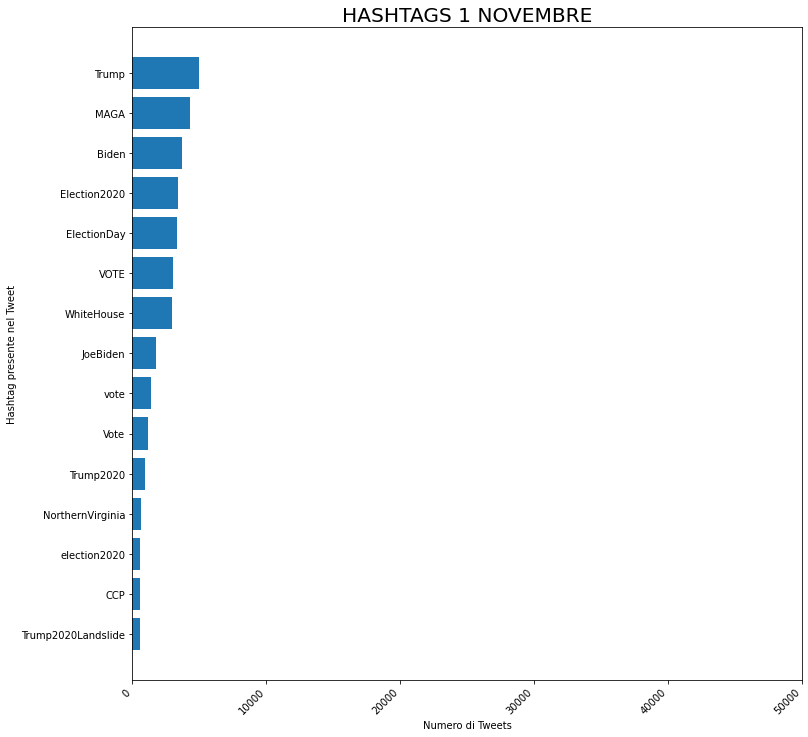

In [ ]:
#[PRESENZA DUPLICATI]
#Conteggio hashtag maggiormente presenti il 3 Novembre (di quelli raccolti):
conteggiogiorno_hashtags_1_nov = dataset_unico_1_nov.groupby('hashtags').size().reset_index(name='count')
conteggiogiorno_hashtags_1_nov = pd.DataFrame(conteggiogiorno_hashtags_1_nov).sort_values(by=['count'], ascending = True)
conteggiogiorno_hashtags_1_nov_top15 = conteggiogiorno_hashtags_1_nov.tail(15)

fig, ax = plt.subplots(figsize=(12, 12))
ax.barh(conteggiogiorno_hashtags_1_nov_top15['hashtags'], conteggiogiorno_hashtags_1_nov_top15['count'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[0, 50000], xlabel='Numero di Tweets', ylabel='Hashtag presente nel Tweet',
       title='HASHTAGS 1 NOVEMBRE')

In [ ]:
#[ESTRAZIONE TWEETS IN BASE AD HASHTAGS]
#COSTRUISCO I DATASETS DEL 3 NOVEMBRE CON TWEETS LEGATI A TRUMP E A BIDEN:
dataset_unico_1_nov_hashtags_trump = dataset_unico_1_nov.loc[(dataset_unico_1_nov['hashtags'] == "Trump") | (dataset_unico_1_nov['hashtags'] == "Trump2020" )]
print("Nel dataset con duplicati, tweets 1 Novembre e hashtags #Trump e #Trump2020, vi sono " + str(len(dataset_unico_1_nov_hashtags_trump.index)) + " tweets")
dataset_unico_1_nov_hashtags_biden = dataset_unico_1_nov.loc[(dataset_unico_1_nov['hashtags'] == "Biden") | (dataset_unico_1_nov['hashtags'] == "JoeBiden" ) | (dataset_unico_1_nov['hashtags'] == "BidenHarris2020" )]
print("Nel dataset con duplicati, tweets 1 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono " + str(len(dataset_unico_1_nov_hashtags_biden.index)) + " tweets")

dataset_unico_1_nov_hashtags_trump_nod = dataset_unico_1_nov_hashtags_trump.drop_duplicates(['_id'], keep="last")
print("[FINALE HASHTAGS] Nel dataset con tweets 1 Novembre e hashtags #Trump e #Trump2020, vi sono: " + str(len(dataset_unico_1_nov_hashtags_trump_nod.index)) + " tweets")
dataset_unico_1_nov_hashtags_biden_nod = dataset_unico_1_nov_hashtags_biden.drop_duplicates(['_id'], keep="last")
print("[FINALE HASHTAGS] Nel dataset con tweets 1 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono: " + str(len(dataset_unico_1_nov_hashtags_biden_nod.index)) + " tweets")

Nel dataset con duplicati, tweets 1 Novembre e hashtags #Trump e #Trump2020, vi sono 5913 tweets
Nel dataset con duplicati, tweets 1 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono 5762 tweets
[FINALE HASHTAGS] Nel dataset con tweets 1 Novembre e hashtags #Trump e #Trump2020, vi sono: 5518 tweets
[FINALE HASHTAGS] Nel dataset con tweets 1 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono: 5579 tweets


In [ ]:
#[ESTRAZIONE TWEETS IN BASE A PAROLE NEI TWEETS]
#Parole da utilizzare nel dataset di soliti tweets dove Trump viene citato nel testo:
parole_testo_trump =['Trump', 'Donald Trump', 'Trump2020', 'trump']

def matcherTrump(x):
    for i in parole_testo_trump:
        if i in x:
            return i
    else:
        return np.nan

#Parole da utilizzare nel dataset di soliti tweets dove Trump viene citato nel testo:
parole_testo_biden =['Biden', 'Joe Biden', 'Biden2020', 'BidenHarris2020', 'biden']

def matcherBiden(x):
    for i in parole_testo_biden:
        if i in x:
            return i
    else:
        return np.nan

#https://stackoverflow.com/questions/49073252/pandas-how-to-select-row-with-certain-word
#dataset_unico_1_nov_words_trump = dataset_unico_1_nov[dataset_unico_1_nov['Text_clean_1'].str.contains("Trump", regex=False, case=False, na=False)]
#TRUMP:
dataset_unico_1_nov['Match_parola_trump'] = dataset_unico_1_nov['Text_clean_1'].apply(matcherTrump)
dataset_unico_1_nov_words_trump = dataset_unico_1_nov.loc[(dataset_unico_1_nov['Match_parola_trump'] == "Trump") | (dataset_unico_1_nov['Match_parola_trump'] == "Donald Trump") | (dataset_unico_1_nov['Match_parola_trump'] == "Trump2020") | (dataset_unico_1_nov['Match_parola_trump'] == "trump")]
#Dataset nel quale sono contenuti i tweets dove sono contenute le parole riferite a trump nel testo:
dataset_unico_1_nov_words_trump_nod = dataset_unico_1_nov_words_trump.drop_duplicates(['_id'], keep="last")
dataset_unico_1_nov_words_trump_nod = remove_unwanted_cols(dataset_unico_1_nov_words_trump_nod, ["hashtags"])
print("[FINALE PAROLE] Nel dataset con tweets 1 Novembre e parole Trump, Donald Trump, trump e Trump2020, vi sono: " + str(len(dataset_unico_1_nov_words_trump_nod.index)) + " tweets")

#BIDEN:
dataset_unico_1_nov['Match_parola_biden'] = dataset_unico_1_nov['Text_clean_1'].apply(matcherBiden)
dataset_unico_1_nov_words_biden = dataset_unico_1_nov.loc[(dataset_unico_1_nov['Match_parola_biden'] == "Biden") | (dataset_unico_1_nov['Match_parola_biden'] == "Joe Biden") | (dataset_unico_1_nov['Match_parola_biden'] == "BidenHarris2020") | (dataset_unico_1_nov['Match_parola_biden'] == "biden") | (dataset_unico_1_nov['Match_parola_biden'] == "Biden2020")]
#Dataset nel quale sono contenuti i tweets dove sono contenute le parole riferite a trump nel testo:
dataset_unico_1_nov_words_biden_nod = dataset_unico_1_nov_words_biden.drop_duplicates(['_id'], keep="last")
dataset_unico_1_nov_words_biden_nod = remove_unwanted_cols(dataset_unico_1_nov_words_biden_nod, ["hashtags"])
print("[FINALE PAROLE] Nelf dataset con tweets 1 Novembre e parole Biden, Joe Biden, biden, BidenHarris2020 e Biden2020, vi sono: " + str(len(dataset_unico_1_nov_words_biden_nod.index)) + " tweets")

[FINALE PAROLE] Nel dataset con tweets 1 Novembre e parole Trump, Donald Trump, trump e Trump2020, vi sono: 5663 tweets
[FINALE PAROLE] Nelf dataset con tweets 1 Novembre e parole Biden, Joe Biden, biden, BidenHarris2020 e Biden2020, vi sono: 2823 tweets


In [ ]:
#UNIONE UNICO DATASET PER TRUMP E BIDEN CON I TWEETS CHE CONTENGONO HASHTAGS E PAROLE RIFERITI A LORO DUE:
#TRUMP
_1_nov_unito_trump = pd.concat([dataset_unico_1_nov_words_trump_nod, dataset_unico_1_nov_hashtags_trump_nod])
_1_nov_unito_trump_FIN = _1_nov_unito_trump.drop_duplicates(['_id'], keep="last")
print("Nel dataset finale relativo a Trump, del 1 Novembre, vi sono:" + str(len(_1_nov_unito_trump_FIN.index)) + " tweets")

#BIDEN:
_1_nov_unito_biden = pd.concat([dataset_unico_1_nov_words_biden_nod, dataset_unico_1_nov_hashtags_biden_nod])
_1_nov_unito_biden_FIN = _1_nov_unito_biden.drop_duplicates(['_id'], keep="last")
print("Nel dataset finale relativo a Biden, del 1 Novembre, vi sono:" + str(len(_1_nov_unito_biden_FIN.index)) + " tweets")

Nel dataset finale relativo a Trump, del 1 Novembre, vi sono:10643 tweets
Nel dataset finale relativo a Biden, del 1 Novembre, vi sono:7782 tweets


AFINN

In [ ]:
pip install afinn 

     |████████████████████████████████| 61kB 5.2MB/s 
  Created wheel for afinn: filename=afinn-0.1-cp36-none-any.whl size=53451 sha256=911082a4a59cbf9f6769c43c32f60b12bc4294184f3efa8a7bc82730fe6e69c6
  Stored in directory: /root/.cache/pip/wheels/b5/1c/de/428301f3333ca509dcf20ff358690eb23a1388fbcbbde008b2
Successfully built afinn


In [ ]:
from afinn import Afinn
afinn = Afinn()
_1_nov_unito_trump_FIN['afinn'] = _1_nov_unito_trump_FIN['Text_clean_3'].apply(afinn.score)
_1_nov_unito_trump_FIN.afinn.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


 0.0     3840
 3.0     1020
 1.0      899
 4.0      875
 2.0      831
-2.0      684
-1.0      651
-3.0      525
 6.0      223
-4.0      216
 5.0      211
-5.0      209
-6.0      181
-7.0       60
 7.0       54
-8.0       47
 8.0       39
 10.0      25
-10.0      14
-9.0       10
 9.0        7
 11.0       5
-11.0       3
 16.0       3
 12.0       3
 14.0       2
 13.0       2
 20.0       1
-12.0       1
-13.0       1
 23.0       1
Name: afinn, dtype: int64

[(-25.0, 20.0),
 Text(0, 0.5, 'valori'),
 (0.0, 10000.0),
 Text(0.5, 0, 'conteggio '),
 Text(0.5, 1.0, 'afinn semtiment')]

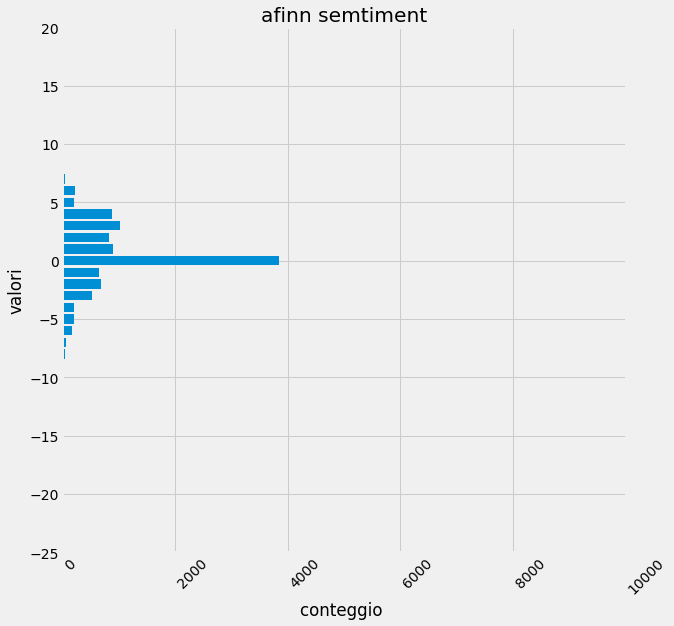

In [ ]:
df_value_counts = pd.DataFrame(_1_nov_unito_trump_FIN.afinn.value_counts())
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['valori', 'counts']
fig, ax = plt.subplots(figsize=(9, 9))
ax.barh(df_value_counts['valori'], df_value_counts['counts'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='left')
ax.set(xlim=[0, 10000], ylim=[-25,20],xlabel='conteggio ', ylabel='valori',
       title='afinn semtiment')

In [ ]:
_1_nov_unito_biden_FIN['afinn'] = _1_nov_unito_biden_FIN['Text_clean_3'].apply(afinn.score)
_1_nov_unito_biden_FIN.afinn.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


 0.0     3214
-2.0      698
 2.0      622
-3.0      590
 1.0      537
-1.0      451
 3.0      363
 4.0      357
-4.0      245
-6.0      153
-7.0      110
 5.0      102
-5.0       85
 7.0       74
 6.0       63
 9.0       31
 8.0       26
-8.0       20
 10.0      20
-10.0       6
 11.0       4
-11.0       3
 13.0       2
-9.0        2
 16.0       2
-13.0       1
-12.0       1
Name: afinn, dtype: int64

[(-30.0, 30.0),
 Text(0, 0.5, 'valori'),
 (0.0, 15000.0),
 Text(0.5, 0, 'conteggio '),
 Text(0.5, 1.0, 'afinn semtiment BIDEN')]

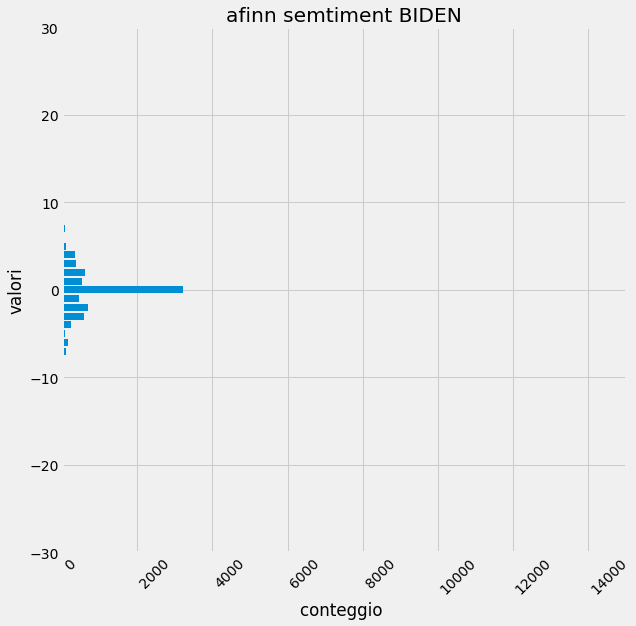

In [ ]:
df_value_counts1 = pd.DataFrame(_1_nov_unito_biden_FIN.afinn.value_counts())
df_value_counts1 = df_value_counts1.reset_index()
df_value_counts1.columns = ['valori', 'counts']
fig, ax = plt.subplots(figsize=(9, 9))
ax.barh(df_value_counts1['valori'], df_value_counts1['counts'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='left')
ax.set(xlim=[0, 15000], ylim=[-30,30],xlabel='conteggio ', ylabel='valori',
       title='afinn semtiment BIDEN')

In [ ]:
Estremi_positivi=_1_nov_unito_trump_FIN[_1_nov_unito_trump_FIN['afinn'] > 20].head()
Estremi_positivi2=Estremi_positivi[['afinn','Text','Text_clean_1']]
Estremi_positivi2

,afinn,Text,Text_clean_1
1874,23.0,"RT @nic4meow: Justice will win big, light will...","[('@nic4meow', 'JJ'), ('justice', 'NN'), ('win..."


In [ ]:
Estremi_negativi3=_1_nov_unito_trump_FIN[_1_nov_unito_trump_FIN['afinn'] <-6].head()
Estremi_negativi4=Estremi_negativi3[['afinn','Text','Text_clean_1']]
Estremi_negativi4

,afinn,Text,Text_clean_1
621,-8.0,@RawStory Daily fake news #usa. Ouch @HillaryC...,"[('@rawstory', 'JJ'), ('daily', 'JJ'), ('fake'..."
2414,-9.0,There's bat shit crazy &amp; then there's @All...,"[(""there's"", 'JJ'), ('bat', 'NN'), ('shit', 'V..."
4234,-9.0,"@IngrahamAngle Trump has made America weak, si...","[('@ingrahamangle', 'NN'), ('trump', 'NN'), ('..."
4338,-8.0,These RACIST BASTARDS! Did you see the Texas T...,"[('racist', 'NN'), ('bastard', 'NN'), ('see', ..."
5521,-9.0,"RT @AndyOstroy: Yes, @realDonaldTrump is a pat...","[('@andyostroy', 'JJ'), ('yes', 'NNS'), ('@rea..."


-687.0


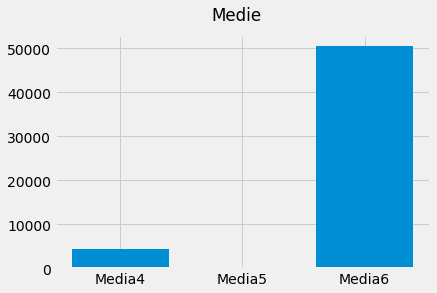

In [ ]:
#SI CALCOLA LA SOMMA DEI VALORI DELLA SENTIMENT DI TUTTI I TWEETS PER IL GIORNO 1 NOVEMBRE SU TRUMP
import matplotlib.pyplot as plot
df_value_counts1['somma'] = (df_value_counts1['valori']*df_value_counts1['counts'])
sommafinale1 = df_value_counts1['somma'].sum()
print(sommafinale1)
neg=df_value_counts1.loc[(df_value_counts['valori'] < 0)]
pos=df_value_counts1.loc[(df_value_counts['valori'] > 0)]
neutro= df_value_counts1.loc[(df_value_counts['valori'] == 0)]
Media4=pos.agg(np.mean)
Media5=neg.agg(np.mean)
Media6=neutro.agg(np.mean)
Media4=pos.agg(np.mean)
Media5=neg.agg(np.mean)
Media6=neutro.agg(np.mean)
df= pd.DataFrame({'Media4':[Media4.counts],'Media5':[Media5.counts],'Media6':[Media6.counts]})
c=np.transpose(df)
Medie = ['Media4', 'Media5', 'Media6']
valori = [4393.307692, 375.444444, 50524.0]
plot.bar(Medie, valori)
plot.suptitle('Medie')
plot.show()

TEXT BLOB 

In [ ]:
from tweepy import OAuthHandler 
from textblob import TextBlob 

In [ ]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [ ]:
_1_nov_unito_trump_FIN['Subjectivity'] = _1_nov_unito_trump_FIN['Text_clean_1'].apply(getTextSubjectivity)
_1_nov_unito_trump_FIN['Polarity'] = _1_nov_unito_trump_FIN['Text_clean_1'].apply(getTextPolarity)
_1_nov_unito_biden_FIN['Subjectivity'] = _1_nov_unito_biden_FIN['Text_clean_1'].apply(getTextSubjectivity)
_1_nov_unito_biden_FIN['Polarity'] = _1_nov_unito_biden_FIN['Text_clean_1'].apply(getTextPolarity)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
# negative, nautral, positive analysis
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

In [ ]:
_1_nov_unito_biden_FIN['Score'] = _1_nov_unito_biden_FIN['Polarity'].apply(getTextAnalysis)
_1_nov_unito_trump_FIN['Score'] = _1_nov_unito_trump_FIN['Polarity'].apply(getTextAnalysis)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print("[POSITIVE]")
positive_biden_1 = _1_nov_unito_biden_FIN[_1_nov_unito_biden_FIN['Score'] == 'Positive']
print(str(positive_biden_1.shape[0]/(_1_nov_unito_biden_FIN.shape[0])*100) + " % of positive tweets [BIDEN]")
positive_trump_1 = _1_nov_unito_trump_FIN[_1_nov_unito_trump_FIN['Score'] == 'Positive']
print(str(positive_trump_1.shape[0]/(_1_nov_unito_trump_FIN.shape[0])*100) + " % of positive tweets [TRUMP]")
print("\\\\\\\\\\")
print("[NEGATIVE]")
negative_biden_1 = _1_nov_unito_biden_FIN[_1_nov_unito_biden_FIN['Score'] == 'Negative']
print(str(negative_biden_1.shape[0]/(_1_nov_unito_biden_FIN.shape[0])*100) + " % of negative tweets [BIDEN]")
negative_trump_1 = _1_nov_unito_trump_FIN[_1_nov_unito_trump_FIN['Score'] == 'Negative']
print(str(negative_trump_1.shape[0]/(_1_nov_unito_trump_FIN.shape[0])*100) + " % of negative tweets [TRUMP]")
print("\\\\\\\\\\")
print("[NEUTRAL]")
neutral_biden_1 = _1_nov_unito_biden_FIN[_1_nov_unito_biden_FIN['Score'] == 'Neutral']
print(str(neutral_biden_1.shape[0]/(_1_nov_unito_biden_FIN.shape[0])*100) + " % of neutral tweets [BIDEN]")
neutral_trump_1 = _1_nov_unito_trump_FIN[_1_nov_unito_trump_FIN['Score'] == 'Neutral']
print(str(neutral_trump_1.shape[0]/(_1_nov_unito_trump_FIN.shape[0])*100) + " % of neutral tweets [TRUMP]")

[POSITIVE]
26.403873927448814 % of positive tweets [BIDEN]
31.302731302731303 % of positive tweets [TRUMP]
\\\\\
[NEGATIVE]
15.215359782516355 % of negative tweets [BIDEN]
21.569188235854902 % of negative tweets [TRUMP]
\\\\\
[NEUTRAL]
58.380766290034835 % of neutral tweets [BIDEN]
47.128080461413795 % of neutral tweets [TRUMP]


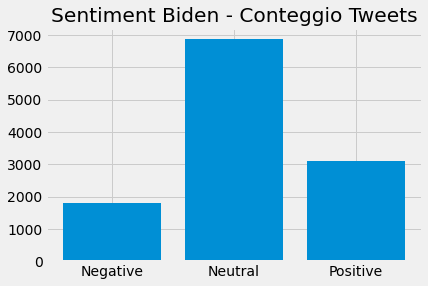

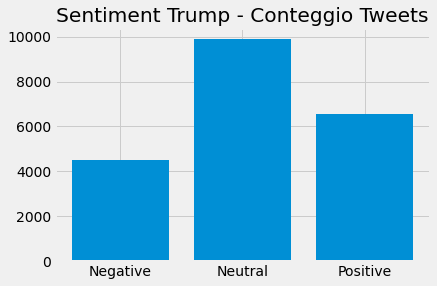

In [ ]:
labels_biden = _1_nov_unito_biden_FIN.groupby('Score').count().index.values
values_biden = _1_nov_unito_biden_FIN.groupby('Score').size().values
plt.bar(labels_biden, values_biden)
plt.title("Sentiment Biden - Conteggio Tweets")
plt.show()

labels_trump = _1_nov_unito_trump_FIN.groupby('Score').count().index.values
values_trump = _1_nov_unito_trump_FIN.groupby('Score').size().values
plt.bar(labels_trump, values_trump)
plt.title("Sentiment Trump - Conteggio Tweets")

plt.show()

OPINION LEXICON(NLTK)

E' stata creata una funzione per la gestione del 'not' e del 'but' all'interno di una frase.  

In [ ]:
import nltk
nltk.download('opinion_lexicon')
from nltk.corpus import opinion_lexicon

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


In [ ]:
pos_list=set(opinion_lexicon.positive())
neg_list=set(opinion_lexicon.negative())

In [ ]:
def sentiment_neg(sentence):
  total_sentiment = 0
  sentences = sentence.split(",")
  for s in sentences: 
    sentence_sentiment = 0
    sentence = [word.lower() for word in word_tokenize(s)] 
    

    for word in sentence:
      word = lemmatizer.lemmatize(word)

      if word in pos_list:
        sentence_sentiment += 1
      elif word in neg_list:
        sentence_sentiment -= 1

    if 'not' in sentence:
      sentence_sentiment = - sentence_sentiment
    total_sentiment += sentence_sentiment
  return total_sentiment

In [ ]:
_1_nov_unito_trump_FIN['Text_clean_3'] = _1_nov_unito_trump_FIN['Text_clean_3'].apply(str)
_1_nov_unito_biden_FIN['Text_clean_3'] = _1_nov_unito_biden_FIN['Text_clean_3'].apply(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
_1_nov_unito_trump_FIN['test1'] = _1_nov_unito_trump_FIN['Text_clean_3'].apply(sentiment_neg)
_1_nov_unito_trump_FIN.test1.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


 1    3930
 2    2110
 0    2083
 3    1072
-1     893
-2     243
 4     203
-3      58
-4      32
 5      17
-5       2
Name: test1, dtype: int64

[(-10.0, 20.0),
 Text(0, 0.5, 'valori'),
 (0.0, 10000.0),
 Text(0.5, 0, 'conteggio '),
 Text(0.5, 1.0, 'lexicon based approach semtiment')]

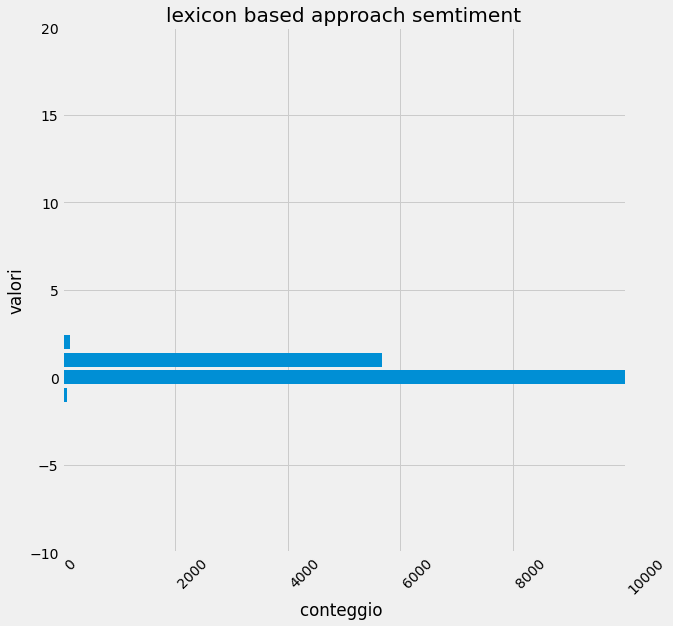

In [ ]:
df_value_counts3 = pd.DataFrame(_1_nov_unito_trump_FIN.test1.value_counts())
df_value_counts3 = df_value_counts3.reset_index()
df_value_counts3.columns = ['valori', 'counts']
fig, ax = plt.subplots(figsize=(9, 9))
ax.barh(df_value_counts3['valori'], df_value_counts3['counts'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='left')
ax.set(xlim=[0, 10000], ylim=[-10,20], xlabel='conteggio ', ylabel='valori',
       title='lexicon based approach semtiment')

In [ ]:
_1_nov_unito_biden_FIN['test1'] = _1_nov_unito_biden_FIN['Text_clean_3'].apply(sentiment_neg)
_1_nov_unito_biden_FIN.test1.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


 0    2978
 1    1761
-1    1715
 2     609
-2     327
 3     165
-3     113
 4      96
-4      13
 5       5
Name: test1, dtype: int64

[(-10.0, 20.0),
 Text(0, 0.5, 'valori'),
 (0.0, 10000.0),
 Text(0.5, 0, 'conteggio '),
 Text(0.5, 1.0, 'lexicon based approach semtiment')]

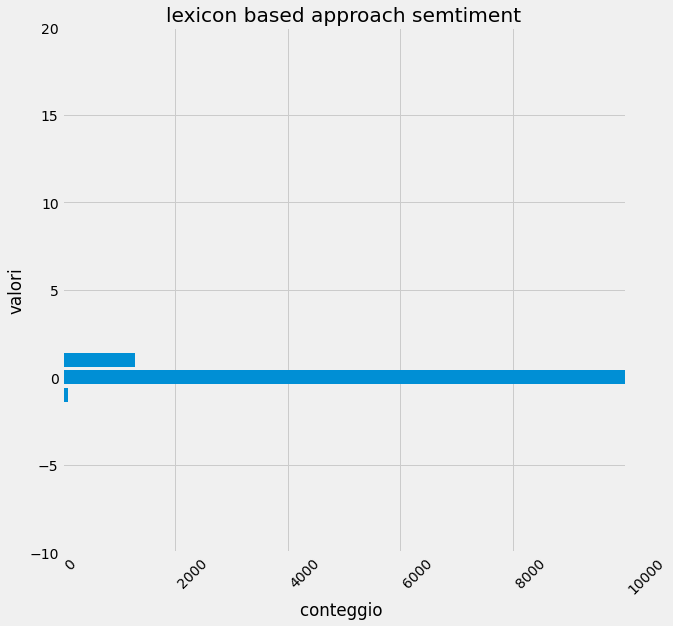

In [ ]:
df_value_counts4 = pd.DataFrame(_1_nov_unito_biden_FIN.test1.value_counts())
df_value_counts4 = df_value_counts4.reset_index()
df_value_counts4.columns = ['valori', 'counts']
fig, ax = plt.subplots(figsize=(9, 9))
ax.barh(df_value_counts4['valori'], df_value_counts4['counts'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='left')
ax.set(xlim=[0, 10000], ylim=[-10,20], xlabel='conteggio ', ylabel='valori',
       title='lexicon based approach semtiment')

VADER SENTIMENT

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
scores = []
# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

scores_1 = []
# Declare variables for scores
compound_list_1 = []
positive_list_1 = []
negative_list_1 = []
neutral_list_1 = []

scores_2 = []
# Declare variables for scores
compound_list_2 = []
positive_list_2 = []
negative_list_2 = []
neutral_list_2 = []

scores_3 = []
# Declare variables for scores
compound_list_3 = []
positive_list_3 = []
negative_list_3 = []
neutral_list_3 = []

In [ ]:
_1_nov_unito_biden_FIN = _1_nov_unito_biden_FIN.reset_index(drop=True)
_1_nov_unito_trump_FIN = _1_nov_unito_trump_FIN.reset_index(drop=True)

In [ ]:
for i in range(_1_nov_unito_trump_FIN['Text_clean_2'].shape[0]):
    compound = analyzer.polarity_scores(_1_nov_unito_trump_FIN['Text_clean_2'][i])["compound"]
    pos = analyzer.polarity_scores(_1_nov_unito_trump_FIN['Text_clean_2'][i])["pos"]
    neu = analyzer.polarity_scores(_1_nov_unito_trump_FIN['Text_clean_2'][i])["neu"]
    neg = analyzer.polarity_scores(_1_nov_unito_trump_FIN['Text_clean_2'][i])["neg"]
    scores_1.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })
for i in range(_1_nov_unito_biden_FIN['Text_clean_2'].shape[0]):
    compound = analyzer.polarity_scores(_1_nov_unito_biden_FIN['Text_clean_2'][i])["compound"]
    pos = analyzer.polarity_scores(_1_nov_unito_biden_FIN['Text_clean_2'][i])["pos"]
    neu = analyzer.polarity_scores(_1_nov_unito_biden_FIN['Text_clean_2'][i])["neu"]
    neg = analyzer.polarity_scores(_1_nov_unito_biden_FIN['Text_clean_2'][i])["neg"]
    scores_2.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

In [ ]:
sentiments_score_1 = pd.DataFrame.from_dict(scores_1)
_1_nov_unito_trump_FIN = _1_nov_unito_trump_FIN.join(sentiments_score_1)
_1_nov_unito_trump_FIN.head()

,_id,Screen_name,Text,Followers,Date_time,Hashtags,Novembre,Text_clean_1,Text_clean_2,Match_parola_trump,hashtags,afinn,Subjectivity,Polarity,Score,test1,Compound,Positive,Negative,Neutral
0,"ObjectId(""5f9e70df8aaf14aa9940a3f3"")",BlahOye,RT @realDonaldTrump: For the last 4 years you ...,265,2020-11-01 08:24:58,NaN,1,"[('@realdonaldtrump', 'NN'), ('last', 'JJ'), (...",: For the last 4 years you have seen me fight ...,trump,NaN,2.0,0.033333,0.00000,Neutral,0,-0.3818,0.0,0.110,0.890
1,"ObjectId(""5f9e70e58aaf14aa9940a3f9"")",YulianaKB,"RT @AneetahD: I am a Latina, a naturalized cit...",98,2020-11-01 08:25:04,NaN,1,"[('@aneetahd', 'JJ'), ('latina', 'NN'), ('natu...",": I am a Latina, a naturalized citizen from Me...",trump,NaN,0.0,0.333333,0.25000,Positive,0,0.0000,0.0,0.000,1.000
2,"ObjectId(""5f9e70ea8aaf14aa9940a400"")",Corbelious,RT @cognitivediss00: WOW... What is going on a...,21858,2020-11-01 08:25:09,NaN,1,"[('@cognitivediss00', 'NN'), ('wow', 'NN'), ('...",: WOW... What is going on across USA???\nMASSI...,trump,NaN,2.0,1.000000,-0.45000,Negative,0,-0.7283,0.0,0.317,0.683
3,"ObjectId(""5f9e70ea8aaf14aa9940a401"")",SMHussain_,Trump’s big rallies mean NOTHING. \n\nFUN FACT...,471,2020-11-01 08:25:09,NaN,1,"[('trump', 'NN'), ('big', 'JJ'), ('rally', 'NN...",Trump’s big rallies mean NOTHING. \n\nFUN FACT...,trump,NaN,-2.0,0.393750,-0.15625,Negative,0,-0.4019,0.0,0.153,0.847
4,"ObjectId(""5f9e70fb8aaf14aa9940a40a"")",Samatvam_,RT @realDonaldTrump: For the last 4 years you ...,258,2020-11-01 08:25:26,NaN,1,"[('@realdonaldtrump', 'NN'), ('last', 'JJ'), (...",: For the last 4 years you have seen me fight ...,trump,NaN,2.0,0.033333,0.00000,Neutral,0,-0.3818,0.0,0.110,0.890


In [ ]:
sentiments_score_2 = pd.DataFrame.from_dict(scores_2)
_1_nov_unito_biden_FIN = _1_nov_unito_biden_FIN.join(sentiments_score_2)
_1_nov_unito_biden_FIN.head()

,_id,Screen_name,Text,Followers,Date_time,Hashtags,Novembre,Text_clean_1,Text_clean_2,Match_parola_trump,Match_parola_biden,hashtags,afinn,Subjectivity,Polarity,Score,test1,Compound,Positive,Negative,Neutral
0,"ObjectId(""5f9e70ea8aaf14aa9940a400"")",Corbelious,RT @cognitivediss00: WOW... What is going on a...,21858,2020-11-01 08:25:09,NaN,1,"[('@cognitivediss00', 'NN'), ('wow', 'NN'), ('...",: WOW... What is going on across USA???\nMASSI...,trump,biden,NaN,2.0,1.000000,-0.450000,Negative,0,-0.7283,0.000,0.317,0.683
1,"ObjectId(""5f9e70fc8aaf14aa9940a40b"")",mariaannee,RT @kjsorrel: as a state with the second highe...,271,2020-11-01 08:25:27,NaN,1,"[('@kjsorrel', 'JJ'), ('state', 'NN'), ('secon...",: as a state with the second highest electoral...,NaN,biden,NaN,1.0,0.225000,0.250000,Positive,0,0.2500,0.146,0.106,0.748
2,"ObjectId(""5f9e71288aaf14aa9940a426"")",Corbelious,RT @cognitivediss00: #Christians TAKE NOTE. @r...,21858,2020-11-01 08:26:11,NaN,1,"[('@cognitivediss00', 'JJ'), ('#christians', '...",: Christians TAKE NOTE. policies PROTECT reli...,trump,biden,NaN,2.0,0.000000,0.000000,Neutral,0,0.3818,0.347,0.200,0.453
3,"ObjectId(""5f9e71378aaf14aa9940a433"")",terrydybdahl22,RT @CBS_Herridge: #Election2020 In local Iowa ...,359,2020-11-01 08:26:26,NaN,1,"[('@cbs_herridge', 'NN'), ('#election2020', 'N...",": Election2020 In local Iowa interview, former...",NaN,biden,NaN,0.0,0.033333,-0.033333,Negative,0,0.0000,0.000,0.000,1.000
4,"ObjectId(""5f9e71678aaf14aa9940a456"")",Corbelious,RT @cognitivediss00: #USA #florida #arizona #...,21858,2020-11-01 08:27:13,NaN,1,"[('@cognitivediss00', 'JJ'), ('#usa', 'NNP'), ...",: USA florida arizona texas northcarolina \nS...,trump,biden,NaN,-2.0,0.600000,0.400000,Positive,0,-0.3182,0.000,0.150,0.850


In [ ]:
tot_compound_trump_1_nov = _1_nov_unito_trump_FIN["Compound"].sum()
media_compound_trump_1_nov = tot_compound_trump_1_nov/len(_1_nov_unito_trump_FIN)
print("La media del COMPOUND di trump del 1 Novembre risulta: " + str(media_compound_trump_1_nov))

tot_Positive_trump_1_nov = _1_nov_unito_trump_FIN["Positive"].sum()
media_Positive_trump_1_nov = tot_Positive_trump_1_nov/len(_1_nov_unito_trump_FIN)
print("La media del POSITIVE di trump del 1 Novembre risulta: " + str(media_Positive_trump_1_nov))

tot_Negative_trump_1_nov = _1_nov_unito_trump_FIN["Negative"].sum()
media_Negative_trump_1_nov = tot_Negative_trump_1_nov/len(_1_nov_unito_trump_FIN)
print("La media del NEGATIVE di trump del 1 Novembre risulta: " + str(media_Negative_trump_1_nov))

tot_Neutral_trump_1_nov = _1_nov_unito_trump_FIN["Neutral"].sum()
media_Neutral_trump_1_nov = tot_Neutral_trump_1_nov/len(_1_nov_unito_trump_FIN)
print("La media del NEUTRAL di trump del 1 Novembre risulta: " + str(media_Neutral_trump_1_nov))

La media del COMPOUND di trump del 1 Novembre risulta: 0.0986297964631298
La media del POSITIVE di trump del 1 Novembre risulta: 0.11191181657848326
La media del NEGATIVE di trump del 1 Novembre risulta: 0.06400662567329235
La media del NEUTRAL di trump del 1 Novembre risulta: 0.8226525573192239


In [ ]:
tot_compound_biden_1_nov = _1_nov_unito_biden_FIN["Compound"].sum()
media_compound_biden_1_nov = tot_compound_biden_1_nov/len(_1_nov_unito_biden_FIN)
print("La media del COMPOUND di Biden del 1 Novembre risulta: " + str(media_compound_biden_1_nov))

tot_Positive_biden_1_nov = _1_nov_unito_biden_FIN["Positive"].sum()
media_Positive_biden_1_nov = tot_Positive_biden_1_nov/len(_1_nov_unito_biden_FIN)
print("La media del POSITIVE di Biden del 1 Novembre risulta: " + str(media_Positive_biden_1_nov))

tot_Negative_biden_1_nov = _1_nov_unito_biden_FIN["Negative"].sum()
media_Negative_biden_1_nov = tot_Negative_biden_1_nov/len(_1_nov_unito_biden_FIN)
print("La media del NEGATIVE di Biden del 1 Novembre risulta: " + str(media_Negative_biden_1_nov))

tot_Neutral_biden_1_nov = _1_nov_unito_biden_FIN["Neutral"].sum()
media_Neutral_biden_1_nov = tot_Neutral_biden_1_nov/len(_1_nov_unito_biden_FIN)
print("La media del NEUTRAL di Biden del 1 Novembre risulta: " + str(media_Neutral_biden_1_nov))

La media del COMPOUND di Biden del 1 Novembre risulta: 0.04310444312292924
La media del POSITIVE di Biden del 1 Novembre risulta: 0.09114357318834425
La media del NEGATIVE di Biden del 1 Novembre risulta: 0.07064463512021069
La media del NEUTRAL di Biden del 1 Novembre risulta: 0.836955908588905


Text(0.5, 0.98, 'VADER TRUMP')

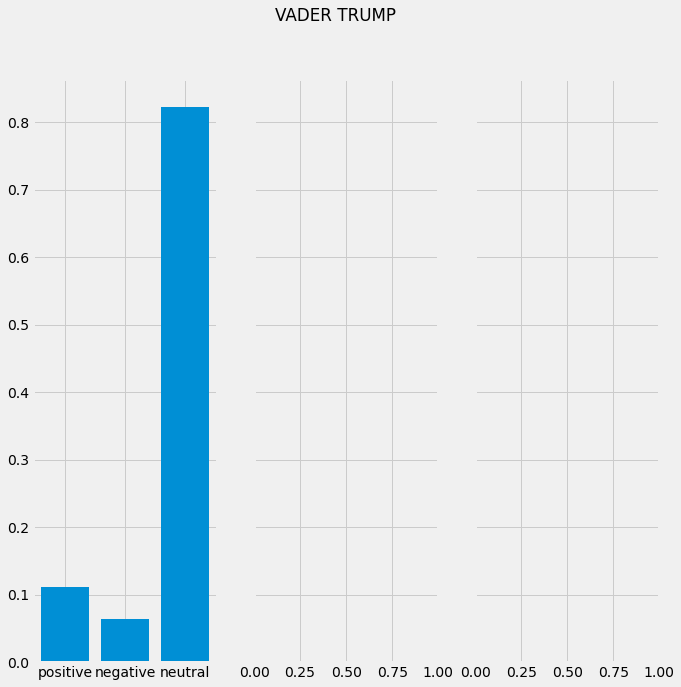

In [ ]:
results = {'positive':0.11191181657848326, 'negative':0.06400662567329235, 'neutral': 0.8226525573192239}
names = list(results.keys())
values = list(results.values())

fig, axs = plt.subplots(1, 3, figsize=(10, 10), sharey=True)
axs[0].bar(names, values)
fig.suptitle('VADER TRUMP')

Text(0.5, 0.98, 'VADER BIDEN')

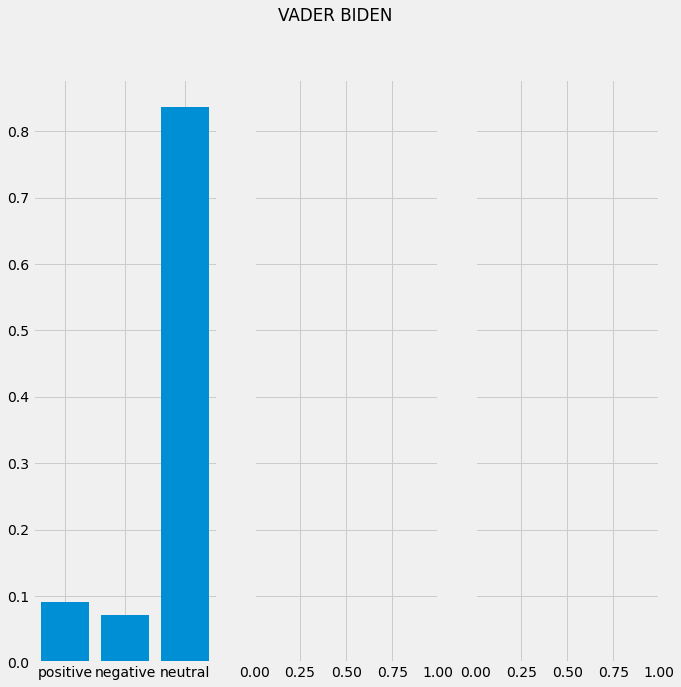

In [ ]:
results = {'positive':0.09114357318834425, 'negative': 0.07064463512021069, 'neutral':0.836955908588905}
names = list(results.keys())
values = list(results.values())

fig, axs = plt.subplots(1, 3, figsize=(10, 10), sharey=True)
axs[0].bar(names, values)
fig.suptitle('VADER BIDEN')

5857


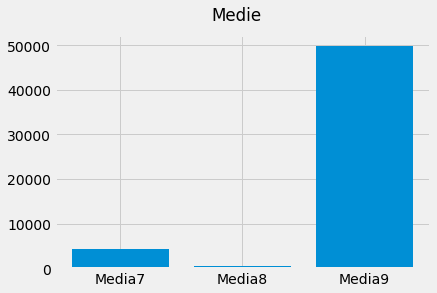

In [ ]:
#SI CALCOLA LA SOMMA DEI VALORI DELLA SENTIMENT DI TUTTI I TWEETS PER IL GIORNO 1 NOVEMBRE SU TRUMP
df_value_counts3['somma'] = (df_value_counts3['valori']*df_value_counts3['counts'])
sommafinale2 = df_value_counts3['somma'].sum()
print(sommafinale2)
neg=df_value_counts3.loc[(df_value_counts['valori'] < 0)]
pos=df_value_counts3.loc[(df_value_counts['valori'] > 0)]
neutro= df_value_counts3.loc[(df_value_counts['valori'] == 0)]
Media7=pos.agg(np.mean)
Media8=neg.agg(np.mean)
Media9=neutro.agg(np.mean)
df= pd.DataFrame({'Media7':[Media7.counts],'Media8':[Media8.counts],'Media9':[Media9.counts]})
c=np.transpose(df)

Medie = ['Media7', 'Media8', 'Media9']
valori = [4422.923077,416.777778, 49767.0]



plot.bar(Medie, valori)0
plot.suptitle('Medie')
plot.show()

# 2 NOVEMBRE 

In [ ]:
#POS TAGGING AND CHUNK 
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

def preprocess_pos_tag(sent):
    sent = nltk.pos_tag(sent)
    return sent
    
dataset_unico_2_nov["Text_clean_1"] = dataset_unico_2_nov['Text_clean_1'].apply(preprocess_pos_tag)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
dataset_unico_2_nov['Text_clean_1']=dataset_unico_2_nov['Text_clean_1'].apply(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


DIVISIONE IN UN DATASET RELATIVO A TRUMP ED UNO A BIDEN 

In [ ]:
dataset_unico_2_nov = dataset_unico_2_nov.explode("hashtags")

[Text(0, 0.5, 'Hashtag presente nel Tweet'),
 (0.0, 250000.0),
 Text(0.5, 0, 'Numero di Tweets'),
 Text(0.5, 1.0, 'HASHTAGS 2 NOVEMBRE')]

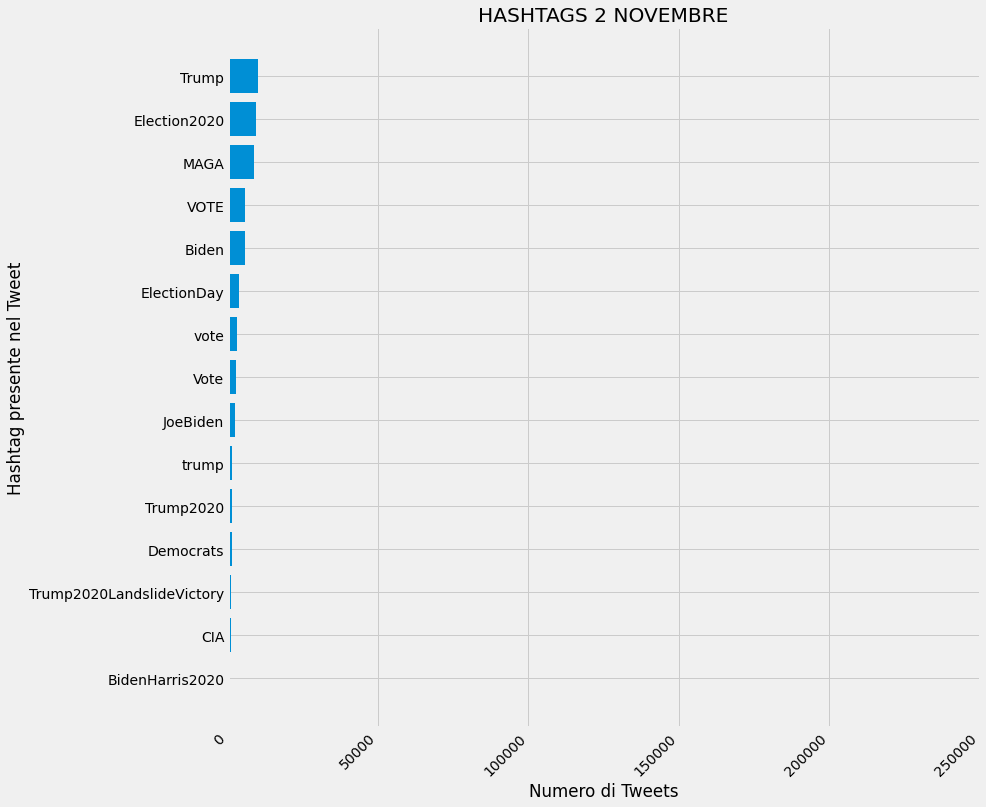

In [ ]:
#[PRESENZA DUPLICATI]
#Conteggio hashtag maggiormente presenti il 2 Novembre (di quelli raccolti):
conteggiogiorno_hashtags_2_nov = dataset_unico_2_nov.groupby('hashtags').size().reset_index(name='count')
conteggiogiorno_hashtags_2_nov = pd.DataFrame(conteggiogiorno_hashtags_2_nov).sort_values(by=['count'], ascending = True)
conteggiogiorno_hashtags_2_nov_top15 = conteggiogiorno_hashtags_2_nov.tail(15)

fig, ax = plt.subplots(figsize=(12, 12))
ax.barh(conteggiogiorno_hashtags_2_nov_top15['hashtags'], conteggiogiorno_hashtags_2_nov_top15['count'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[0, 250000], xlabel='Numero di Tweets', ylabel='Hashtag presente nel Tweet',
       title='HASHTAGS 2 NOVEMBRE')

In [ ]:
#[ESTRAZIONE TWEETS IN BASE AD HASHTAGS]
#COSTRUISCO I DATASETS DEL 2 NOVEMBRE CON TWEETS LEGATI A TRUMP E A BIDEN:
dataset_unico_2_nov_hashtags_trump = dataset_unico_2_nov.loc[(dataset_unico_2_nov['hashtags'] == "Trump") | (dataset_unico_2_nov['hashtags'] == "Trump2020" )]
print("Nel dataset con duplicati, tweets 2 Novembre e hashtags #Trump e #Trump2020, vi sono " + str(len(dataset_unico_2_nov_hashtags_trump.index)) + " tweets")
dataset_unico_2_nov_hashtags_biden = dataset_unico_2_nov.loc[(dataset_unico_2_nov['hashtags'] == "Biden") | (dataset_unico_2_nov['hashtags'] == "JoeBiden" ) | (dataset_unico_2_nov['hashtags'] == "BidenHarris2020" )]
print("Nel dataset con duplicati, tweets 2 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono " + str(len(dataset_unico_2_nov_hashtags_biden.index)) + " tweets")

dataset_unico_2_nov_hashtags_trump_nod = dataset_unico_2_nov_hashtags_trump.drop_duplicates(['_id'], keep="last")
print("[FINALE HASHTAGS] Nel dataset con tweets 2 Novembre e hashtags #Trump e #Trump2020, vi sono: " + str(len(dataset_unico_2_nov_hashtags_trump_nod.index)) + " tweets")
dataset_unico_2_nov_hashtags_biden_nod = dataset_unico_2_nov_hashtags_biden.drop_duplicates(['_id'], keep="last")
print("[FINALE HASHTAGS] Nel dataset con tweets 2 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono: " + str(len(dataset_unico_2_nov_hashtags_biden_nod.index)) + " tweets")

Nel dataset con duplicati, tweets 2 Novembre e hashtags #Trump e #Trump2020, vi sono 11197 tweets
Nel dataset con duplicati, tweets 2 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono 8945 tweets
[FINALE HASHTAGS] Nel dataset con tweets 2 Novembre e hashtags #Trump e #Trump2020, vi sono: 10693 tweets
[FINALE HASHTAGS] Nel dataset con tweets 2 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono: 8522 tweets


In [ ]:
#[ESTRAZIONE TWEETS IN BASE A PAROLE NEI TWEETS]
#Parole da utilizzare nel dataset di soliti tweets dove Trump viene citato nel testo:
parole_testo_trump =['Trump', 'Donald Trump', 'Trump2020', 'trump']

def matcherTrump(x):
    for i in parole_testo_trump:
        if i in x:
            return i
    else:
        return np.nan

#Parole da utilizzare nel dataset di soliti tweets dove Trump viene citato nel testo:
parole_testo_biden =['Biden', 'Joe Biden', 'Biden2020', 'BidenHarris2020', 'biden']

def matcherBiden(x):
    for i in parole_testo_biden:
        if i in x:
            return i
    else:
        return np.nan

#https://stackoverflow.com/questions/49073252/pandas-how-to-select-row-with-certain-word
#dataset_unico_2_nov_words_trump = dataset_unico_3_nov[dataset_unico_3_nov['Text_clean_1'].str.contains("Trump", regex=False, case=False, na=False)]
#TRUMP:
dataset_unico_2_nov['Match_parola_trump'] = dataset_unico_2_nov['Text_clean_1'].apply(matcherTrump)
dataset_unico_2_nov_words_trump = dataset_unico_2_nov.loc[(dataset_unico_2_nov['Match_parola_trump'] == "Trump") | (dataset_unico_2_nov['Match_parola_trump'] == "Donald Trump") | (dataset_unico_2_nov['Match_parola_trump'] == "Trump2020") | (dataset_unico_2_nov['Match_parola_trump'] == "trump")]
#Dataset nel quale sono contenuti i tweets dove sono contenute le parole riferite a trump nel testo:
dataset_unico_2_nov_words_trump_nod = dataset_unico_2_nov_words_trump.drop_duplicates(['_id'], keep="last")
dataset_unico_2_nov_words_trump_nod = remove_unwanted_cols(dataset_unico_2_nov_words_trump_nod, ["hashtags"])
print("[FINALE PAROLE] Nel dataset con tweets 2 Novembre e parole Trump, Donald Trump, trump e Trump2020, vi sono: " + str(len(dataset_unico_2_nov_words_trump_nod.index)) + " tweets")

#BIDEN:
dataset_unico_2_nov['Match_parola_biden'] = dataset_unico_2_nov['Text_clean_1'].apply(matcherBiden)
dataset_unico_2_nov_words_biden = dataset_unico_2_nov.loc[(dataset_unico_2_nov['Match_parola_biden'] == "Biden") | (dataset_unico_2_nov['Match_parola_biden'] == "Joe Biden") | (dataset_unico_2_nov['Match_parola_biden'] == "BidenHarris2020") | (dataset_unico_2_nov['Match_parola_biden'] == "biden") | (dataset_unico_2_nov['Match_parola_biden'] == "Biden2020")]
#Dataset nel quale sono contenuti i tweets dove sono contenute le parole riferite a trump nel testo:
dataset_unico_2_nov_words_biden_nod = dataset_unico_2_nov_words_biden.drop_duplicates(['_id'], keep="last")
dataset_unico_2_nov_words_biden_nod = remove_unwanted_cols(dataset_unico_2_nov_words_biden_nod, ["hashtags"])
print("[FINALE PAROLE] Nel dataset con tweets 2 Novembre e parole Biden, Joe Biden, biden, BidenHarris2020 e Biden2020, vi sono: " + str(len(dataset_unico_2_nov_words_biden_nod.index)) + " tweets")

[FINALE PAROLE] Nel dataset con tweets 2 Novembre e parole Trump, Donald Trump, trump e Trump2020, vi sono: 9184 tweets
[FINALE PAROLE] Nel dataset con tweets 2 Novembre e parole Biden, Joe Biden, biden, BidenHarris2020 e Biden2020, vi sono: 6182 tweets


In [ ]:
#UNIONE UNICO DATASET PER TRUMP E BIDEN CON I TWEETS CHE CONTENGONO HASHTAGS E PAROLE RIFERITI A LORO DUE:
#TRUMP
_2_nov_unito_trump = pd.concat([dataset_unico_2_nov_words_trump_nod, dataset_unico_2_nov_hashtags_trump_nod])
_2_nov_unito_trump_FIN = _2_nov_unito_trump.drop_duplicates(['_id'], keep="last")
print("Nel dataset finale relativo a Trump, del 2 Novembre, vi sono:" + str(len(_2_nov_unito_trump_FIN.index)) + " tweets")

#BIDEN:
_2_nov_unito_biden = pd.concat([dataset_unico_2_nov_words_biden_nod, dataset_unico_2_nov_hashtags_biden_nod])
_2_nov_unito_biden_FIN = _2_nov_unito_biden.drop_duplicates(['_id'], keep="last")
print("Nel dataset finale relativo a Biden, del 2 Novembre, vi sono:" + str(len(_2_nov_unito_biden_FIN.index)) + " tweets")

Nel dataset finale relativo a Trump, del 2 Novembre, vi sono:18554 tweets
Nel dataset finale relativo a Biden, del 2 Novembre, vi sono:14069 tweets


AFINN

In [ ]:
pip install afinn 

In [ ]:
from afinn import Afinn
afinn = Afinn()
_2_nov_unito_trump_FIN['afinn'] = _2_nov_unito_trump_FIN['Text_clean_3'].apply(afinn.score)
_2_nov_unito_trump_FIN.afinn.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


 0.0     7012
 2.0     1737
 1.0     1385
 3.0     1339
-2.0     1305
-1.0     1259
-3.0     1128
 4.0      969
 6.0      474
-4.0      357
 5.0      314
 7.0      295
-5.0      269
-6.0      180
 8.0      113
-8.0       96
-9.0       72
-7.0       55
 9.0       52
-10.0      43
 10.0      40
-11.0      22
 11.0      13
-12.0      10
 12.0       4
 13.0       3
-24.0       1
-13.0       1
-19.0       1
-15.0       1
 14.0       1
-14.0       1
 19.0       1
 15.0       1
Name: afinn, dtype: int64

[(-25.0, 20.0),
 Text(0, 0.5, 'valori'),
 (0.0, 23000.0),
 Text(0.5, 0, 'conteggio '),
 Text(0.5, 1.0, 'afinn semtiment')]

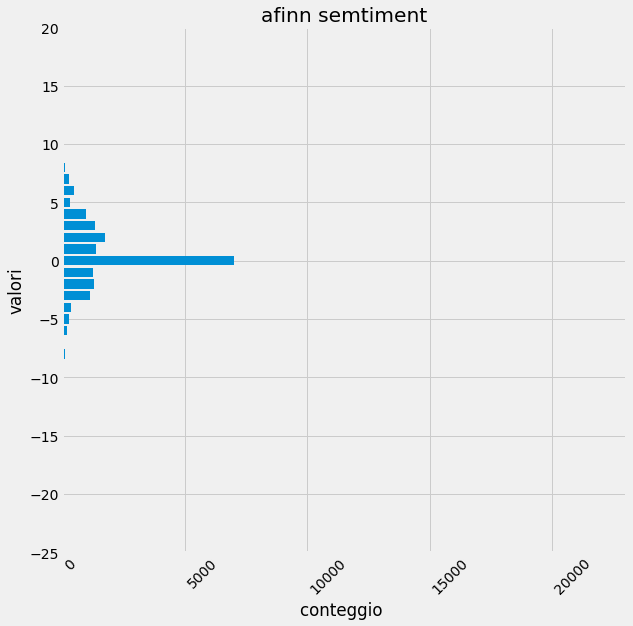

In [ ]:
df_value_counts = pd.DataFrame(_2_nov_unito_trump_FIN.afinn.value_counts())
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['valori', 'counts']
fig, ax = plt.subplots(figsize=(9, 9))
ax.barh(df_value_counts['valori'], df_value_counts['counts'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='left')
ax.set(xlim=[0, 23000], ylim=[-25,20],xlabel='conteggio ', ylabel='valori',
       title='afinn semtiment')

In [ ]:
neg=df_value_counts.loc[(df_value_counts['valori'] < 0)]
pos=df_value_counts.loc[(df_value_counts['valori'] > 0)]
neutro= df_value_counts.loc[(df_value_counts['valori'] == 0)]
Media1=pos.agg(np.mean)
Media2=neg.agg(np.mean)
Media3=neutro.agg(np.mean)
df= pd.DataFrame({'Media1':[Media1.counts],'Media2':[Media2.counts],'Media3':[Media3.counts]})
c=np.transpose(df)

In [ ]:
_2_nov_unito_biden_FIN['afinn'] = _2_nov_unito_biden_FIN['Text_clean_3'].apply(afinn.score)
_2_nov_unito_biden_FIN.afinn.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


 0.0     5427
 2.0     1460
 1.0     1250
-3.0     1147
-1.0     1012
-2.0      842
 3.0      723
 4.0      680
-4.0      461
 5.0      199
-6.0      184
 6.0      179
 8.0      109
-5.0      107
-9.0       94
 7.0       58
-7.0       49
 9.0       29
-8.0       13
 11.0      11
 10.0      10
 19.0       6
-12.0       6
 12.0       3
-11.0       2
 13.0       2
-17.0       1
-10.0       1
 21.0       1
 15.0       1
-13.0       1
 14.0       1
Name: afinn, dtype: int64

[(-30.0, 30.0),
 Text(0, 0.5, 'valori'),
 (0.0, 23000.0),
 Text(0.5, 0, 'conteggio '),
 Text(0.5, 1.0, 'afinn semtiment BIDEN')]

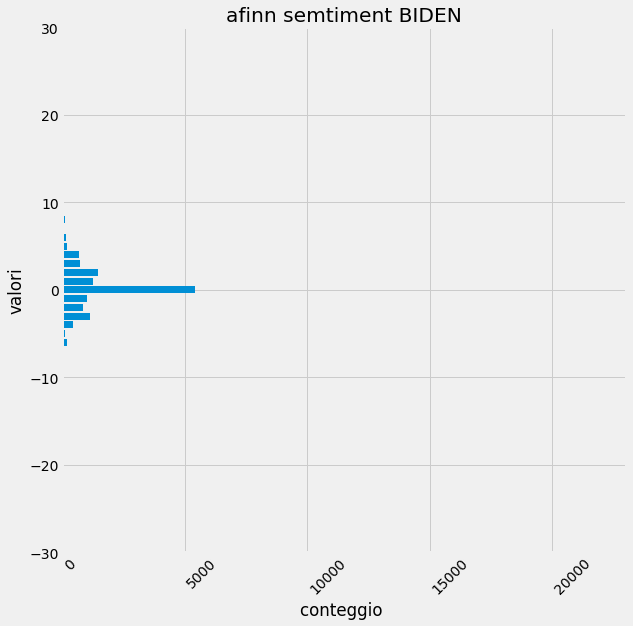

In [ ]:
df_value_counts1 = pd.DataFrame(_2_nov_unito_biden_FIN.afinn.value_counts())
df_value_counts1 = df_value_counts1.reset_index()
df_value_counts1.columns = ['valori', 'counts']
fig, ax = plt.subplots(figsize=(9, 9))
ax.barh(df_value_counts1['valori'], df_value_counts1['counts'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='left')
ax.set(xlim=[0, 23000], ylim=[-30,30],xlabel='conteggio ', ylabel='valori',
       title='afinn semtiment BIDEN')

In [ ]:
Estremi_positivi=_2_nov_unito_trump_FIN[_2_nov_unito_trump_FIN['afinn'] > 20].head()
Estremi_positivi2=Estremi_positivi[['afinn','Text','Text_clean_1']]
Estremi_positivi2

,afinn,Text,Text_clean_1


In [ ]:
Estremi_negativi3=_2_nov_unito_trump_FIN[_2_nov_unito_trump_FIN['afinn'] <-6].head()
Estremi_negativi4=Estremi_negativi3[['afinn','Text','Text_clean_1']]
Estremi_negativi4

,afinn,Text,Text_clean_1
7376,-8.0,Trumpery attacking Dr Fauci summarizes modern ...,"[('trumpery', 'NN'), ('attacking', 'VBG'), ('d..."
11639,-12.0,"RT @gerardtbaker: Trump Is Terribly Flawed, bu...","[('@gerardtbaker', 'NN'), ('trump', 'NN'), ('t..."
13229,-9.0,RT @dearsusanbranch: I imagine we're in for at...,"[('@dearsusanbranch', 'JJ'), ('imagine', 'NN')..."
7880,-13.0,Poor dumb bastards don't understand they're in...,"[('poor', 'JJ'), ('dumb', 'JJ'), ('bastard', '..."
7915,-10.0,"The day @realDonaldTrump says racism is wrong,...","[('day', 'NN'), ('@realdonaldtrump', 'NNS'), (..."


2062.0


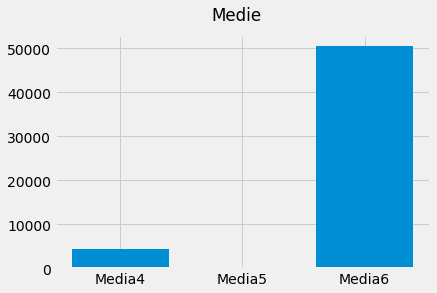

In [ ]:
#SI CALCOLA LA SOMMA DEI VALORI DELLA SENTIMENT DI TUTTI I TWEETS PER IL GIORNO 3 NOVEMBRE SU TRUMP
df_value_counts1['somma'] = (df_value_counts1['valori']*df_value_counts1['counts'])
sommafinale1 = df_value_counts1['somma'].sum()
print(sommafinale1)
neg=df_value_counts1.loc[(df_value_counts['valori'] < 0)]
pos=df_value_counts1.loc[(df_value_counts['valori'] > 0)]
neutro= df_value_counts1.loc[(df_value_counts['valori'] == 0)]
Media4=pos.agg(np.mean)
Media5=neg.agg(np.mean)
Media6=neutro.agg(np.mean)
Media4=pos.agg(np.mean)
Media5=neg.agg(np.mean)
Media6=neutro.agg(np.mean)
df= pd.DataFrame({'Media4':[Media4.counts],'Media5':[Media5.counts],'Media6':[Media6.counts]})
c=np.transpose(df)
Medie = ['Media4', 'Media5', 'Media6']
valori = [4393.307692, 375.444444, 50524.0]
plot.bar(Medie, valori)
plot.suptitle('Medie')
plot.show()

TEXT BLOB 

In [ ]:
from tweepy import OAuthHandler 
from textblob import TextBlob 

In [ ]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [ ]:
_2_nov_unito_trump_FIN['Subjectivity'] = _2_nov_unito_trump_FIN['Text_clean_1'].apply(getTextSubjectivity)
_2_nov_unito_trump_FIN['Polarity'] = _2_nov_unito_trump_FIN['Text_clean_1'].apply(getTextPolarity)
_2_nov_unito_biden_FIN['Subjectivity'] = _2_nov_unito_biden_FIN['Text_clean_1'].apply(getTextSubjectivity)
_2_nov_unito_biden_FIN['Polarity'] = _2_nov_unito_biden_FIN['Text_clean_1'].apply(getTextPolarity)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
# negative, nautral, positive analysis
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

In [ ]:
_2_nov_unito_biden_FIN['Score'] = _2_nov_unito_biden_FIN['Polarity'].apply(getTextAnalysis)
_2_nov_unito_trump_FIN['Score'] = _2_nov_unito_trump_FIN['Polarity'].apply(getTextAnalysis)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print("[POSITIVE]")
positive_biden_2 = _2_nov_unito_biden_FIN[_2_nov_unito_biden_FIN['Score'] == 'Positive']
print(str(positive_biden_2.shape[0]/(_2_nov_unito_biden_FIN.shape[0])*100) + " % of positive tweets [BIDEN]")
positive_trump_2 = _2_nov_unito_trump_FIN[_2_nov_unito_trump_FIN['Score'] == 'Positive']
print(str(positive_trump_2.shape[0]/(_2_nov_unito_trump_FIN.shape[0])*100) + " % of positive tweets [TRUMP]")
print("\\\\\\\\\\")
print("[NEGATIVE]")
negative_biden_2 = _2_nov_unito_biden_FIN[_2_nov_unito_biden_FIN['Score'] == 'Negative']
print(str(negative_biden_2.shape[0]/(_2_nov_unito_biden_FIN.shape[0])*100) + " % of negative tweets [BIDEN]")
negative_trump_2 = _2_nov_unito_trump_FIN[_2_nov_unito_trump_FIN['Score'] == 'Negative']
print(str(negative_trump_2.shape[0]/(_2_nov_unito_trump_FIN.shape[0])*100) + " % of negative tweets [TRUMP]")
print("\\\\\\\\\\")
print("[NEUTRAL]")
neutral_biden_2 = _2_nov_unito_biden_FIN[_2_nov_unito_biden_FIN['Score'] == 'Neutral']
print(str(neutral_biden_2.shape[0]/(_2_nov_unito_biden_FIN.shape[0])*100) + " % of neutral tweets [BIDEN]")
neutral_trump_2 = _2_nov_unito_trump_FIN[_2_nov_unito_trump_FIN['Score'] == 'Neutral']
print(str(neutral_trump_2.shape[0]/(_2_nov_unito_trump_FIN.shape[0])*100) + " % of neutral tweets [TRUMP]")

[POSITIVE]
38.925859968131974 % of positive tweets [BIDEN]
35.619912704966374 % of positive tweets [TRUMP]
\\\\\
[NEGATIVE]
12.025494423094948 % of negative tweets [BIDEN]
15.406393771381385 % of negative tweets [TRUMP]
\\\\\
[NEUTRAL]
49.04864560877308 % of neutral tweets [BIDEN]
48.97369352365224 % of neutral tweets [TRUMP]


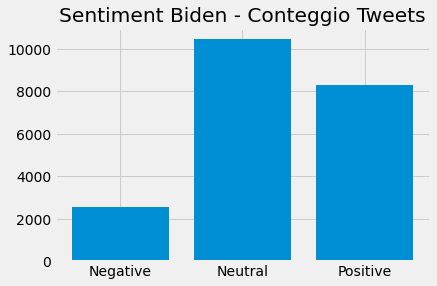

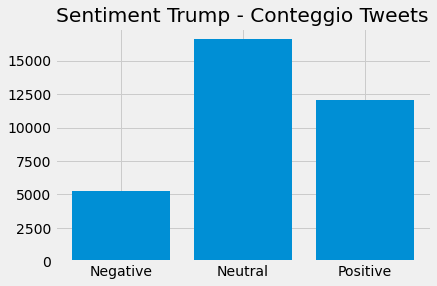

In [ ]:
labels_biden = _2_nov_unito_biden_FIN.groupby('Score').count().index.values
values_biden = _2_nov_unito_biden_FIN.groupby('Score').size().values
plt.bar(labels_biden, values_biden)
plt.title("Sentiment Biden - Conteggio Tweets")
plt.show()

labels_trump = _2_nov_unito_trump_FIN.groupby('Score').count().index.values
values_trump = _2_nov_unito_trump_FIN.groupby('Score').size().values
plt.bar(labels_trump, values_trump)
plt.title("Sentiment Trump - Conteggio Tweets")

plt.show()

OPINION LEXICON(NLTK)

E' stata creata una funzione per la gestione del 'not' e del 'but' all'interno di una frase.  

In [ ]:
import nltk
nltk.download('opinion_lexicon')
from nltk.corpus import opinion_lexicon

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


In [ ]:
pos_list=set(opinion_lexicon.positive())
neg_list=set(opinion_lexicon.negative())

In [ ]:
def sentiment_neg(sentence):
  total_sentiment = 0
  sentences = sentence.split(",")
  for s in sentences: 
    sentence_sentiment = 0
    sentence = [word.lower() for word in word_tokenize(s)] 
    

    for word in sentence:
      word = lemmatizer.lemmatize(word)

      if word in pos_list:
        sentence_sentiment += 1
      elif word in neg_list:
        sentence_sentiment -= 1

    if 'not' in sentence:
      sentence_sentiment = - sentence_sentiment
    total_sentiment += sentence_sentiment
  return total_sentiment

In [ ]:
_2_nov_unito_trump_FIN['Text_clean_3'] = _2_nov_unito_trump_FIN['Text_clean_3'].apply(str)
_2_nov_unito_biden_FIN['Text_clean_3'] = _2_nov_unito_biden_FIN['Text_clean_3'].apply(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
_2_nov_unito_trump_FIN['test1'] = _2_nov_unito_trump_FIN['Text_clean_3'].apply(sentiment_neg)
_2_nov_unito_trump_FIN.test1.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


 1     6701
 0     4838
 2     3619
 3     1382
-1     1027
-2      451
 4      279
-3      164
-4       51
 5       36
-5        2
 11       1
 10       1
-6        1
 6        1
Name: test1, dtype: int64

[(-10.0, 20.0),
 Text(0, 0.5, 'valori'),
 (0.0, 50000.0),
 Text(0.5, 0, 'conteggio '),
 Text(0.5, 1.0, 'lexicon based approach semtiment')]

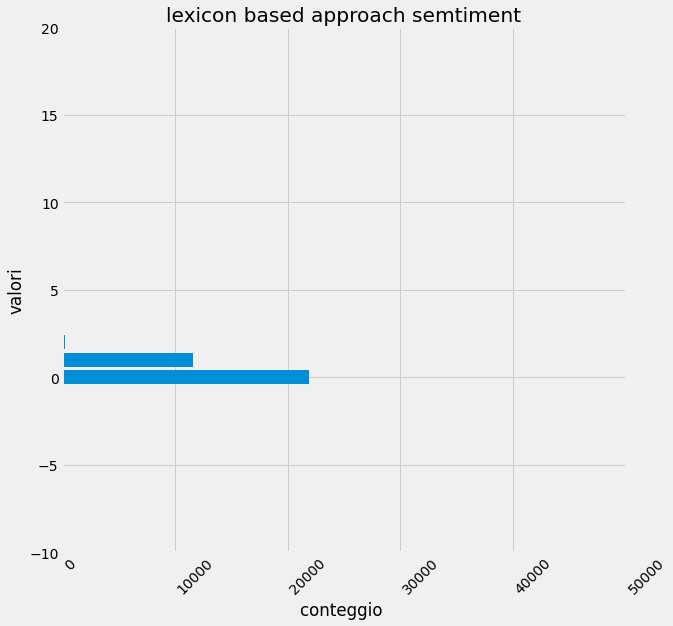

In [ ]:
df_value_counts3 = pd.DataFrame(_2_nov_unito_trump_FIN.test1.value_counts())
df_value_counts3 = df_value_counts3.reset_index()
df_value_counts3.columns = ['valori', 'counts']
fig, ax = plt.subplots(figsize=(9, 9))
ax.barh(df_value_counts3['valori'], df_value_counts3['counts'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='left')
ax.set(xlim=[0, 50000], ylim=[-10,20], xlabel='conteggio ', ylabel='valori',
       title='lexicon based approach semtiment')

In [ ]:
_2_nov_unito_biden_FIN['test1'] = _2_nov_unito_biden_FIN['Text_clean_3'].apply(sentiment_neg)
_2_nov_unito_biden_FIN.test1.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


 0    6686
 1    3296
-1    1510
 2    1258
-2     809
 3     306
-3      93
 4      77
-4      13
 5      12
 6       5
-5       3
-7       1
Name: test1, dtype: int64

[(-10.0, 20.0),
 Text(0, 0.5, 'valori'),
 (0.0, 50000.0),
 Text(0.5, 0, 'conteggio '),
 Text(0.5, 1.0, 'lexicon based approach semtiment')]

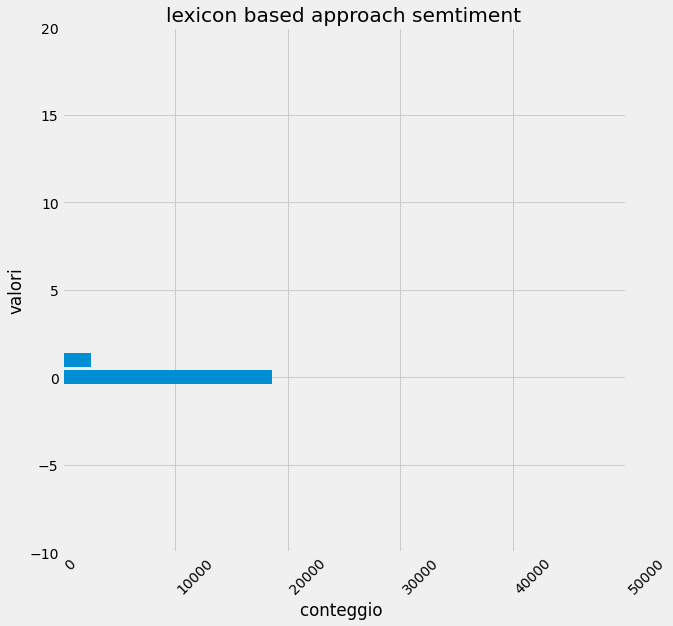

In [ ]:
df_value_counts4 = pd.DataFrame(_2_nov_unito_biden_FIN.test1.value_counts())
df_value_counts4 = df_value_counts4.reset_index()
df_value_counts4.columns = ['valori', 'counts']
fig, ax = plt.subplots(figsize=(9, 9))
ax.barh(df_value_counts4['valori'], df_value_counts4['counts'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='left')
ax.set(xlim=[0, 50000], ylim=[-10,20], xlabel='conteggio ', ylabel='valori',
       title='lexicon based approach semtiment')

VADER SENTIMENT

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
scores = []
# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

scores_1 = []
# Declare variables for scores
compound_list_1 = []
positive_list_1 = []
negative_list_1 = []
neutral_list_1 = []

scores_2 = []
# Declare variables for scores
compound_list_2 = []
positive_list_2 = []
negative_list_2 = []
neutral_list_2 = []

scores_3 = []
# Declare variables for scores
compound_list_3 = []
positive_list_3 = []
negative_list_3 = []
neutral_list_3 = []

In [ ]:
_2_nov_unito_biden_FIN = _2_nov_unito_biden_FIN.reset_index(drop=True)
_2_nov_unito_trump_FIN = _2_nov_unito_trump_FIN.reset_index(drop=True)

In [ ]:
for i in range(_2_nov_unito_trump_FIN['Text_clean_2'].shape[0]):
    compound = analyzer.polarity_scores(_2_nov_unito_trump_FIN['Text'][i])["compound"]
    pos = analyzer.polarity_scores(_2_nov_unito_trump_FIN['Text'][i])["pos"]
    neu = analyzer.polarity_scores(_2_nov_unito_trump_FIN['Text'][i])["neu"]
    neg = analyzer.polarity_scores(_2_nov_unito_trump_FIN['Text'][i])["neg"]
    scores_1.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })
for i in range(_2_nov_unito_biden_FIN['Text_clean_2'].shape[0]):
    compound = analyzer.polarity_scores(_2_nov_unito_biden_FIN['Text'][i])["compound"]
    pos = analyzer.polarity_scores(_2_nov_unito_biden_FIN['Text'][i])["pos"]
    neu = analyzer.polarity_scores(_2_nov_unito_biden_FIN['Text'][i])["neu"]
    neg = analyzer.polarity_scores(_2_nov_unito_biden_FIN['Text'][i])["neg"]
    scores_2.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

In [ ]:
sentiments_score_1 = pd.DataFrame.from_dict(scores_1)
_2_nov_unito_trump_FIN = _2_nov_unito_trump_FIN.join(sentiments_score_1)
_2_nov_unito_trump_FIN.head()

,_id,Screen_name,Text,Followers,Date_time,Hashtags,Novembre,Text_clean_1,Text_clean_2,Match_parola_trump,hashtags,afinn,Subjectivity,Polarity,Score,test1,Compound,Positive,Negative,Neutral
0,"ObjectId(""5f9fca3e98e9c66b902b5a45"")",CTruthforTrump,RT @CTruthforTrump: ❤️❤️OUR @POTUS IS A WARRIO...,56314,2020-11-02 08:58:33,NaN,2,"[('@ctruthfortrump', 'NN'), ('@potus', 'NN'), ...",: OUR IS A WARRIOR!!!!\n\nLook at this massiv...,trump,NaN,0.0,1.000000,0.000000,Neutral,0,0.0000,0.000,0.000,1.000
1,"ObjectId(""5f9fca4098e9c66b902b5a47"")",3lialbedaiwi,RT @StatesPoll: 2020 Electoral College Forecas...,8172,2020-11-02 08:58:35,NaN,2,"[('@statespoll', 'NN'), ('2020', 'CD'), ('elec...",: 2020 Electoral College Forecast Final Map \n...,trump,NaN,0.0,1.000000,0.000000,Neutral,0,0.0000,0.000,0.000,1.000
2,"ObjectId(""5f9fca4498e9c66b902b5a4d"")",Ozzzylot,RT @EDC_inLasVegas: This is @realDonaldTrump’s...,131,2020-11-02 08:58:39,NaN,2,"[('@edc_inlasvegas', 'NNS'), ('@realdonaldtrum...",: This is ’s America. Never before have we had...,trump,NaN,5.0,0.950000,0.750000,Positive,0,0.3612,0.111,0.000,0.889
3,"ObjectId(""5f9fca5898e9c66b902b5a63"")",Homonovae,"Just remember if trump wins, we are declaring ...",180,2020-11-02 08:58:59,NaN,2,"[('remember', 'VB'), ('trump', 'NN'), ('win', ...","Just remember if trump wins, we are declaring ...",trump,NaN,4.0,0.400000,0.800000,Positive,0,0.5719,0.150,0.000,0.850
4,"ObjectId(""5f9fca6698e9c66b902b5a70"")",4ALMTDTIMEONLY,"RT @TalbertSwan: Pro Trump white supremacists,...",15,2020-11-02 08:59:13,NaN,2,"[('@talbertswan', 'JJ'), ('pro', 'JJ'), ('trum...",": Pro Trump white supremacists, escorted by , ...",trump,NaN,-2.0,0.216667,-0.083333,Negative,0,-0.4215,0.000,0.183,0.817


In [ ]:
sentiments_score_2 = pd.DataFrame.from_dict(scores_2)
_2_nov_unito_biden_FIN = _2_nov_unito_biden_FIN.join(sentiments_score_2)
_2_nov_unito_biden_FIN.head()

,_id,Screen_name,Text,Followers,Date_time,Hashtags,Novembre,Text_clean_1,Text_clean_2,Match_parola_trump,Match_parola_biden,hashtags,afinn,Subjectivity,Polarity,Score,test1,Compound,Positive,Negative,Neutral
0,"ObjectId(""5f9fca4098e9c66b902b5a47"")",3lialbedaiwi,RT @StatesPoll: 2020 Electoral College Forecas...,8172,2020-11-02 08:58:35,NaN,2,"[('@statespoll', 'NN'), ('2020', 'CD'), ('elec...",: 2020 Electoral College Forecast Final Map \n...,trump,biden,NaN,0.0,1.000,0.00,Neutral,0,0.00,0.000,0.000,1.000
1,"ObjectId(""5f9fca4498e9c66b902b5a4c"")",skinnylenny1965,"RT @W7VOA: Updated @JoeBiden Monday schedule, ...",19614,2020-11-02 08:58:39,NaN,2,"[('@w7voa', 'RB'), ('updated', 'VBN'), ('@joeb...",": Updated Monday schedule, as released by his...",NaN,biden,NaN,0.0,0.000,0.00,Neutral,0,0.00,0.000,0.000,1.000
2,"ObjectId(""5f9fca5198e9c66b902b5a5c"")",Ioufits,RT @kjsorrel: as a state with the second highe...,373,2020-11-02 08:58:52,NaN,2,"[('@kjsorrel', 'JJ'), ('state', 'NN'), ('secon...",: as a state with the second highest electoral...,NaN,biden,NaN,1.0,0.225,0.25,Positive,0,0.25,0.135,0.099,0.766
3,"ObjectId(""5f9fca5498e9c66b902b5a5d"")",JAwkward22,RT @kjsorrel: as a state with the second highe...,11,2020-11-02 08:58:55,NaN,2,"[('@kjsorrel', 'JJ'), ('state', 'NN'), ('secon...",: as a state with the second highest electoral...,NaN,biden,NaN,1.0,0.225,0.25,Positive,0,0.25,0.135,0.099,0.766
4,"ObjectId(""5f9fca6c98e9c66b902b5a73"")",tkinder,Current Washington Trump vs Biden vote project...,70845,2020-11-02 08:59:19,NaN,2,"[('current', 'JJ'), ('washington', 'NN'), ('tr...",Current Washington Trump vs Biden vote project...,trump,biden,NaN,0.0,0.400,0.00,Neutral,0,0.00,0.000,0.000,1.000


In [ ]:
tot_compound_trump_2_nov = _2_nov_unito_trump_FIN["Compound"].sum()
media_compound_trump_2_nov = tot_compound_trump_2_nov/len(_2_nov_unito_trump_FIN)
print("La media del COMPOUND di trump del 2 Novembre risulta: " + str(media_compound_trump_2_nov))

tot_Positive_trump_2_nov = _2_nov_unito_trump_FIN["Positive"].sum()
media_Positive_trump_2_nov = tot_Positive_trump_2_nov/len(_2_nov_unito_trump_FIN)
print("La media del POSITIVE di trump del 2 Novembre risulta: " + str(media_Positive_trump_2_nov))

tot_Negative_trump_2_nov = _2_nov_unito_trump_FIN["Negative"].sum()
media_Negative_trump_2_nov = tot_Negative_trump_2_nov/len(_2_nov_unito_trump_FIN)
print("La media del NEGATIVE di trump del 2 Novembre risulta: " + str(media_Negative_trump_2_nov))

tot_Neutral_trump_2_nov = _2_nov_unito_trump_FIN["Neutral"].sum()
media_Neutral_trump_2_nov = tot_Neutral_trump_2_nov/len(_2_nov_unito_trump_FIN)
print("La media del NEUTRAL di trump del 2 Novembre risulta: " + str(media_Neutral_trump_2_nov))

La media del COMPOUND di trump del 2 Novembre risulta: 0.10146028665801583
La media del POSITIVE di trump del 2 Novembre risulta: 0.10052450749085762
La media del NEGATIVE di trump del 2 Novembre risulta: 0.05401554205497227
La media del NEUTRAL di trump del 2 Novembre risulta: 0.8454589772325115


In [ ]:
tot_compound_biden_2_nov = _2_nov_unito_biden_FIN["Compound"].sum()
media_compound_biden_2_nov = tot_compound_biden_2_nov/len(_2_nov_unito_biden_FIN)
print("La media del COMPOUND di biden del 2 Novembre risulta: " + str(media_compound_biden_2_nov))

tot_Positive_biden_2_nov = _2_nov_unito_biden_FIN["Positive"].sum()
media_Positive_biden_2_nov = tot_Positive_biden_2_nov/len(_2_nov_unito_biden_FIN)
print("La media del POSITIVE di biden del 2 Novembre risulta: " + str(media_Positive_biden_2_nov))

tot_Negative_biden_2_nov = _2_nov_unito_biden_FIN["Negative"].sum()
media_Negative_biden_2_nov = tot_Negative_biden_2_nov/len(_2_nov_unito_biden_FIN)
print("La media del NEGATIVE di biden del 2 Novembre risulta: " + str(media_Negative_biden_2_nov))

tot_Neutral_biden_2_nov = _2_nov_unito_biden_FIN["Neutral"].sum()
media_Neutral_biden_2_nov = tot_Neutral_biden_2_nov/len(_2_nov_unito_biden_FIN)
print("La media del NEUTRAL di biden del 2 Novembre risulta: " + str(media_Neutral_biden_2_nov))

La media del COMPOUND di biden del 2 Novembre risulta: 0.046913239291405
La media del POSITIVE di biden del 2 Novembre risulta: 0.06868947417752366
La media del NEGATIVE di biden del 2 Novembre risulta: 0.04856865685631268
La media del NEUTRAL di biden del 2 Novembre risulta: 0.882744024744587


Text(0.5, 0.98, 'VADER TRUMP')

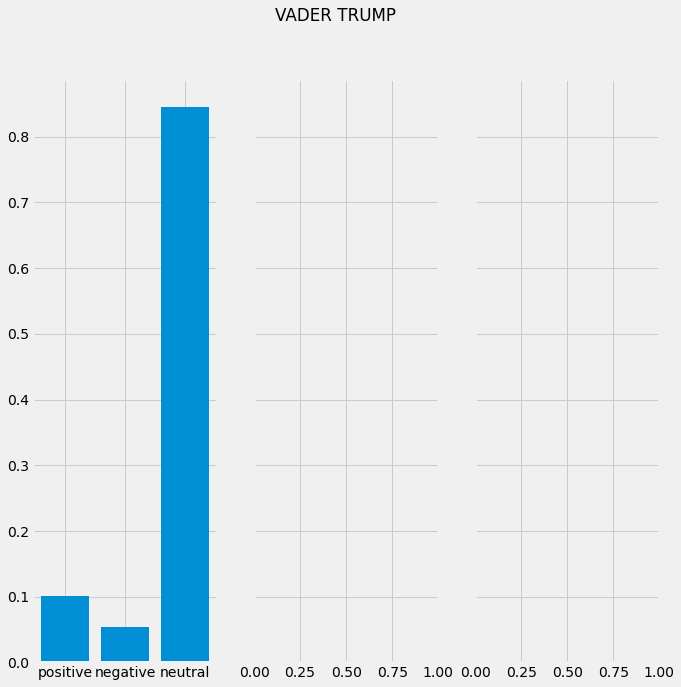

In [ ]:
results = {'positive':0.10052450749085762, 'negative':0.05401554205497227, 'neutral':0.8454589772325115}
names = list(results.keys())
values = list(results.values())

fig, axs = plt.subplots(1, 3, figsize=(10, 10), sharey=True)
axs[0].bar(names, values)
fig.suptitle('VADER TRUMP')

Text(0.5, 0.98, 'VADER BIDEN')

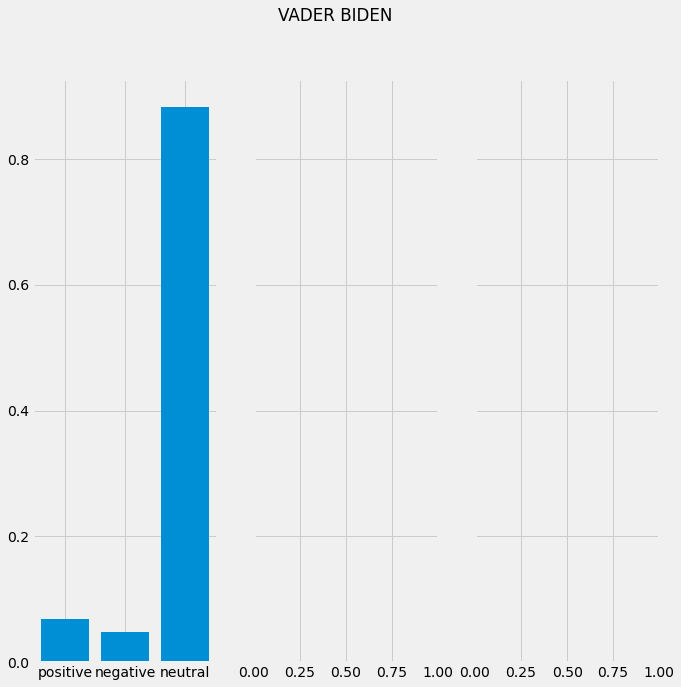

In [ ]:
results = {'positive': 0.06868947417752366, 'negative':0.04856865685631268, 'neutral':0.882744024744587}
names = list(results.keys())
values = list(results.values())

fig, axs = plt.subplots(1, 3, figsize=(10, 10), sharey=True)
axs[0].bar(names, values)
fig.suptitle('VADER BIDEN')

12109


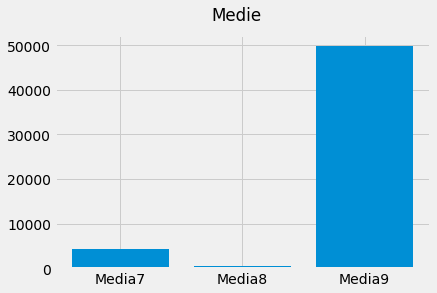

In [ ]:
#SI CALCOLA LA SOMMA DEI VALORI DELLA SENTIMENT DI TUTTI I TWEETS PER IL GIORNO 3 NOVEMBRE SU TRUMP
df_value_counts3['somma'] = (df_value_counts3['valori']*df_value_counts3['counts'])
sommafinale2 = df_value_counts3['somma'].sum()
print(sommafinale2)
neg=df_value_counts3.loc[(df_value_counts['valori'] < 0)]
pos=df_value_counts3.loc[(df_value_counts['valori'] > 0)]
neutro= df_value_counts3.loc[(df_value_counts['valori'] == 0)]
Media7=pos.agg(np.mean)
Media8=neg.agg(np.mean)
Media9=neutro.agg(np.mean)
df= pd.DataFrame({'Media7':[Media7.counts],'Media8':[Media8.counts],'Media9':[Media9.counts]})
c=np.transpose(df)

Medie = ['Media7', 'Media8', 'Media9']
valori = [4422.923077,416.777778, 49767.0]



plot.bar(Medie, valori)
plot.suptitle('Medie')
plot.show()

# 3 NOVEMBRE 

In [ ]:
#POS TAGGING AND CHUNK 
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

def preprocess_pos_tag(sent):
    sent = nltk.pos_tag(sent)
    return sent
    
dataset_unico_3_nov["Text_clean_1"] = dataset_unico_3_nov['Text_clean_1'].apply(preprocess_pos_tag)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
dataset_unico_3_nov['Text_clean_1']=dataset_unico_3_nov['Text_clean_1'].apply(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


DIVISIONE IN UN DATASET RELATIVO A TRUMP ED UNO A BIDEN 

In [ ]:
dataset_unico_3_nov = dataset_unico_3_nov.explode("hashtags")

[Text(0, 0.5, 'Hashtag presente nel Tweet'),
 (0.0, 250000.0),
 Text(0.5, 0, 'Numero di Tweets'),
 Text(0.5, 1.0, 'HASHTAGS 3 NOVEMBRE')]

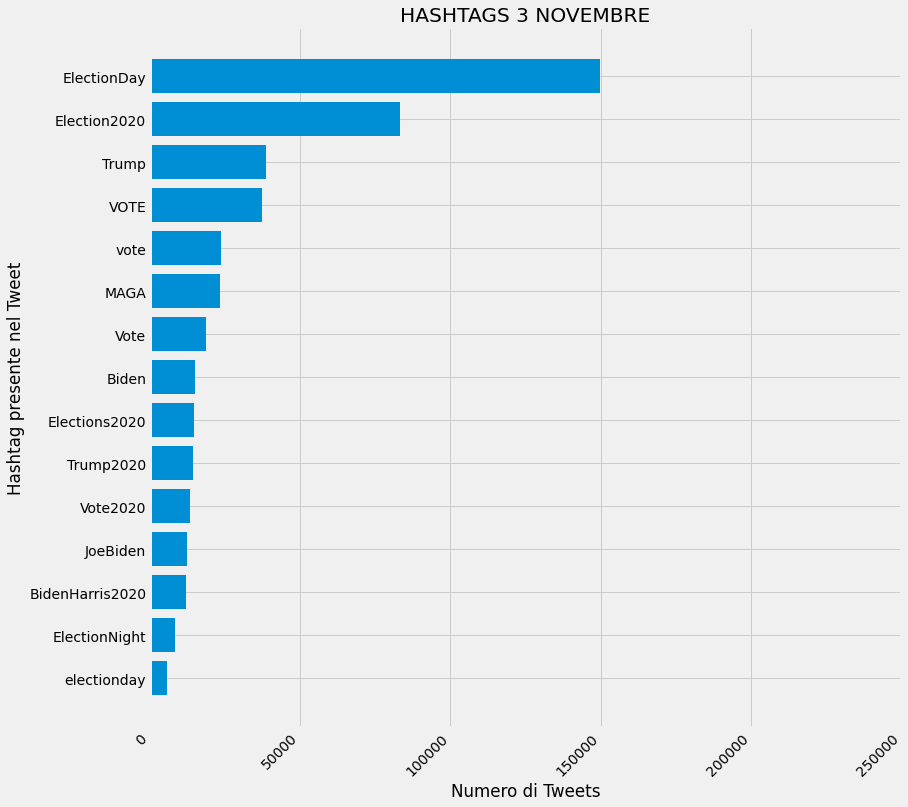

In [ ]:
#[PRESENZA DUPLICATI]
#Conteggio hashtag maggiormente presenti il 3 Novembre (di quelli raccolti):
conteggiogiorno_hashtags_3_nov = dataset_unico_3_nov.groupby('hashtags').size().reset_index(name='count')
conteggiogiorno_hashtags_3_nov = pd.DataFrame(conteggiogiorno_hashtags_3_nov).sort_values(by=['count'], ascending = True)
conteggiogiorno_hashtags_3_nov_top15 = conteggiogiorno_hashtags_3_nov.tail(15)

fig, ax = plt.subplots(figsize=(12, 12))
ax.barh(conteggiogiorno_hashtags_3_nov_top15['hashtags'], conteggiogiorno_hashtags_3_nov_top15['count'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[0, 250000], xlabel='Numero di Tweets', ylabel='Hashtag presente nel Tweet',
       title='HASHTAGS 3 NOVEMBRE')

In [ ]:
#[ESTRAZIONE TWEETS IN BASE AD HASHTAGS]
#COSTRUISCO I DATASETS DEL 3 NOVEMBRE CON TWEETS LEGATI A TRUMP E A BIDEN:
dataset_unico_3_nov_hashtags_trump = dataset_unico_3_nov.loc[(dataset_unico_3_nov['hashtags'] == "Trump") | (dataset_unico_3_nov['hashtags'] == "Trump2020" )]
print("Nel dataset con duplicati, tweets 3 Novembre e hashtags #Trump e #Trump2020, vi sono " + str(len(dataset_unico_3_nov_hashtags_trump.index)) + " tweets")
dataset_unico_3_nov_hashtags_biden = dataset_unico_3_nov.loc[(dataset_unico_3_nov['hashtags'] == "Biden") | (dataset_unico_3_nov['hashtags'] == "JoeBiden" ) | (dataset_unico_3_nov['hashtags'] == "BidenHarris2020" )]
print("Nel dataset con duplicati, tweets 3 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono " + str(len(dataset_unico_3_nov_hashtags_biden.index)) + " tweets")

dataset_unico_3_nov_hashtags_trump_nod = dataset_unico_3_nov_hashtags_trump.drop_duplicates(['_id'], keep="last")
print("[FINALE HASHTAGS] Nel dataset con tweets 3 Novembre e hashtags #Trump e #Trump2020, vi sono: " + str(len(dataset_unico_3_nov_hashtags_trump_nod.index)) + " tweets")
dataset_unico_3_nov_hashtags_biden_nod = dataset_unico_3_nov_hashtags_biden.drop_duplicates(['_id'], keep="last")
print("[FINALE HASHTAGS] Nel dataset con tweets 3 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono: " + str(len(dataset_unico_3_nov_hashtags_biden_nod.index)) + " tweets")

Nel dataset con duplicati, tweets 3 Novembre e hashtags #Trump e #Trump2020, vi sono 53174 tweets
Nel dataset con duplicati, tweets 3 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono 39813 tweets
[FINALE HASHTAGS] Nel dataset con tweets 3 Novembre e hashtags #Trump e #Trump2020, vi sono: 45046 tweets
[FINALE HASHTAGS] Nel dataset con tweets 3 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono: 38086 tweets


In [ ]:
#[ESTRAZIONE TWEETS IN BASE A PAROLE NEI TWEETS]
#Parole da utilizzare nel dataset di soliti tweets dove Trump viene citato nel testo:
parole_testo_trump =['Trump', 'Donald Trump', 'Trump2020', 'trump']

def matcherTrump(x):
    for i in parole_testo_trump:
        if i in x:
            return i
    else:
        return np.nan

#Parole da utilizzare nel dataset di soliti tweets dove Trump viene citato nel testo:
parole_testo_biden =['Biden', 'Joe Biden', 'Biden2020', 'BidenHarris2020', 'biden']

def matcherBiden(x):
    for i in parole_testo_biden:
        if i in x:
            return i
    else:
        return np.nan

#https://stackoverflow.com/questions/49073252/pandas-how-to-select-row-with-certain-word
#dataset_unico_3_nov_words_trump = dataset_unico_3_nov[dataset_unico_3_nov['Text_clean_1'].str.contains("Trump", regex=False, case=False, na=False)]
#TRUMP:
dataset_unico_3_nov['Match_parola_trump'] = dataset_unico_3_nov['Text_clean_1'].apply(matcherTrump)
dataset_unico_3_nov_words_trump = dataset_unico_3_nov.loc[(dataset_unico_3_nov['Match_parola_trump'] == "Trump") | (dataset_unico_3_nov['Match_parola_trump'] == "Donald Trump") | (dataset_unico_3_nov['Match_parola_trump'] == "Trump2020") | (dataset_unico_3_nov['Match_parola_trump'] == "trump")]
#Dataset nel quale sono contenuti i tweets dove sono contenute le parole riferite a trump nel testo:
dataset_unico_3_nov_words_trump_nod = dataset_unico_3_nov_words_trump.drop_duplicates(['_id'], keep="last")
dataset_unico_3_nov_words_trump_nod = remove_unwanted_cols(dataset_unico_3_nov_words_trump_nod, ["hashtags"])
print("[FINALE PAROLE] Nel dataset con tweets 3 Novembre e parole Trump, Donald Trump, trump e Trump2020, vi sono: " + str(len(dataset_unico_3_nov_words_trump_nod.index)) + " tweets")

#BIDEN:
dataset_unico_3_nov['Match_parola_biden'] = dataset_unico_3_nov['Text_clean_1'].apply(matcherBiden)
dataset_unico_3_nov_words_biden = dataset_unico_3_nov.loc[(dataset_unico_3_nov['Match_parola_biden'] == "Biden") | (dataset_unico_3_nov['Match_parola_biden'] == "Joe Biden") | (dataset_unico_3_nov['Match_parola_biden'] == "BidenHarris2020") | (dataset_unico_3_nov['Match_parola_biden'] == "biden") | (dataset_unico_3_nov['Match_parola_biden'] == "Biden2020")]
#Dataset nel quale sono contenuti i tweets dove sono contenute le parole riferite a trump nel testo:
dataset_unico_3_nov_words_biden_nod = dataset_unico_3_nov_words_biden.drop_duplicates(['_id'], keep="last")
dataset_unico_3_nov_words_biden_nod = remove_unwanted_cols(dataset_unico_3_nov_words_biden_nod, ["hashtags"])
print("[FINALE PAROLE] Nel dataset con tweets 3 Novembre e parole Biden, Joe Biden, biden, BidenHarris2020 e Biden2020, vi sono: " + str(len(dataset_unico_3_nov_words_biden_nod.index)) + " tweets")

[FINALE PAROLE] Nel dataset con tweets 3 Novembre e parole Trump, Donald Trump, trump e Trump2020, vi sono: 63951 tweets
[FINALE PAROLE] Nel dataset con tweets 3 Novembre e parole Biden, Joe Biden, biden, BidenHarris2020 e Biden2020, vi sono: 31160 tweets


In [ ]:
#UNIONE UNICO DATASET PER TRUMP E BIDEN CON I TWEETS CHE CONTENGONO HASHTAGS E PAROLE RIFERITI A LORO DUE:
#TRUMP
_3_nov_unito_trump = pd.concat([dataset_unico_3_nov_words_trump_nod, dataset_unico_3_nov_hashtags_trump_nod])
_3_nov_unito_trump_FIN = _3_nov_unito_trump.drop_duplicates(['_id'], keep="last")
print("Nel dataset finale relativo a Trump, del 3 Novembre, vi sono:" + str(len(_3_nov_unito_trump_FIN.index)) + " tweets")

#BIDEN:
_3_nov_unito_biden = pd.concat([dataset_unico_3_nov_words_biden_nod, dataset_unico_3_nov_hashtags_biden_nod])
_3_nov_unito_biden_FIN = _3_nov_unito_biden.drop_duplicates(['_id'], keep="last")
print("Nel dataset finale relativo a Biden, del 3 Novembre, vi sono:" + str(len(_3_nov_unito_biden_FIN.index)) + " tweets")

Nel dataset finale relativo a Trump, del 3 Novembre, vi sono:104066 tweets
Nel dataset finale relativo a Biden, del 3 Novembre, vi sono:67088 tweets


AFINN

In [ ]:
pip install afinn 

In [ ]:
from afinn import Afinn
afinn = Afinn()
_3_nov_unito_trump_FIN['afinn'] = _3_nov_unito_trump_FIN['Text_clean_3'].apply(afinn.score)
_3_nov_unito_trump_FIN.afinn.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


 0.0     43190
 2.0      9627
 3.0      9213
 4.0      7360
 1.0      6804
-2.0      6198
-1.0      5851
-3.0      4328
 6.0      2463
 5.0      1955
-4.0      1468
-5.0      1229
 7.0       798
 9.0       736
 8.0       686
-6.0       530
-7.0       295
 11.0      289
-8.0       272
 12.0      216
 10.0      134
 13.0      101
-9.0        90
-11.0       42
-10.0       37
 16.0       33
 14.0       28
-13.0       24
-12.0       23
 15.0       13
 17.0        8
-16.0        6
 21.0        4
 20.0        4
-17.0        3
 19.0        3
 26.0        1
-14.0        1
 18.0        1
-18.0        1
-20.0        1
Name: afinn, dtype: int64

[(-25.0, 20.0),
 Text(0, 0.5, 'valori'),
 (0.0, 23000.0),
 Text(0.5, 0, 'conteggio '),
 Text(0.5, 1.0, 'afinn semtiment')]

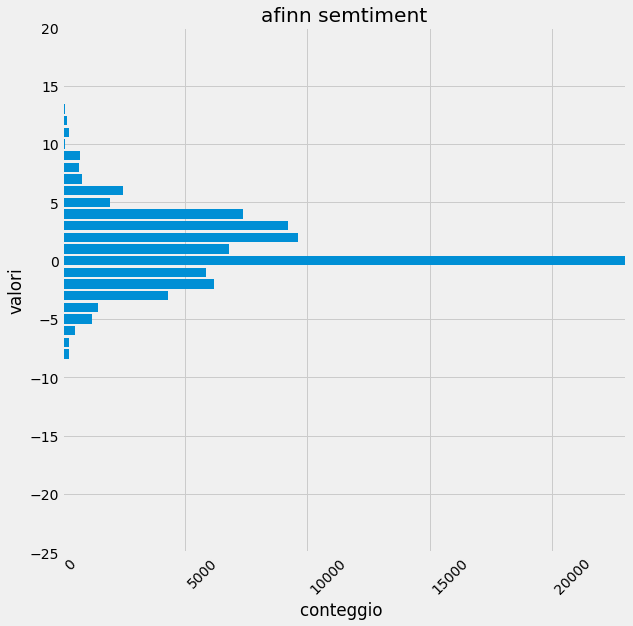

In [ ]:
df_value_counts = pd.DataFrame(_3_nov_unito_trump_FIN.afinn.value_counts())
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['valori', 'counts']
fig, ax = plt.subplots(figsize=(9, 9))
ax.barh(df_value_counts['valori'], df_value_counts['counts'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='left')
ax.set(xlim=[0, 23000], ylim=[-25,20],xlabel='conteggio ', ylabel='valori',
       title='afinn semtiment')

In [ ]:
_3_nov_unito_biden_FIN['afinn'] = _3_nov_unito_biden_FIN['Text_clean_3'].apply(afinn.score)
_3_nov_unito_biden_FIN.afinn.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


 0.0     29520
 2.0      7269
 1.0      5281
 3.0      5109
 4.0      3849
-2.0      3588
-1.0      3323
-3.0      2028
 6.0      1701
 5.0      1219
-4.0      1081
 8.0       720
-5.0       559
 7.0       520
-6.0       247
 9.0       231
 11.0      176
 10.0      154
-7.0       127
 12.0      108
-9.0       100
-8.0        69
 14.0       27
 16.0       25
 13.0       19
-10.0       14
-11.0        5
 17.0        5
-12.0        4
-13.0        2
-17.0        2
-14.0        2
 15.0        2
 26.0        1
-24.0        1
Name: afinn, dtype: int64

[(-30.0, 30.0),
 Text(0, 0.5, 'valori'),
 (0.0, 23000.0),
 Text(0.5, 0, 'conteggio '),
 Text(0.5, 1.0, 'afinn semtiment BIDEN')]

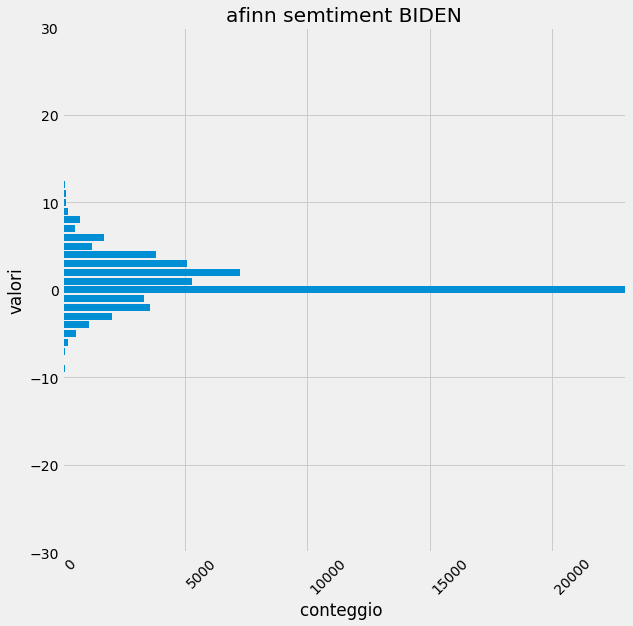

In [ ]:
df_value_counts1 = pd.DataFrame(_3_nov_unito_biden_FIN.afinn.value_counts())
df_value_counts1 = df_value_counts1.reset_index()
df_value_counts1.columns = ['valori', 'counts']
fig, ax = plt.subplots(figsize=(9, 9))
ax.barh(df_value_counts1['valori'], df_value_counts1['counts'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='left')
ax.set(xlim=[0, 23000], ylim=[-30,30],xlabel='conteggio ', ylabel='valori',
       title='afinn semtiment BIDEN')

In [ ]:
Estremi_positivi=_3_nov_unito_trump_FIN[_3_nov_unito_trump_FIN['afinn'] > 20].head()
Estremi_positivi2=Estremi_positivi[['afinn','Text','Text_clean_1']]
Estremi_positivi2

,afinn,Text,Text_clean_1
28188,24.0,@realDonaldTrump Winning winning winning winni...,"[('@realdonaldtrump', 'NN'), ('winning', 'VBG'..."
36638,21.0,BIBLICAL!\n\n#TRUMP2020 WE LOVE YOU!\nWE LOVE ...,"[('biblical', 'JJ'), ('#trump2020', 'NNP'), ('..."
24239,26.0,If #Trump wins - lol\nIf #Biden wins - lol\nIf...,"[('#trump', 'NN'), ('win', 'NN'), ('lol', 'NN'..."
27889,21.0,RT @gq1620: LOVE\nLOVE!\nLOVE!!\n\nI LOVE YOU ...,"[('@gq1620', 'NNS'), ('love', 'VBP'), ('nlove'..."
28048,21.0,RT @gq1620: LOVE\nLOVE!\nLOVE!!\n\nI LOVE YOU ...,"[('@gq1620', 'NNS'), ('love', 'VBP'), ('nlove'..."


In [ ]:
Estremi_negativi3=_3_nov_unito_trump_FIN[_3_nov_unito_trump_FIN['afinn'] <-6].head()
Estremi_negativi4=Estremi_negativi3[['afinn','Text','Text_clean_1']]
Estremi_negativi4

,afinn,Text,Text_clean_1
17107,-7.0,"COME ON AMERICA! Surely by now, you've realise...","[('come', 'VB'), ('america', 'NN'), ('surely',..."
18371,-7.0,Very suspicious!! The Democrats are obviously ...,"[('suspicious', 'JJ'), ('democrat', 'NNS'), ('..."
19896,-7.0,This is ridiculous. How difficult is it to put...,"[('ridiculous', 'JJ'), ('difficult', 'JJ'), ('..."
22431,-10.0,RT @ElijahSchaffer: So sad to see the open hat...,"[('@elijahschaffer', 'NN'), ('sad', 'JJ'), ('s..."
38296,-14.0,Requesting every Americans to go &amp; vote ou...,"[('requesting', 'VBG'), ('every', 'DT'), ('ame..."


77995.0


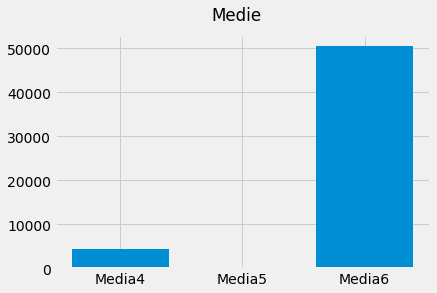

In [ ]:
#SI CALCOLA LA SOMMA DEI VALORI DELLA SENTIMENT DI TUTTI I TWEETS PER IL GIORNO 3 NOVEMBRE SU TRUMP
df_value_counts1['somma'] = (df_value_counts1['valori']*df_value_counts1['counts'])
sommafinale1 = df_value_counts1['somma'].sum()
print(sommafinale1)
neg=df_value_counts1.loc[(df_value_counts['valori'] < 0)]
pos=df_value_counts1.loc[(df_value_counts['valori'] > 0)]
neutro= df_value_counts1.loc[(df_value_counts['valori'] == 0)]
Media4=pos.agg(np.mean)
Media5=neg.agg(np.mean)
Media6=neutro.agg(np.mean)
Media4=pos.agg(np.mean)
Media5=neg.agg(np.mean)
Media6=neutro.agg(np.mean)
df= pd.DataFrame({'Media4':[Media4.counts],'Media5':[Media5.counts],'Media6':[Media6.counts]})
c=np.transpose(df)
Medie = ['Media4', 'Media5', 'Media6']
valori = [4393.307692, 375.444444, 50524.0]
plot.bar(Medie, valori)
plot.suptitle('Medie')
plot.show()

TEXT BLOB 

In [ ]:
from tweepy import OAuthHandler 
from textblob import TextBlob 

In [ ]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [ ]:
_3_nov_unito_trump_FIN['Subjectivity'] = _3_nov_unito_trump_FIN['Text_clean_1'].apply(getTextSubjectivity)
_3_nov_unito_trump_FIN['Polarity'] = _3_nov_unito_trump_FIN['Text_clean_1'].apply(getTextPolarity)
_3_nov_unito_biden_FIN['Subjectivity'] = _3_nov_unito_biden_FIN['Text_clean_1'].apply(getTextSubjectivity)
_3_nov_unito_biden_FIN['Polarity'] = _3_nov_unito_biden_FIN['Text_clean_1'].apply(getTextPolarity)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
# negative, nautral, positive analysis
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

In [ ]:
_3_nov_unito_biden_FIN['Score'] = _3_nov_unito_biden_FIN['Polarity'].apply(getTextAnalysis)
_3_nov_unito_trump_FIN['Score'] = _3_nov_unito_trump_FIN['Polarity'].apply(getTextAnalysis)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print("[POSITIVE]")
positive_biden_3 = _3_nov_unito_biden_FIN[_3_nov_unito_biden_FIN['Score'] == 'Positive']
print(str(positive_biden_3.shape[0]/(_3_nov_unito_biden_FIN.shape[0])*100) + " % of positive tweets [BIDEN]")
positive_trump_3 = _3_nov_unito_trump_FIN[_3_nov_unito_trump_FIN['Score'] == 'Positive']
print(str(positive_trump_3.shape[0]/(_3_nov_unito_trump_FIN.shape[0])*100) + " % of positive tweets [TRUMP]")
print("\\\\\\\\\\")
print("[NEGATIVE]")
negative_biden_3 = _3_nov_unito_biden_FIN[_3_nov_unito_biden_FIN['Score'] == 'Negative']
print(str(negative_biden_3.shape[0]/(_3_nov_unito_biden_FIN.shape[0])*100) + " % of negative tweets [BIDEN]")
negative_trump_3 = _3_nov_unito_trump_FIN[_3_nov_unito_trump_FIN['Score'] == 'Negative']
print(str(negative_trump_3.shape[0]/(_3_nov_unito_trump_FIN.shape[0])*100) + " % of negative tweets [TRUMP]")
print("\\\\\\\\\\")
print("[NEUTRAL]")
neutral_biden_3 = _3_nov_unito_biden_FIN[_3_nov_unito_biden_FIN['Score'] == 'Neutral']
print(str(neutral_biden_3.shape[0]/(_3_nov_unito_biden_FIN.shape[0])*100) + " % of neutral tweets [BIDEN]")
neutral_trump_3 = _3_nov_unito_trump_FIN[_3_nov_unito_trump_FIN['Score'] == 'Neutral']
print(str(neutral_trump_3.shape[0]/(_3_nov_unito_trump_FIN.shape[0])*100) + " % of neutral tweets [TRUMP]")

[POSITIVE]
33.648260741812265 % of positive tweets [BIDEN]
33.95060622884467 % of positive tweets [TRUMP]
\\\\\
[NEGATIVE]
12.143163890332934 % of negative tweets [BIDEN]
15.162586337613648 % of negative tweets [TRUMP]
\\\\\
[NEUTRAL]
54.208575367854806 % of neutral tweets [BIDEN]
50.886807433541684 % of neutral tweets [TRUMP]


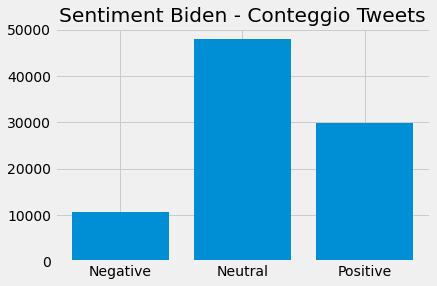

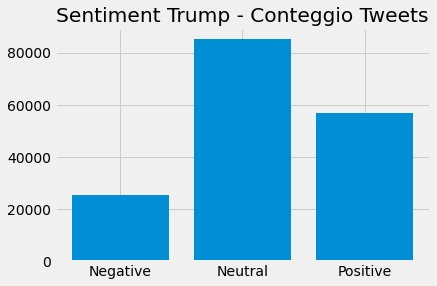

In [ ]:
labels_biden = _3_nov_unito_biden_FIN.groupby('Score').count().index.values
values_biden = _3_nov_unito_biden_FIN.groupby('Score').size().values
plt.bar(labels_biden, values_biden)
plt.title("Sentiment Biden - Conteggio Tweets")
plt.show()

labels_trump = _3_nov_unito_trump_FIN.groupby('Score').count().index.values
values_trump = _3_nov_unito_trump_FIN.groupby('Score').size().values
plt.bar(labels_trump, values_trump)
plt.title("Sentiment Trump - Conteggio Tweets")

plt.show()

OPINION LEXICON(NLTK)

E' stata creata una funzione per la gestione del 'not' e del 'but' all'interno di una frase.  

In [ ]:
import nltk
nltk.download('opinion_lexicon')
from nltk.corpus import opinion_lexicon

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


In [ ]:
pos_list=set(opinion_lexicon.positive())
neg_list=set(opinion_lexicon.negative())

In [ ]:
def sentiment_neg(sentence):
  total_sentiment = 0
  sentences = sentence.split(",")
  for s in sentences: 
    sentence_sentiment = 0
    sentence = [word.lower() for word in word_tokenize(s)] 
    

    for word in sentence:
      word = lemmatizer.lemmatize(word)

      if word in pos_list:
        sentence_sentiment += 1
      elif word in neg_list:
        sentence_sentiment -= 1

    if 'not' in sentence:
      sentence_sentiment = - sentence_sentiment
    total_sentiment += sentence_sentiment
  return total_sentiment

In [ ]:
_3_nov_unito_trump_FIN['Text_clean_3'] = _3_nov_unito_trump_FIN['Text_clean_3'].apply(str)
_3_nov_unito_biden_FIN['Text_clean_3'] = _3_nov_unito_biden_FIN['Text_clean_3'].apply(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
_3_nov_unito_trump_FIN['test1'] = _3_nov_unito_trump_FIN['Text_clean_3'].apply(sentiment_neg)
_3_nov_unito_trump_FIN.test1.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


 1     43554
 2     22927
 0     19409
 3      7135
-1      6160
 4      1923
-2      1443
-3       507
 5       451
 17      203
-4       159
 6        98
 7        45
 20       20
-5         9
-6         7
 8         5
 19        4
 16        3
 10        2
-8         1
 9         1
Name: test1, dtype: int64

[(-10.0, 20.0),
 Text(0, 0.5, 'valori'),
 (0.0, 50000.0),
 Text(0.5, 0, 'conteggio '),
 Text(0.5, 1.0, 'lexicon based approach semtiment')]

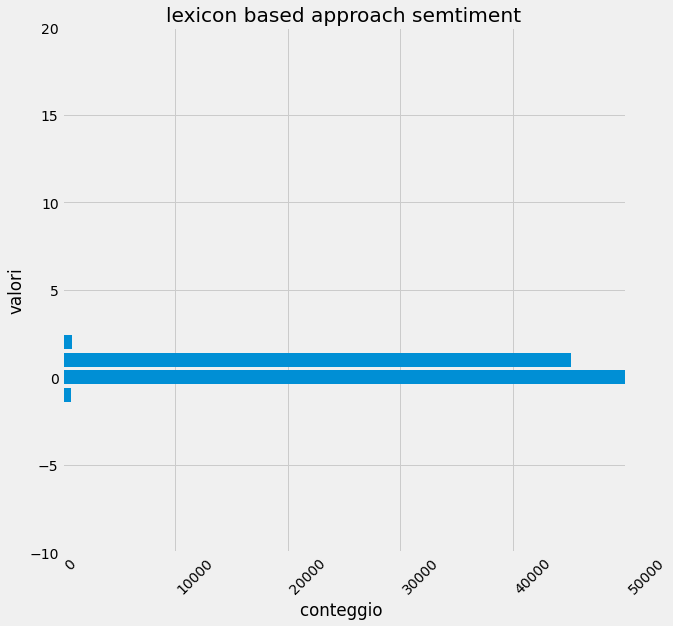

In [ ]:
df_value_counts3 = pd.DataFrame(_3_nov_unito_trump_FIN.test1.value_counts())
df_value_counts3 = df_value_counts3.reset_index()
df_value_counts3.columns = ['valori', 'counts']
fig, ax = plt.subplots(figsize=(9, 9))
ax.barh(df_value_counts3['valori'], df_value_counts3['counts'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='left')
ax.set(xlim=[0, 50000], ylim=[-10,20], xlabel='conteggio ', ylabel='valori',
       title='lexicon based approach semtiment')

In [ ]:
_3_nov_unito_biden_FIN['test1'] = _3_nov_unito_biden_FIN['Text_clean_3'].apply(sentiment_neg)
_3_nov_unito_biden_FIN.test1.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


 0    30481
 1    18257
-1     6854
 2     6650
 3     2676
-2     1474
 4      337
-3      209
 5       74
-4       49
 6       19
-5        6
 8        2
Name: test1, dtype: int64

[(-10.0, 20.0),
 Text(0, 0.5, 'valori'),
 (0.0, 50000.0),
 Text(0.5, 0, 'conteggio '),
 Text(0.5, 1.0, 'lexicon based approach semtiment')]

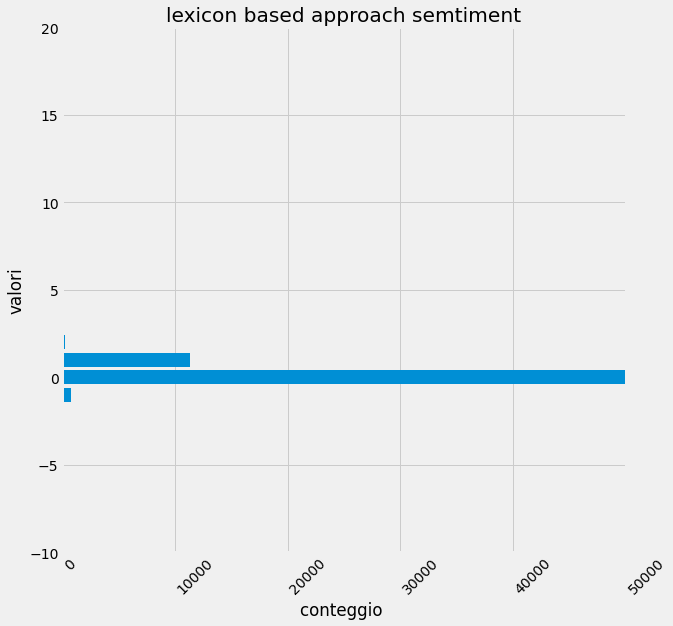

In [ ]:
df_value_counts4 = pd.DataFrame(_3_nov_unito_biden_FIN.test1.value_counts())
df_value_counts4 = df_value_counts4.reset_index()
df_value_counts4.columns = ['valori', 'counts']
fig, ax = plt.subplots(figsize=(9, 9))
ax.barh(df_value_counts4['valori'], df_value_counts4['counts'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='left')
ax.set(xlim=[0, 50000], ylim=[-10,20], xlabel='conteggio ', ylabel='valori',
       title='lexicon based approach semtiment')

VADER SENTIMENT

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
scores = []
# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

scores_1 = []
# Declare variables for scores
compound_list_1 = []
positive_list_1 = []
negative_list_1 = []
neutral_list_1 = []

scores_2 = []
# Declare variables for scores
compound_list_2 = []
positive_list_2 = []
negative_list_2 = []
neutral_list_2 = []

scores_3 = []
# Declare variables for scores
compound_list_3 = []
positive_list_3 = []
negative_list_3 = []
neutral_list_3 = []

In [ ]:
_3_nov_unito_biden_FIN = _3_nov_unito_biden_FIN.reset_index(drop=True)
_3_nov_unito_trump_FIN = _3_nov_unito_trump_FIN.reset_index(drop=True)

In [ ]:
for i in range(_3_nov_unito_trump_FIN['Text_clean_2'].shape[0]):
    compound = analyzer.polarity_scores(_3_nov_unito_trump_FIN['Text_clean_2'][i])["compound"]
    pos = analyzer.polarity_scores(_3_nov_unito_trump_FIN['Text_clean_2'][i])["pos"]
    neu = analyzer.polarity_scores(_3_nov_unito_trump_FIN['Text_clean_2'][i])["neu"]
    neg = analyzer.polarity_scores(_3_nov_unito_trump_FIN['Text_clean_2'][i])["neg"]
    scores_1.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })
for i in range(_3_nov_unito_biden_FIN['Text_clean_2'].shape[0]):
    compound = analyzer.polarity_scores(_3_nov_unito_biden_FIN['Text_clean_2'][i])["compound"]
    pos = analyzer.polarity_scores(_3_nov_unito_biden_FIN['Text_clean_2'][i])["pos"]
    neu = analyzer.polarity_scores(_3_nov_unito_biden_FIN['Text_clean_2'][i])["neu"]
    neg = analyzer.polarity_scores(_3_nov_unito_biden_FIN['Text_clean_2'][i])["neg"]
    scores_2.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

In [ ]:
sentiments_score_1 = pd.DataFrame.from_dict(scores_1)
_3_nov_unito_trump_FIN = _3_nov_unito_trump_FIN.join(sentiments_score_1)
_3_nov_unito_trump_FIN.head()

,_id,Screen_name,Text,Followers,Date_time,Hashtags,Novembre,Text_clean_1,Text_clean_2,Match_parola_trump,hashtags,afinn,Subjectivity,Polarity,Score,test1,Compound,Positive,Negative,Neutral
0,"ObjectId(""5fa1132ccf98d919ebcf4ed7"")",Bob82993203,@JoeBiden Exclusive: Deutsche Bank is looking ...,32,2020-11-03 08:21:59,NaN,3,"[('@joebiden', 'JJ'), ('exclusive', 'JJ'), ('d...",Exclusive: Deutsche Bank is looking for ways ...,trump,NaN,2.0,0.000,0.000,Neutral,0,0.1280,0.097,0.0,0.903
1,"ObjectId(""5fa1132ecf98d919ebcf4edc"")",struppa_anthony,RT @PastorDScott: We need to set all time reco...,16983,2020-11-03 08:22:01,NaN,3,"[('@pastordscott', 'NNS'), ('need', 'VBP'), ('...",: We need to set all time records in voter tur...,trump,NaN,0.0,0.000,0.000,Neutral,0,0.0000,0.000,0.0,1.000
2,"ObjectId(""5fa1132ecf98d919ebcf4edd"")",JimMeekII1,RT @PastorDScott: We need to set all time reco...,109,2020-11-03 08:22:01,NaN,3,"[('@pastordscott', 'NNS'), ('need', 'VBP'), ('...",: We need to set all time records in voter tur...,trump,NaN,0.0,0.000,0.000,Neutral,0,0.0000,0.000,0.0,1.000
3,"ObjectId(""5fa1132ecf98d919ebcf4ede"")",ads82,"America, please do not mess this up! #TrumpOut...",273,2020-11-03 08:22:01,NaN,3,"[('america', 'JJ'), ('please', 'NN'), ('mess',...","America, please do not mess this up! TrumpOut ...",trump,NaN,-1.0,0.175,-0.175,Negative,0,0.5722,0.402,0.0,0.598
4,"ObjectId(""5fa1132fcf98d919ebcf4ee1"")",KaiC1996,RT @HRC: |￣￣￣￣￣￣|\n| TIME |\n| ...,9,2020-11-03 08:22:02,NaN,3,"[('@hrc', 'JJ'), ('time', 'NN'), ('vote', 'NN'...",: ||\n| TIME |\n| TO VOTE ...,trump,NaN,0.0,0.000,0.000,Neutral,0,0.0000,0.000,0.0,1.000


In [ ]:
sentiments_score_2 = pd.DataFrame.from_dict(scores_2)
_3_nov_unito_biden_FIN = _3_nov_unito_biden_FIN.join(sentiments_score_2)
_3_nov_unito_biden_FIN.head()

,_id,Screen_name,Text,Followers,Date_time,Hashtags,Novembre,Text_clean_1,Text_clean_2,Match_parola_trump,Match_parola_biden,hashtags,afinn,Subjectivity,Polarity,Score,test1,Compound,Positive,Negative,Neutral
0,"ObjectId(""5fa1132ccf98d919ebcf4ed7"")",Bob82993203,@JoeBiden Exclusive: Deutsche Bank is looking ...,32,2020-11-03 08:21:59,NaN,3,"[('@joebiden', 'JJ'), ('exclusive', 'JJ'), ('d...",Exclusive: Deutsche Bank is looking for ways ...,trump,biden,NaN,2.0,0.0,0.0,Neutral,0,0.1280,0.097,0.000,0.903
1,"ObjectId(""5fa1132dcf98d919ebcf4eda"")",Austinm42974859,RT @TheDailyEdge: Let’s bark for Biden and ret...,134,2020-11-03 08:22:00,NaN,3,"[('@thedailyedge', 'NN'), ('let', 'NN'), ('bar...",: Let’s bark for Biden and return some dogs—an...,NaN,biden,NaN,0.0,0.0,0.0,Neutral,0,0.0000,0.000,0.000,1.000
2,"ObjectId(""5fa11330cf98d919ebcf4ee2"")",zflowrpowr,RT @kirkacevedo: HE’S GONNA GET HIS FAT ASS BE...,7888,2020-11-03 08:22:03,NaN,3,"[('@kirkacevedo', 'NN'), ('gonna', 'NN'), ('ge...",: HE’S GONNA GET HIS FAT ASS BEAT!\n-James Car...,NaN,biden,NaN,0.0,0.0,0.0,Neutral,0,-0.6731,0.000,0.312,0.688
3,"ObjectId(""5fa11331cf98d919ebcf4ee6"")",KenWarnock,RT @TheDailyEdge: Let’s bark for Biden and ret...,1734,2020-11-03 08:22:04,NaN,3,"[('@thedailyedge', 'NN'), ('let', 'NN'), ('bar...",: Let’s bark for Biden and return some dogs—an...,NaN,biden,NaN,0.0,0.0,0.0,Neutral,0,0.0000,0.000,0.000,1.000
4,"ObjectId(""5fa11332cf98d919ebcf4ee9"")",newtonsndegwa,Trump or Biden? \n#Election2020 \n#ElectionDay...,234,2020-11-03 08:22:05,NaN,3,"[('trump', 'NN'), ('biden', 'NN'), ('#election...",Trump or Biden? \nElection2020 \nElectionDay \...,trump,biden,NaN,0.0,0.0,0.0,Neutral,0,0.0000,0.000,0.000,1.000


In [ ]:
tot_compound_trump_3_nov = _3_nov_unito_trump_FIN["Compound"].sum()
media_compound_trump_3_nov = tot_compound_trump_3_nov/len(_3_nov_unito_trump_FIN)
print("La media del COMPOUND di trump del 3 Novembre risulta: " + str(media_compound_trump_3_nov))

tot_Positive_trump_3_nov = _3_nov_unito_trump_FIN["Positive"].sum()
media_Positive_trump_3_nov = tot_Positive_trump_3_nov/len(_3_nov_unito_trump_FIN)
print("La media del POSITIVE di trump del 3 Novembre risulta: " + str(media_Positive_trump_3_nov))

tot_Negative_trump_3_nov = _3_nov_unito_trump_FIN["Negative"].sum()
media_Negative_trump_3_nov = tot_Negative_trump_3_nov/len(_3_nov_unito_trump_FIN)
print("La media del NEGATIVE di trump del 3 Novembre risulta: " + str(media_Negative_trump_3_nov))

tot_Neutral_trump_3_nov = _3_nov_unito_trump_FIN["Neutral"].sum()
media_Neutral_trump_3_nov = tot_Neutral_trump_3_nov/len(_3_nov_unito_trump_FIN)
print("La media del NEUTRAL di trump del 3 Novembre risulta: " + str(media_Neutral_trump_3_nov))

La media del COMPOUND di trump del 3 Novembre risulta: 0.10951490648375328
La media del POSITIVE di trump del 3 Novembre risulta: 0.11800245357021327
La media del NEGATIVE di trump del 3 Novembre risulta: 0.05637853633492726
La media del NEUTRAL di trump del 3 Novembre risulta: 0.8242682271612015


In [ ]:
tot_compound_biden_3_nov = _3_nov_unito_biden_FIN["Compound"].sum()
media_compound_biden_3_nov = tot_compound_biden_3_nov/len(_3_nov_unito_biden_FIN)
print("La media del COMPOUND di Biden del 3 Novembre risulta: " + str(media_compound_biden_3_nov))

tot_Positive_biden_3_nov = _3_nov_unito_biden_FIN["Positive"].sum()
media_Positive_biden_3_nov = tot_Positive_biden_3_nov/len(_3_nov_unito_biden_FIN)
print("La media del POSITIVE di Biden del 3 Novembre risulta: " + str(media_Positive_biden_3_nov))

tot_Negative_biden_3_nov = _3_nov_unito_biden_FIN["Negative"].sum()
media_Negative_biden_3_nov = tot_Negative_biden_3_nov/len(_3_nov_unito_biden_FIN)
print("La media del NEGATIVE di Biden del 3 Novembre risulta: " + str(media_Negative_biden_3_nov))

tot_Neutral_biden_3_nov = _3_nov_unito_biden_FIN["Neutral"].sum()
media_Neutral_biden_3_nov = tot_Neutral_biden_3_nov/len(_3_nov_unito_biden_FIN)
print("La media del NEUTRAL di Biden del 3 Novembre risulta: " + str(media_Neutral_biden_3_nov))

La media del COMPOUND di Biden del 3 Novembre risulta: 0.10991863006577311
La media del POSITIVE di Biden del 3 Novembre risulta: 0.09750092670026897
La media del NEGATIVE di Biden del 3 Novembre risulta: 0.046807811405194036
La media del NEUTRAL di Biden del 3 Novembre risulta: 0.8553261193861176


Text(0.5, 0.98, 'VADER TRUMP')

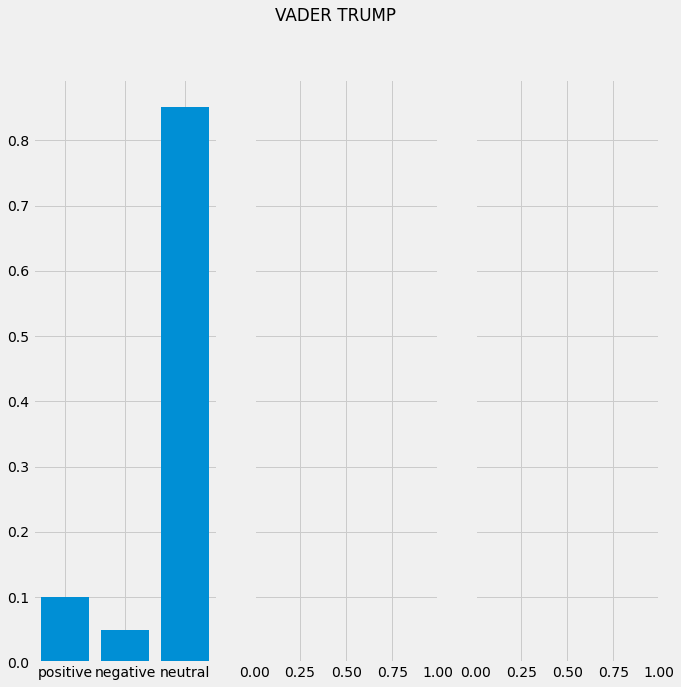

In [ ]:
results = {'positive':0.09973496904262395, 'negative':0.04884244145388801, 'neutral':0.8514245254055159}
names = list(results.keys())
values = list(results.values())

fig, axs = plt.subplots(1, 3, figsize=(10, 10), sharey=True)
axs[0].bar(names, values)
fig.suptitle('VADER TRUMP')

Text(0.5, 0.98, 'VADER BIDEN')

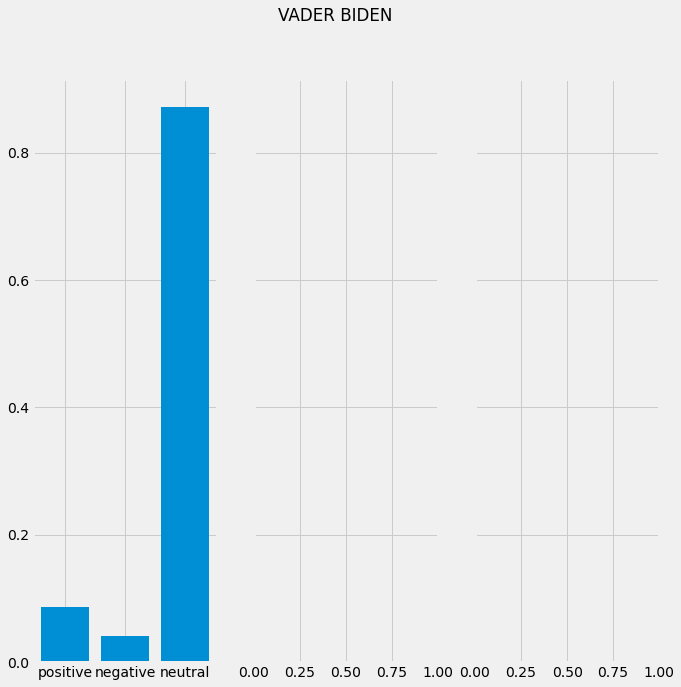

In [ ]:
results = {'positive': 0.08713479173393605, 'negative':0.04116622537939942, 'neutral':0.8717017274782046}
names = list(results.keys())
values = list(results.values())

fig, axs = plt.subplots(1, 3, figsize=(10, 10), sharey=True)
axs[0].bar(names, values)
fig.suptitle('VADER BIDEN')

47825


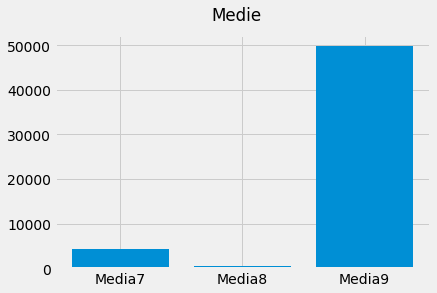

In [ ]:
#SI CALCOLA LA SOMMA DEI VALORI DELLA SENTIMENT DI TUTTI I TWEETS PER IL GIORNO 3 NOVEMBRE SU TRUMP
df_value_counts3['somma'] = (df_value_counts3['valori']*df_value_counts3['counts'])
sommafinale2 = df_value_counts3['somma'].sum()
print(sommafinale2)
neg=df_value_counts3.loc[(df_value_counts['valori'] < 0)]
pos=df_value_counts3.loc[(df_value_counts['valori'] > 0)]
neutro= df_value_counts3.loc[(df_value_counts['valori'] == 0)]
Media7=pos.agg(np.mean)
Media8=neg.agg(np.mean)
Media9=neutro.agg(np.mean)
df= pd.DataFrame({'Media7':[Media7.counts],'Media8':[Media8.counts],'Media9':[Media9.counts]})
c=np.transpose(df)

Medie = ['Media7', 'Media8', 'Media9']
valori = [4422.923077,416.777778, 49767.0]



plot.bar(Medie, valori)
plot.suptitle('Medie')
plot.show()

# 4 NOVEMBRE 

In [ ]:
#POS TAGGING AND CHUNK 
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

def preprocess_pos_tag(sent):
    sent = nltk.pos_tag(sent)
    return sent
    
dataset_unico_4_nov["Text_clean_1"] = dataset_unico_4_nov['Text_clean_1'].apply(preprocess_pos_tag)

KeyError: ignored

In [ ]:
dataset_unico_4_nov['Text_clean_1']=dataset_unico_4_nov['Text_clean_1'].apply(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


DIVISIONE IN UN DATASET RELATIVO A TRUMP ED UNO A BIDEN 

In [ ]:
dataset_unico_4_nov = dataset_unico_4_nov.explode("hashtags")

[Text(0, 0.5, 'Hashtag presente nel Tweet'),
 (0.0, 250000.0),
 Text(0.5, 0, 'Numero di Tweets'),
 Text(0.5, 1.0, 'HASHTAGS 4 NOVEMBRE')]

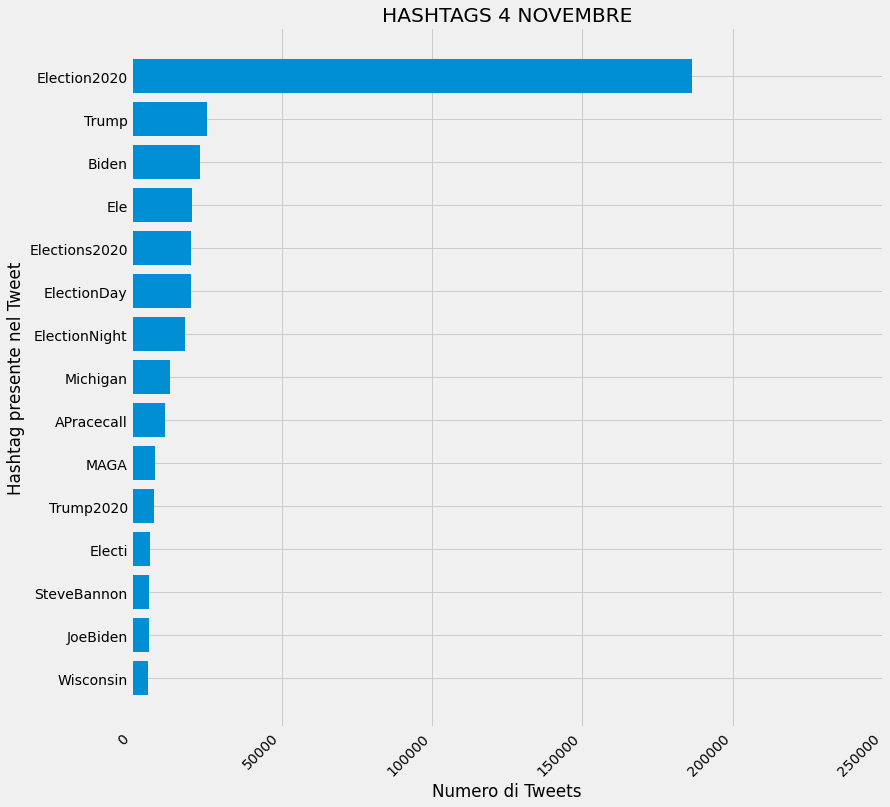

In [ ]:
#[PRESENZA DUPLICATI]
#Conteggio hashtag maggiormente presenti il 4 Novembre (di quelli raccolti):
conteggiogiorno_hashtags_4_nov = dataset_unico_4_nov.groupby('hashtags').size().reset_index(name='count')
conteggiogiorno_hashtags_4_nov = pd.DataFrame(conteggiogiorno_hashtags_4_nov).sort_values(by=['count'], ascending = True)
conteggiogiorno_hashtags_4_nov_top15 = conteggiogiorno_hashtags_4_nov.tail(15)

fig, ax = plt.subplots(figsize=(12, 12))
ax.barh(conteggiogiorno_hashtags_4_nov_top15['hashtags'], conteggiogiorno_hashtags_4_nov_top15['count'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[0, 250000], xlabel='Numero di Tweets', ylabel='Hashtag presente nel Tweet',
       title='HASHTAGS 4 NOVEMBRE')

In [ ]:
#[ESTRAZIONE TWEETS IN BASE AD HASHTAGS]
#COSTRUISCO I DATASETS DEL 2 NOVEMBRE CON TWEETS LEGATI A TRUMP E A BIDEN:
dataset_unico_4_nov_hashtags_trump = dataset_unico_4_nov.loc[(dataset_unico_4_nov['hashtags'] == "Trump") | (dataset_unico_4_nov['hashtags'] == "Trump2020" )]
print("Nel dataset con duplicati, tweets 4 Novembre e hashtags #Trump e #Trump2020, vi sono " + str(len(dataset_unico_4_nov_hashtags_trump.index)) + " tweets")
dataset_unico_4_nov_hashtags_biden = dataset_unico_4_nov.loc[(dataset_unico_4_nov['hashtags'] == "Biden") | (dataset_unico_4_nov['hashtags'] == "JoeBiden" ) | (dataset_unico_4_nov['hashtags'] == "BidenHarris2020" )]
print("Nel dataset con duplicati, tweets 4 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono " + str(len(dataset_unico_4_nov_hashtags_biden.index)) + " tweets")

dataset_unico_4_nov_hashtags_trump_nod = dataset_unico_4_nov_hashtags_trump.drop_duplicates(['_id'], keep="last")
print("[FINALE HASHTAGS] Nel dataset con tweets 4 Novembre e hashtags #Trump e #Trump2020, vi sono: " + str(len(dataset_unico_4_nov_hashtags_trump_nod.index)) + " tweets")
dataset_unico_4_nov_hashtags_biden_nod = dataset_unico_4_nov_hashtags_biden.drop_duplicates(['_id'], keep="last")
print("[FINALE HASHTAGS] Nel dataset con tweets 4 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono: " + str(len(dataset_unico_4_nov_hashtags_biden_nod.index)) + " tweets")

Nel dataset con duplicati, tweets 4 Novembre e hashtags #Trump e #Trump2020, vi sono 32817 tweets
Nel dataset con duplicati, tweets 4 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono 31558 tweets
[FINALE HASHTAGS] Nel dataset con tweets 4 Novembre e hashtags #Trump e #Trump2020, vi sono: 31010 tweets
[FINALE HASHTAGS] Nel dataset con tweets 4 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono: 30366 tweets


In [ ]:
#[ESTRAZIONE TWEETS IN BASE A PAROLE NEI TWEETS]
#Parole da utilizzare nel dataset di soliti tweets dove Trump viene citato nel testo:
parole_testo_trump =['Trump', 'Donald Trump', 'Trump2020', 'trump']

def matcherTrump(x):
    for i in parole_testo_trump:
        if i in x:
            return i
    else:
        return np.nan

#Parole da utilizzare nel dataset di soliti tweets dove Trump viene citato nel testo:
parole_testo_biden =['Biden', 'Joe Biden', 'Biden2020', 'BidenHarris2020', 'biden']

def matcherBiden(x):
    for i in parole_testo_biden:
        if i in x:
            return i
    else:
        return np.nan

#https://stackoverflow.com/questions/49073252/pandas-how-to-select-row-with-certain-word
#dataset_unico_4_nov_words_trump = dataset_unico_4_nov[dataset_unico_3_nov['Text_clean_1'].str.contains("Trump", regex=False, case=False, na=False)]
#TRUMP:
dataset_unico_4_nov['Match_parola_trump'] = dataset_unico_4_nov['Text_clean_1'].apply(matcherTrump)
dataset_unico_4_nov_words_trump = dataset_unico_4_nov.loc[(dataset_unico_4_nov['Match_parola_trump'] == "Trump") | (dataset_unico_4_nov['Match_parola_trump'] == "Donald Trump") | (dataset_unico_4_nov['Match_parola_trump'] == "Trump2020") | (dataset_unico_4_nov['Match_parola_trump'] == "trump")]
#Dataset nel quale sono contenuti i tweets dove sono contenute le parole riferite a trump nel testo:
dataset_unico_4_nov_words_trump_nod = dataset_unico_4_nov_words_trump.drop_duplicates(['_id'], keep="last")
dataset_unico_4_nov_words_trump_nod = remove_unwanted_cols(dataset_unico_4_nov_words_trump_nod, ["hashtags"])
print("[FINALE PAROLE] Nel dataset con tweets 4 Novembre e parole Trump, Donald Trump, trump e Trump2020, vi sono: " + str(len(dataset_unico_4_nov_words_trump_nod.index)) + " tweets")

#BIDEN:
dataset_unico_4_nov['Match_parola_biden'] = dataset_unico_4_nov['Text_clean_1'].apply(matcherBiden)
dataset_unico_4_nov_words_biden = dataset_unico_4_nov.loc[(dataset_unico_4_nov['Match_parola_biden'] == "Biden") | (dataset_unico_4_nov['Match_parola_biden'] == "Joe Biden") | (dataset_unico_4_nov['Match_parola_biden'] == "BidenHarris2020") | (dataset_unico_4_nov['Match_parola_biden'] == "biden") | (dataset_unico_4_nov['Match_parola_biden'] == "Biden2020")]
#Dataset nel quale sono contenuti i tweets dove sono contenute le parole riferite a trump nel testo:
dataset_unico_4_nov_words_biden_nod = dataset_unico_4_nov_words_biden.drop_duplicates(['_id'], keep="last")
dataset_unico_4_nov_words_biden_nod = remove_unwanted_cols(dataset_unico_4_nov_words_biden_nod, ["hashtags"])
print("[FINALE PAROLE] Nel dataset con tweets 4 Novembre e parole Biden, Joe Biden, biden, BidenHarris2020 e Biden2020, vi sono: " + str(len(dataset_unico_4_nov_words_biden_nod.index)) + " tweets")

[FINALE PAROLE] Nel dataset con tweets 4 Novembre e parole Trump, Donald Trump, trump e Trump2020, vi sono: 77472 tweets
[FINALE PAROLE] Nel dataset con tweets 4 Novembre e parole Biden, Joe Biden, biden, BidenHarris2020 e Biden2020, vi sono: 76418 tweets


In [ ]:
#UNIONE UNICO DATASET PER TRUMP E BIDEN CON I TWEETS CHE CONTENGONO HASHTAGS E PAROLE RIFERITI A LORO DUE:
#TRUMP
_4_nov_unito_trump = pd.concat([dataset_unico_4_nov_words_trump_nod, dataset_unico_4_nov_hashtags_trump_nod])
_4_nov_unito_trump_FIN = _4_nov_unito_trump.drop_duplicates(['_id'], keep="last")
print("Nel dataset finale relativo a Trump, del 4 Novembre, vi sono:" + str(len(_4_nov_unito_trump_FIN.index)) + " tweets")

#BIDEN:
_4_nov_unito_biden = pd.concat([dataset_unico_4_nov_words_biden_nod, dataset_unico_4_nov_hashtags_biden_nod])
_4_nov_unito_biden_FIN = _4_nov_unito_biden.drop_duplicates(['_id'], keep="last")
print("Nel dataset finale relativo a Biden, del 4 Novembre, vi sono:" + str(len(_4_nov_unito_biden_FIN.index)) + " tweets")

Nel dataset finale relativo a Trump, del 4 Novembre, vi sono:106310 tweets
Nel dataset finale relativo a Biden, del 4 Novembre, vi sono:104150 tweets


AFINN

In [ ]:
pip install afinn 

     |████████████████████████████████| 61kB 2.4MB/s 
  Created wheel for afinn: filename=afinn-0.1-cp36-none-any.whl size=53451 sha256=518d35f1af74c39a13866a6f9d8494708b36d70b1639663605dd5d5b12beb33e
  Stored in directory: /root/.cache/pip/wheels/b5/1c/de/428301f3333ca509dcf20ff358690eb23a1388fbcbbde008b2
Successfully built afinn


In [ ]:
from afinn import Afinn
afinn = Afinn()
_4_nov_unito_trump_FIN['afinn'] = _4_nov_unito_trump_FIN['Text_clean_3'].apply(afinn.score)
_4_nov_unito_trump_FIN.afinn.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


 0.0     38814
 4.0     10049
 3.0      9689
-2.0      6910
-1.0      6674
 2.0      6275
 1.0      6151
-3.0      5164
 5.0      3173
-8.0      2690
-4.0      2504
 7.0      2166
 6.0      1520
-6.0      1176
-5.0      1013
 8.0       564
-7.0       412
 9.0       360
 12.0      325
 10.0      143
-9.0       117
 11.0      100
-14.0       61
-12.0       59
-10.0       53
 14.0       38
-11.0       30
-13.0       24
-15.0       17
 13.0       13
 15.0        7
-17.0        5
 16.0        3
-25.0        3
-16.0        2
 21.0        2
-19.0        1
 17.0        1
 20.0        1
-20.0        1
Name: afinn, dtype: int64

[(-25.0, 20.0),
 Text(0, 0.5, 'valori'),
 (0.0, 23000.0),
 Text(0.5, 0, 'conteggio '),
 Text(0.5, 1.0, 'afinn semtiment')]

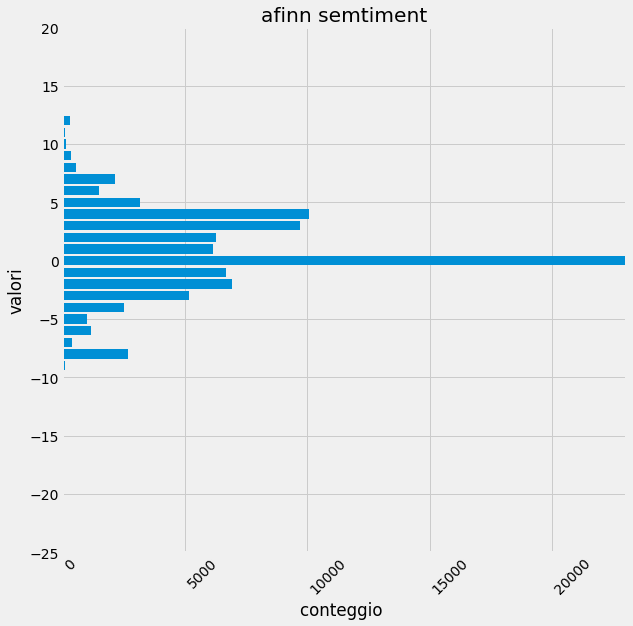

In [ ]:
df_value_counts = pd.DataFrame(_4_nov_unito_trump_FIN.afinn.value_counts())
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['valori', 'counts']
fig, ax = plt.subplots(figsize=(9, 9))
ax.barh(df_value_counts['valori'], df_value_counts['counts'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='left')
ax.set(xlim=[0, 23000], ylim=[-25,20],xlabel='conteggio ', ylabel='valori',
       title='afinn semtiment')

In [ ]:
_4_nov_unito_biden_FIN['afinn'] = _4_nov_unito_biden_FIN['Text_clean_3'].apply(afinn.score)
_4_nov_unito_biden_FIN.afinn.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


 0.0     34892
 4.0     24791
 3.0      8067
 2.0      6417
-1.0      5873
 1.0      4764
-2.0      3716
-3.0      2948
 6.0      2876
 7.0      2147
 5.0      2029
 8.0      1666
-4.0      1101
-5.0       890
-6.0       575
 9.0       395
 10.0      221
 12.0      192
-7.0       156
 11.0      109
-9.0       101
-8.0        65
 14.0       39
-12.0       38
 13.0       32
-10.0       22
 16.0        7
-11.0        6
-14.0        5
 20.0        2
 25.0        2
-13.0        2
-16.0        1
-17.0        1
 19.0        1
 15.0        1
Name: afinn, dtype: int64

[(-30.0, 30.0),
 Text(0, 0.5, 'valori'),
 (0.0, 23000.0),
 Text(0.5, 0, 'conteggio '),
 Text(0.5, 1.0, 'afinn semtiment BIDEN')]

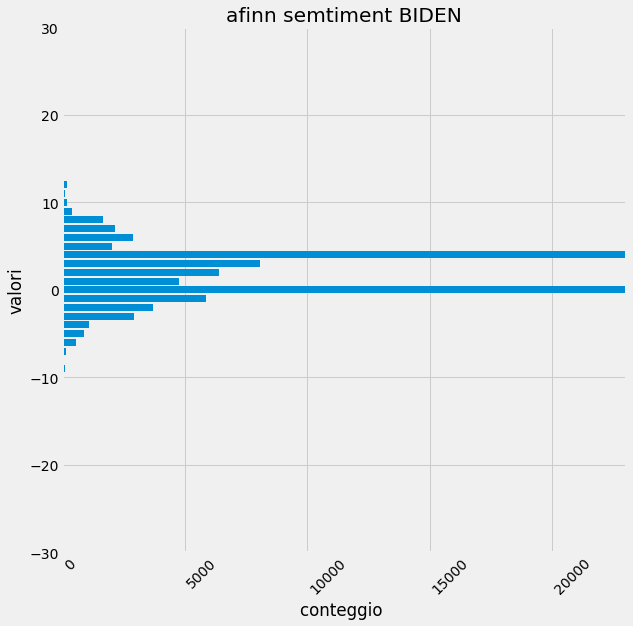

In [ ]:
df_value_counts1 = pd.DataFrame(_4_nov_unito_biden_FIN.afinn.value_counts())
df_value_counts1 = df_value_counts1.reset_index()
df_value_counts1.columns = ['valori', 'counts']
fig, ax = plt.subplots(figsize=(9, 9))
ax.barh(df_value_counts1['valori'], df_value_counts1['counts'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='left')
ax.set(xlim=[0, 23000], ylim=[-30,30],xlabel='conteggio ', ylabel='valori',
       title='afinn semtiment BIDEN')

In [ ]:
Estremi_positivi=_4_nov_unito_trump_FIN[_4_nov_unito_trump_FIN['afinn'] > 20].head()
Estremi_positivi2=Estremi_positivi[['afinn','Text','Text_clean_1']]
Estremi_positivi2

,afinn,Text,Text_clean_1
35395,21.0,RT @gq1620: LOVE\nLOVE!\nLOVE!!\n\nI LOVE YOU ...,"[('@gq1620', 'NNS'), ('love', 'VBP'), ('nlove'..."


In [ ]:
Estremi_negativi3=_4_nov_unito_trump_FIN[_4_nov_unito_trump_FIN['afinn'] <-6].head()
Estremi_negativi4=Estremi_negativi3[['afinn','Text','Text_clean_1']]
Estremi_negativi4

,afinn,Text,Text_clean_1
77416,-16.0,RT @Trumpdroog: these fucking mail in ballots ...,"[('@trumpdroog', 'NN'), ('fucking', 'VBG'), ('..."
78572,-8.0,RT @tooranomaki6910: @realDonaldTrump -The Pro...,"[('@tooranomaki6910', 'JJ'), ('@realdonaldtrum..."
79348,-8.0,"From the look of things, Trump has entered the...","[('look', 'VB'), ('thing', 'NN'), ('trump', 'N..."
79537,-9.0,RT @antonnewcombe: Hey @realDonaldTrump only a...,"[('@antonnewcombe', 'NN'), ('hey', 'NN'), ('@r..."
81520,-9.0,RT @antonnewcombe: Hey @realDonaldTrump only a...,"[('@antonnewcombe', 'NN'), ('hey', 'NN'), ('@r..."


171760.0


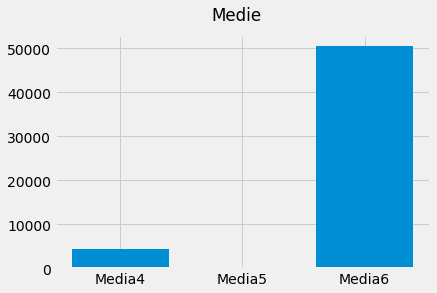

In [ ]:
#SI CALCOLA LA SOMMA DEI VALORI DELLA SENTIMENT DI TUTTI I TWEETS PER IL GIORNO 3 NOVEMBRE SU TRUMP
df_value_counts1['somma'] = (df_value_counts1['valori']*df_value_counts1['counts'])
sommafinale1 = df_value_counts1['somma'].sum()
print(sommafinale1)
neg=df_value_counts1.loc[(df_value_counts['valori'] < 0)]
pos=df_value_counts1.loc[(df_value_counts['valori'] > 0)]
neutro= df_value_counts1.loc[(df_value_counts['valori'] == 0)]
Media4=pos.agg(np.mean)
Media5=neg.agg(np.mean)
Media6=neutro.agg(np.mean)
Media4=pos.agg(np.mean)
Media5=neg.agg(np.mean)
Media6=neutro.agg(np.mean)
df= pd.DataFrame({'Media4':[Media4.counts],'Media5':[Media5.counts],'Media6':[Media6.counts]})
c=np.transpose(df)
Medie = ['Media4', 'Media5', 'Media6']
valori = [4393.307692, 375.444444, 50524.0]
plot.bar(Medie, valori)
plot.suptitle('Medie')
plot.show()

TEXT BLOB 

In [ ]:
from tweepy import OAuthHandler 
from textblob import TextBlob 

In [ ]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [ ]:
_4_nov_unito_trump_FIN['Subjectivity'] = _4_nov_unito_trump_FIN['Text_clean_1'].apply(getTextSubjectivity)
_4_nov_unito_trump_FIN['Polarity'] = _4_nov_unito_trump_FIN['Text_clean_1'].apply(getTextPolarity)
_4_nov_unito_biden_FIN['Subjectivity'] = _4_nov_unito_biden_FIN['Text_clean_1'].apply(getTextSubjectivity)
_4_nov_unito_biden_FIN['Polarity'] = _4_nov_unito_biden_FIN['Text_clean_1'].apply(getTextPolarity)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
# negative, nautral, positive analysis
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

In [ ]:
_4_nov_unito_biden_FIN['Score'] = _4_nov_unito_biden_FIN['Polarity'].apply(getTextAnalysis)
_4_nov_unito_trump_FIN['Score'] = _4_nov_unito_trump_FIN['Polarity'].apply(getTextAnalysis)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print("[POSITIVE]")
positive_biden_4 = _4_nov_unito_biden_FIN[_4_nov_unito_biden_FIN['Score'] == 'Positive']
print(str(positive_biden_4.shape[0]/(_4_nov_unito_biden_FIN.shape[0])*100) + " % of positive tweets [BIDEN]")
positive_trump_4 = _4_nov_unito_trump_FIN[_4_nov_unito_trump_FIN['Score'] == 'Positive']
print(str(positive_trump_4.shape[0]/(_4_nov_unito_trump_FIN.shape[0])*100) + " % of positive tweets [TRUMP]")
print("\\\\\\\\\\")
print("[NEGATIVE]")
negative_biden_4 = _4_nov_unito_biden_FIN[_4_nov_unito_biden_FIN['Score'] == 'Negative']
print(str(negative_biden_4.shape[0]/(_4_nov_unito_biden_FIN.shape[0])*100) + " % of negative tweets [BIDEN]")
negative_trump_4 = _4_nov_unito_trump_FIN[_4_nov_unito_trump_FIN['Score'] == 'Negative']
print(str(negative_trump_4.shape[0]/(_4_nov_unito_trump_FIN.shape[0])*100) + " % of negative tweets [TRUMP]")
print("\\\\\\\\\\")
print("[NEUTRAL]")
neutral_biden_4 = _4_nov_unito_biden_FIN[_4_nov_unito_biden_FIN['Score'] == 'Neutral']
print(str(neutral_biden_4.shape[0]/(_4_nov_unito_biden_FIN.shape[0])*100) + " % of neutral tweets [BIDEN]")
neutral_trump_4 = _4_nov_unito_trump_FIN[_4_nov_unito_trump_FIN['Score'] == 'Neutral']
print(str(neutral_trump_4.shape[0]/(_4_nov_unito_trump_FIN.shape[0])*100) + " % of neutral tweets [TRUMP]")

[POSITIVE]
47.26051953978032 % of positive tweets [BIDEN]
37.780999416495725 % of positive tweets [TRUMP]
\\\\\
[NEGATIVE]
8.90860793324859 % of negative tweets [BIDEN]
11.682116496327533 % of negative tweets [TRUMP]
\\\\\
[NEUTRAL]
43.830872526971085 % of neutral tweets [BIDEN]
50.53688408717674 % of neutral tweets [TRUMP]


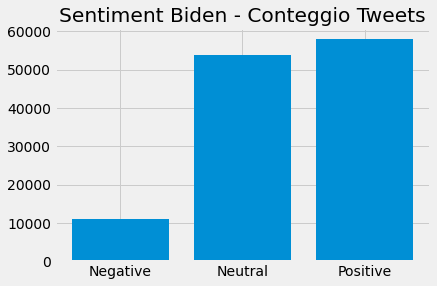

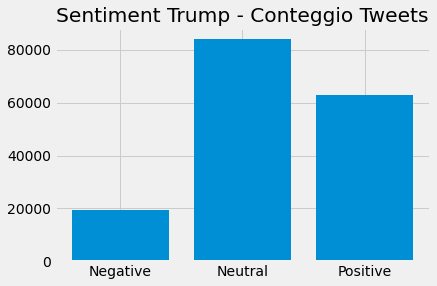

In [ ]:
labels_biden = _4_nov_unito_biden_FIN.groupby('Score').count().index.values
values_biden = _4_nov_unito_biden_FIN.groupby('Score').size().values
plt.bar(labels_biden, values_biden)
plt.title("Sentiment Biden - Conteggio Tweets")
plt.show()

labels_trump = _4_nov_unito_trump_FIN.groupby('Score').count().index.values
values_trump = _4_nov_unito_trump_FIN.groupby('Score').size().values
plt.bar(labels_trump, values_trump)
plt.title("Sentiment Trump - Conteggio Tweets")

plt.show()

OPINION LEXICON(NLTK)

E' stata creata una funzione per la gestione del 'not' e del 'but' all'interno di una frase.  

In [ ]:
import nltk
nltk.download('opinion_lexicon')
from nltk.corpus import opinion_lexicon

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


In [ ]:
pos_list=set(opinion_lexicon.positive())
neg_list=set(opinion_lexicon.negative())

In [ ]:
def sentiment_neg(sentence):
  total_sentiment = 0
  sentences = sentence.split(",")
  for s in sentences: 
    sentence_sentiment = 0
    sentence = [word.lower() for word in word_tokenize(s)] 
    

    for word in sentence:
      word = lemmatizer.lemmatize(word)

      if word in pos_list:
        sentence_sentiment += 1
      elif word in neg_list:
        sentence_sentiment -= 1

    if 'not' in sentence:
      sentence_sentiment = - sentence_sentiment
    total_sentiment += sentence_sentiment
  return total_sentiment

In [ ]:
_4_nov_unito_trump_FIN['Text_clean_3'] = _4_nov_unito_trump_FIN['Text_clean_3'].apply(str)
_4_nov_unito_biden_FIN['Text_clean_3'] = _4_nov_unito_biden_FIN['Text_clean_3'].apply(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
_4_nov_unito_trump_FIN['test1'] = _4_nov_unito_trump_FIN['Text_clean_3'].apply(sentiment_neg)
_4_nov_unito_trump_FIN.test1.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


 1     35762
 0     22777
 2     22509
-1      9184
 3      6365
-2      5899
 5      1926
 4      1095
-3       542
-4       184
-5        30
 6        25
-6         5
-7         3
 17        1
 14        1
 7         1
 8         1
Name: test1, dtype: int64

[(-10.0, 20.0),
 Text(0, 0.5, 'valori'),
 (0.0, 50000.0),
 Text(0.5, 0, 'conteggio '),
 Text(0.5, 1.0, 'lexicon based approach semtiment')]

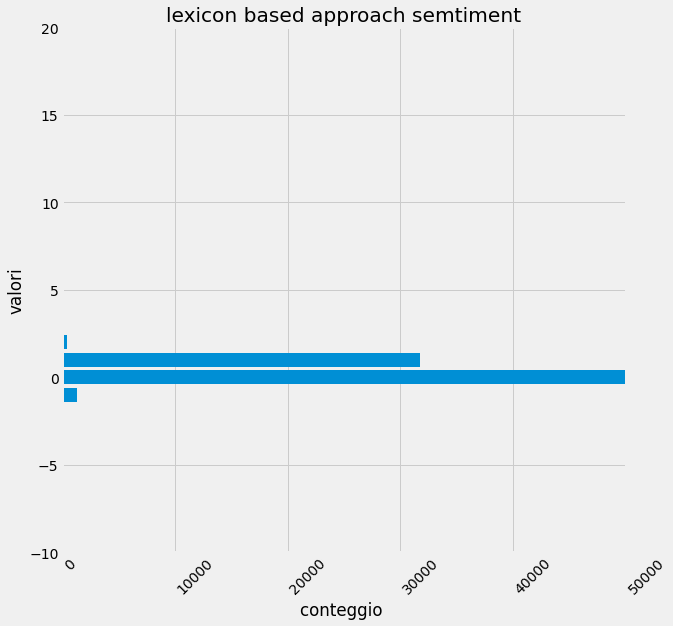

In [ ]:
df_value_counts3 = pd.DataFrame(_4_nov_unito_trump_FIN.test1.value_counts())
df_value_counts3 = df_value_counts3.reset_index()
df_value_counts3.columns = ['valori', 'counts']
fig, ax = plt.subplots(figsize=(9, 9))
ax.barh(df_value_counts3['valori'], df_value_counts3['counts'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='left')
ax.set(xlim=[0, 50000], ylim=[-10,20], xlabel='conteggio ', ylabel='valori',
       title='lexicon based approach semtiment')

In [ ]:
_4_nov_unito_biden_FIN['test1'] = _4_nov_unito_biden_FIN['Text_clean_3'].apply(sentiment_neg)
_4_nov_unito_biden_FIN.test1.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


 0    41041
 1    34236
 2    11209
-1    10285
 3     4151
-2     1947
 4      470
-3      371
 5      347
-4       47
 6       26
-5       18
 8        1
 7        1
Name: test1, dtype: int64

[(-10.0, 20.0),
 Text(0, 0.5, 'valori'),
 (0.0, 50000.0),
 Text(0.5, 0, 'conteggio '),
 Text(0.5, 1.0, 'lexicon based approach semtiment')]

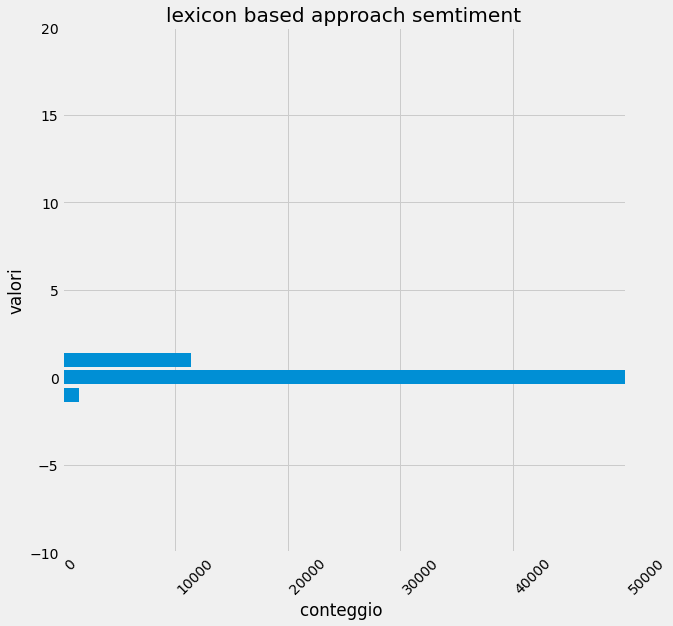

In [ ]:
df_value_counts4 = pd.DataFrame(_4_nov_unito_biden_FIN.test1.value_counts())
df_value_counts4 = df_value_counts4.reset_index()
df_value_counts4.columns = ['valori', 'counts']
fig, ax = plt.subplots(figsize=(9, 9))
ax.barh(df_value_counts4['valori'], df_value_counts4['counts'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='left')
ax.set(xlim=[0, 50000], ylim=[-10,20], xlabel='conteggio ', ylabel='valori',
       title='lexicon based approach semtiment')

VADER SENTIMENT

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
scores = []
# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

scores_1 = []
# Declare variables for scores
compound_list_1 = []
positive_list_1 = []
negative_list_1 = []
neutral_list_1 = []

scores_2 = []
# Declare variables for scores
compound_list_2 = []
positive_list_2 = []
negative_list_2 = []
neutral_list_2 = []

scores_3 = []
# Declare variables for scores
compound_list_3 = []
positive_list_3 = []
negative_list_3 = []
neutral_list_3 = []

In [ ]:
_4_nov_unito_biden_FIN = _4_nov_unito_biden_FIN.reset_index(drop=True)
_4_nov_unito_trump_FIN = _4_nov_unito_trump_FIN.reset_index(drop=True)

In [ ]:
for i in range(_4_nov_unito_trump_FIN['Text_clean_2'].shape[0]):
    compound = analyzer.polarity_scores(_4_nov_unito_trump_FIN['Text'][i])["compound"]
    pos = analyzer.polarity_scores(_4_nov_unito_trump_FIN['Text'][i])["pos"]
    neu = analyzer.polarity_scores(_4_nov_unito_trump_FIN['Text'][i])["neu"]
    neg = analyzer.polarity_scores(_4_nov_unito_trump_FIN['Text'][i])["neg"]
    scores_1.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })
for i in range(_4_nov_unito_biden_FIN['Text_clean_2'].shape[0]):
    compound = analyzer.polarity_scores(_4_nov_unito_biden_FIN['Text'][i])["compound"]
    pos = analyzer.polarity_scores(_4_nov_unito_biden_FIN['Text'][i])["pos"]
    neu = analyzer.polarity_scores(_4_nov_unito_biden_FIN['Text'][i])["neu"]
    neg = analyzer.polarity_scores(_4_nov_unito_biden_FIN['Text'][i])["neg"]
    scores_2.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

In [ ]:
sentiments_score_1 = pd.DataFrame.from_dict(scores_1)
_4_nov_unito_trump_FIN = _4_nov_unito_trump_FIN.join(sentiments_score_1)
_4_nov_unito_trump_FIN.head()

,_id,Screen_name,Text,Followers,Date_time,Hashtags,Novembre,Text_clean_1,Text_clean_2,Match_parola_trump,hashtags,afinn,Subjectivity,Polarity,Score,test1,Compound,Positive,Negative,Neutral
0,"ObjectId(""5fa266b29772d6a9fc3559e3"")",JoeMcGurk94,Donald Trump threatening to go the Supreme Cou...,1057,2020-11-04 08:30:36,NaN,4,"[('donald', 'JJ'), ('trump', 'NN'), ('threaten...",Donald Trump threatening to go the Supreme Cou...,trump,NaN,-1.0,0.0,0.0,Neutral,0,-0.7003,0.124,0.324,0.552
1,"ObjectId(""5fa266b29772d6a9fc3559e4"")",EyeOnHealthNews,RT @JustTheNews: .@POTUS @realDonaldTrump decl...,375,2020-11-04 08:30:36,NaN,4,"[('@justthenews', 'NNS'), ('@potus', 'VBP'), (...",: . declared early Wednesday he believes he h...,trump,NaN,0.0,0.3,0.1,Positive,0,0.5719,0.144,0.000,0.856
2,"ObjectId(""5fa266b29772d6a9fc3559e7"")",emma_kdm,RT @Complex: Just In: Trump says he will go to...,6653,2020-11-04 08:30:37,NaN,4,"[('@complex', 'JJ'), ('trump', 'NNS'), ('say',...",: Just In: Trump says he will go to the United...,trump,NaN,3.0,0.7,-0.1,Negative,-1,0.7096,0.201,0.047,0.752
3,"ObjectId(""5fa266b29772d6a9fc3559e8"")",crunchi_720,RT @africatechie: #Election2020 \nWant to see ...,599,2020-11-04 08:30:37,NaN,4,"[('@africatechie', 'JJ'), ('#election2020', 'N...",: Election2020 \nWant to see the scariest part...,trump,NaN,2.0,0.0,0.0,Neutral,0,0.0000,0.000,0.000,1.000
4,"ObjectId(""5fa266b29772d6a9fc3559e9"")",EveningStandard,"#Election2020: Donald Trump's niece, Mary has ...",128861,2020-11-04 08:30:37,NaN,4,"[('#election2020', 'NN'), ('donald', 'NN'), (""...","Election2020: Donald Trump's niece, Mary has s...",trump,NaN,-2.0,0.0,0.0,Neutral,1,0.0000,0.000,0.000,1.000


In [ ]:
sentiments_score_2 = pd.DataFrame.from_dict(scores_2)
_4_nov_unito_biden_FIN = _4_nov_unito_biden_FIN.join(sentiments_score_2)
_4_nov_unito_biden_FIN.head()

,_id,Screen_name,Text,Followers,Date_time,Hashtags,Novembre,Text_clean_1,Text_clean_2,Match_parola_trump,Match_parola_biden,hashtags,afinn,Subjectivity,Polarity,Score,test1,Compound,Positive,Negative,Neutral
0,"ObjectId(""5fa266b19772d6a9fc3559dc"")",still_Debz004,RT @chinwetal: Joe Biden should better call MC...,2996,2020-11-04 08:30:36,NaN,4,"[('@chinwetal', 'JJ'), ('joe', 'NN'), ('biden'...",: Joe Biden should better call MC Oluomo \nEle...,NaN,biden,NaN,2.0,0.500000,0.5000,Positive,0,0.4404,0.244,0.000,0.756
1,"ObjectId(""5fa266b19772d6a9fc3559e2"")",goIdenhslot,"RT @AP: Joe Biden wins Arizona, becoming the s...",1456,2020-11-04 08:30:36,NaN,4,"[('@ap', 'JJ'), ('joe', 'NN'), ('biden', 'NN')...",": Joe Biden wins Arizona, becoming the second ...",NaN,biden,NaN,8.0,0.412500,0.5125,Positive,0,0.8176,0.294,0.000,0.706
2,"ObjectId(""5fa266b29772d6a9fc3559e6"")",AnnabelleTayl0r,"RT @AP: Joe Biden wins Arizona, becoming the s...",611,2020-11-04 08:30:36,NaN,4,"[('@ap', 'JJ'), ('joe', 'NN'), ('biden', 'NN')...",": Joe Biden wins Arizona, becoming the second ...",NaN,biden,NaN,8.0,0.412500,0.5125,Positive,0,0.8176,0.294,0.000,0.706
3,"ObjectId(""5fa266b29772d6a9fc3559eb"")",darcybbc,RT @AmericaFirst007: There is no mathematical ...,38614,2020-11-04 08:30:37,NaN,4,"[('@americafirst007', 'JJ'), ('mathematical', ...",: There is no mathematical way for Biden to wi...,NaN,biden,NaN,3.0,0.216667,0.3500,Positive,0,0.2481,0.135,0.156,0.709
4,"ObjectId(""5fa266b39772d6a9fc3559f4"")",sardarzia66,RT @nadeemmalik: “We believe we're on track to...,1505,2020-11-04 08:30:37,NaN,4,"[('@nadeemmalik', 'JJ'), ('believe', 'VBP'), (...",: “We believe we're on track to win this elect...,NaN,biden,NaN,4.0,0.400000,0.8000,Positive,0,0.5859,0.226,0.000,0.774


In [ ]:
tot_compound_trump_4_nov = _4_nov_unito_trump_FIN["Compound"].sum()
media_compound_trump_4_nov = tot_compound_trump_4_nov/len(_4_nov_unito_trump_FIN)
print("La media del COMPOUND di trump del 4 Novembre risulta: " + str(media_compound_trump_4_nov))

tot_Positive_trump_4_nov = _4_nov_unito_trump_FIN["Positive"].sum()
media_Positive_trump_4_nov = tot_Positive_trump_4_nov/len(_4_nov_unito_trump_FIN)
print("La media del POSITIVE di trump del 4 Novembre risulta: " + str(media_Positive_trump_4_nov))

tot_Negative_trump_4_nov = _4_nov_unito_trump_FIN["Negative"].sum()
media_Negative_trump_4_nov = tot_Negative_trump_4_nov/len(_4_nov_unito_trump_FIN)
print("La media del NEGATIVE di trump del 4 Novembre risulta: " + str(media_Negative_trump_4_nov))

tot_Neutral_trump_4_nov = _4_nov_unito_trump_FIN["Neutral"].sum()
media_Neutral_trump_4_nov = tot_Neutral_trump_4_nov/len(_4_nov_unito_trump_FIN)
print("La media del NEUTRAL di trump del 4 Novembre risulta: " + str(media_Neutral_trump_4_nov))

La media del COMPOUND di trump del 4 Novembre risulta: 0.0834799202343642
La media del POSITIVE di trump del 4 Novembre risulta: 0.09168104573590716
La media del NEGATIVE di trump del 4 Novembre risulta: 0.05887928078586595
La media del NEUTRAL di trump del 4 Novembre risulta: 0.8494236842580171


In [ ]:
tot_compound_biden_4_nov = _4_nov_unito_biden_FIN["Compound"].sum()
media_compound_biden_4_nov = tot_compound_biden_4_nov/len(_4_nov_unito_biden_FIN)
print("La media del COMPOUND di Biden del 4 Novembre risulta: " + str(media_compound_biden_4_nov))

tot_Positive_biden_4_nov = _4_nov_unito_biden_FIN["Positive"].sum()
media_Positive_biden_4_nov = tot_Positive_biden_4_nov/len(_4_nov_unito_biden_FIN)
print("La media del POSITIVE di Biden del 4 Novembre risulta: " + str(media_Positive_biden_4_nov))

tot_Negative_biden_4_nov = _4_nov_unito_biden_FIN["Negative"].sum()
media_Negative_biden_4_nov = tot_Negative_biden_4_nov/len(_4_nov_unito_biden_FIN)
print("La media del NEGATIVE di Biden del 4 Novembre risulta: " + str(media_Negative_biden_4_nov))

tot_Neutral_biden_4_nov = _4_nov_unito_biden_FIN["Neutral"].sum()
media_Neutral_biden_4_nov = tot_Neutral_biden_4_nov/len(_4_nov_unito_biden_FIN)
print("La media del NEUTRAL di Biden del 4 Novembre risulta: " + str(media_Neutral_biden_4_nov))

La media del COMPOUND di Biden del 4 Novembre risulta: 0.20879014944102212
La media del POSITIVE di Biden del 4 Novembre risulta: 0.1143000391121541
La media del NEGATIVE di Biden del 4 Novembre risulta: 0.038862202992079785
La media del NEUTRAL di Biden del 4 Novembre risulta: 0.8468379045663439


Text(0.5, 0.98, 'VADER TRUMP')

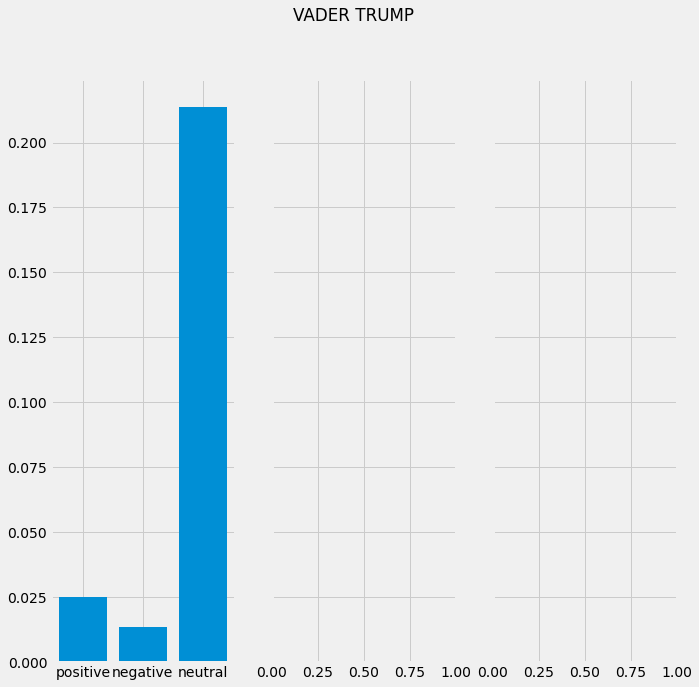

In [ ]:
results = {'positive':0.02512605915817335, 'negative':0.013546199061581561, 'neutral': 0.2137194455425124}
names = list(results.keys())
values = list(results.values())

fig, axs = plt.subplots(1, 3, figsize=(10, 10), sharey=True)
axs[0].bar(names, values)
fig.suptitle('VADER TRUMP')

Text(0.5, 0.98, 'VADER BIDEN')

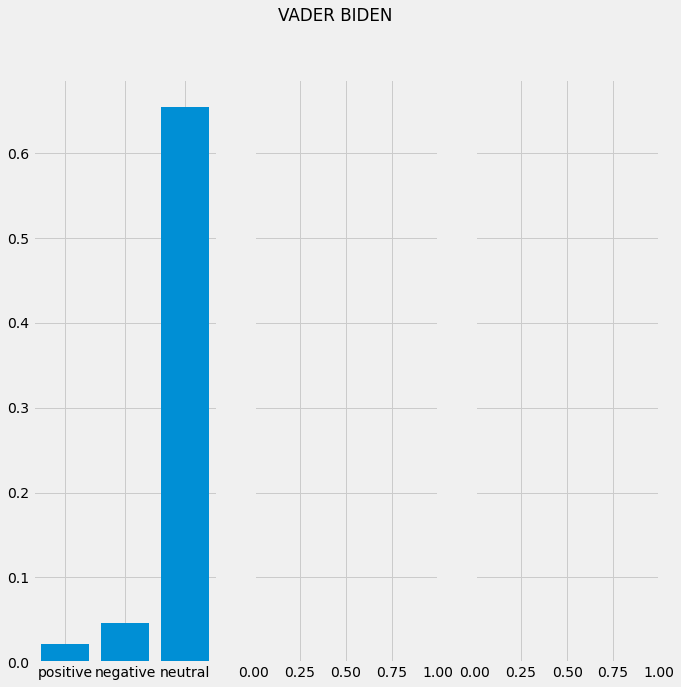

In [ ]:
results = {'positive': 0.021890798752373205, 'negative':0.04623813398426904, 'neutral':0.6544481285598047}
names = list(results.keys())
values = list(results.values())

fig, axs = plt.subplots(1, 3, figsize=(10, 10), sharey=True)
axs[0].bar(names, values)
fig.suptitle('VADER BIDEN')

31457


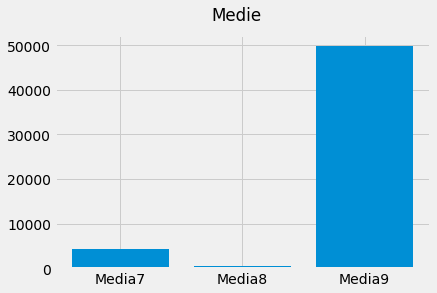

In [ ]:
#SI CALCOLA LA SOMMA DEI VALORI DELLA SENTIMENT DI TUTTI I TWEETS PER IL GIORNO 3 NOVEMBRE SU TRUMP
df_value_counts3['somma'] = (df_value_counts3['valori']*df_value_counts3['counts'])
sommafinale2 = df_value_counts3['somma'].sum()
print(sommafinale2)
neg=df_value_counts3.loc[(df_value_counts['valori'] < 0)]
pos=df_value_counts3.loc[(df_value_counts['valori'] > 0)]
neutro= df_value_counts3.loc[(df_value_counts['valori'] == 0)]
Media7=pos.agg(np.mean)
Media8=neg.agg(np.mean)
Media9=neutro.agg(np.mean)
df= pd.DataFrame({'Media7':[Media7.counts],'Media8':[Media8.counts],'Media9':[Media9.counts]})
c=np.transpose(df)

Medie = ['Media7', 'Media8', 'Media9']
valori = [4422.923077,416.777778, 49767.0]



plot.bar(Medie, valori)
plot.suptitle('Medie')
plot.show()

# 5 NOVEMBRE 

In [ ]:
#POS TAGGING AND CHUNK 
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

def preprocess_pos_tag(sent):
    sent = nltk.pos_tag(sent)
    return sent
    
dataset_unico_5_nov["Text_clean_1"] = dataset_unico_5_nov['Text_clean_1'].apply(preprocess_pos_tag)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
dataset_unico_5_nov['Text_clean_1']=dataset_unico_5_nov['Text_clean_1'].apply(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dataset_unico_5_nov = dataset_unico_5_nov.explode("hashtags")

[Text(0, 0.5, 'Hashtag presente nel Tweet'),
 (0.0, 250000.0),
 Text(0.5, 0, 'Numero di Tweets'),
 Text(0.5, 1.0, 'HASHTAGS 5 NOVEMBRE')]

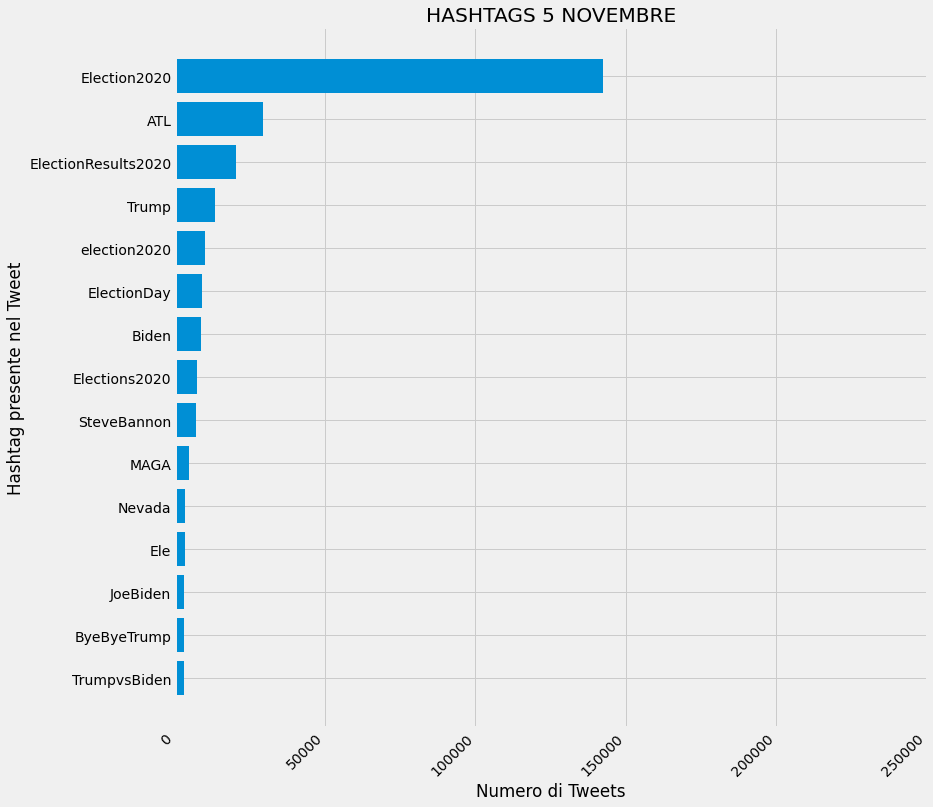

In [ ]:
#[PRESENZA DUPLICATI]
#Conteggio hashtag maggiormente presenti il 5 Novembre (di quelli raccolti):
conteggiogiorno_hashtags_5_nov = dataset_unico_5_nov.groupby('hashtags').size().reset_index(name='count')
conteggiogiorno_hashtags_5_nov = pd.DataFrame(conteggiogiorno_hashtags_5_nov).sort_values(by=['count'], ascending = True)
conteggiogiorno_hashtags_5_nov_top15 = conteggiogiorno_hashtags_5_nov.tail(15)

fig, ax = plt.subplots(figsize=(12, 12))
ax.barh(conteggiogiorno_hashtags_5_nov_top15['hashtags'], conteggiogiorno_hashtags_5_nov_top15['count'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[0, 250000], xlabel='Numero di Tweets', ylabel='Hashtag presente nel Tweet',
       title='HASHTAGS 5 NOVEMBRE')

In [ ]:
#[ESTRAZIONE TWEETS IN BASE AD HASHTAGS]
#COSTRUISCO I DATASETS DEL 5 NOVEMBRE CON TWEETS LEGATI A TRUMP E A BIDEN:
dataset_unico_5_nov_hashtags_trump = dataset_unico_5_nov.loc[(dataset_unico_5_nov['hashtags'] == "Trump") | (dataset_unico_5_nov['hashtags'] == "Trump2020" )]
print("Nel dataset con duplicati, tweets 5 Novembre e hashtags #Trump e #Trump2020, vi sono " + str(len(dataset_unico_5_nov_hashtags_trump.index)) + " tweets")
dataset_unico_5_nov_hashtags_biden = dataset_unico_5_nov.loc[(dataset_unico_5_nov['hashtags'] == "Biden") | (dataset_unico_5_nov['hashtags'] == "JoeBiden" ) | (dataset_unico_5_nov['hashtags'] == "BidenHarris2020" )]
print("Nel dataset con duplicati, tweets 5 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono " + str(len(dataset_unico_5_nov_hashtags_biden.index)) + " tweets")

dataset_unico_5_nov_hashtags_trump_nod = dataset_unico_5_nov_hashtags_trump.drop_duplicates(['_id'], keep="last")
print("[FINALE HASHTAGS] Nel dataset con tweets 5 Novembre e hashtags #Trump e #Trump2020, vi sono: " + str(len(dataset_unico_5_nov_hashtags_trump_nod.index)) + " tweets")
dataset_unico_5_nov_hashtags_biden_nod = dataset_unico_5_nov_hashtags_biden.drop_duplicates(['_id'], keep="last")
print("[FINALE HASHTAGS] Nel dataset con tweets 5 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono: " + str(len(dataset_unico_5_nov_hashtags_biden_nod.index)) + " tweets")

Nel dataset con duplicati, tweets 5 Novembre e hashtags #Trump e #Trump2020, vi sono 15905 tweets
Nel dataset con duplicati, tweets 5 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono 12945 tweets
[FINALE HASHTAGS] Nel dataset con tweets 5 Novembre e hashtags #Trump e #Trump2020, vi sono: 15269 tweets
[FINALE HASHTAGS] Nel dataset con tweets 5 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono: 12598 tweets


In [ ]:
#[ESTRAZIONE TWEETS IN BASE A PAROLE NEI TWEETS]
#Parole da utilizzare nel dataset di soliti tweets dove Trump viene citato nel testo:
parole_testo_trump =['Trump', 'Donald Trump', 'Trump2020', 'trump']

def matcherTrump(x):
    for i in parole_testo_trump:
        if i in x:
            return i
    else:
        return np.nan

#Parole da utilizzare nel dataset di soliti tweets dove Trump viene citato nel testo:
parole_testo_biden =['Biden', 'Joe Biden', 'Biden2020', 'BidenHarris2020', 'biden']

def matcherBiden(x):
    for i in parole_testo_biden:
        if i in x:
            return i
    else:
        return np.nan

#https://stackoverflow.com/questions/49073252/pandas-how-to-select-row-with-certain-word
#dataset_unico_5_nov_words_trump = dataset_unico_5_nov[dataset_unico_5_nov['Text_clean_1'].str.contains("Trump", regex=False, case=False, na=False)]
#TRUMP:
dataset_unico_5_nov['Match_parola_trump'] = dataset_unico_5_nov['Text_clean_1'].apply(matcherTrump)
dataset_unico_5_nov_words_trump = dataset_unico_5_nov.loc[(dataset_unico_5_nov['Match_parola_trump'] == "Trump") | (dataset_unico_5_nov['Match_parola_trump'] == "Donald Trump") | (dataset_unico_5_nov['Match_parola_trump'] == "Trump2020") | (dataset_unico_5_nov['Match_parola_trump'] == "trump")]
#Dataset nel quale sono contenuti i tweets dove sono contenute le parole riferite a trump nel testo:
dataset_unico_5_nov_words_trump_nod = dataset_unico_5_nov_words_trump.drop_duplicates(['_id'], keep="last")
dataset_unico_5_nov_words_trump_nod = remove_unwanted_cols(dataset_unico_5_nov_words_trump_nod, ["hashtags"])
print("[FINALE PAROLE] Nel dataset con tweets 5 Novembre e parole Trump, Donald Trump, trump e Trump2020, vi sono: " + str(len(dataset_unico_5_nov_words_trump_nod.index)) + " tweets")

#BIDEN:
dataset_unico_5_nov['Match_parola_biden'] = dataset_unico_5_nov['Text_clean_1'].apply(matcherBiden)
dataset_unico_5_nov_words_biden = dataset_unico_5_nov.loc[(dataset_unico_5_nov['Match_parola_biden'] == "Biden") | (dataset_unico_5_nov['Match_parola_biden'] == "Joe Biden") | (dataset_unico_5_nov['Match_parola_biden'] == "BidenHarris2020") | (dataset_unico_5_nov['Match_parola_biden'] == "biden") | (dataset_unico_5_nov['Match_parola_biden'] == "Biden2020")]
#Dataset nel quale sono contenuti i tweets dove sono contenute le parole riferite a trump nel testo:
dataset_unico_5_nov_words_biden_nod = dataset_unico_5_nov_words_biden.drop_duplicates(['_id'], keep="last")
dataset_unico_5_nov_words_biden_nod = remove_unwanted_cols(dataset_unico_5_nov_words_biden_nod, ["hashtags"])
print("[FINALE PAROLE] Nel dataset con tweets 5 Novembre e parole Biden, Joe Biden, biden, BidenHarris2020 e Biden2020, vi sono: " + str(len(dataset_unico_5_nov_words_biden_nod.index)) + " tweets")

[FINALE PAROLE] Nel dataset con tweets 5 Novembre e parole Trump, Donald Trump, trump e Trump2020, vi sono: 82812 tweets
[FINALE PAROLE] Nel dataset con tweets 5 Novembre e parole Biden, Joe Biden, biden, BidenHarris2020 e Biden2020, vi sono: 37186 tweets


In [ ]:
#UNIONE UNICO DATASET PER TRUMP E BIDEN CON I TWEETS CHE CONTENGONO HASHTAGS E PAROLE RIFERITI A LORO DUE:
#TRUMP
_5_nov_unito_trump = pd.concat([dataset_unico_5_nov_words_trump_nod, dataset_unico_5_nov_hashtags_trump_nod])
_5_nov_unito_trump_FIN = _5_nov_unito_trump.drop_duplicates(['_id'], keep="last")
print("Nel dataset finale relativo a Trump, del 5 Novembre, vi sono:" + str(len(_5_nov_unito_trump_FIN.index)) + " tweets")

#BIDEN:
_5_nov_unito_biden = pd.concat([dataset_unico_5_nov_words_biden_nod, dataset_unico_5_nov_hashtags_biden_nod])
_5_nov_unito_biden_FIN = _5_nov_unito_biden.drop_duplicates(['_id'], keep="last")
print("Nel dataset finale relativo a Biden, del 5 Novembre, vi sono:" + str(len(_5_nov_unito_biden_FIN.index)) + " tweets")

Nel dataset finale relativo a Trump, del 5 Novembre, vi sono:97192 tweets
Nel dataset finale relativo a Biden, del 5 Novembre, vi sono:48783 tweets


In [ ]:
#afinn

In [ ]:
pip install afinn

In [ ]:
from afinn import Afinn
afinn = Afinn()

In [ ]:
_5_nov_unito_trump_FIN['afinn'] = _5_nov_unito_trump_FIN['Text_clean_3'].apply(afinn.score)
_5_nov_unito_trump_FIN.afinn.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


 0.0     27247
 1.0     11771
-1.0     10152
 6.0      9321
 2.0      7917
 4.0      6754
-2.0      5474
-3.0      3456
-4.0      3338
 5.0      3078
 3.0      2655
-5.0      2316
-6.0       979
 7.0       630
 8.0       486
-7.0       471
-8.0       413
-9.0       237
-12.0      129
 9.0       102
-10.0       61
 10.0       60
-11.0       48
 12.0       41
 11.0       31
 13.0        6
-15.0        4
-13.0        3
-14.0        3
 14.0        2
 16.0        2
-16.0        2
 18.0        1
-17.0        1
 15.0        1
Name: afinn, dtype: int64

In [ ]:
df_value_counts = pd.DataFrame(_5_nov_unito_trump_FIN.afinn.value_counts())
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['valori', 'counts']

[(-25.0, 20.0),
 Text(0, 0.5, 'valori'),
 (0.0, 23000.0),
 Text(0.5, 0, 'conteggio '),
 Text(0.5, 1.0, 'afinn semtiment')]

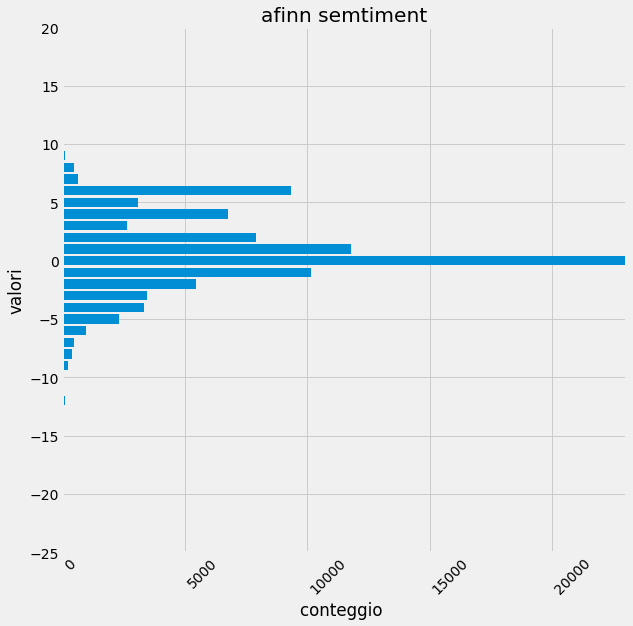

In [ ]:
fig, ax = plt.subplots(figsize=(9, 9))
ax.barh(df_value_counts['valori'], df_value_counts['counts'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='left')
ax.set(xlim=[0, 23000], ylim=[-25,20],xlabel='conteggio ', ylabel='valori',
       title='afinn semtiment')

In [ ]:
_5_nov_unito_biden_FIN['afinn'] = _5_nov_unito_biden_FIN['Text_clean_3'].apply(afinn.score)
_5_nov_unito_biden_FIN.afinn.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


 0.0     17921
-10.0     4098
 1.0      3615
 2.0      3608
 4.0      3592
 3.0      3430
-2.0      3093
-1.0      2777
-3.0      1462
 5.0      1049
 6.0       956
-4.0       770
 7.0       619
-6.0       469
-5.0       365
 8.0       322
 9.0       173
-7.0       100
-9.0        55
 12.0       49
 10.0       49
 16.0       47
 11.0       40
-12.0       36
-8.0        28
-13.0       20
-11.0       18
 13.0        7
 33.0        4
 14.0        3
 28.0        2
-22.0        2
-15.0        1
-14.0        1
-17.0        1
 20.0        1
Name: afinn, dtype: int64

[(-30.0, 30.0),
 Text(0, 0.5, 'valori'),
 (0.0, 23000.0),
 Text(0.5, 0, 'conteggio '),
 Text(0.5, 1.0, 'afinn semtiment BIDEN')]

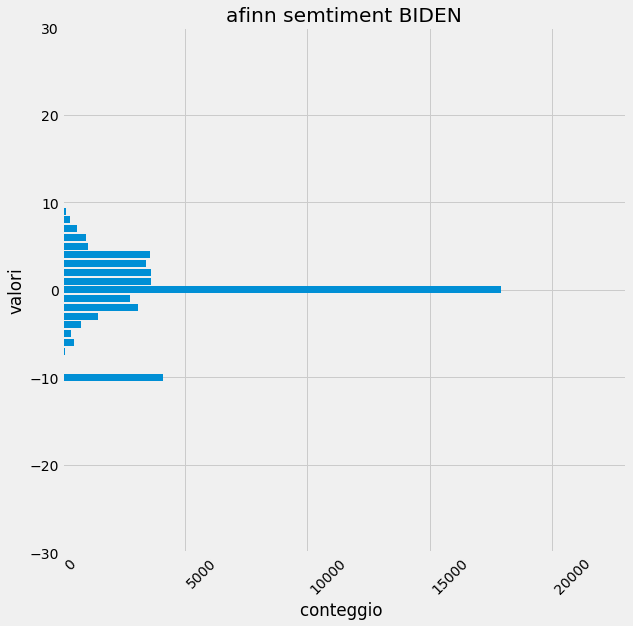

In [ ]:
df_value_counts1 = pd.DataFrame(_5_nov_unito_biden_FIN.afinn.value_counts())
df_value_counts1 = df_value_counts1.reset_index()
df_value_counts1.columns = ['valori', 'counts']
fig, ax = plt.subplots(figsize=(9, 9))
ax.barh(df_value_counts1['valori'], df_value_counts1['counts'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='left')
ax.set(xlim=[0, 23000], ylim=[-30,30],xlabel='conteggio ', ylabel='valori',
       title='afinn semtiment BIDEN')

In [ ]:
Estremi_positivi=_5_nov_unito_trump_FIN[_5_nov_unito_trump_FIN['afinn'] > 15].head()
Estremi_positivi2=Estremi_positivi[['afinn','Text','Text_clean_1']]
Estremi_positivi2

,afinn,Text,Text_clean_1
554489,18.0,Listen. If you win you win. If you lose you lo...,"[('listen', 'JJ'), ('win', 'VBP'), ('win', 'VB..."
111444,16.0,President @realDonaldTrump is going to WIN thi...,"[('president', 'NN'), ('@realdonaldtrump', 'NN..."
94774,16.0,RT @JLemosEsteves: President @realDonaldTrump ...,"[('@jlemosesteves', 'NNS'), ('president', 'NN'..."


In [ ]:
Estremi_negativi=_5_nov_unito_trump_FIN[_5_nov_unito_trump_FIN['afinn'] <-6].head()
Estremi_negativi2=Estremi_negativi[['afinn','Text','Text_clean_1']]
Estremi_negativi2

,afinn,Text,Text_clean_1
533819,-7.0,Fucking douchebags fuck you Trump Supporters 🤢...,"[('fucking', 'VBG'), ('douchebags', 'NNS'), ('..."
534888,-7.0,Donald trump is telling them to stop counting ...,"[('donald', 'JJ'), ('trump', 'NN'), ('telling'..."
535361,-7.0,RT @kylenabecker: This angry poll worker looks...,"[('@kylenabecker', 'NN'), ('angry', 'JJ'), ('p..."
536797,-8.0,RT @DineshDSouza: The predominant left-wing me...,"[('@dineshdsouza', 'JJ'), ('predominant', 'JJ'..."
537350,-11.0,RT @Lisaann1000: Arrest him! Consequences pris...,"[('@lisaann1000', 'CD'), ('arrest', 'JJS'), ('..."


In [ ]:
Estremi_positivi5=_5_nov_unito_biden_FIN[_5_nov_unito_biden_FIN['afinn'] > 10].head()
Estremi_positivi6=Estremi_positivi5[['afinn','Text','Text_clean_1']]
Estremi_positivi6

,afinn,Text,Text_clean_1
533780,11.0,RT @IAF__FAI: If Biden wins the popular vote a...,"[('@iaf__fai', 'JJ'), ('biden', 'NN'), ('win',..."
534470,12.0,Biden is at 253. Pathways to 270 include (need...,"[('biden', 'JJ'), ('253', 'CD'), ('pathway', '..."
535202,16.0,RT @murray_nyc: Biden is at 253. Pathways to 2...,"[('@murray_nyc', 'JJ'), ('biden', 'NN'), ('253..."
535243,16.0,RT @murray_nyc: Biden is at 253. Pathways to 2...,"[('@murray_nyc', 'JJ'), ('biden', 'NN'), ('253..."
535355,16.0,RT @murray_nyc: Biden is at 253. Pathways to 2...,"[('@murray_nyc', 'JJ'), ('biden', 'NN'), ('253..."


In [ ]:
Estremi_negativi3=_5_nov_unito_biden_FIN[_5_nov_unito_biden_FIN['afinn'] <-6].head()
Estremi_negativi4=Estremi_negativi4[['afinn','Text','Text_clean_1']]
Estremi_negativi4

,afinn,Text,Text_clean_1
77416,-16.0,RT @Trumpdroog: these fucking mail in ballots ...,"[('@trumpdroog', 'NN'), ('fucking', 'VBG'), ('..."
78572,-8.0,RT @tooranomaki6910: @realDonaldTrump -The Pro...,"[('@tooranomaki6910', 'JJ'), ('@realdonaldtrum..."
79348,-8.0,"From the look of things, Trump has entered the...","[('look', 'VB'), ('thing', 'NN'), ('trump', 'N..."
79537,-9.0,RT @antonnewcombe: Hey @realDonaldTrump only a...,"[('@antonnewcombe', 'NN'), ('hey', 'NN'), ('@r..."
81520,-9.0,RT @antonnewcombe: Hey @realDonaldTrump only a...,"[('@antonnewcombe', 'NN'), ('hey', 'NN'), ('@r..."


In [ ]:
from tweepy import OAuthHandler 
from textblob import TextBlob 

In [ ]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [ ]:
_5_nov_unito_trump_FIN['Subjectivity'] = _5_nov_unito_trump_FIN['Text_clean_1'].apply(getTextSubjectivity)
_5_nov_unito_trump_FIN['Polarity'] = _5_nov_unito_trump_FIN['Text_clean_1'].apply(getTextPolarity)
_5_nov_unito_biden_FIN['Subjectivity'] = _5_nov_unito_biden_FIN['Text_clean_1'].apply(getTextSubjectivity)
_5_nov_unito_biden_FIN['Polarity'] = _5_nov_unito_biden_FIN['Text_clean_1'].apply(getTextPolarity)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
# negative, nautral, positive analysis
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

In [ ]:
_5_nov_unito_biden_FIN['Score'] = _5_nov_unito_biden_FIN['Polarity'].apply(getTextAnalysis)
_5_nov_unito_trump_FIN['Score'] = _5_nov_unito_trump_FIN['Polarity'].apply(getTextAnalysis)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print("[POSITIVE]")
positive_biden_5 = _5_nov_unito_biden_FIN[_5_nov_unito_biden_FIN['Score'] == 'Positive']
print(str(positive_biden_5.shape[0]/(_5_nov_unito_biden_FIN.shape[0])*100) + " % of positive tweets [BIDEN]")
positive_trump_5 = _5_nov_unito_trump_FIN[_5_nov_unito_trump_FIN['Score'] == 'Positive']
print(str(positive_trump_5.shape[0]/(_5_nov_unito_trump_FIN.shape[0])*100) + " % of positive tweets [TRUMP]")
print("\\\\\\\\\\")
print("[NEGATIVE]")
negative_biden_5 = _5_nov_unito_biden_FIN[_5_nov_unito_biden_FIN['Score'] == 'Negative']
print(str(negative_biden_5.shape[0]/(_5_nov_unito_biden_FIN.shape[0])*100) + " % of negative tweets [BIDEN]")
negative_trump_5 = _5_nov_unito_trump_FIN[_5_nov_unito_trump_FIN['Score'] == 'Negative']
print(str(negative_trump_5.shape[0]/(_5_nov_unito_trump_FIN.shape[0])*100) + " % of negative tweets [TRUMP]")
print("\\\\\\\\\\")
print("[NEUTRAL]")
neutral_biden_5 = _5_nov_unito_biden_FIN[_5_nov_unito_biden_FIN['Score'] == 'Neutral']
print(str(neutral_biden_5.shape[0]/(_5_nov_unito_biden_FIN.shape[0])*100) + " % of neutral tweets [BIDEN]")
neutral_trump_5 = _5_nov_unito_trump_FIN[_5_nov_unito_trump_FIN['Score'] == 'Neutral']
print(str(neutral_trump_5.shape[0]/(_5_nov_unito_trump_FIN.shape[0])*100) + " % of neutral tweets [TRUMP]")

[POSITIVE]
33.004138590488715 % of positive tweets [BIDEN]
30.798877666953317 % of positive tweets [TRUMP]
\\\\\
[NEGATIVE]
10.203044926864981 % of negative tweets [BIDEN]
12.540251457840327 % of negative tweets [TRUMP]
\\\\\
[NEUTRAL]
56.7928164826463 % of neutral tweets [BIDEN]
56.660870875206356 % of neutral tweets [TRUMP]


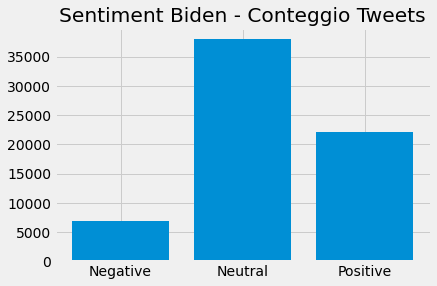

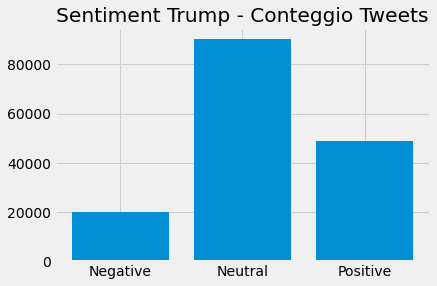

In [ ]:
labels_biden = _5_nov_unito_biden_FIN.groupby('Score').count().index.values
values_biden = _5_nov_unito_biden_FIN.groupby('Score').size().values
plt.bar(labels_biden, values_biden)
plt.title("Sentiment Biden - Conteggio Tweets")
plt.show()

labels_trump = _5_nov_unito_trump_FIN.groupby('Score').count().index.values
values_trump = _5_nov_unito_trump_FIN.groupby('Score').size().values
plt.bar(labels_trump, values_trump)
plt.title("Sentiment Trump - Conteggio Tweets")

plt.show()

In [ ]:
#lexicon

In [ ]:
import nltk
nltk.download('opinion_lexicon')
from nltk.corpus import opinion_lexicon

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


In [ ]:
pos_list=set(opinion_lexicon.positive())
neg_list=set(opinion_lexicon.negative())

In [ ]:
def sentiment_neg(sentence):
  total_sentiment = 0
  sentences = sentence.split(",")
  for s in sentences: 
    sentence_sentiment = 0
    sentence = [word.lower() for word in word_tokenize(s)] 
    

    for word in sentence:
      word = lemmatizer.lemmatize(word)

      if word in pos_list:
        sentence_sentiment += 1
      elif word in neg_list:
        sentence_sentiment -= 1

    if 'not' in sentence:
      sentence_sentiment = - sentence_sentiment
    total_sentiment += sentence_sentiment
  return total_sentiment

In [ ]:
_5_nov_unito_trump_FIN['Text_clean_3'] = _5_nov_unito_trump_FIN['Text_clean_3'].apply(str)
_5_nov_unito_trump_FIN['Text_clean_3'] = _5_nov_unito_trump_FIN['Text_clean_3'].apply(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
_5_nov_unito_trump_FIN['test1'] = _5_nov_unito_trump_FIN['Text_clean_3'].apply(sentiment_neg)
_5_nov_unito_trump_FIN.test1.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


 1     32795
 2     23699
 0     15298
 4     11549
 3      6049
-1      5497
-2      1557
-4       323
-3       271
 5        92
-5        40
 6        16
 10        3
 9         2
 8         1
Name: test1, dtype: int64

[(-10.0, 20.0),
 Text(0, 0.5, 'valori'),
 (0.0, 50000.0),
 Text(0.5, 0, 'conteggio '),
 Text(0.5, 1.0, 'lexicon based approach semtiment')]

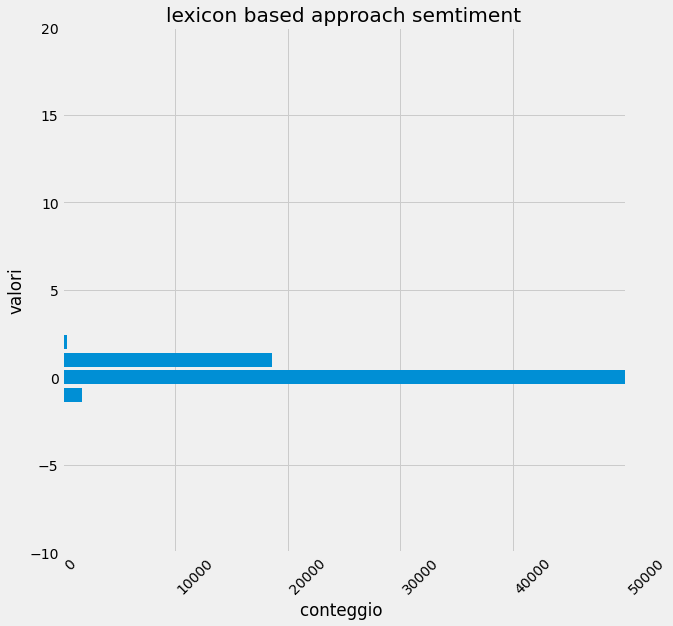

In [ ]:
df_value_counts3 = pd.DataFrame(_5_nov_unito_trump_FIN.test1.value_counts())
df_value_counts3 = df_value_counts3.reset_index()
df_value_counts3.columns = ['valori', 'counts']
fig, ax = plt.subplots(figsize=(9, 9))
ax.barh(df_value_counts3['valori'], df_value_counts3['counts'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='left')
ax.set(xlim=[0, 50000], ylim=[-10,20], xlabel='conteggio ', ylabel='valori',
       title='lexicon based approach semtiment')

In [ ]:
_5_nov_unito_biden_FIN['test1'] = _5_nov_unito_biden_FIN['Text_clean_3'].apply(sentiment_neg)
_5_nov_unito_biden_FIN.test1.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


 1     16132
 0     14537
-1      7831
 2      6487
 3      1706
-2      1158
 4       641
-3       218
 5        26
-4        23
 6        14
 11        4
-5         3
 7         2
-6         1
Name: test1, dtype: int64

[(-10.0, 20.0),
 Text(0, 0.5, 'valori'),
 (0.0, 50000.0),
 Text(0.5, 0, 'conteggio '),
 Text(0.5, 1.0, 'lexicon based approach semtiment')]

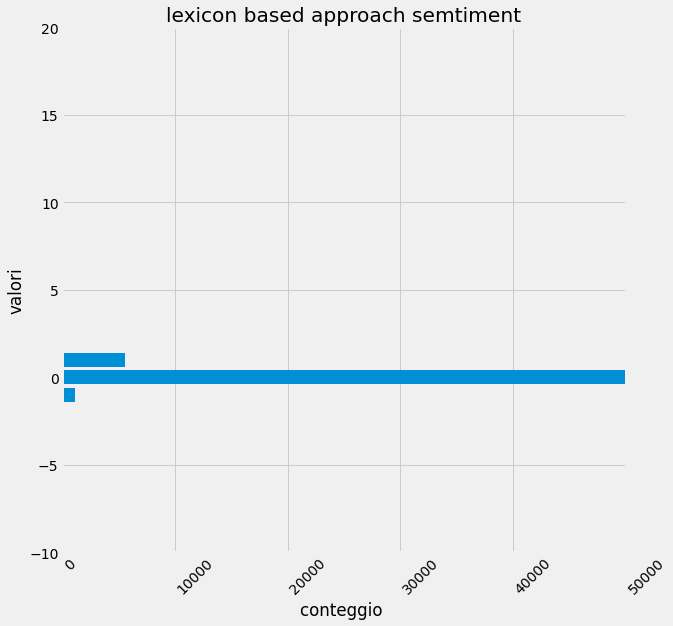

In [ ]:
df_value_counts4 = pd.DataFrame(_5_nov_unito_biden_FIN.test1.value_counts())
df_value_counts4 = df_value_counts4.reset_index()
df_value_counts4.columns = ['valori', 'counts']
fig, ax = plt.subplots(figsize=(9, 9))
ax.barh(df_value_counts4['valori'], df_value_counts4['counts'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='left')
ax.set(xlim=[0, 50000], ylim=[-10,20], xlabel='conteggio ', ylabel='valori',
       title='lexicon based approach semtiment')

In [ ]:
#vader

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
scores = []
# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

scores_1 = []
# Declare variables for scores
compound_list_1 = []
positive_list_1 = []
negative_list_1 = []
neutral_list_1 = []

scores_2 = []
# Declare variables for scores
compound_list_2 = []
positive_list_2 = []
negative_list_2 = []
neutral_list_2 = []

scores_3 = []
# Declare variables for scores
compound_list_3 = []
positive_list_3 = []
negative_list_3 = []
neutral_list_3 = []

In [ ]:
_5_nov_unito_biden_FIN = _5_nov_unito_biden_FIN.reset_index(drop=True)
_5_nov_unito_trump_FIN = _5_nov_unito_trump_FIN.reset_index(drop=True)

In [ ]:
for i in range(_5_nov_unito_trump_FIN['Text_clean_2'].shape[0]):
    compound = analyzer.polarity_scores(_5_nov_unito_trump_FIN['Text'][i])["compound"]
    pos = analyzer.polarity_scores(_5_nov_unito_trump_FIN['Text'][i])["pos"]
    neu = analyzer.polarity_scores(_5_nov_unito_trump_FIN['Text'][i])["neu"]
    neg = analyzer.polarity_scores(_5_nov_unito_trump_FIN['Text'][i])["neg"]
    scores_1.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })
for i in range(_5_nov_unito_biden_FIN['Text_clean_2'].shape[0]):
    compound = analyzer.polarity_scores(_5_nov_unito_biden_FIN['Text'][i])["compound"]
    pos = analyzer.polarity_scores(_5_nov_unito_biden_FIN['Text'][i])["pos"]
    neu = analyzer.polarity_scores(_5_nov_unito_biden_FIN['Text'][i])["neu"]
    neg = analyzer.polarity_scores(_5_nov_unito_biden_FIN['Text'][i])["neg"]
    scores_2.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

In [ ]:
sentiments_score_5 = pd.DataFrame.from_dict(scores_1)
_5_nov_unito_trump_FIN = _5_nov_unito_trump_FIN.join(sentiments_score_5)
_5_nov_unito_trump_FIN.head()

,_id,Screen_name,Text,Followers,Date_time,Hashtags,Novembre,Text_clean_1,Text_clean_2,Match_parola_trump,hashtags,afinn,Subjectivity,Polarity,Score,test1,Compound,Positive,Negative,Neutral
0,"ObjectId(""5fa3e1a446e049e3e61b54c9"")",MrSneaky18,RT @SkyNews: #Election2020: Donald Trump's law...,3141,2020-11-05 11:27:27,NaN,5,"[('@skynews', 'NNS'), ('#election2020', 'VBP')...",: Election2020: Donald Trump's lawyer Rudy Giu...,trump,NaN,-4.0,0.0,0.0,Neutral,1,0.0000,0.000,0.000,1.000
1,"ObjectId(""5fa3e1a446e049e3e61b54ca"")",Sanjayolewis,Donald Trump is gaining on Biden’s lead in Ari...,1005,2020-11-05 11:27:27,NaN,5,"[('donald', 'NN'), ('trump', 'NN'), ('gaining'...",Donald Trump is gaining on Biden’s lead in Ari...,trump,NaN,4.0,0.0,0.0,Neutral,0,0.6808,0.228,0.000,0.772
2,"ObjectId(""5fa3e1a546e049e3e61b54d0"")",zyroshadow,"RT @therecount: Trump supporters: ""Stop the vo...",3337,2020-11-05 11:27:28,NaN,5,"[('@therecount', 'NN'), ('trump', 'NN'), ('sup...",": Trump supporters: ""Stop the vote!""\n\nAlso T...",trump,NaN,1.0,0.0,0.0,Neutral,0,0.6351,0.344,0.118,0.538
3,"ObjectId(""5fa3e1a546e049e3e61b54d2"")",jackycards,The Trump effect,536,2020-11-05 11:27:28,NaN,5,"[('trump', 'NN'), ('effect', 'NN')]",The Trump effect,trump,NaN,0.0,0.0,0.0,Neutral,0,0.0000,0.000,0.000,1.000
4,"ObjectId(""5fa3e1a546e049e3e61b54d3"")",Bombweed_Novel,RT @nicktolhurst: In the very hours Donald Tru...,342,2020-11-05 11:27:28,NaN,5,"[('@nicktolhurst', 'RB'), ('hour', 'NN'), ('do...",: In the very hours Donald Trump launched a co...,trump,NaN,0.0,0.0,0.0,Neutral,0,-0.1779,0.058,0.086,0.856


In [ ]:
sentiments_score_5 = pd.DataFrame.from_dict(scores_2)
_5_nov_unito_biden_FIN = _5_nov_unito_biden_FIN.join(sentiments_score_5)
_5_nov_unito_biden_FIN.head()

,_id,Screen_name,Text,Followers,Date_time,Hashtags,Novembre,Text_clean_1,Text_clean_2,Match_parola_trump,Match_parola_biden,hashtags,afinn,Subjectivity,Polarity,Score,test1,Compound,Positive,Negative,Neutral
0,"ObjectId(""5fa3e1a446e049e3e61b54ca"")",Sanjayolewis,Donald Trump is gaining on Biden’s lead in Ari...,1005,2020-11-05 11:27:27,NaN,5,"[('donald', 'NN'), ('trump', 'NN'), ('gaining'...",Donald Trump is gaining on Biden’s lead in Ari...,trump,biden,NaN,4.0,0.000000,0.000000,Neutral,0,0.6808,0.228,0.000,0.772
1,"ObjectId(""5fa3e1a646e049e3e61b54d5"")",matthews2k4,The second that Biden gets to 270 everyone in ...,149,2020-11-05 11:27:28,NaN,5,"[('second', 'JJ'), ('biden', 'NN'), ('get', 'V...",The second that Biden gets to 270 everyone in ...,trump,biden,NaN,-2.0,0.000000,0.000000,Neutral,0,-0.6833,0.000,0.204,0.796
2,"ObjectId(""5fa3e1a846e049e3e61b54e5"")",MasonBikedude,RT @JoyAnnReid: Biden tops 70 million votes to...,679,2020-11-05 11:27:31,NaN,5,"[('@joyannreid', 'JJ'), ('biden', 'NN'), ('top...",: Biden tops 70 million votes to become the to...,NaN,biden,NaN,4.0,0.388889,0.277778,Positive,0,0.6249,0.254,0.000,0.746
3,"ObjectId(""5fa3e1ad46e049e3e61b550f"")",miss_Kyline,@Badgalsupm @followgain0 Joe Biden won 👏👏👏👏👏 W...,1328,2020-11-05 11:27:36,NaN,5,"[('@badgalsupm', 'JJ'), ('@followgain0', 'NNP'...",Joe Biden won WATCH HERE,NaN,biden,NaN,0.0,0.000000,0.000000,Neutral,0,0.5719,0.291,0.000,0.709
4,"ObjectId(""5fa3e1af46e049e3e61b5513"")",DrDang069,Trump- 214 Biden 264 #TrumpvsBiden\n#ElectionR...,9,2020-11-05 11:27:38,NaN,5,"[('trump', 'NN'), ('214', 'CD'), ('biden', 'NN...",Trump- 214 Biden 264 TrumpvsBiden\nElectionRes...,trump,biden,NaN,0.0,0.000000,0.000000,Neutral,0,0.3400,0.156,0.000,0.844


In [ ]:
tot_compound_trump_5_nov = _5_nov_unito_trump_FIN["Compound"].sum()
media_compound_trump_5_nov = tot_compound_trump_5_nov/len(_5_nov_unito_trump_FIN)
print("La media del COMPOUND di trump del 5 Novembre risulta: " + str(media_compound_trump_5_nov))

tot_Positive_trump_5_nov = _5_nov_unito_trump_FIN["Positive"].sum()
media_Positive_trump_5_nov = tot_Positive_trump_5_nov/len(_5_nov_unito_trump_FIN)
print("La media del POSITIVE di trump del 5 Novembre risulta: " + str(media_Positive_trump_5_nov))

tot_Negative_trump_5_nov = _5_nov_unito_trump_FIN["Negative"].sum()
media_Negative_trump_5_nov = tot_Negative_trump_5_nov/len(_5_nov_unito_trump_FIN)
print("La media del NEGATIVE di trump del 5 Novembre risulta: " + str(media_Negative_trump_5_nov))

tot_Neutral_trump_5_nov = _5_nov_unito_trump_FIN["Neutral"].sum()
media_Neutral_trump_5_nov = tot_Neutral_trump_5_nov/len(_5_nov_unito_trump_FIN)
print("La media del NEUTRAL di trump del 5 Novembre risulta: " + str(media_Neutral_trump_5_nov))

La media del COMPOUND di trump del 5 Novembre risulta: 0.0991325125069832
La media del POSITIVE di trump del 5 Novembre risulta: 0.10460287739076395
La media del NEGATIVE di trump del 5 Novembre risulta: 0.05802862953593914
La media del NEUTRAL di trump del 5 Novembre risulta: 0.8373904501258543


Text(0.5, 0.98, 'VADER TRUMP')

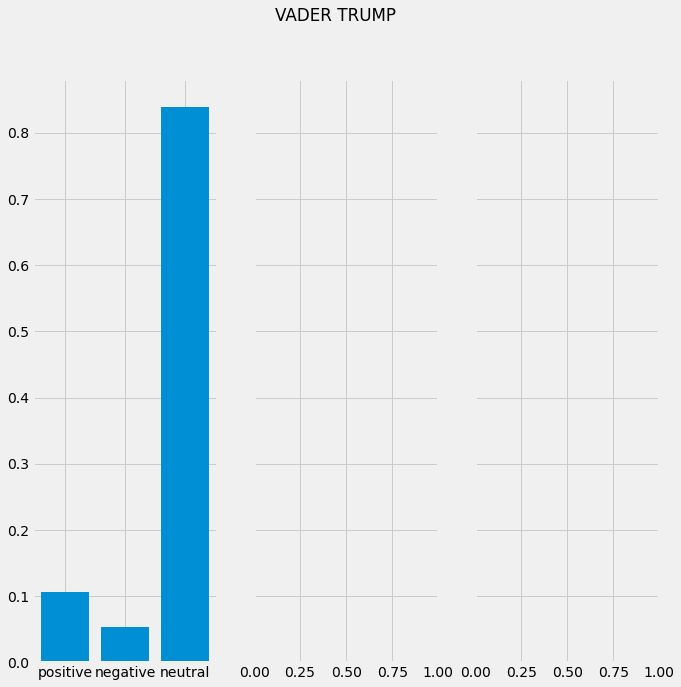

In [ ]:
results = {'positive':0.10666041892901307, 'negative':0.0540312596117029, 'neutral': 0.8393315590260559}
names = list(results.keys())
values = list(results.values())

fig, axs = plt.subplots(1, 3, figsize=(10, 10), sharey=True)
axs[0].bar(names, values)
fig.suptitle('VADER TRUMP')

In [ ]:
tot_compound_biden_5_nov = _5_nov_unito_biden_FIN["Compound"].sum()
media_compound_biden_5_nov = tot_compound_biden_5_nov/len(_5_nov_unito_biden_FIN)
print("La media del COMPOUND di Biden del 5 Novembre risulta: " + str(media_compound_biden_5_nov))

tot_Positive_biden_5_nov = _5_nov_unito_biden_FIN["Positive"].sum()
media_Positive_biden_5_nov = tot_Positive_biden_5_nov/len(_5_nov_unito_biden_FIN)
print("La media del POSITIVE di Biden del 5 Novembre risulta: " + str(media_Positive_biden_5_nov))

tot_Negative_biden_5_nov = _4_nov_unito_biden_FIN["Negative"].sum()
media_Negative_biden_5_nov = tot_Negative_biden_5_nov/len(_5_nov_unito_biden_FIN)
print("La media del NEGATIVE di Biden del 5 Novembre risulta: " + str(media_Negative_biden_5_nov))

tot_Neutral_biden_5_nov = _5_nov_unito_biden_FIN["Neutral"].sum()
media_Neutral_biden_5_nov = tot_Neutral_biden_5_nov/len(_5_nov_unito_biden_FIN)
print("La media del NEUTRAL di Biden del 5 Novembre risulta: " + str(media_Neutral_biden_5_nov))

La media del COMPOUND di Biden del 5 Novembre risulta: 0.04193067935635207
La media del POSITIVE di Biden del 5 Novembre risulta: 0.07644483124411706
La media del NEGATIVE di Biden del 5 Novembre risulta: 0.0712573396482945
La media del NEUTRAL di Biden del 5 Novembre risulta: 0.8572130104137096


Text(0.5, 0.98, 'VADER BIDEN')

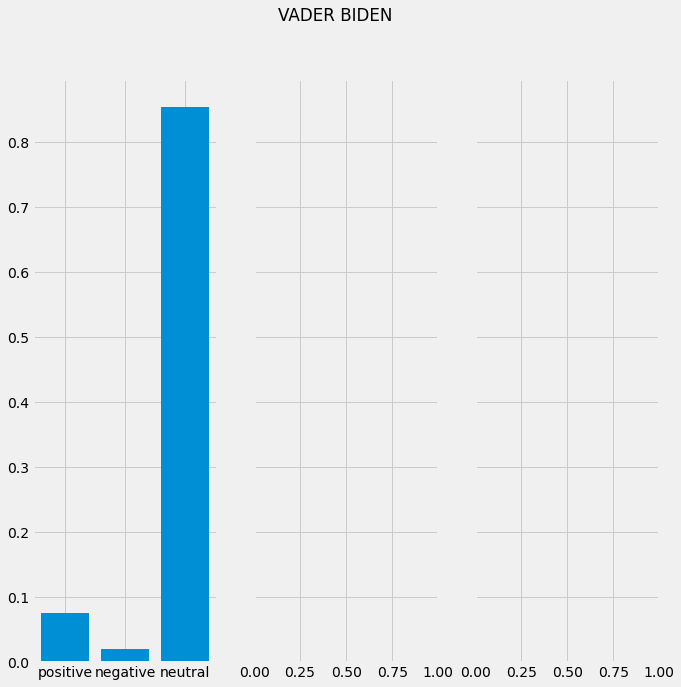

In [ ]:
results = {'positive': 0.07556142893427562, 'negative':0.020376805964351343, 'neutral':0.8539710298665788}
names = list(results.keys())
values = list(results.values())

fig, axs = plt.subplots(1, 3, figsize=(10, 10), sharey=True)
axs[0].bar(names, values)
fig.suptitle('VADER BIDEN')

# 6 NOVEMBRE 

In [ ]:
#POS TAGGING AND CHUNK 
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

def preprocess_pos_tag(sent):
    sent = nltk.pos_tag(sent)
    return sent
    
dataset_unico_6_nov["Text_clean_1"] = dataset_unico_6_nov['Text_clean_1'].apply(preprocess_pos_tag)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
dataset_unico_6_nov['Text_clean_1']=dataset_unico_6_nov['Text_clean_1'].apply(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


DIVISIONE IN UN DATASET RELATIVO A TRUMP ED UNO A BIDEN 

In [ ]:
dataset_unico_6_nov = dataset_unico_6_nov.explode("hashtags")

[Text(0, 0.5, 'Hashtag presente nel Tweet'),
 (0.0, 250000.0),
 Text(0.5, 0, 'Numero di Tweets'),
 Text(0.5, 1.0, 'HASHTAGS 6 NOVEMBRE')]

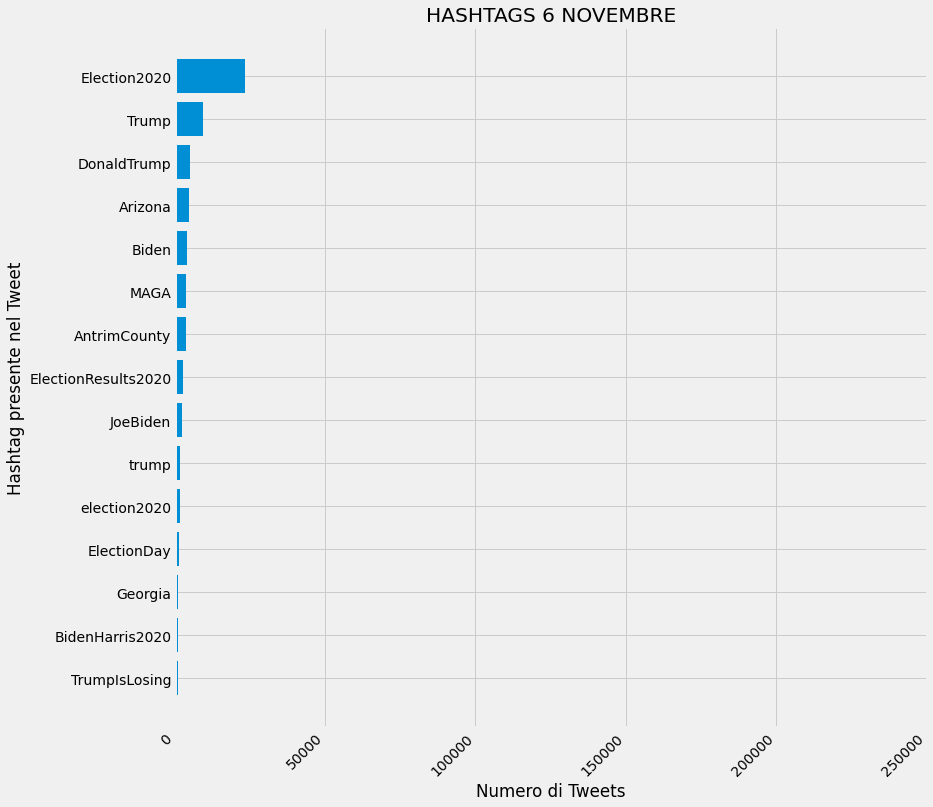

In [ ]:
#[PRESENZA DUPLICATI]
#Conteggio hashtag maggiormente presenti il 1 Novembre (di quelli raccolti):
conteggiogiorno_hashtags_6_nov = dataset_unico_6_nov.groupby('hashtags').size().reset_index(name='count')
conteggiogiorno_hashtags_6_nov = pd.DataFrame(conteggiogiorno_hashtags_6_nov).sort_values(by=['count'], ascending = True)
conteggiogiorno_hashtags_6_nov_top15 = conteggiogiorno_hashtags_6_nov.tail(15)

fig, ax = plt.subplots(figsize=(12, 12))
ax.barh(conteggiogiorno_hashtags_6_nov_top15['hashtags'], conteggiogiorno_hashtags_6_nov_top15['count'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[0, 250000], xlabel='Numero di Tweets', ylabel='Hashtag presente nel Tweet',
       title='HASHTAGS 6 NOVEMBRE')

In [ ]:
#[ESTRAZIONE TWEETS IN BASE AD HASHTAGS]
#COSTRUISCO I DATASETS DEL 6 NOVEMBRE CON TWEETS LEGATI A TRUMP E A BIDEN:
dataset_unico_6_nov_hashtags_trump = dataset_unico_6_nov.loc[(dataset_unico_6_nov['hashtags'] == "Trump") | (dataset_unico_6_nov['hashtags'] == "Trump2020" )]
print("Nel dataset con duplicati, tweets 6 Novembre e hashtags #Trump e #Trump2020, vi sono " + str(len(dataset_unico_6_nov_hashtags_trump.index)) + " tweets")
dataset_unico_6_nov_hashtags_biden = dataset_unico_6_nov.loc[(dataset_unico_6_nov['hashtags'] == "Biden") | (dataset_unico_6_nov['hashtags'] == "JoeBiden" ) | (dataset_unico_6_nov['hashtags'] == "BidenHarris2020" )]
print("Nel dataset con duplicati, tweets 6 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono " + str(len(dataset_unico_6_nov_hashtags_biden.index)) + " tweets")

dataset_unico_6_nov_hashtags_trump_nod = dataset_unico_6_nov_hashtags_trump.drop_duplicates(['_id'], keep="last")
print("[FINALE HASHTAGS] Nel dataset con tweets 6 Novembre e hashtags #Trump e #Trump2020, vi sono: " + str(len(dataset_unico_6_nov_hashtags_trump_nod.index)) + " tweets")
dataset_unico_6_nov_hashtags_biden_nod = dataset_unico_6_nov_hashtags_biden.drop_duplicates(['_id'], keep="last")
print("[FINALE HASHTAGS] Nel dataset con tweets 6 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono: " + str(len(dataset_unico_6_nov_hashtags_biden_nod.index)) + " tweets")

Nel dataset con duplicati, tweets 6 Novembre e hashtags #Trump e #Trump2020, vi sono 10380 tweets
Nel dataset con duplicati, tweets 6 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono 7615 tweets
[FINALE HASHTAGS] Nel dataset con tweets 6 Novembre e hashtags #Trump e #Trump2020, vi sono: 10212 tweets
[FINALE HASHTAGS] Nel dataset con tweets 6 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono: 7416 tweets


In [ ]:
#[ESTRAZIONE TWEETS IN BASE A PAROLE NEI TWEETS]
#Parole da utilizzare nel dataset di soliti tweets dove Trump viene citato nel testo:
parole_testo_trump =['Trump', 'Donald Trump', 'Trump2020', 'trump']

def matcherTrump(x):
    for i in parole_testo_trump:
        if i in x:
            return i
    else:
        return np.nan

#Parole da utilizzare nel dataset di soliti tweets dove Trump viene citato nel testo:
parole_testo_biden =['Biden', 'Joe Biden', 'Biden2020', 'BidenHarris2020', 'biden']

def matcherBiden(x):
    for i in parole_testo_biden:
        if i in x:
            return i
    else:
        return np.nan

#https://stackoverflow.com/questions/49073252/pandas-how-to-select-row-with-certain-word
#dataset_unico_6_nov_words_trump = dataset_unico_6_nov[dataset_unico_6_nov['Text_clean_1'].str.contains("Trump", regex=False, case=False, na=False)]
#TRUMP:
dataset_unico_6_nov['Match_parola_trump'] = dataset_unico_6_nov['Text_clean_1'].apply(matcherTrump)
dataset_unico_6_nov_words_trump = dataset_unico_6_nov.loc[(dataset_unico_6_nov['Match_parola_trump'] == "Trump") | (dataset_unico_6_nov['Match_parola_trump'] == "Donald Trump") | (dataset_unico_6_nov['Match_parola_trump'] == "Trump2020") | (dataset_unico_6_nov['Match_parola_trump'] == "trump")]
#Dataset nel quale sono contenuti i tweets dove sono contenute le parole riferite a trump nel testo:
dataset_unico_6_nov_words_trump_nod = dataset_unico_6_nov_words_trump.drop_duplicates(['_id'], keep="last")
dataset_unico_6_nov_words_trump_nod = remove_unwanted_cols(dataset_unico_6_nov_words_trump_nod, ["hashtags"])
print("[FINALE PAROLE] Nel dataset con tweets 6 Novembre e parole Trump, Donald Trump, trump e Trump2020, vi sono: " + str(len(dataset_unico_6_nov_words_trump_nod.index)) + " tweets")

#BIDEN:
dataset_unico_6_nov['Match_parola_biden'] = dataset_unico_6_nov['Text_clean_1'].apply(matcherBiden)
dataset_unico_6_nov_words_biden = dataset_unico_6_nov.loc[(dataset_unico_6_nov['Match_parola_biden'] == "Biden") | (dataset_unico_6_nov['Match_parola_biden'] == "Joe Biden") | (dataset_unico_6_nov['Match_parola_biden'] == "BidenHarris2020") | (dataset_unico_6_nov['Match_parola_biden'] == "biden") | (dataset_unico_6_nov['Match_parola_biden'] == "Biden2020")]
#Dataset nel quale sono contenuti i tweets dove sono contenute le parole riferite a trump nel testo:
dataset_unico_6_nov_words_biden_nod = dataset_unico_6_nov_words_biden.drop_duplicates(['_id'], keep="last")
dataset_unico_6_nov_words_biden_nod = remove_unwanted_cols(dataset_unico_6_nov_words_biden_nod, ["hashtags"])
print("[FINALE PAROLE] Nelf dataset con tweets 6 Novembre e parole Biden, Joe Biden, biden, BidenHarris2020 e Biden2020, vi sono: " + str(len(dataset_unico_6_nov_words_biden_nod.index)) + " tweets")

[FINALE PAROLE] Nel dataset con tweets 6 Novembre e parole Trump, Donald Trump, trump e Trump2020, vi sono: 15564 tweets
[FINALE PAROLE] Nelf dataset con tweets 6 Novembre e parole Biden, Joe Biden, biden, BidenHarris2020 e Biden2020, vi sono: 8350 tweets


In [ ]:
#UNIONE UNICO DATASET PER TRUMP E BIDEN CON I TWEETS CHE CONTENGONO HASHTAGS E PAROLE RIFERITI A LORO DUE:
#TRUMP
_6_nov_unito_trump = pd.concat([dataset_unico_6_nov_words_trump_nod, dataset_unico_6_nov_hashtags_trump_nod])
_6_nov_unito_trump_FIN = _6_nov_unito_trump.drop_duplicates(['_id'], keep="last")
print("Nel dataset finale relativo a Trump, del 6 Novembre, vi sono:" + str(len(_6_nov_unito_trump_FIN.index)) + " tweets")

#BIDEN:
_6_nov_unito_biden = pd.concat([dataset_unico_6_nov_words_biden_nod, dataset_unico_6_nov_hashtags_biden_nod])
_6_nov_unito_biden_FIN = _6_nov_unito_biden.drop_duplicates(['_id'], keep="last")
print("Nel dataset finale relativo a Biden, del 6 Novembre, vi sono:" + str(len(_6_nov_unito_biden_FIN.index)) + " tweets")

Nel dataset finale relativo a Trump, del 6 Novembre, vi sono:25197 tweets
Nel dataset finale relativo a Biden, del 6 Novembre, vi sono:15327 tweets


In [ ]:
pip install afinn

In [ ]:
from afinn import Afinn
afinn = Afinn()

In [ ]:
_6_nov_unito_trump_FIN['afinn'] = _6_nov_unito_trump_FIN['Text_clean_3'].apply(afinn.score)
_6_nov_unito_trump_FIN.afinn.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


 0.0     8328
-2.0     5031
 2.0     1886
-1.0     1705
 1.0     1666
-3.0     1398
-4.0     1062
 3.0      989
 4.0      907
 5.0      616
-5.0      478
-6.0      310
 6.0      189
 7.0      178
-7.0      172
-8.0       70
-9.0       40
 8.0       28
-10.0      27
-11.0      21
-12.0      19
 9.0       18
 10.0      11
 12.0      10
-14.0       7
 11.0       6
 13.0       5
 14.0       4
-15.0       4
-18.0       4
-24.0       3
-17.0       2
 15.0       2
-13.0       1
Name: afinn, dtype: int64

In [ ]:
df_value_counts = pd.DataFrame(_6_nov_unito_trump_FIN.afinn.value_counts())
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['valori', 'counts']

[(-25.0, 20.0),
 Text(0, 0.5, 'valori'),
 (0.0, 23000.0),
 Text(0.5, 0, 'conteggio '),
 Text(0.5, 1.0, 'afinn semtiment')]

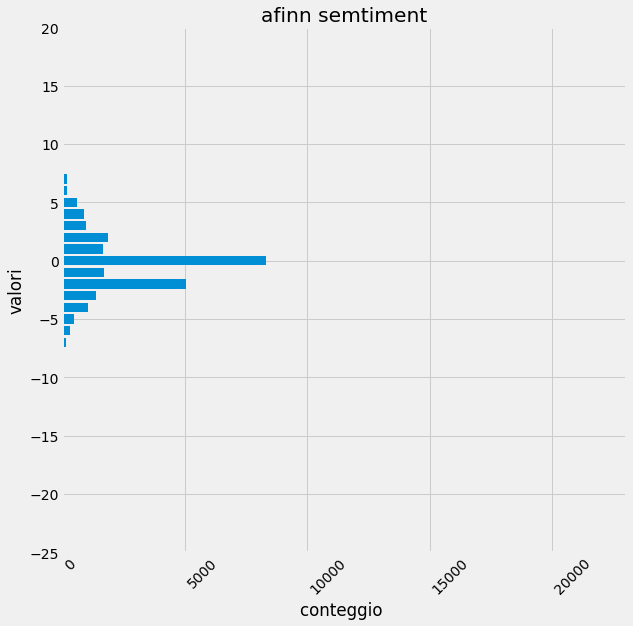

In [ ]:
fig, ax = plt.subplots(figsize=(9, 9))
ax.barh(df_value_counts['valori'], df_value_counts['counts'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='left')
ax.set(xlim=[0, 23000], ylim=[-25,20],xlabel='conteggio ', ylabel='valori',
       title='afinn semtiment')

In [ ]:
_6_nov_unito_biden_FIN['afinn'] = _6_nov_unito_biden_FIN['Text_clean_3'].apply(afinn.score)
_6_nov_unito_biden_FIN.afinn.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


 0.0     6819
 3.0     1345
 1.0     1187
 2.0     1131
 4.0     1010
-2.0      725
-1.0      671
-3.0      638
 6.0      433
 5.0      372
-4.0      251
 7.0      135
-5.0      132
 8.0      110
-7.0       73
-6.0       69
 9.0       58
-9.0       39
-8.0       31
 10.0      27
-11.0      10
 13.0      10
 12.0       8
-12.0       7
-10.0       7
 11.0       7
-13.0       7
 14.0       6
 22.0       4
 16.0       2
 19.0       2
-18.0       1
Name: afinn, dtype: int64

[(-30.0, 30.0),
 Text(0, 0.5, 'valori'),
 (0.0, 23000.0),
 Text(0.5, 0, 'conteggio '),
 Text(0.5, 1.0, 'afinn semtiment BIDEN')]

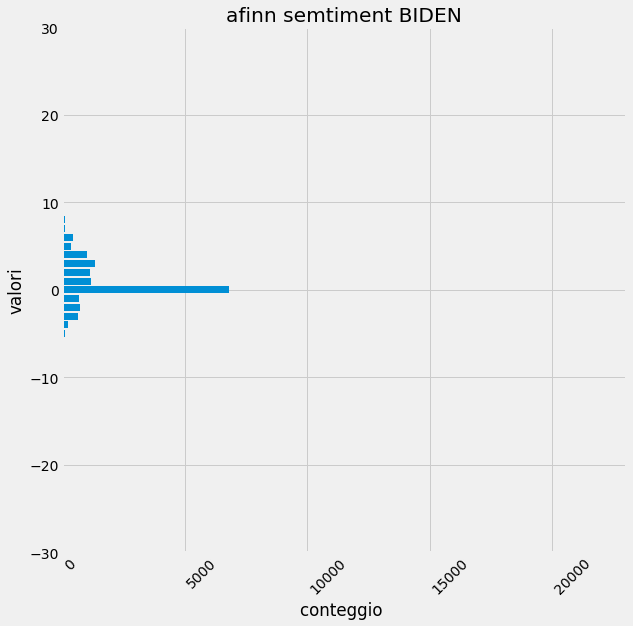

In [ ]:
df_value_counts1 = pd.DataFrame(_6_nov_unito_biden_FIN.afinn.value_counts())
df_value_counts1 = df_value_counts1.reset_index()
df_value_counts1.columns = ['valori', 'counts']
fig, ax = plt.subplots(figsize=(9, 9))
ax.barh(df_value_counts1['valori'], df_value_counts1['counts'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='left')
ax.set(xlim=[0, 23000], ylim=[-30,30],xlabel='conteggio ', ylabel='valori',
       title='afinn semtiment BIDEN')

In [ ]:
Estremi_positivi=_6_nov_unito_trump_FIN[_6_nov_unito_trump_FIN['afinn'] > 10].head()
Estremi_positivi2=Estremi_positivi[['afinn','Text','Text_clean_1']]
Estremi_positivi2

,afinn,Text,Text_clean_1
14827,12.0,Lol you’re right good will prevail but trump a...,"[('lol', 'RB'), ('right', 'RB'), ('good', 'JJ'..."
29244,12.0,@FLOTUS is the only winner here! If @realDonal...,"[('@flotus', 'NN'), ('winner', 'NN'), ('@reald..."
1553,13.0,We NEVER lose this election! We will win!! Jus...,"[('never', 'RB'), ('lose', 'VB'), ('election',..."
1669,12.0,WOW WOW WOW- Recount every ballot in MI!! #202...,"[('wow', 'NN'), ('wow', 'NN'), ('wow', 'NN'), ..."
3923,13.0,RT @ericcoliu: @JeffreyFBarken a flock of crow...,"[('@ericcoliu', 'RB'), ('@jeffreyfbarken', 'JJ..."


In [ ]:
Estremi_negativi=_6_nov_unito_trump_FIN[_6_nov_unito_trump_FIN['afinn'] <-6].head()
Estremi_negativi2=Estremi_negativi[['afinn','Text','Text_clean_1']]
Estremi_negativi2

,afinn,Text,Text_clean_1
64,-11.0,• Mitt Romney: Trump’s election fraud claim wr...,"[('mitt', 'NN'), ('romney', 'NN'), ('trump', '..."
995,-8.0,#election2020 Fraud or sore loser? @realDonald...,"[('#election2020', 'NN'), ('fraud', 'NN'), ('s..."
2175,-7.0,RT @rhodafromfloda: @KathyBenjamin Trump and h...,"[('@rhodafromfloda', 'NN'), ('@kathybenjamin',..."
2326,-7.0,RT @rhodafromfloda: @KathyBenjamin Trump and h...,"[('@rhodafromfloda', 'NN'), ('@kathybenjamin',..."
3222,-12.0,The Democrats angry about fraud accusations ar...,"[('democrat', 'NN'), ('angry', 'JJ'), ('fraud'..."


In [ ]:
Estremi_positivi5=_6_nov_unito_biden_FIN[_6_nov_unito_biden_FIN['afinn'] > 10].head()
Estremi_positivi6=Estremi_positivi5[['afinn','Text','Text_clean_1']]
Estremi_positivi6

,afinn,Text,Text_clean_1
14827,12.0,Lol you’re right good will prevail but trump a...,"[('lol', 'RB'), ('right', 'RB'), ('good', 'JJ'..."
22078,11.0,RT @ryanmatsumoto1: At this point Biden and th...,"[('@ryanmatsumoto1', 'JJ'), ('point', 'NN'), (..."
29244,12.0,@FLOTUS is the only winner here! If @realDonal...,"[('@flotus', 'NN'), ('winner', 'NN'), ('@reald..."
1214,12.0,RT @LadwaShiv: Joe Biden winning the Election ...,"[('@ladwashiv', 'JJ'), ('joe', 'NN'), ('biden'..."
502,12.0,https://t.co/sbKcwbVjPs #vote #vote2020 #elec...,"[('https://t.co/sbkcwbvjps', 'JJ'), ('#vote', ..."


In [ ]:
Estremi_negativi3=_6_nov_unito_biden_FIN[_6_nov_unito_biden_FIN['afinn'] <-6].head()
Estremi_negativi4=Estremi_negativi3[['afinn','Text','Text_clean_1']]
Estremi_negativi4

,afinn,Text,Text_clean_1
686,-7.0,RT @PanagiotaJ: Where in the hell is the speci...,"[('@panagiotaj', 'NN'), ('hell', 'NN'), ('spec..."
4239,-9.0,RT @report_eagle: Hearing that the Biden campa...,"[('@report_eagle', 'NN'), ('hearing', 'VBG'), ..."
4900,-11.0,"RT @marxistJorge: “Fuck Trump, Fuck Biden too,...","[('@marxistjorge', 'NN'), ('fuck', 'VBD'), ('t..."
5319,-11.0,"RT @marxistJorge: “Fuck Trump, Fuck Biden too,...","[('@marxistjorge', 'NN'), ('fuck', 'VBD'), ('t..."
5788,-7.0,Trump2020 Real people vote for Trump! Dead peo...,"[('trump', 'NN'), ('2020', 'CD'), ('real', 'JJ..."


In [ ]:
from tweepy import OAuthHandler 
from textblob import TextBlob 

In [ ]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [ ]:
_6_nov_unito_trump_FIN['Subjectivity'] = _6_nov_unito_trump_FIN['Text_clean_1'].apply(getTextSubjectivity)
_6_nov_unito_trump_FIN['Polarity'] = _6_nov_unito_trump_FIN['Text_clean_1'].apply(getTextPolarity)
_6_nov_unito_biden_FIN['Subjectivity'] = _6_nov_unito_biden_FIN['Text_clean_1'].apply(getTextSubjectivity)
_6_nov_unito_biden_FIN['Polarity'] = _6_nov_unito_biden_FIN['Text_clean_1'].apply(getTextPolarity)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
# negative, nautral, positive analysis
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

In [ ]:
_6_nov_unito_biden_FIN['Score'] = _6_nov_unito_biden_FIN['Polarity'].apply(getTextAnalysis)
_6_nov_unito_trump_FIN['Score'] = _6_nov_unito_trump_FIN['Polarity'].apply(getTextAnalysis)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print("[POSITIVE]")
positive_biden_6 = _6_nov_unito_biden_FIN[_6_nov_unito_biden_FIN['Score'] == 'Positive']
print(str(positive_biden_6.shape[0]/(_6_nov_unito_biden_FIN.shape[0])*100) + " % of positive tweets [BIDEN]")
positive_trump_6 = _6_nov_unito_trump_FIN[_6_nov_unito_trump_FIN['Score'] == 'Positive']
print(str(positive_trump_6.shape[0]/(_6_nov_unito_trump_FIN.shape[0])*100) + " % of positive tweets [TRUMP]")
print("\\\\\\\\\\")
print("[NEGATIVE]")
negative_biden_6 = _6_nov_unito_biden_FIN[_6_nov_unito_biden_FIN['Score'] == 'Negative']
print(str(negative_biden_6.shape[0]/(_6_nov_unito_biden_FIN.shape[0])*100) + " % of negative tweets [BIDEN]")
negative_trump_6 = _6_nov_unito_trump_FIN[_6_nov_unito_trump_FIN['Score'] == 'Negative']
print(str(negative_trump_6.shape[0]/(_6_nov_unito_trump_FIN.shape[0])*100) + " % of negative tweets [TRUMP]")
print("\\\\\\\\\\")
print("[NEUTRAL]")
neutral_biden_6 = _6_nov_unito_biden_FIN[_6_nov_unito_biden_FIN['Score'] == 'Neutral']
print(str(neutral_biden_6.shape[0]/(_6_nov_unito_biden_FIN.shape[0])*100) + " % of neutral tweets [BIDEN]")
neutral_trump_6 = _6_nov_unito_trump_FIN[_6_nov_unito_trump_FIN['Score'] == 'Neutral']
print(str(neutral_trump_6.shape[0]/(_6_nov_unito_trump_FIN.shape[0])*100) + " % of neutral tweets [TRUMP]")

[POSITIVE]
18.45599294642394 % of positive tweets [BIDEN]
33.373748900458835 % of positive tweets [TRUMP]
\\\\\
[NEGATIVE]
7.1391525335822825 % of negative tweets [BIDEN]
15.331764258374342 % of negative tweets [TRUMP]
\\\\\
[NEUTRAL]
74.40485451999378 % of neutral tweets [BIDEN]
51.29448684116682 % of neutral tweets [TRUMP]


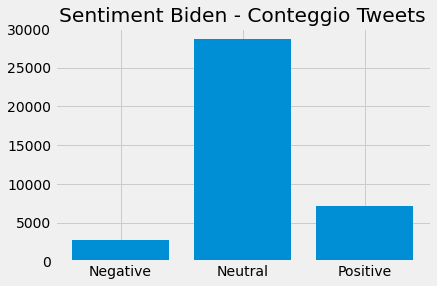

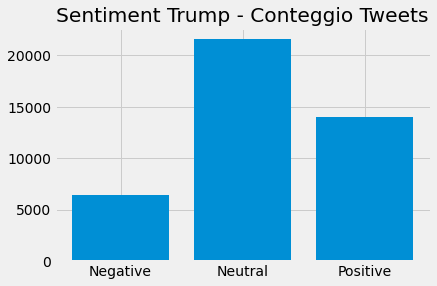

In [ ]:
labels_biden = _6_nov_unito_biden_FIN.groupby('Score').count().index.values
values_biden = _6_nov_unito_biden_FIN.groupby('Score').size().values
plt.bar(labels_biden, values_biden)
plt.title("Sentiment Biden - Conteggio Tweets")
plt.show()

labels_trump = _6_nov_unito_trump_FIN.groupby('Score').count().index.values
values_trump = _6_nov_unito_trump_FIN.groupby('Score').size().values
plt.bar(labels_trump, values_trump)
plt.title("Sentiment Trump - Conteggio Tweets")

plt.show()

In [ ]:
#lexicon

In [ ]:
import nltk
nltk.download('opinion_lexicon')
from nltk.corpus import opinion_lexicon

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


In [ ]:
pos_list=set(opinion_lexicon.positive())
neg_list=set(opinion_lexicon.negative())

In [ ]:
def sentiment_neg(sentence):
  total_sentiment = 0
  sentences = sentence.split(",")
  for s in sentences: 
    sentence_sentiment = 0
    sentence = [word.lower() for word in word_tokenize(s)] 
    

    for word in sentence:
      word = lemmatizer.lemmatize(word)

      if word in pos_list:
        sentence_sentiment += 1
      elif word in neg_list:
        sentence_sentiment -= 1

    if 'not' in sentence:
      sentence_sentiment = - sentence_sentiment
    total_sentiment += sentence_sentiment
  return total_sentiment

In [ ]:
_6_nov_unito_trump_FIN['Text_clean_3'] = _6_nov_unito_trump_FIN['Text_clean_3'].apply(str)
_6_nov_unito_biden_FIN['Text_clean_3'] = _6_nov_unito_biden_FIN['Text_clean_3'].apply(str)                                                                               

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
_6_nov_unito_trump_FIN['test1'] = _6_nov_unito_trump_FIN['Text_clean_3'].apply(sentiment_neg)
_6_nov_unito_trump_FIN.test1.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


 1    10377
 0     6686
 2     3618
-1     2094
 3      968
-2      697
 4      441
-3      243
 5       31
-4       24
-5        9
 6        6
-7        3
Name: test1, dtype: int64

[(-10.0, 20.0),
 Text(0, 0.5, 'valori'),
 (0.0, 50000.0),
 Text(0.5, 0, 'conteggio '),
 Text(0.5, 1.0, 'lexicon based approach semtiment')]

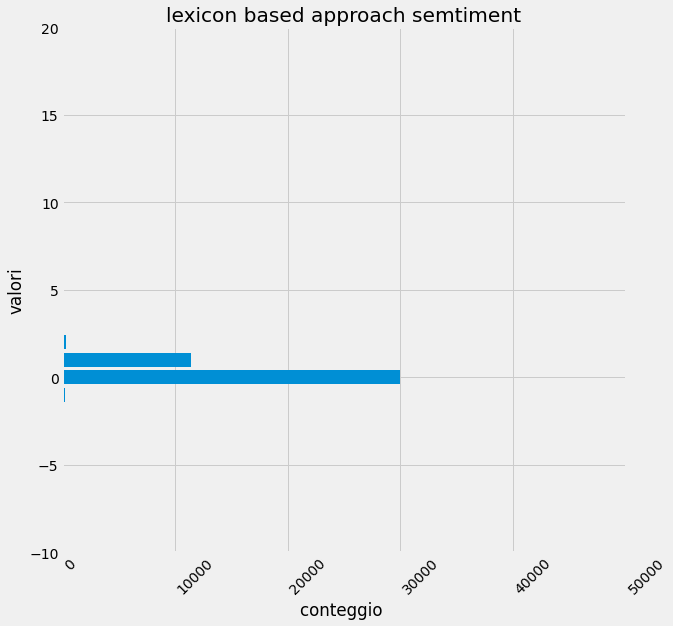

In [ ]:
df_value_counts3 = pd.DataFrame(_6_nov_unito_trump_FIN.test1.value_counts())
df_value_counts3 = df_value_counts3.reset_index()
df_value_counts3.columns = ['valori', 'counts']
fig, ax = plt.subplots(figsize=(9, 9))
ax.barh(df_value_counts3['valori'], df_value_counts3['counts'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='left')
ax.set(xlim=[0, 50000], ylim=[-10,20], xlabel='conteggio ', ylabel='valori',
       title='lexicon based approach semtiment')

In [ ]:
_6_nov_unito_biden_FIN['test1'] = _6_nov_unito_biden_FIN['Text_clean_3'].apply(sentiment_neg)
_6_nov_unito_biden_FIN.test1.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


 0    5525
 1    5443
 2    1658
-1    1411
 3     462
-2     422
 4     243
-3     120
-4      25
 5      10
-7       4
-6       2
 6       1
-5       1
Name: test1, dtype: int64

[(-10.0, 20.0),
 Text(0, 0.5, 'valori'),
 (0.0, 50000.0),
 Text(0.5, 0, 'conteggio '),
 Text(0.5, 1.0, 'lexicon based approach semtiment')]

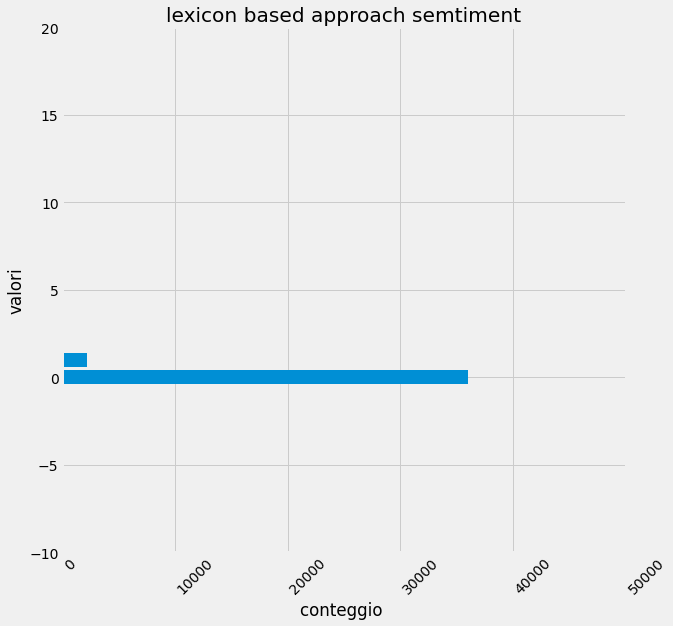

In [ ]:
df_value_counts4 = pd.DataFrame(_6_nov_unito_biden_FIN.test1.value_counts())
df_value_counts4 = df_value_counts4.reset_index()
df_value_counts4.columns = ['valori', 'counts']
fig, ax = plt.subplots(figsize=(9, 9))
ax.barh(df_value_counts4['valori'], df_value_counts4['counts'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='left')
ax.set(xlim=[0, 50000], ylim=[-10,20], xlabel='conteggio ', ylabel='valori',
       title='lexicon based approach semtiment')

In [ ]:
#media??

In [ ]:
#vader

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
scores = []
# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

scores_1 = []
# Declare variables for scores
compound_list_1 = []
positive_list_1 = []
negative_list_1 = []
neutral_list_1 = []

scores_2 = []
# Declare variables for scores
compound_list_2 = []
positive_list_2 = []
negative_list_2 = []
neutral_list_2 = []

scores_3 = []
# Declare variables for scores
compound_list_3 = []
positive_list_3 = []
negative_list_3 = []
neutral_list_3 = []

In [ ]:
_6_nov_unito_biden_FIN = _6_nov_unito_biden_FIN.reset_index(drop=True)
_6_nov_unito_trump_FIN = _6_nov_unito_trump_FIN.reset_index(drop=True)

In [ ]:
for i in range(_6_nov_unito_trump_FIN['Text_clean_2'].shape[0]):
    compound = analyzer.polarity_scores(_6_nov_unito_trump_FIN['Text'][i])["compound"]
    pos = analyzer.polarity_scores(_6_nov_unito_trump_FIN['Text'][i])["pos"]
    neu = analyzer.polarity_scores(_6_nov_unito_trump_FIN['Text'][i])["neu"]
    neg = analyzer.polarity_scores(_6_nov_unito_trump_FIN['Text'][i])["neg"]
    scores_1.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })
for i in range(_6_nov_unito_biden_FIN['Text_clean_2'].shape[0]):
    compound = analyzer.polarity_scores(_6_nov_unito_biden_FIN['Text'][i])["compound"]
    pos = analyzer.polarity_scores(_6_nov_unito_biden_FIN['Text'][i])["pos"]
    neu = analyzer.polarity_scores(_6_nov_unito_biden_FIN['Text'][i])["neu"]
    neg = analyzer.polarity_scores(_6_nov_unito_biden_FIN['Text'][i])["neg"]
    scores_2.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

In [ ]:
sentiments_score_1 = pd.DataFrame.from_dict(scores_1)
_6_nov_unito_trump_FIN = _6_nov_unito_trump_FIN.join(sentiments_score_1)
_6_nov_unito_trump_FIN.head()

,_id,Screen_name,Text,Followers,Date_time,Hashtags,Novembre,Text_clean_1,Text_clean_2,Match_parola_trump,hashtags,afinn,Subjectivity,Polarity,Score,test1,Compound,Positive,Negative,Neutral
0,"ObjectId(""5fa5c63e8e675562f55c8d39"")",meltedmarbles,RT @DrMartyFox: Attorney @SidneyPowell1 \n\n▶️...,4120,2020-11-06 21:55:05,NaN,6,"[('@drmartyfox', 'JJ'), ('attorney', 'NN'), ('...",: Attorney \n\n PresidentTrump CRUSHED All Th...,trump,NaN,2.0,0.25,0.35,Positive,0,0.0688,0.156,0.145,0.699
1,"ObjectId(""5fa5c63f8e675562f55c8d3b"")",jessterlavorre,RT @VPS_Reports: Tons of officers stationed ne...,838,2020-11-06 21:55:06,NaN,6,"[('@vps_reports', 'NNS'), ('ton', 'VBD'), ('of...",: Tons of officers stationed near city hall. O...,trump,NaN,-2.0,0.40,0.10,Positive,0,-0.4019,0.000,0.109,0.891
2,"ObjectId(""5fa5c6418e675562f55c8d4f"")",Deidre14203533,RT @DrMartyFox: Attorney @SidneyPowell1 \n\n▶️...,31,2020-11-06 21:55:08,NaN,6,"[('@drmartyfox', 'JJ'), ('attorney', 'NN'), ('...",: Attorney \n\n PresidentTrump CRUSHED All Th...,trump,NaN,2.0,0.25,0.35,Positive,0,0.0688,0.156,0.145,0.699
3,"ObjectId(""5fa5c6428e675562f55c8d5b"")",RepublicansAga5,"For months, I’ve been waiting for the chance t...",1830,2020-11-06 21:55:08,NaN,6,"[('month', 'NN'), ('waiting', 'VBG'), ('chance...","For months, I’ve been waiting for the chance t...",trump,NaN,4.0,0.10,0.30,Positive,0,0.7717,0.300,0.000,0.700
4,"ObjectId(""5fa5c6428e675562f55c8d5c"")",chrisboron,"4/4 #Election2020 late at night on January 19,...",108,2020-11-06 21:55:08,NaN,6,"[('4', 'CD'), ('4', 'CD'), ('#election2020', '...","4/4 Election2020 late at night on January 19, ...",trump,NaN,2.0,0.60,-0.30,Negative,0,0.0516,0.098,0.090,0.812


In [ ]:
sentiments_score_2 = pd.DataFrame.from_dict(scores_2)
_6_nov_unito_biden_FIN = _6_nov_unito_biden_FIN.join(sentiments_score_2)
_6_nov_unito_biden_FIN.head()

,_id,Screen_name,Text,Followers,Date_time,Hashtags,Novembre,Text_clean_1,Text_clean_2,Match_parola_trump,Match_parola_biden,hashtags,afinn,Subjectivity,Polarity,Score,test1,Compound,Positive,Negative,Neutral
0,"ObjectId(""5fa5c63e8e675562f55c8d30"")",Luvmycountry6,RT @IngrahamAngle: Arizona:\n\nJoe Biden's lea...,5422,2020-11-06 21:55:05,NaN,6,"[('@ingrahamangle', 'NN'), ('arizona', 'NN'), ...",: Arizona:\n\nJoe Biden's lead in Arizona has ...,NaN,biden,NaN,-1.0,0.0,0.000000,Neutral,0,0.000,0.000,0.000,1.000
1,"ObjectId(""5fa5c63e8e675562f55c8d34"")",AssShitter420,RT @JohnHPiette: America Assembled!🇺🇸🎉\n\n@Joe...,147,2020-11-06 21:55:05,NaN,6,"[('@johnhpiette', 'NN'), ('america', 'NN'), ('...",: America Assembled!\n\n \n …,NaN,biden,NaN,0.0,0.0,0.000000,Neutral,0,0.000,0.000,0.000,1.000
2,"ObjectId(""5fa5c63e8e675562f55c8d35"")",bendonaldson33,with Joe Biden as President.. welcome to real ...,51,2020-11-06 21:55:05,NaN,6,"[('joe', 'NN'), ('biden', 'NN'), ('president',...",with Joe Biden as President.. welcome to real ...,NaN,biden,NaN,0.0,0.4,0.333333,Positive,0,0.128,0.133,0.111,0.756
3,"ObjectId(""5fa5c63e8e675562f55c8d37"")",ELDBLOAXD,RT @JohnHPiette: America Assembled!🇺🇸🎉\n\n@Joe...,298,2020-11-06 21:55:05,NaN,6,"[('@johnhpiette', 'NN'), ('america', 'NN'), ('...",: America Assembled!\n\n \n …,NaN,biden,NaN,0.0,0.0,0.000000,Neutral,0,0.000,0.000,0.000,1.000
4,"ObjectId(""5fa5c63f8e675562f55c8d3a"")",GusnawanR,RT @TheScoleriBros: Election Day but make it E...,17,2020-11-06 21:55:05,NaN,6,"[('@thescoleribros', 'JJ'), ('election', 'NN')...",: Election Day but make it Endgame BidenHarris...,NaN,biden,NaN,0.0,0.0,0.000000,Neutral,0,0.000,0.000,0.000,1.000


In [ ]:
tot_compound_trump_6_nov = _6_nov_unito_trump_FIN["Compound"].sum()
media_compound_trump_6_nov = tot_compound_trump_6_nov/len(_6_nov_unito_trump_FIN)
print("La media del COMPOUND di trump del 6 Novembre risulta: " + str(media_compound_trump_6_nov))

tot_Positive_trump_6_nov = _6_nov_unito_trump_FIN["Positive"].sum()
media_Positive_trump_6_nov = tot_Positive_trump_6_nov/len(_6_nov_unito_trump_FIN)
print("La media del POSITIVE di trump del 6 Novembre risulta: " + str(media_Positive_trump_6_nov))

tot_Negative_trump_6_nov = _6_nov_unito_trump_FIN["Negative"].sum()
media_Negative_trump_6_nov = tot_Negative_trump_6_nov/len(_6_nov_unito_trump_FIN)
print("La media del NEGATIVE di trump del 6 Novembre risulta: " + str(media_Negative_trump_6_nov))

tot_Neutral_trump_6_nov = _6_nov_unito_trump_FIN["Neutral"].sum()
media_Neutral_trump_6_nov = tot_Neutral_trump_6_nov/len(_6_nov_unito_trump_FIN)
print("La media del NEUTRAL di trump del 6 Novembre risulta: " + str(media_Neutral_trump_6_nov))

La media del COMPOUND di trump del 6 Novembre risulta: 0.05105693364714832
La media del POSITIVE di trump del 6 Novembre risulta: 0.09343929344079119
La media del NEGATIVE di trump del 6 Novembre risulta: 0.07983705394289518
La media del NEUTRAL di trump del 6 Novembre risulta: 0.8267298575945605


In [ ]:
tot_compound_biden_6_nov = _6_nov_unito_biden_FIN["Compound"].sum()
media_compound_biden_6_nov = tot_compound_biden_6_nov/len(_6_nov_unito_biden_FIN)
print("La media del COMPOUND di Biden del 6 Novembre risulta: " + str(media_compound_biden_6_nov))

tot_Positive_biden_6_nov = _6_nov_unito_biden_FIN["Positive"].sum()
media_Positive_biden_6_nov = tot_Positive_biden_6_nov/len(_6_nov_unito_biden_FIN)
print("La media del POSITIVE di Biden del 6 Novembre risulta: " + str(media_Positive_biden_6_nov))

tot_Negative_biden_6_nov = _6_nov_unito_biden_FIN["Negative"].sum()
media_Negative_biden_6_nov = tot_Negative_biden_6_nov/len(_6_nov_unito_biden_FIN)
print("La media del NEGATIVE di Biden del 6 Novembre risulta: " + str(media_Negative_biden_6_nov))

tot_Neutral_biden_6_nov = _6_nov_unito_biden_FIN["Neutral"].sum()
media_Neutral_biden_6_nov = tot_Neutral_biden_6_nov/len(_6_nov_unito_biden_FIN)
print("La media del NEUTRAL di Biden del 6 Novembre risulta: " + str(media_Neutral_biden_6_nov))

La media del COMPOUND di Biden del 6 Novembre risulta: 0.06197986100306001
La media del POSITIVE di Biden del 6 Novembre risulta: 0.04559916498106945
La media del NEGATIVE di Biden del 6 Novembre risulta: 0.022606140760334004
La media del NEUTRAL di Biden del 6 Novembre risulta: 0.9317961464654324


Text(0.5, 0.98, 'VADER TRUMP')

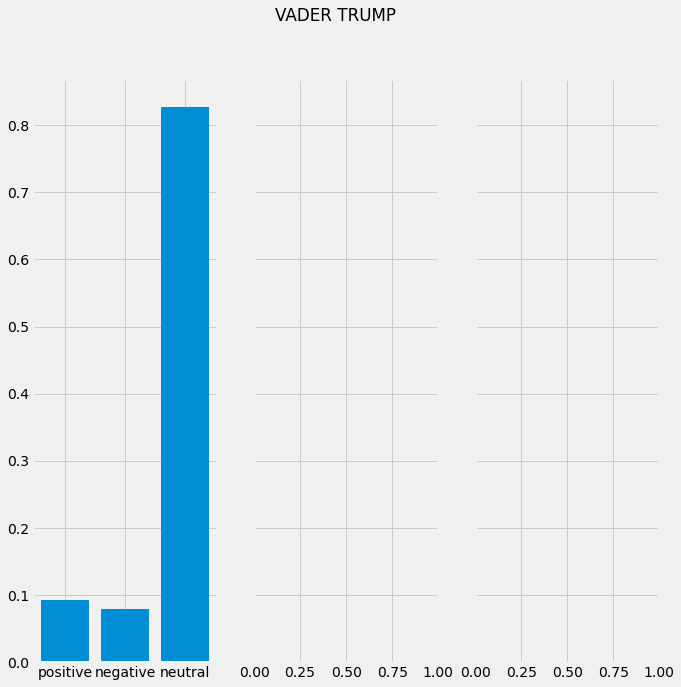

In [ ]:
results = {'positive':0.09343929344079119, 'negative':0.07983705394289518, 'neutral': 0.8267298575945605}
names = list(results.keys())
values = list(results.values())

fig, axs = plt.subplots(1, 3, figsize=(10, 10), sharey=True)
axs[0].bar(names, values)
fig.suptitle('VADER TRUMP')

Text(0.5, 0.98, 'VADER BIDEN')

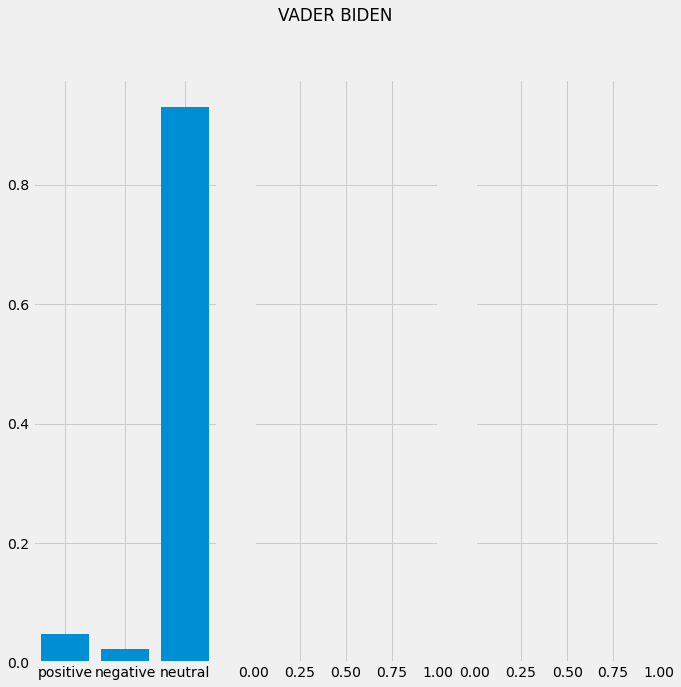

In [ ]:
results = {'positive':0.04559916498106945, 'negative'0.022606140760334004, 'neutral': 0.9317961464654324}
names = list(results.keys())
values = list(results.values())

fig, axs = plt.subplots(1, 3, figsize=(10, 10), sharey=True)
axs[0].bar(names, values)
fig.suptitle('VADER BIDEN')

# 7 NOVEMBRE 

In [ ]:
#POS TAGGING AND CHUNK 
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

def preprocess_pos_tag(sent):
    sent = nltk.pos_tag(sent)
    return sent
    
dataset_unico_7_nov["Text_clean_1"] = dataset_unico_7_nov['Text_clean_1'].apply(preprocess_pos_tag)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
dataset_unico_7_nov['Text_clean_1']=dataset_unico_7_nov['Text_clean_1'].apply(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dataset_unico_7_nov = dataset_unico_7_nov.explode("hashtags")

[Text(0, 0.5, 'Hashtag presente nel Tweet'),
 (0.0, 250000.0),
 Text(0.5, 0, 'Numero di Tweets'),
 Text(0.5, 1.0, 'HASHTAGS 7 NOVEMBRE')]

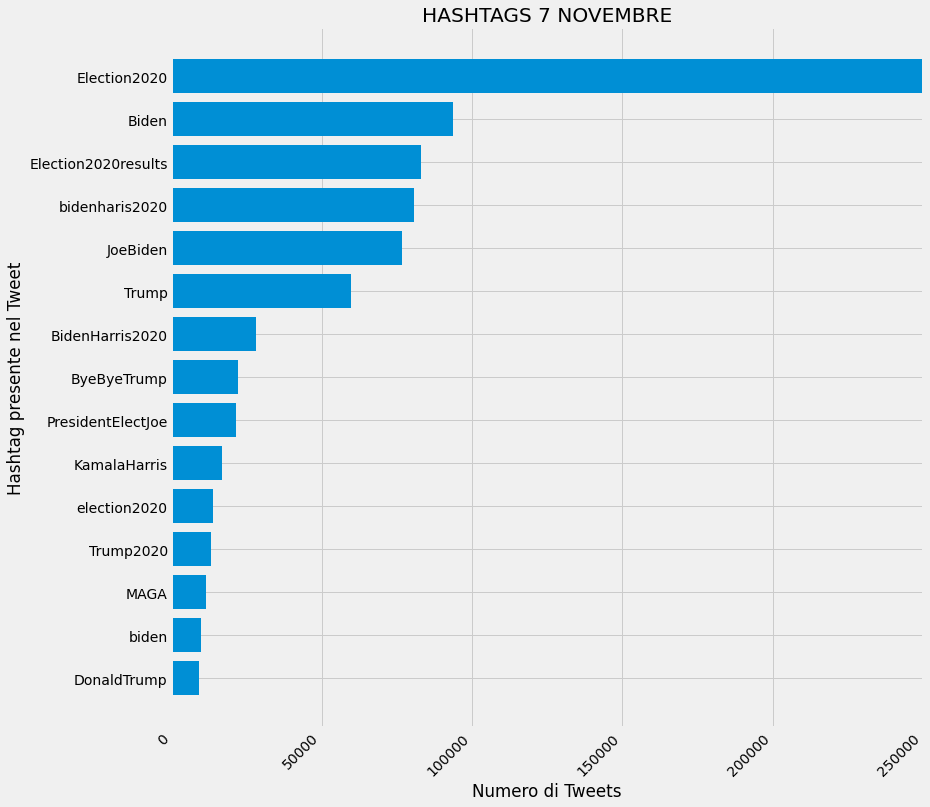

In [ ]:
#[PRESENZA DUPLICATI]
#Conteggio hashtag maggiormente presenti il 7 Novembre (di quelli raccolti):
conteggiogiorno_hashtags_7_nov = dataset_unico_7_nov.groupby('hashtags').size().reset_index(name='count')
conteggiogiorno_hashtags_7_nov = pd.DataFrame(conteggiogiorno_hashtags_7_nov).sort_values(by=['count'], ascending = True)
conteggiogiorno_hashtags_7_nov_top15 = conteggiogiorno_hashtags_7_nov.tail(15)

fig, ax = plt.subplots(figsize=(12, 12))
ax.barh(conteggiogiorno_hashtags_7_nov_top15['hashtags'], conteggiogiorno_hashtags_7_nov_top15['count'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[0, 250000], xlabel='Numero di Tweets', ylabel='Hashtag presente nel Tweet',
       title='HASHTAGS 7 NOVEMBRE')

In [ ]:
#[ESTRAZIONE TWEETS IN BASE AD HASHTAGS]
#COSTRUISCO I DATASETS DEL 7 NOVEMBRE CON TWEETS LEGATI A TRUMP E A BIDEN:
dataset_unico_7_nov_hashtags_trump = dataset_unico_7_nov.loc[(dataset_unico_7_nov['hashtags'] == "Trump") | (dataset_unico_7_nov['hashtags'] == "Trump2020" )]
print("Nel dataset con duplicati, tweets 7 Novembre e hashtags #Trump e #Trump2020, vi sono " + str(len(dataset_unico_7_nov_hashtags_trump.index)) + " tweets")
dataset_unico_7_nov_hashtags_biden = dataset_unico_7_nov.loc[(dataset_unico_7_nov['hashtags'] == "Biden") | (dataset_unico_7_nov['hashtags'] == "JoeBiden" ) | (dataset_unico_7_nov['hashtags'] == "BidenHarris2020" )]
print("Nel dataset con duplicati, tweets 7 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono " + str(len(dataset_unico_7_nov_hashtags_biden.index)) + " tweets")

dataset_unico_7_nov_hashtags_trump_nod = dataset_unico_7_nov_hashtags_trump.drop_duplicates(['_id'], keep="last")
print("[FINALE HASHTAGS] Nel dataset con tweets 7 Novembre e hashtags #Trump e #Trump2020, vi sono: " + str(len(dataset_unico_7_nov_hashtags_trump_nod.index)) + " tweets")
dataset_unico_7_nov_hashtags_biden_nod = dataset_unico_7_nov_hashtags_biden.drop_duplicates(['_id'], keep="last")
print("[FINALE HASHTAGS] Nel dataset con tweets 7 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono: " + str(len(dataset_unico_7_nov_hashtags_biden_nod.index)) + " tweets")

Nel dataset con duplicati, tweets 7 Novembre e hashtags #Trump e #Trump2020, vi sono 73030 tweets
Nel dataset con duplicati, tweets 7 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono 198689 tweets
[FINALE HASHTAGS] Nel dataset con tweets 7 Novembre e hashtags #Trump e #Trump2020, vi sono: 66079 tweets
[FINALE HASHTAGS] Nel dataset con tweets 7 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono: 188508 tweets


In [ ]:
#[ESTRAZIONE TWEETS IN BASE A PAROLE NEI TWEETS]
#Parole da utilizzare nel dataset di soliti tweets dove Trump viene citato nel testo:
parole_testo_trump =['Trump', 'Donald Trump', 'Trump2020', 'trump']

def matcherTrump(x):
    for i in parole_testo_trump:
        if i in x:
            return i
    else:
        return np.nan

#Parole da utilizzare nel dataset di soliti tweets dove Trump viene citato nel testo:
parole_testo_biden =['Biden', 'Joe Biden', 'Biden2020', 'BidenHarris2020', 'biden']

def matcherBiden(x):
    for i in parole_testo_biden:
        if i in x:
            return i
    else:
        return np.nan

#https://stackoverflow.com/questions/49073252/pandas-how-to-select-row-with-certain-word
#dataset_unico_7_nov_words_trump = dataset_unico_7_nov[dataset_unico_7_nov['Text_clean_1'].str.contains("Trump", regex=False, case=False, na=False)]
#TRUMP:
dataset_unico_7_nov['Match_parola_trump'] = dataset_unico_7_nov['Text_clean_1'].apply(matcherTrump)
dataset_unico_7_nov_words_trump = dataset_unico_7_nov.loc[(dataset_unico_7_nov['Match_parola_trump'] == "Trump") | (dataset_unico_7_nov['Match_parola_trump'] == "Donald Trump") | (dataset_unico_7_nov['Match_parola_trump'] == "Trump2020") | (dataset_unico_7_nov['Match_parola_trump'] == "trump")]
#Dataset nel quale sono contenuti i tweets dove sono contenute le parole riferite a trump nel testo:
dataset_unico_7_nov_words_trump_nod = dataset_unico_7_nov_words_trump.drop_duplicates(['_id'], keep="last")
dataset_unico_7_nov_words_trump_nod = remove_unwanted_cols(dataset_unico_7_nov_words_trump_nod, ["hashtags"])
print("[FINALE PAROLE] Nel dataset con tweets 7 Novembre e parole Trump, Donald Trump, trump e Trump2020, vi sono: " + str(len(dataset_unico_7_nov_words_trump_nod.index)) + " tweets")

#BIDEN:
dataset_unico_7_nov['Match_parola_biden'] = dataset_unico_7_nov['Text_clean_1'].apply(matcherBiden)
dataset_unico_7_nov_words_biden = dataset_unico_7_nov.loc[(dataset_unico_7_nov['Match_parola_biden'] == "Biden") | (dataset_unico_7_nov['Match_parola_biden'] == "Joe Biden") | (dataset_unico_7_nov['Match_parola_biden'] == "BidenHarris2020") | (dataset_unico_7_nov['Match_parola_biden'] == "biden") | (dataset_unico_7_nov['Match_parola_biden'] == "Biden2020")]
#Dataset nel quale sono contenuti i tweets dove sono contenute le parole riferite a trump nel testo:
dataset_unico_7_nov_words_biden_nod = dataset_unico_7_nov_words_biden.drop_duplicates(['_id'], keep="last")
dataset_unico_7_nov_words_biden_nod = remove_unwanted_cols(dataset_unico_7_nov_words_biden_nod, ["hashtags"])
print("[FINALE PAROLE] Nel dataset con tweets 7 Novembre e parole Biden, Joe Biden, biden, BidenHarris2020 e Biden2020, vi sono: " + str(len(dataset_unico_7_nov_words_biden_nod.index)) + " tweets")

[FINALE PAROLE] Nel dataset con tweets 7 Novembre e parole Trump, Donald Trump, trump e Trump2020, vi sono: 132559 tweets
[FINALE PAROLE] Nel dataset con tweets 7 Novembre e parole Biden, Joe Biden, biden, BidenHarris2020 e Biden2020, vi sono: 201741 tweets


In [ ]:
#UNIONE UNICO DATASET PER TRUMP E BIDEN CON I TWEETS CHE CONTENGONO HASHTAGS E PAROLE RIFERITI A LORO DUE:
#TRUMP
_7_nov_unito_trump = pd.concat([dataset_unico_7_nov_words_trump_nod, dataset_unico_7_nov_hashtags_trump_nod])
_7_nov_unito_trump_FIN = _7_nov_unito_trump.drop_duplicates(['_id'], keep="last")
print("Nel dataset finale relativo a Trump, del 7 Novembre, vi sono:" + str(len(_7_nov_unito_trump_FIN.index)) + " tweets")

#BIDEN:
_7_nov_unito_biden = pd.concat([dataset_unico_7_nov_words_biden_nod, dataset_unico_7_nov_hashtags_biden_nod])
_7_nov_unito_biden_FIN = _7_nov_unito_biden.drop_duplicates(['_id'], keep="last")
print("Nel dataset finale relativo a Biden, del 7 Novembre, vi sono:" + str(len(_7_nov_unito_biden_FIN.index)) + " tweets")

Nel dataset finale relativo a Trump, del 7 Novembre, vi sono:194937 tweets
Nel dataset finale relativo a Biden, del 7 Novembre, vi sono:375718 tweets


In [ ]:
pip install afinn

In [ ]:
from afinn import Afinn
afinn = Afinn()

In [ ]:
_7_nov_unito_trump_FIN['afinn'] = _7_nov_unito_trump_FIN['Text_clean_3'].apply(afinn.score)
_7_nov_unito_trump_FIN.afinn.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


 0.0     77569
 3.0     27829
-2.0     12797
-1.0     11909
 2.0     11528
 1.0      9333
-3.0      8745
 4.0      8226
 5.0      7910
 8.0      4524
-4.0      4355
 7.0      2425
 6.0      2142
-5.0      1402
-8.0      1313
-6.0      1109
-9.0       463
-7.0       461
 9.0       316
 10.0      195
 11.0       66
-11.0       65
-12.0       64
-10.0       57
 12.0       35
-15.0       26
-14.0       15
-13.0       13
 13.0       13
 14.0       12
-18.0        4
-16.0        3
-25.0        2
-19.0        2
 15.0        2
-20.0        2
 20.0        2
-17.0        1
-27.0        1
 17.0        1
Name: afinn, dtype: int64

In [ ]:
df_value_counts = pd.DataFrame(_7_nov_unito_trump_FIN.afinn.value_counts())
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['valori', 'counts']

[(-25.0, 20.0),
 Text(0, 0.5, 'valori'),
 (0.0, 23000.0),
 Text(0.5, 0, 'conteggio '),
 Text(0.5, 1.0, 'afinn semtiment')]

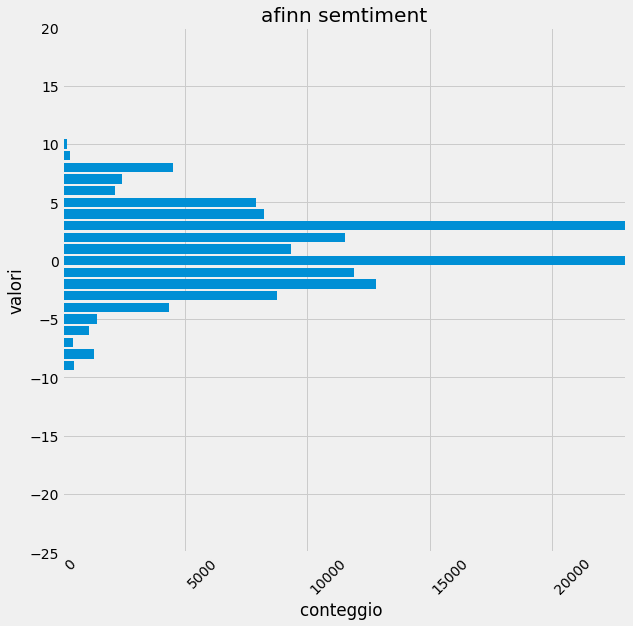

In [ ]:
fig, ax = plt.subplots(figsize=(9, 9))
ax.barh(df_value_counts['valori'], df_value_counts['counts'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='left')
ax.set(xlim=[0, 23000], ylim=[-25,20],xlabel='conteggio ', ylabel='valori',
       title='afinn semtiment')

In [ ]:
_7_nov_unito_biden_FIN['afinn'] = _7_nov_unito_biden_FIN['Text_clean_3'].apply(afinn.score)
_7_nov_unito_biden_FIN.afinn.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


 0.0     151426
 3.0      44644
 2.0      35979
 4.0      33394
 1.0      31225
 5.0      14901
-1.0      11379
 6.0      10677
-2.0       9583
 7.0       7463
-3.0       6519
-4.0       4775
-5.0       3869
-6.0       2710
 8.0       2421
 9.0       1290
 10.0       756
-7.0        566
-8.0        434
-9.0        389
 11.0       309
-11.0       302
 13.0       174
 12.0       156
 16.0        55
 15.0        55
-16.0        55
 14.0        50
-12.0        50
-10.0        49
 17.0        13
-15.0        11
-13.0         9
-14.0         8
 18.0         7
 19.0         4
-26.0         2
 22.0         2
-22.0         2
 20.0         2
-17.0         2
 46.0         1
Name: afinn, dtype: int64

[(-30.0, 30.0),
 Text(0, 0.5, 'valori'),
 (0.0, 35000.0),
 Text(0.5, 0, 'conteggio '),
 Text(0.5, 1.0, 'afinn semtiment BIDEN')]

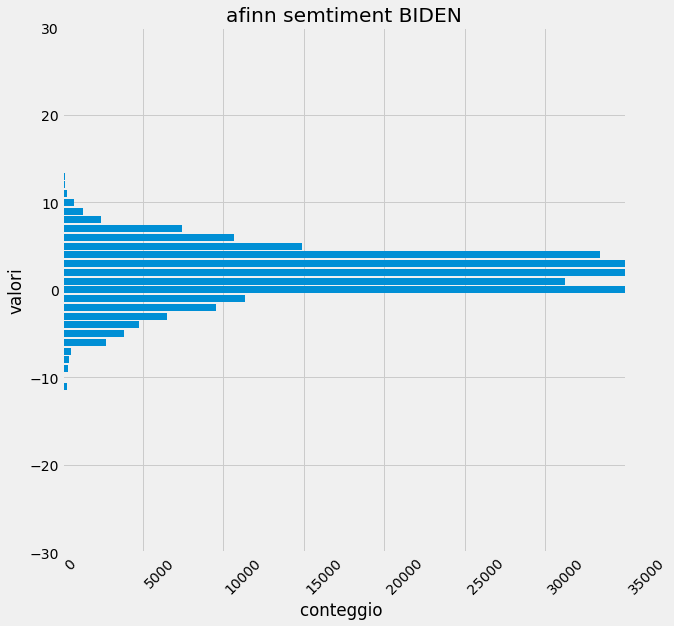

In [ ]:
df_value_counts1 = pd.DataFrame(_7_nov_unito_biden_FIN.afinn.value_counts())
df_value_counts1 = df_value_counts1.reset_index()
df_value_counts1.columns = ['valori', 'counts']
fig, ax = plt.subplots(figsize=(9, 9))
ax.barh(df_value_counts1['valori'], df_value_counts1['counts'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='left')
ax.set(xlim=[0, 35000], ylim=[-30,30],xlabel='conteggio ', ylabel='valori',
       title='afinn semtiment BIDEN')

In [ ]:
Estremi_positivi=_7_nov_unito_trump_FIN[_7_nov_unito_trump_FIN['afinn'] > 15].head()
Estremi_positivi2=Estremi_positivi[['afinn','Text','Text_clean_1']]
Estremi_positivi2

,afinn,Text,Text_clean_1
138103,20.0,trump: but-\nbiden and us: I'M WINNING YEAH YE...,"[('trump', 'NN'), ('nbiden', 'JJ'), ('u', 'NN'..."
181646,19.0,PHILADELPHIA I LOVE YOU THANK YOU FOR THE AMAZ...,"[('philadelphia', 'NN'), ('love', 'NN'), ('tha..."
22399,20.0,trump: but-\nbiden and us: I'M WINNING YEAH YE...,"[('trump', 'NN'), ('nbiden', 'JJ'), ('u', 'NN'..."
321035,19.0,PHILADELPHIA I LOVE YOU THANK YOU FOR THE AMAZ...,"[('philadelphia', 'NN'), ('love', 'NN'), ('tha..."


In [ ]:
Estremi_negativi=_7_nov_unito_trump_FIN[_7_nov_unito_trump_FIN['afinn'] <-6].head()
Estremi_negativi2=Estremi_negativi[['afinn','Text','Text_clean_1']]
Estremi_negativi2

,afinn,Text,Text_clean_1
32019,-9.0,@realDonaldTrump .....Loser ....Loser ......Lo...,"[('@realdonaldtrump', 'NN'), ('loser', 'RBR'),..."
33850,-7.0,"USA:\nThanks for not stopping the count, but f...","[('usa', 'JJ'), (':\\', 'NNP'), ('nthanks', 'N..."
35553,-7.0,@realDonaldTrump FUCK YOU GET READY FOR PRISON...,"[('@realdonaldtrump', 'NN'), ('fuck', 'NN'), (..."
36280,-8.0,RT @RolyUnGashaa: Pack your shit @realDonaldTr...,"[('@rolyungashaa', 'JJ'), ('pack', 'NN'), ('sh..."
37481,-7.0,"All politicians are lying, corrupt and full of...","[('politician', 'JJ'), ('lying', 'VBG'), ('cor..."


In [ ]:
Estremi_positivi5=_7_nov_unito_biden_FIN[_7_nov_unito_biden_FIN['afinn'] > 10].head()
Estremi_positivi6=Estremi_positivi5[['afinn','Text','Text_clean_1']]
Estremi_positivi6

,afinn,Text,Text_clean_1
37073,12.0,RT @AdityaPawaskar: Biden/Harris win PA and NV...,"[('@adityapawaskar', 'JJ'), ('biden', 'NN'), (..."
38065,11.0,"Congratulations, @JoeBiden and @KamalaHarris. ...","[('congratulation', 'NN'), ('@joebiden', 'NNP'..."
38218,13.0,RT @DarwinBondGraha: Even the ambulance is hon...,"[('@darwinbondgraha', 'RB'), ('even', 'RB'), (..."
38575,11.0,RT @LaylaMoran: The very best of luck to @JoeB...,"[('@laylamoran', 'NN'), ('best', 'JJS'), ('luc..."
40469,13.0,RT @DarwinBondGraha: Even the ambulance is hon...,"[('@darwinbondgraha', 'RB'), ('even', 'RB'), (..."


In [ ]:
Estremi_negativi3=_7_nov_unito_biden_FIN[_7_nov_unito_biden_FIN['afinn'] <-6].head()
Estremi_negativi4=Estremi_negativi3[['afinn','Text','Text_clean_1']]
Estremi_negativi4

,afinn,Text,Text_clean_1
33430,-9.0,#Election2020 FACT CHECK = FALSE. \n\nBiden is...,"[('#election2020', 'JJ'), ('fact', 'NN'), ('ch..."
33530,-7.0,Joe Biden has NOT won the Presidency so stop w...,"[('joe', 'NN'), ('biden', 'JJ'), ('presidency'..."
34275,-8.0,RT @OratorBlog: Biden and the Deep State Demon...,"[('@oratorblog', 'NN'), ('biden', 'JJ'), ('dee..."
35553,-7.0,@realDonaldTrump FUCK YOU GET READY FOR PRISON...,"[('@realdonaldtrump', 'NN'), ('fuck', 'NN'), (..."
37033,-10.0,Election fraud is a conspiracy THEORY and prob...,"[('election', 'NN'), ('fraud', 'NN'), ('conspi..."


In [ ]:
from tweepy import OAuthHandler 
from textblob import TextBlob 

In [ ]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [ ]:
_7_nov_unito_trump_FIN['Subjectivity'] = _7_nov_unito_trump_FIN['Text_clean_1'].apply(getTextSubjectivity)
_7_nov_unito_trump_FIN['Polarity'] = _6_nov_unito_trump_FIN['Text_clean_1'].apply(getTextPolarity)
_7_nov_unito_biden_FIN['Subjectivity'] = _7_nov_unito_biden_FIN['Text_clean_1'].apply(getTextSubjectivity)
_7_nov_unito_biden_FIN['Polarity'] = _7_nov_unito_biden_FIN['Text_clean_1'].apply(getTextPolarity)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
# negative, nautral, positive analysis
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

In [ ]:
_7_nov_unito_biden_FIN['Score'] = _6_nov_unito_biden_FIN['Polarity'].apply(getTextAnalysis)
_7_nov_unito_trump_FIN['Score'] = _6_nov_unito_trump_FIN['Polarity'].apply(getTextAnalysis)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print("[POSITIVE]")
positive_biden_7 = _7_nov_unito_biden_FIN[_7_nov_unito_biden_FIN['Score'] == 'Positive']
print(str(positive_biden_7.shape[0]/(_7_nov_unito_biden_FIN.shape[0])*100) + " % of positive tweets [BIDEN]")
positive_trump_7 = _7_nov_unito_trump_FIN[_7_nov_unito_trump_FIN['Score'] == 'Positive']
print(str(positive_trump_7.shape[0]/(_7_nov_unito_trump_FIN.shape[0])*100) + " % of positive tweets [TRUMP]")
print("\\\\\\\\\\")
print("[NEGATIVE]")
negative_biden_7 = _7_nov_unito_biden_FIN[_7_nov_unito_biden_FIN['Score'] == 'Negative']
print(str(negative_biden_7.shape[0]/(_7_nov_unito_biden_FIN.shape[0])*100) + " % of negative tweets [BIDEN]")
negative_trump_7 = _7_nov_unito_trump_FIN[_7_nov_unito_trump_FIN['Score'] == 'Negative']
print(str(negative_trump_7.shape[0]/(_7_nov_unito_trump_FIN.shape[0])*100) + " % of negative tweets [TRUMP]")
print("\\\\\\\\\\")
print("[NEUTRAL]")
neutral_biden_7 = _7_nov_unito_biden_FIN[_7_nov_unito_biden_FIN['Score'] == 'Neutral']
print(str(neutral_biden_7.shape[0]/(_7_nov_unito_biden_FIN.shape[0])*100) + " % of neutral tweets [BIDEN]")
neutral_trump_7 = _7_nov_unito_trump_FIN[_7_nov_unito_trump_FIN['Score'] == 'Neutral']
print(str(neutral_trump_7.shape[0]/(_7_nov_unito_trump_FIN.shape[0])*100) + " % of neutral tweets [TRUMP]")

[POSITIVE]
1.4908512153859852 % of positive tweets [BIDEN]
1.9694110668974036 % of positive tweets [TRUMP]
\\\\\
[NEGATIVE]
0.5624313655655477 % of negative tweets [BIDEN]
0.9868238806164716 % of negative tweets [TRUMP]
\\\\\
[NEUTRAL]
4.640800759801739 % of neutral tweets [BIDEN]
3.3701273941396743 % of neutral tweets [TRUMP]


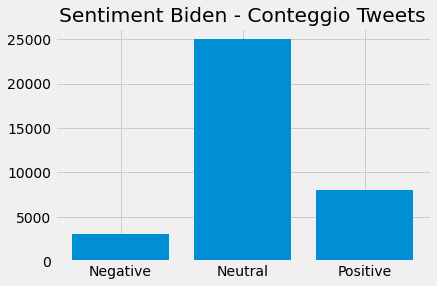

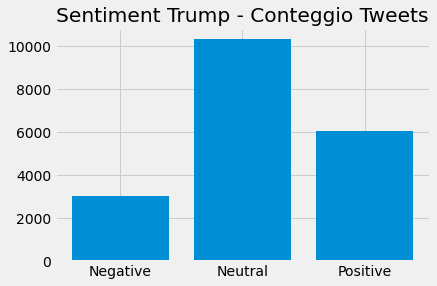

In [ ]:
labels_biden = _7_nov_unito_biden_FIN.groupby('Score').count().index.values
values_biden = _7_nov_unito_biden_FIN.groupby('Score').size().values
plt.bar(labels_biden, values_biden)
plt.title("Sentiment Biden - Conteggio Tweets")
plt.show()

labels_trump = _7_nov_unito_trump_FIN.groupby('Score').count().index.values
values_trump = _7_nov_unito_trump_FIN.groupby('Score').size().values
plt.bar(labels_trump, values_trump)
plt.title("Sentiment Trump - Conteggio Tweets")

plt.show()

In [ ]:
#lexicon

In [ ]:
import nltk
nltk.download('opinion_lexicon')
from nltk.corpus import opinion_lexicon

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


In [ ]:
pos_list=set(opinion_lexicon.positive())
neg_list=set(opinion_lexicon.negative())

In [ ]:
def sentiment_neg(sentence):
  total_sentiment = 0
  sentences = sentence.split(",")
  for s in sentences: 
    sentence_sentiment = 0
    sentence = [word.lower() for word in word_tokenize(s)] 
    

    for word in sentence:
      word = lemmatizer.lemmatize(word)

      if word in pos_list:
        sentence_sentiment += 1
      elif word in neg_list:
        sentence_sentiment -= 1

    if 'not' in sentence:
      sentence_sentiment = - sentence_sentiment
    total_sentiment += sentence_sentiment
  return total_sentiment

In [ ]:
_7_nov_unito_trump_FIN['Text_clean_3'] = _7_nov_unito_trump_FIN['Text_clean_3'].apply(str)
_7_nov_unito_biden_FIN['Text_clean_3'] = _7_nov_unito_biden_FIN['Text_clean_3'].apply(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
_7_nov_unito_trump_FIN['test1'] = _7_nov_unito_trump_FIN['Text_clean_3'].apply(sentiment_neg)
_7_nov_unito_trump_FIN.test1.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


 1    78136
 2    47273
 0    37581
 3    12054
-1     9459
-3     4712
-2     2875
 4     2334
 5      233
-4      182
 6       51
-5       39
 9        3
 7        3
-6        2
Name: test1, dtype: int64

[(-10.0, 20.0),
 Text(0, 0.5, 'valori'),
 (0.0, 50000.0),
 Text(0.5, 0, 'conteggio '),
 Text(0.5, 1.0, 'lexicon based approach semtiment')]

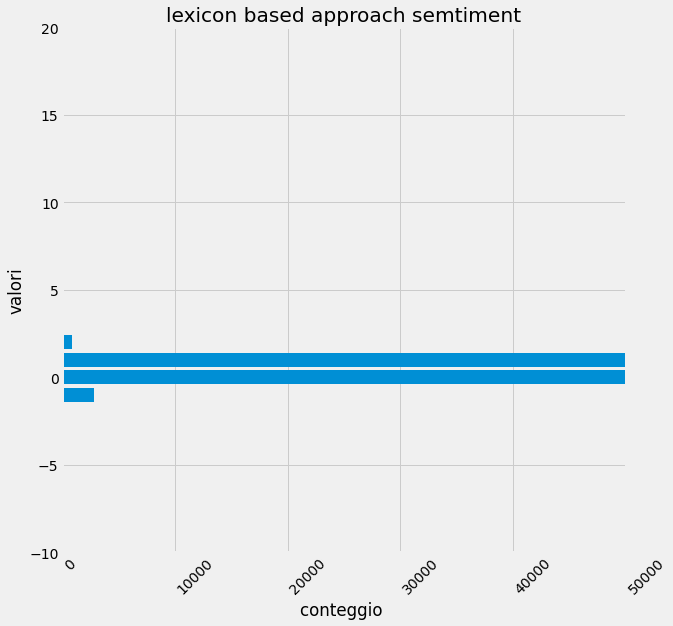

In [ ]:
df_value_counts3 = pd.DataFrame(_7_nov_unito_trump_FIN.test1.value_counts())
df_value_counts3 = df_value_counts3.reset_index()
df_value_counts3.columns = ['valori', 'counts']
fig, ax = plt.subplots(figsize=(9, 9))
ax.barh(df_value_counts3['valori'], df_value_counts3['counts'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='left')
ax.set(xlim=[0, 50000], ylim=[-10,20], xlabel='conteggio ', ylabel='valori',
       title='lexicon based approach semtiment')

In [ ]:
_7_nov_unito_biden_FIN['test1'] = _7_nov_unito_biden_FIN['Text_clean_3'].apply(sentiment_neg)
_7_nov_unito_biden_FIN.test1.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


 0     161962
 1      98436
 2      51648
-2      24862
-1      23858
 3      11792
 4       1686
-3       1020
-4        202
 5        190
-5         27
 6         25
 9          3
-6          2
-7          2
 7          2
 10         1
Name: test1, dtype: int64

[(-10.0, 20.0),
 Text(0, 0.5, 'valori'),
 (0.0, 50000.0),
 Text(0.5, 0, 'conteggio '),
 Text(0.5, 1.0, 'lexicon based approach semtiment')]

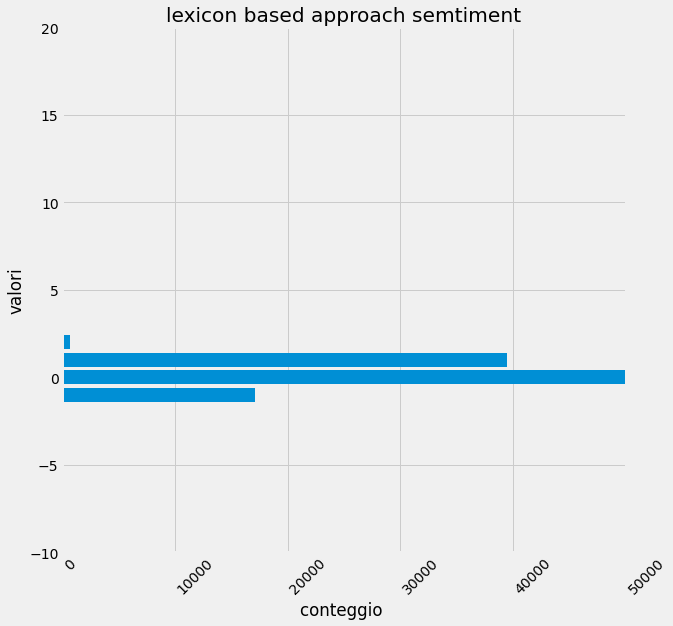

In [ ]:
df_value_counts4 = pd.DataFrame(_7_nov_unito_biden_FIN.test1.value_counts())
df_value_counts4 = df_value_counts4.reset_index()
df_value_counts4.columns = ['valori', 'counts']
fig, ax = plt.subplots(figsize=(9, 9))
ax.barh(df_value_counts4['valori'], df_value_counts4['counts'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='left')
ax.set(xlim=[0, 50000], ylim=[-10,20], xlabel='conteggio ', ylabel='valori',
       title='lexicon based approach semtiment')

In [ ]:
#media??

In [ ]:
#vader

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
scores = []
# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

scores_1 = []
# Declare variables for scores
compound_list_1 = []
positive_list_1 = []
negative_list_1 = []
neutral_list_1 = []

scores_2 = []
# Declare variables for scores
compound_list_2 = []
positive_list_2 = []
negative_list_2 = []
neutral_list_2 = []

scores_3 = []
# Declare variables for scores
compound_list_3 = []
positive_list_3 = []
negative_list_3 = []
neutral_list_3 = []

In [ ]:
_7_nov_unito_biden_FIN = _7_nov_unito_biden_FIN.reset_index(drop=True)
_7_nov_unito_trump_FIN = _7_nov_unito_trump_FIN.reset_index(drop=True)

In [ ]:
for i in range(_7_nov_unito_trump_FIN['Text_clean_2'].shape[0]):
    compound = analyzer.polarity_scores(_7_nov_unito_trump_FIN['Text'][i])["compound"]
    pos = analyzer.polarity_scores(_7_nov_unito_trump_FIN['Text'][i])["pos"]
    neu = analyzer.polarity_scores(_7_nov_unito_trump_FIN['Text'][i])["neu"]
    neg = analyzer.polarity_scores(_7_nov_unito_trump_FIN['Text'][i])["neg"]
    scores_1.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })
for i in range(_7_nov_unito_biden_FIN['Text_clean_2'].shape[0]):
    compound = analyzer.polarity_scores(_7_nov_unito_biden_FIN['Text'][i])["compound"]
    pos = analyzer.polarity_scores(_7_nov_unito_biden_FIN['Text'][i])["pos"]
    neu = analyzer.polarity_scores(_7_nov_unito_biden_FIN['Text'][i])["neu"]
    neg = analyzer.polarity_scores(_7_nov_unito_biden_FIN['Text'][i])["neg"]
    scores_2.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

In [ ]:
sentiments_score_2 = pd.DataFrame.from_dict(scores_1)
_7_nov_unito_trump_FIN = _7_nov_unito_trump_FIN.join(sentiments_score_2)
_7_nov_unito_trump_FIN.head()

,_id,Screen_name,Text,Followers,Date_time,Hashtags,Novembre,Text_clean_1,Text_clean_2,Match_parola_trump,hashtags,afinn,Subjectivity,Polarity,Score,test1,Compound,Positive,Negative,Neutral
0,"ObjectId(""5fa6e09483b78ae8b06e2f91"")",CyanPantera,RT @MrDCDouglas: Wesker weighs in. \n\nTrump i...,37,2020-11-07 17:59:43,NaN,7,"[('@mrdcdouglas', 'NNS'), ('wesker', 'VBP'), (...",: Wesker weighs in. \n\nTrump is done! Trumpis...,trump,NaN,-5.0,0.000000,0.45,Positive,0,-0.7088,0.115,0.297,0.588
1,"ObjectId(""5fa6e09483b78ae8b06e2f92"")",MailzDe,RT @ElieNYC: This is actually just an AMAZING ...,3,2020-11-07 17:59:43,NaN,7,"[('@elienyc', 'NNS'), ('actually', 'RB'), ('am...",: This is actually just an AMAZING tweet from ...,trump,NaN,6.0,0.900000,0.00,Neutral,0,0.6739,0.165,0.000,0.835
2,"ObjectId(""5fa6e09583b78ae8b06e2f9d"")",RJWolfe25,RT @Allibookgiraffe: When the Trump supporters...,33,2020-11-07 17:59:44,NaN,7,"[('@allibookgiraffe', 'JJ'), ('trump', 'NN'), ...",: When the Trump supporters say this election ...,trump,NaN,0.0,0.000000,0.45,Positive,0,0.1027,0.110,0.095,0.795
3,"ObjectId(""5fa6e09583b78ae8b06e2f9e"")",TheRealSweetT,RT @TheLeoTerrell: What will I be doing today?...,513,2020-11-07 17:59:44,NaN,7,"[('@theleoterrell', 'RB'), ('today', 'NN'), ('...",: What will I be doing today? Same thing I did...,trump,NaN,-1.0,0.304167,0.00,Neutral,0,-0.1027,0.000,0.065,0.935
4,"ObjectId(""5fa6e09583b78ae8b06e2fa3"")",Myrdraal90,RT @SepPietsmiet: Trump was ejected #Election2...,93,2020-11-07 17:59:44,NaN,7,"[('@seppietsmiet', 'JJ'), ('trump', 'NN'), ('e...",: Trump was ejected Election2020,trump,NaN,0.0,0.000000,0.00,Neutral,0,0.0000,0.000,0.000,1.000


In [ ]:
sentiments_score_2 = pd.DataFrame.from_dict(scores_2)
_7_nov_unito_biden_FIN = _7_nov_unito_biden_FIN.join(sentiments_score_2)
_7_nov_unito_biden_FIN.head()

,_id,Screen_name,Text,Followers,Date_time,Hashtags,Novembre,Text_clean_1,Text_clean_2,Match_parola_trump,Match_parola_biden,hashtags,afinn,Subjectivity,Polarity,Score,test1,Compound,Positive,Negative,Neutral
0,"ObjectId(""5fa6e09483b78ae8b06e2f8f"")",foolinred_,RT @thehill: #BREAKING: Sen. Kamala Harris cal...,494,2020-11-07 17:59:43,NaN,7,"[('@thehill', 'NN'), ('#breaking', 'VBG'), ('s...",: BREAKING: Sen. Kamala Harris calls Joe Biden...,NaN,biden,NaN,4.0,0.000000,0.000000,Neutral,-1,0.6239,0.157,0.0,0.843
1,"ObjectId(""5fa6e09483b78ae8b06e2f90"")",NikKirkham,RT @AkpraiseMedia: Jubilation continues in New...,336,2020-11-07 17:59:43,NaN,7,"[('@akpraisemedia', 'JJ'), ('jubilation', 'NN'...",: Jubilation continues in New York City after ...,NaN,biden,NaN,0.0,0.454545,0.136364,Positive,0,0.0000,0.000,0.0,1.000
2,"ObjectId(""5fa6e09483b78ae8b06e2f93"")",sawara_nishin_,RT @TomHourigan: The reaction of Van Jones to ...,249,2020-11-07 17:59:43,NaN,7,"[('@tomhourigan', 'JJ'), ('reaction', 'NN'), (...",: The reaction of Van Jones to the Joe Biden n...,NaN,biden,NaN,2.0,0.100000,0.300000,Positive,0,0.2263,0.087,0.0,0.913
3,"ObjectId(""5fa6e09483b78ae8b06e2f94"")",SheilaWyatt2,RT @TomHourigan: The reaction of Van Jones to ...,4,2020-11-07 17:59:43,NaN,7,"[('@tomhourigan', 'JJ'), ('reaction', 'NN'), (...",: The reaction of Van Jones to the Joe Biden n...,NaN,biden,NaN,2.0,0.100000,0.300000,Neutral,0,0.2263,0.087,0.0,0.913
4,"ObjectId(""5fa6e09583b78ae8b06e2f99"")",Real_Samaritan,RT @TPNobodysSafe: #SafeFam we did it! #kamala...,398,2020-11-07 17:59:43,NaN,7,"[('@tpnobodyssafe', 'JJ'), ('#safefam', 'NNP')...",: SafeFam we did it! kamalaharris joebiden ele...,NaN,biden,NaN,0.0,0.000000,0.000000,Neutral,0,0.0000,0.000,0.0,1.000


In [ ]:
tot_compound_trump_7_nov = _7_nov_unito_trump_FIN["Compound"].sum()
media_compound_trump_7_nov = tot_compound_trump_7_nov/len(_7_nov_unito_trump_FIN)
print("La media del COMPOUND di trump del 7 Novembre risulta: " + str(media_compound_trump_7_nov))

tot_Positive_trump_7_nov = _7_nov_unito_trump_FIN["Positive"].sum()
media_Positive_trump_7_nov = tot_Positive_trump_7_nov/len(_7_nov_unito_trump_FIN)
print("La media del POSITIVE di trump del 7 Novembre risulta: " + str(media_Positive_trump_7_nov))

tot_Negative_trump_7_nov = _7_nov_unito_trump_FIN["Negative"].sum()
media_Negative_trump_7_nov = tot_Negative_trump_7_nov/len(_7_nov_unito_trump_FIN)
print("La media del NEGATIVE di trump del 7 Novembre risulta: " + str(media_Negative_trump_7_nov))

tot_Neutral_trump_7_nov = _7_nov_unito_trump_FIN["Neutral"].sum()
media_Neutral_trump_7_nov = tot_Neutral_trump_7_nov/len(_7_nov_unito_trump_FIN)
print("La media del NEUTRAL di trump del 7 Novembre risulta: " + str(media_Neutral_trump_7_nov))

La media del COMPOUND di trump del 7 Novembre risulta: 0.04875974879661585
La media del POSITIVE di trump del 7 Novembre risulta: 0.08379253233738425
La media del NEGATIVE di trump del 7 Novembre risulta: 0.06079693849949324
La media del NEUTRAL di trump del 7 Novembre risulta: 0.8554132732374539


In [ ]:
tot_compound_biden_7_nov = _7_nov_unito_biden_FIN["Compound"].sum()
media_compound_biden_7_nov = tot_compound_biden_7_nov/len(_7_nov_unito_biden_FIN)
print("La media del COMPOUND di Biden del 7 Novembre risulta: " + str(media_compound_biden_7_nov))

tot_Positive_biden_7_nov = _7_nov_unito_biden_FIN["Positive"].sum()
media_Positive_biden_7_nov = tot_Positive_biden_7_nov/len(_7_nov_unito_biden_FIN)
print("La media del POSITIVE di Biden del 7 Novembre risulta: " + str(media_Positive_biden_7_nov))

tot_Negative_biden_7_nov = _7_nov_unito_biden_FIN["Negative"].sum()
media_Negative_biden_7_nov = tot_Negative_biden_7_nov/len(_7_nov_unito_biden_FIN)
print("La media del NEGATIVE di Biden del 7 Novembre risulta: " + str(media_Negative_biden_7_nov))

tot_Neutral_biden_7_nov = _7_nov_unito_biden_FIN["Neutral"].sum()
media_Neutral_biden_7_nov = tot_Neutral_biden_7_nov/len(_7_nov_unito_biden_FIN)
print("La media del NEUTRAL di Biden del 7 Novembre risulta: " + str(media_Neutral_biden_7_nov))

La media del COMPOUND di Biden del 7 Novembre risulta: 0.1852056959160656
La media del POSITIVE di Biden del 7 Novembre risulta: 0.10719688436767283
La media del NEGATIVE di Biden del 7 Novembre risulta: 0.03011138626717716
La media del NEUTRAL di Biden del 7 Novembre risulta: 0.8626935398302319


Text(0.5, 0.98, 'VADER TRUMP')

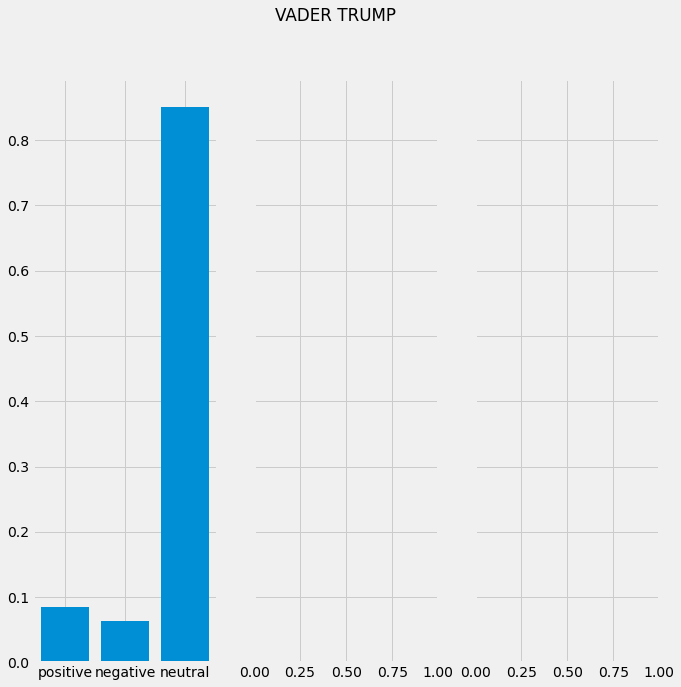

In [ ]:
results = {'positive':0.08379253233738425, 'negative':0.06079693849949324, 'neutral': 0.8554132732374539}
names = list(results.keys())
values = list(results.values())

fig, axs = plt.subplots(1, 3, figsize=(10, 10), sharey=True)
axs[0].bar(names, values)
fig.suptitle('VADER TRUMP')

Text(0.5, 0.98, 'VADER BIDEN')

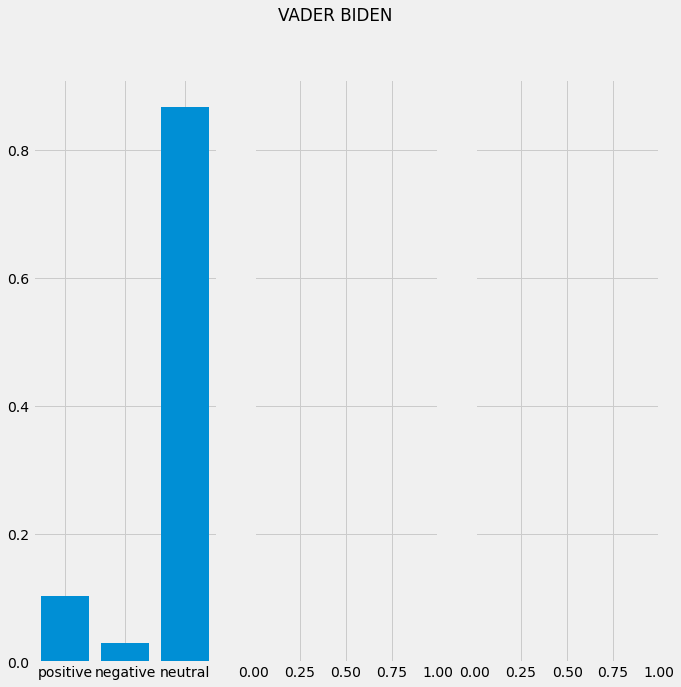

In [ ]:
results = {'positive': 0.10322605879765318, 'negative':0.029448654077517074, 'neutral':0.8673269274595744}
names = list(results.keys())
values = list(results.values())

fig, axs = plt.subplots(1, 3, figsize=(10, 10), sharey=True)
axs[0].bar(names, values)
fig.suptitle('VADER BIDEN')

# 8 NOVEMBRE 

In [ ]:
#POS TAGGING AND CHUNK 
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

def preprocess_pos_tag(sent):
    sent = nltk.pos_tag(sent)
    return sent
    
dataset_unico_8_nov["Text_clean_1"] = dataset_unico_8_nov['Text_clean_1'].apply(preprocess_pos_tag)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
dataset_unico_8_nov['Text_clean_1']=dataset_unico_8_nov['Text_clean_1'].apply(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dataset_unico_8_nov = dataset_unico_8_nov.explode("hashtags")

[Text(0, 0.5, 'Hashtag presente nel Tweet'),
 (0.0, 250000.0),
 Text(0.5, 0, 'Numero di Tweets'),
 Text(0.5, 1.0, 'HASHTAGS 8 NOVEMBRE')]

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 3617 missing from current font.
  font.set_text(s, 0, flags=flags)


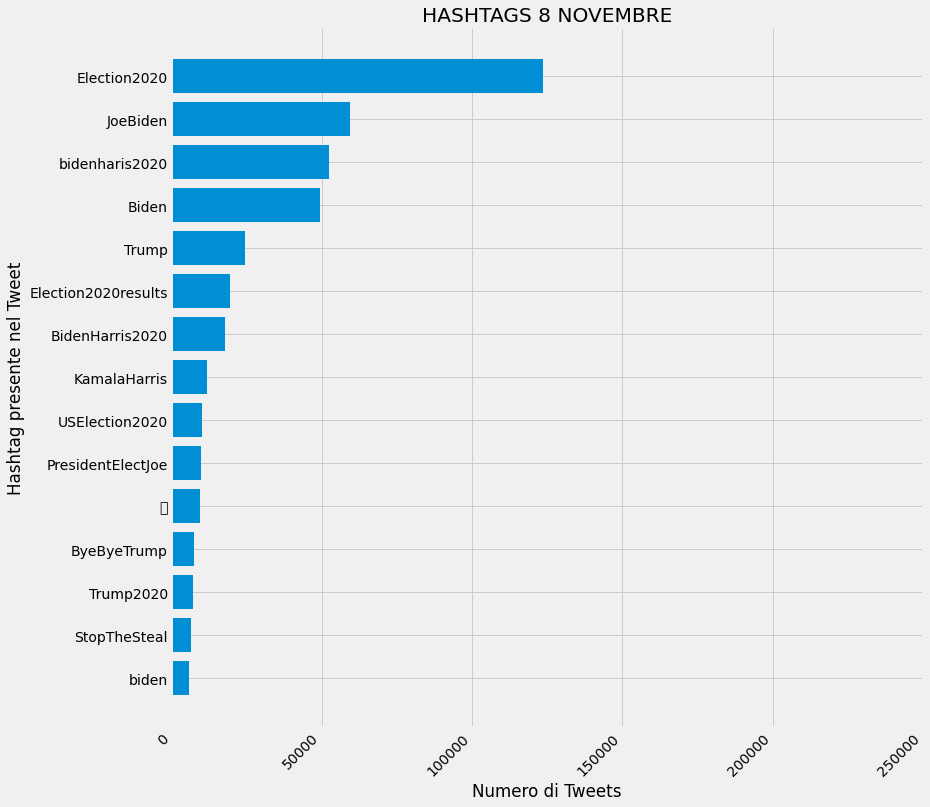

In [ ]:
#[PRESENZA DUPLICATI]
#Conteggio hashtag maggiormente presenti il 8 Novembre (di quelli raccolti):
conteggiogiorno_hashtags_8_nov = dataset_unico_8_nov.groupby('hashtags').size().reset_index(name='count')
conteggiogiorno_hashtags_8_nov = pd.DataFrame(conteggiogiorno_hashtags_8_nov).sort_values(by=['count'], ascending = True)
conteggiogiorno_hashtags_8_nov_top15 = conteggiogiorno_hashtags_8_nov.tail(15)

fig, ax = plt.subplots(figsize=(12, 12))
ax.barh(conteggiogiorno_hashtags_8_nov_top15['hashtags'], conteggiogiorno_hashtags_8_nov_top15['count'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[0, 250000], xlabel='Numero di Tweets', ylabel='Hashtag presente nel Tweet',
       title='HASHTAGS 8 NOVEMBRE')

In [ ]:
#[ESTRAZIONE TWEETS IN BASE AD HASHTAGS]
#COSTRUISCO I DATASETS DEL 8 NOVEMBRE CON TWEETS LEGATI A TRUMP E A BIDEN:
dataset_unico_8_nov_hashtags_trump = dataset_unico_8_nov.loc[(dataset_unico_8_nov['hashtags'] == "Trump") | (dataset_unico_8_nov['hashtags'] == "Trump2020" )]
print("Nel dataset con duplicati, tweets 8 Novembre e hashtags #Trump e #Trump2020, vi sono " + str(len(dataset_unico_8_nov_hashtags_trump.index)) + " tweets")
dataset_unico_8_nov_hashtags_biden = dataset_unico_8_nov.loc[(dataset_unico_8_nov['hashtags'] == "Biden") | (dataset_unico_8_nov['hashtags'] == "JoeBiden" ) | (dataset_unico_8_nov['hashtags'] == "BidenHarris2020" )]
print("Nel dataset con duplicati, tweets 8 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono " + str(len(dataset_unico_8_nov_hashtags_biden.index)) + " tweets")

dataset_unico_8_nov_hashtags_trump_nod = dataset_unico_8_nov_hashtags_trump.drop_duplicates(['_id'], keep="last")
print("[FINALE HASHTAGS] Nel dataset con tweets 8 Novembre e hashtags #Trump e #Trump2020, vi sono: " + str(len(dataset_unico_8_nov_hashtags_trump_nod.index)) + " tweets")
dataset_unico_8_nov_hashtags_biden_nod = dataset_unico_8_nov_hashtags_biden.drop_duplicates(['_id'], keep="last")
print("[FINALE HASHTAGS] Nel dataset con tweets 8 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono: " + str(len(dataset_unico_8_nov_hashtags_biden_nod.index)) + " tweets")

Nel dataset con duplicati, tweets 8 Novembre e hashtags #Trump e #Trump2020, vi sono 31753 tweets
Nel dataset con duplicati, tweets 8 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono 126920 tweets
[FINALE HASHTAGS] Nel dataset con tweets 8 Novembre e hashtags #Trump e #Trump2020, vi sono: 31187 tweets
[FINALE HASHTAGS] Nel dataset con tweets 8 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono: 119146 tweets


In [ ]:
#[ESTRAZIONE TWEETS IN BASE A PAROLE NEI TWEETS]
#Parole da utilizzare nel dataset di soliti tweets dove Trump viene citato nel testo:
parole_testo_trump =['Trump', 'Donald Trump', 'Trump2020', 'trump']

def matcherTrump(x):
    for i in parole_testo_trump:
        if i in x:
            return i
    else:
        return np.nan

#Parole da utilizzare nel dataset di soliti tweets dove Trump viene citato nel testo:
parole_testo_biden =['Biden', 'Joe Biden', 'Biden2020', 'BidenHarris2020', 'biden']

def matcherBiden(x):
    for i in parole_testo_biden:
        if i in x:
            return i
    else:
        return np.nan

#https://stackoverflow.com/questions/49073252/pandas-how-to-select-row-with-certain-word
#dataset_unico_8_nov_words_trump = dataset_unico_8_nov[dataset_unico_8_nov['Text_clean_1'].str.contains("Trump", regex=False, case=False, na=False)]
#TRUMP:
dataset_unico_8_nov['Match_parola_trump'] = dataset_unico_8_nov['Text_clean_1'].apply(matcherTrump)
dataset_unico_8_nov_words_trump = dataset_unico_8_nov.loc[(dataset_unico_8_nov['Match_parola_trump'] == "Trump") | (dataset_unico_8_nov['Match_parola_trump'] == "Donald Trump") | (dataset_unico_8_nov['Match_parola_trump'] == "Trump2020") | (dataset_unico_8_nov['Match_parola_trump'] == "trump")]
#Dataset nel quale sono contenuti i tweets dove sono contenute le parole riferite a trump nel testo:
dataset_unico_8_nov_words_trump_nod = dataset_unico_8_nov_words_trump.drop_duplicates(['_id'], keep="last")
dataset_unico_8_nov_words_trump_nod = remove_unwanted_cols(dataset_unico_8_nov_words_trump_nod, ["hashtags"])
print("[FINALE PAROLE] Nel dataset con tweets 8 Novembre e parole Trump, Donald Trump, trump e Trump2020, vi sono: " + str(len(dataset_unico_8_nov_words_trump_nod.index)) + " tweets")

#BIDEN:
dataset_unico_8_nov['Match_parola_biden'] = dataset_unico_8_nov['Text_clean_1'].apply(matcherBiden)
dataset_unico_8_nov_words_biden = dataset_unico_8_nov.loc[(dataset_unico_8_nov['Match_parola_biden'] == "Biden") | (dataset_unico_8_nov['Match_parola_biden'] == "Joe Biden") | (dataset_unico_8_nov['Match_parola_biden'] == "BidenHarris2020") | (dataset_unico_8_nov['Match_parola_biden'] == "biden") | (dataset_unico_8_nov['Match_parola_biden'] == "Biden2020")]
#Dataset nel quale sono contenuti i tweets dove sono contenute le parole riferite a trump nel testo:
dataset_unico_8_nov_words_biden_nod = dataset_unico_8_nov_words_biden.drop_duplicates(['_id'], keep="last")
dataset_unico_8_nov_words_biden_nod = remove_unwanted_cols(dataset_unico_8_nov_words_biden_nod, ["hashtags"])
print("[FINALE PAROLE] Nel dataset con tweets 8 Novembre e parole Biden, Joe Biden, biden, BidenHarris2020 e Biden2020, vi sono: " + str(len(dataset_unico_8_nov_words_biden_nod.index)) + " tweets")

[FINALE PAROLE] Nel dataset con tweets 8 Novembre e parole Trump, Donald Trump, trump e Trump2020, vi sono: 47016 tweets
[FINALE PAROLE] Nel dataset con tweets 8 Novembre e parole Biden, Joe Biden, biden, BidenHarris2020 e Biden2020, vi sono: 72002 tweets


In [ ]:
#UNIONE UNICO DATASET PER TRUMP E BIDEN CON I TWEETS CHE CONTENGONO HASHTAGS E PAROLE RIFERITI A LORO DUE:
#TRUMP
_8_nov_unito_trump = pd.concat([dataset_unico_8_nov_words_trump_nod, dataset_unico_8_nov_hashtags_trump_nod])
_8_nov_unito_trump_FIN = _8_nov_unito_trump.drop_duplicates(['_id'], keep="last")
print("Nel dataset finale relativo a Trump, del 8 Novembre, vi sono:" + str(len(_8_nov_unito_trump_FIN.index)) + " tweets")

#BIDEN:
_8_nov_unito_biden = pd.concat([dataset_unico_8_nov_words_biden_nod, dataset_unico_8_nov_hashtags_biden_nod])
_8_nov_unito_biden_FIN = _8_nov_unito_biden.drop_duplicates(['_id'], keep="last")
print("Nel dataset finale relativo a Biden, del 8 Novembre, vi sono:" + str(len(_8_nov_unito_biden_FIN.index)) + " tweets")

Nel dataset finale relativo a Trump, del 8 Novembre, vi sono:76462 tweets
Nel dataset finale relativo a Biden, del 8 Novembre, vi sono:184792 tweets


In [ ]:
pip install afinn

In [ ]:
from afinn import Afinn
afinn = Afinn()

In [ ]:
_8_nov_unito_trump_FIN['afinn'] = _8_nov_unito_trump_FIN['Text_clean_3'].apply(afinn.score)
_8_nov_unito_trump_FIN.afinn.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


 0.0     35373
 3.0      7089
 2.0      4989
 1.0      4141
-1.0      4076
-2.0      4008
-3.0      3268
 8.0      2291
 4.0      2206
 7.0      2100
 5.0      1633
-5.0      1478
-4.0      1469
-6.0       749
 6.0       488
-8.0       415
-7.0       233
-9.0       202
 9.0        84
-10.0       38
 10.0       30
-12.0       23
 11.0       19
 12.0       18
-11.0       15
 14.0        6
-24.0        4
-13.0        4
-15.0        3
-14.0        2
 13.0        2
 15.0        2
-16.0        1
-22.0        1
-17.0        1
 20.0        1
Name: afinn, dtype: int64

In [ ]:
df_value_counts = pd.DataFrame(_8_nov_unito_trump_FIN.afinn.value_counts())
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['valori', 'counts']

[(-25.0, 20.0),
 Text(0, 0.5, 'valori'),
 (0.0, 23000.0),
 Text(0.5, 0, 'conteggio '),
 Text(0.5, 1.0, 'afinn semtiment')]

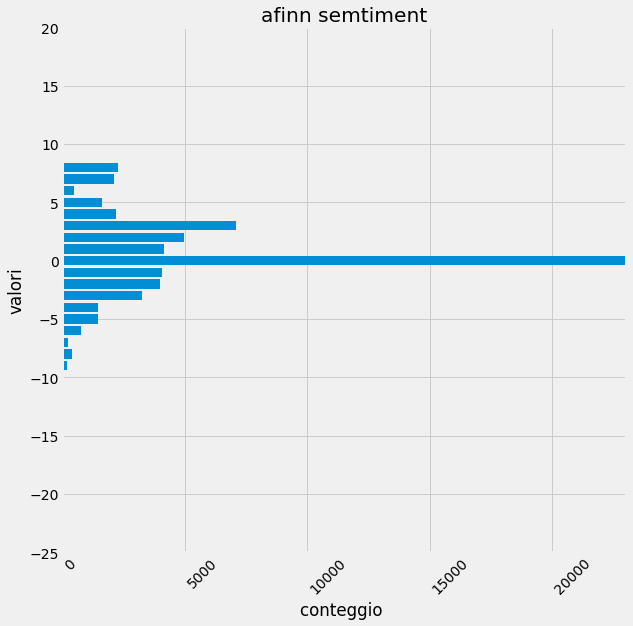

In [ ]:
fig, ax = plt.subplots(figsize=(9, 9))
ax.barh(df_value_counts['valori'], df_value_counts['counts'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='left')
ax.set(xlim=[0, 23000], ylim=[-25,20],xlabel='conteggio ', ylabel='valori',
       title='afinn semtiment')

In [ ]:
_8_nov_unito_biden_FIN['afinn'] = _8_nov_unito_biden_FIN['Text_clean_3'].apply(afinn.score)
_8_nov_unito_biden_FIN.afinn.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


 0.0     87027
 3.0     18215
 2.0     15734
-2.0     12109
 1.0      9703
 4.0      9067
-1.0      7380
 5.0      4234
 6.0      4227
 7.0      3910
-4.0      3664
-3.0      3604
-5.0      1962
 8.0      1008
-6.0       922
 9.0       578
-7.0       348
 10.0      236
-9.0       187
-8.0       168
 12.0      143
 11.0      124
-11.0       51
-10.0       51
-12.0       36
 13.0       32
 15.0       19
 14.0       19
 16.0       12
-14.0        9
-16.0        7
-17.0        2
-18.0        2
-13.0        1
 20.0        1
Name: afinn, dtype: int64

[(-30.0, 30.0),
 Text(0, 0.5, 'valori'),
 (0.0, 23000.0),
 Text(0.5, 0, 'conteggio '),
 Text(0.5, 1.0, 'afinn semtiment BIDEN')]

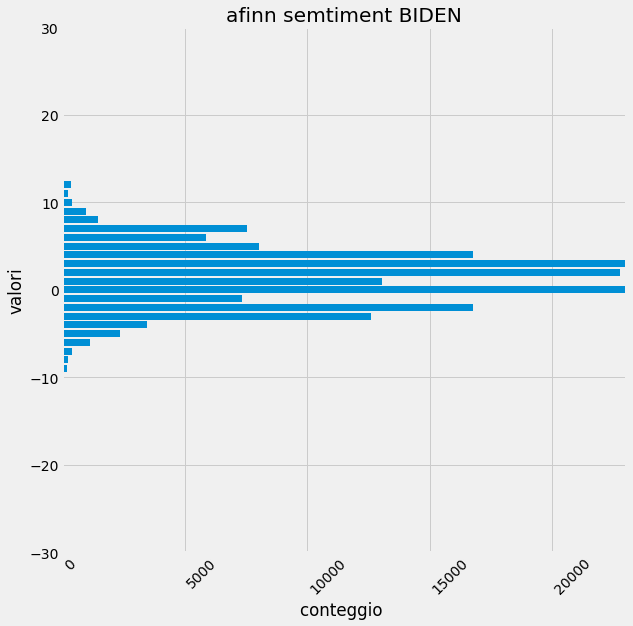

In [ ]:
df_value_counts1 = pd.DataFrame(_8_nov_unito_biden_FIN.afinn.value_counts())
df_value_counts1 = df_value_counts1.reset_index()
df_value_counts1.columns = ['valori', 'counts']
fig, ax = plt.subplots(figsize=(9, 9))
ax.barh(df_value_counts1['valori'], df_value_counts1['counts'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='left')
ax.set(xlim=[0, 23000], ylim=[-30,30],xlabel='conteggio ', ylabel='valori',
       title='afinn semtiment BIDEN')

In [ ]:
Estremi_positivi=_8_nov_unito_trump_FIN[_8_nov_unito_trump_FIN['afinn'] > 15].head()
Estremi_positivi2=Estremi_positivi[['afinn','Text','Text_clean_1']]
Estremi_positivi2

,afinn,Text,Text_clean_1
876414,20.0,America needed a win. Not the Trump kinda win....,"[('america', 'NN'), ('needed', 'VBN'), ('win',..."
328560,17.0,@realDonaldTrump YOU STILL LOST. HA HA HA HA H...,"[('@realdonaldtrump', 'NN'), ('still', 'RB'), ..."
328813,17.0,RT @RAyee63514287: @realDonaldTrump YOU STILL ...,"[('@rayee63514287', 'NN'), ('@realdonaldtrump'..."


In [ ]:
Estremi_negativi=_8_nov_unito_trump_FIN[_8_nov_unito_trump_FIN['afinn'] <-6].head()
Estremi_negativi2=Estremi_negativi[['afinn','Text','Text_clean_1']]
Estremi_negativi2

,afinn,Text,Text_clean_1
591107,-9.0,@realDonaldTrump https://t.co/wIYofTPMRc\n\nNo...,"[('@realdonaldtrump', 'NN'), ('https://t.co/wi..."
591183,-11.0,RT @zaddyzayn28: Lauren Jauregui falando you'r...,"[('@zaddyzayn28', 'JJ'), ('lauren', 'NNS'), ('..."
591679,-7.0,"For the next 72 hrs, the only response you giv...","[('next', 'JJ'), ('72', 'CD'), ('hr', 'JJ'), (..."
592012,-8.0,RT @w_terrence: The Democrats are demanding Pr...,"[('@w_terrence', 'NN'), ('democrat', 'NN'), ('..."
592398,-12.0,RT @marcKlock: .@JaeBass of @DETWILLBREATHE de...,"[('@marcklock', 'NN'), ('@jaebass', 'NN'), ('@..."


In [ ]:
Estremi_positivi5=_8_nov_unito_biden_FIN[_8_nov_unito_biden_FIN['afinn'] > 10].head()
Estremi_positivi6=Estremi_positivi5[['afinn','Text','Text_clean_1']]
Estremi_positivi6

,afinn,Text,Text_clean_1
591224,11.0,RT @AnastasiadesCY: Congratulations to my good...,"[('@anastasiadescy', 'JJ'), ('congratulation',..."
592404,11.0,It is my greatest honor to congratulates @JoeB...,"[('greatest', 'JJS'), ('honor', 'NN'), ('congr..."
592822,11.0,RT @TheSizzleReport: 🔥🔥WINNING: Joe Biden and ...,"[('@thesizzlereport', 'NN'), ('winning', 'VBG'..."
593706,12.0,4 days ago 😍 Wow wow wow\n#bidenharis2020 #Bye...,"[('4', 'CD'), ('day', 'NN'), ('ago', 'IN'), ('..."
594164,11.0,RT @AnastasiadesCY: Congratulations to my good...,"[('@anastasiadescy', 'JJ'), ('congratulation',..."


In [ ]:
Estremi_negativi3=_8_nov_unito_biden_FIN[_8_nov_unito_biden_FIN['afinn'] <-6].head()
Estremi_negativi4=Estremi_negativi[['afinn','Text','Text_clean_1']]
Estremi_negativi4

,afinn,Text,Text_clean_1
591107,-9.0,@realDonaldTrump https://t.co/wIYofTPMRc\n\nNo...,"[('@realdonaldtrump', 'NN'), ('https://t.co/wi..."
591183,-11.0,RT @zaddyzayn28: Lauren Jauregui falando you'r...,"[('@zaddyzayn28', 'JJ'), ('lauren', 'NNS'), ('..."
591679,-7.0,"For the next 72 hrs, the only response you giv...","[('next', 'JJ'), ('72', 'CD'), ('hr', 'JJ'), (..."
592012,-8.0,RT @w_terrence: The Democrats are demanding Pr...,"[('@w_terrence', 'NN'), ('democrat', 'NN'), ('..."
592398,-12.0,RT @marcKlock: .@JaeBass of @DETWILLBREATHE de...,"[('@marcklock', 'NN'), ('@jaebass', 'NN'), ('@..."


In [ ]:
from tweepy import OAuthHandler 
from textblob import TextBlob 

In [ ]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [ ]:
_8_nov_unito_trump_FIN['Subjectivity'] = _8_nov_unito_trump_FIN['Text_clean_1'].apply(getTextSubjectivity)
_8_nov_unito_trump_FIN['Polarity'] = _8_nov_unito_trump_FIN['Text_clean_1'].apply(getTextPolarity)
_8_nov_unito_biden_FIN['Subjectivity'] = _8_nov_unito_biden_FIN['Text_clean_1'].apply(getTextSubjectivity)
_8_nov_unito_biden_FIN['Polarity'] = _8_nov_unito_biden_FIN['Text_clean_1'].apply(getTextPolarity)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
# negative, nautral, positive analysis
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

In [ ]:
_8_nov_unito_biden_FIN['Score'] = _8_nov_unito_biden_FIN['Polarity'].apply(getTextAnalysis)
_8_nov_unito_trump_FIN['Score'] = _8_nov_unito_trump_FIN['Polarity'].apply(getTextAnalysis)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print("[POSITIVE]")
positive_biden_8 = _8_nov_unito_biden_FIN[_8_nov_unito_biden_FIN['Score'] == 'Positive']
print(str(positive_biden_8.shape[0]/(_8_nov_unito_biden_FIN.shape[0])*100) + " % of positive tweets [BIDEN]")
positive_trump_8 = _8_nov_unito_trump_FIN[_8_nov_unito_trump_FIN['Score'] == 'Positive']
print(str(positive_trump_8.shape[0]/(_8_nov_unito_trump_FIN.shape[0])*100) + " % of positive tweets [TRUMP]")
print("\\\\\\\\\\")
print("[NEGATIVE]")
negative_biden_8 = _8_nov_unito_biden_FIN[_8_nov_unito_biden_FIN['Score'] == 'Negative']
print(str(negative_biden_8.shape[0]/(_8_nov_unito_biden_FIN.shape[0])*100) + " % of negative tweets [BIDEN]")
negative_trump_8 = _8_nov_unito_trump_FIN[_8_nov_unito_trump_FIN['Score'] == 'Negative']
print(str(negative_trump_8.shape[0]/(_8_nov_unito_trump_FIN.shape[0])*100) + " % of negative tweets [TRUMP]")
print("\\\\\\\\\\")
print("[NEUTRAL]")
neutral_biden_8 = _8_nov_unito_biden_FIN[_8_nov_unito_biden_FIN['Score'] == 'Neutral']
print(str(neutral_biden_8.shape[0]/(_8_nov_unito_biden_FIN.shape[0])*100) + " % of neutral tweets [BIDEN]")
neutral_trump_8 = _8_nov_unito_trump_FIN[_8_nov_unito_trump_FIN['Score'] == 'Neutral']
print(str(neutral_trump_8.shape[0]/(_8_nov_unito_trump_FIN.shape[0])*100) + " % of neutral tweets [TRUMP]")

[POSITIVE]
28.471674409092234 % of positive tweets [BIDEN]
27.72882425732296 % of positive tweets [TRUMP]
\\\\\
[NEGATIVE]
11.537309726239519 % of negative tweets [BIDEN]
15.199029972842562 % of negative tweets [TRUMP]
\\\\\
[NEUTRAL]
59.99101586466824 % of neutral tweets [BIDEN]
57.07214576983448 % of neutral tweets [TRUMP]


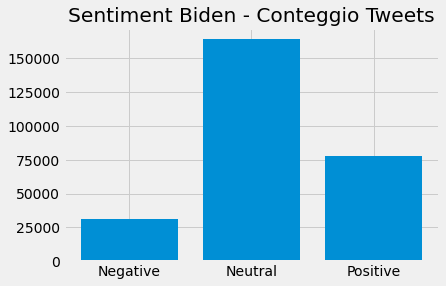

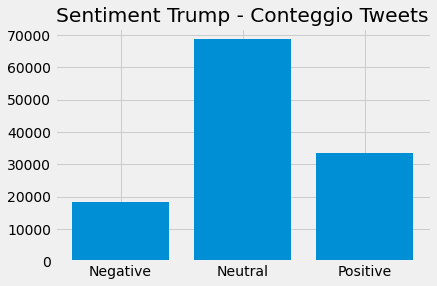

In [ ]:
labels_biden = _8_nov_unito_biden_FIN.groupby('Score').count().index.values
values_biden = _8_nov_unito_biden_FIN.groupby('Score').size().values
plt.bar(labels_biden, values_biden)
plt.title("Sentiment Biden - Conteggio Tweets")
plt.show()

labels_trump = _8_nov_unito_trump_FIN.groupby('Score').count().index.values
values_trump = _8_nov_unito_trump_FIN.groupby('Score').size().values
plt.bar(labels_trump, values_trump)
plt.title("Sentiment Trump - Conteggio Tweets")

plt.show()

In [ ]:
#lexicon

In [ ]:
import nltk
nltk.download('opinion_lexicon')
from nltk.corpus import opinion_lexicon

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


In [ ]:
pos_list=set(opinion_lexicon.positive())
neg_list=set(opinion_lexicon.negative())

In [ ]:
def sentiment_neg(sentence):
  total_sentiment = 0
  sentences = sentence.split(",")
  for s in sentences: 
    sentence_sentiment = 0
    sentence = [word.lower() for word in word_tokenize(s)] 
    

    for word in sentence:
      word = lemmatizer.lemmatize(word)

      if word in pos_list:
        sentence_sentiment += 1
      elif word in neg_list:
        sentence_sentiment -= 1

    if 'not' in sentence:
      sentence_sentiment = - sentence_sentiment
    total_sentiment += sentence_sentiment
  return total_sentiment

In [ ]:
_8_nov_unito_trump_FIN['Text_clean_3'] = _8_nov_unito_trump_FIN['Text_clean_3'].apply(str)
_8_nov_unito_biden_FIN['Text_clean_3'] = _8_nov_unito_biden_FIN['Text_clean_3'].apply(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
_8_nov_unito_trump_FIN['test1'] = _8_nov_unito_trump_FIN['Text_clean_3'].apply(sentiment_neg)
_8_nov_unito_trump_FIN.test1.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


 1    28519
 0    22157
 2    12977
 3     4613
-1     4221
-3     2206
-2     1190
 4      412
 5       89
-4       58
-5        7
 6        6
-7        4
-6        3
Name: test1, dtype: int64

[(-10.0, 20.0),
 Text(0, 0.5, 'valori'),
 (0.0, 50000.0),
 Text(0.5, 0, 'conteggio '),
 Text(0.5, 1.0, 'lexicon based approach semtiment')]

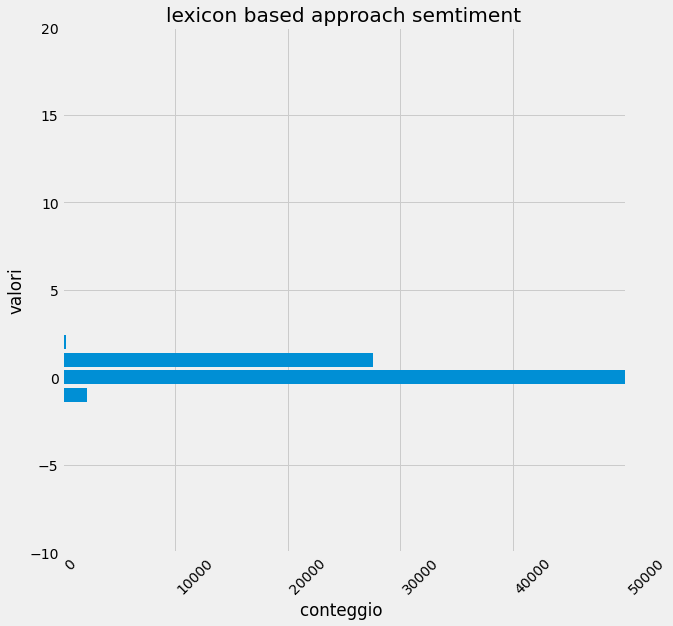

In [ ]:
df_value_counts3 = pd.DataFrame(_8_nov_unito_trump_FIN.test1.value_counts())
df_value_counts3 = df_value_counts3.reset_index()
df_value_counts3.columns = ['valori', 'counts']
fig, ax = plt.subplots(figsize=(9, 9))
ax.barh(df_value_counts3['valori'], df_value_counts3['counts'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='left')
ax.set(xlim=[0, 50000], ylim=[-10,20], xlabel='conteggio ', ylabel='valori',
       title='lexicon based approach semtiment')

In [ ]:
_8_nov_unito_biden_FIN['test1'] = _8_nov_unito_biden_FIN['Text_clean_3'].apply(sentiment_neg)
_8_nov_unito_biden_FIN.test1.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


 0    91707
 1    44123
 2    16131
-1    15408
-2    12643
 3     3532
 4      646
-3      413
-4      106
 5       66
 6       11
-5        3
-6        2
 7        1
Name: test1, dtype: int64

[(-10.0, 20.0),
 Text(0, 0.5, 'valori'),
 (0.0, 50000.0),
 Text(0.5, 0, 'conteggio '),
 Text(0.5, 1.0, 'lexicon based approach semtiment')]

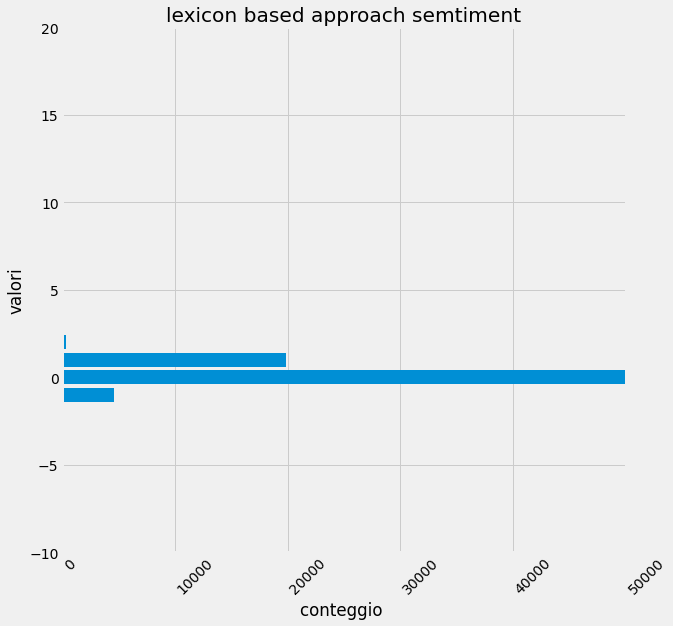

In [ ]:
df_value_counts4 = pd.DataFrame(_8_nov_unito_biden_FIN.test1.value_counts())
df_value_counts4 = df_value_counts4.reset_index()
df_value_counts4.columns = ['valori', 'counts']
fig, ax = plt.subplots(figsize=(9, 9))
ax.barh(df_value_counts4['valori'], df_value_counts4['counts'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='left')
ax.set(xlim=[0, 50000], ylim=[-10,20], xlabel='conteggio ', ylabel='valori',
       title='lexicon based approach semtiment')

In [ ]:
#vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
scores = []
# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

scores_1 = []
# Declare variables for scores
compound_list_1 = []
positive_list_1 = []
negative_list_1 = []
neutral_list_1 = []

scores_2 = []
# Declare variables for scores
compound_list_2 = []
positive_list_2 = []
negative_list_2 = []
neutral_list_2 = []

scores_3 = []
# Declare variables for scores
compound_list_3 = []
positive_list_3 = []
negative_list_3 = []
neutral_list_3 = []

In [ ]:
_8_nov_unito_biden_FIN = _8_nov_unito_biden_FIN.reset_index(drop=True)
_8_nov_unito_trump_FIN = _8_nov_unito_trump_FIN.reset_index(drop=True)

In [ ]:
for i in range(_8_nov_unito_trump_FIN['Text_clean_2'].shape[0]):
    compound = analyzer.polarity_scores(_8_nov_unito_trump_FIN['Text'][i])["compound"]
    pos = analyzer.polarity_scores(_8_nov_unito_trump_FIN['Text'][i])["pos"]
    neu = analyzer.polarity_scores(_8_nov_unito_trump_FIN['Text'][i])["neu"]
    neg = analyzer.polarity_scores(_8_nov_unito_trump_FIN['Text'][i])["neg"]
    scores_1.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })
for i in range(_8_nov_unito_biden_FIN['Text_clean_2'].shape[0]):
    compound = analyzer.polarity_scores(_8_nov_unito_biden_FIN['Text'][i])["compound"]
    pos = analyzer.polarity_scores(_8_nov_unito_biden_FIN['Text'][i])["pos"]
    neu = analyzer.polarity_scores(_8_nov_unito_biden_FIN['Text'][i])["neu"]
    neg = analyzer.polarity_scores(_8_nov_unito_biden_FIN['Text'][i])["neg"]
    scores_2.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

In [ ]:
sentiments_score_2 = pd.DataFrame.from_dict(scores_1)
_8_nov_unito_trump_FIN = _8_nov_unito_trump_FIN.join(sentiments_score_2)
_8_nov_unito_trump_FIN.head()

,_id,Screen_name,Text,Followers,Date_time,Hashtags,Novembre,Text_clean_1,Text_clean_2,Match_parola_trump,hashtags,afinn,Subjectivity,Polarity,Score,test1,Compound,Positive,Negative,Neutral
0,"ObjectId(""5fa7350583b78ae8b076b7a1"")",DavidSIAHawkeye,RT @JoeTalkShow: Hey #GOP @GOP -- the 70+ mill...,5715,2020-11-08 00:00:00,NaN,8,"[('@joetalkshow', 'NN'), ('hey', 'NN'), ('#gop...",: Hey GOP -- the 70+ million Americans who vo...,trump,NaN,0.0,0.0,0.0,Neutral,0,0.0000,0.000,0.000,1.000
1,"ObjectId(""5fa7350583b78ae8b076b7a9"")",benboron,RT @ladygaga: . @realDonaldTrump please conced...,68830,2020-11-08 00:00:00,NaN,8,"[('@ladygaga', 'JJ'), ('@realdonaldtrump', 'NN...",: . please concede. I know you can see how A...,trump,NaN,-1.0,0.0,0.0,Neutral,0,-0.4939,0.089,0.213,0.698
2,"ObjectId(""5fa7350683b78ae8b076b7b1"")",jbjk216,RT @w_terrence: President Trump Won! He had 71...,13,2020-11-08 00:00:00,NaN,8,"[('@w_terrence', 'NN'), ('president', 'NN'), (...",: President Trump Won! He had 71 million legal...,trump,NaN,2.0,0.2,0.2,Positive,0,0.9143,0.428,0.000,0.572
3,"ObjectId(""5fa7350683b78ae8b076b7b8"")",sukamaklumat,RT @9NewsAUS: #BREAKING: Democrat Joe Biden ha...,488,2020-11-08 00:00:01,NaN,8,"[('@9newsaus', 'NN'), ('#breaking', 'VBG'), ('...",: BREAKING: Democrat Joe Biden has defeated Pr...,trump,NaN,-1.0,0.0,0.0,Neutral,-1,-0.0772,0.112,0.124,0.763
4,"ObjectId(""5fa7350683b78ae8b076b7b9"")",Jerusalem_Post,Before the #Election2020 was called Donald Tru...,486646,2020-11-08 00:00:01,NaN,8,"[('#election2020', 'NN'), ('called', 'VBN'), (...",Before the Election2020 was called Donald Trum...,trump,NaN,-6.0,0.0,0.0,Neutral,0,-0.7184,0.000,0.273,0.727


In [ ]:
sentiments_score_2 = pd.DataFrame.from_dict(scores_2)
_8_nov_unito_biden_FIN = _8_nov_unito_biden_FIN.join(sentiments_score_2)
_8_nov_unito_biden_FIN.head()

,_id,Screen_name,Text,Followers,Date_time,Hashtags,Novembre,Text_clean_1,Text_clean_2,Match_parola_trump,Match_parola_biden,hashtags,afinn,Subjectivity,Polarity,Score,test1,Compound,Positive,Negative,Neutral
0,"ObjectId(""5fa7350583b78ae8b076b7a4"")",Advocates_OMI,WATCH: Get to know the president-elect of the ...,1378,2020-11-08 00:00:00,NaN,8,"[('watch', 'NN'), ('get', 'NN'), ('know', 'JJ'...",WATCH: Get to know the president-elect of the ...,NaN,biden,NaN,1.0,0.0,0.0,Neutral,0,0.4215,0.128,0.000,0.872
1,"ObjectId(""5fa7350583b78ae8b076b7a8"")",APublicLifePH,WATCH: Get to know the president-elect of the ...,118,2020-11-08 00:00:00,NaN,8,"[('watch', 'NN'), ('get', 'NN'), ('know', 'JJ'...",WATCH: Get to know the president-elect of the ...,NaN,biden,NaN,1.0,0.0,0.0,Neutral,0,0.4215,0.128,0.000,0.872
2,"ObjectId(""5fa7350683b78ae8b076b7b0"")",JimMaso02236687,#Pennsylvania mailman says he was ordered to c...,1540,2020-11-08 00:00:00,NaN,8,"[('#pennsylvania', 'JJ'), ('mailman', 'NNS'), ...",Pennsylvania mailman says he was ordered to co...,NaN,biden,NaN,0.0,0.6,-0.3,Negative,0,0.0000,0.000,0.000,1.000
3,"ObjectId(""5fa7350683b78ae8b076b7b7"")",LML96_,RT @Redbridge_YL: Huge congratulations @JoeBid...,1688,2020-11-08 00:00:01,NaN,8,"[('@redbridge_yl', 'JJ'), ('huge', 'JJ'), ('co...",: Huge congratulations and ! Election2020,NaN,biden,NaN,3.0,0.9,0.4,Positive,0,0.7574,0.481,0.000,0.519
4,"ObjectId(""5fa7350683b78ae8b076b7b8"")",sukamaklumat,RT @9NewsAUS: #BREAKING: Democrat Joe Biden ha...,488,2020-11-08 00:00:01,NaN,8,"[('@9newsaus', 'NN'), ('#breaking', 'VBG'), ('...",: BREAKING: Democrat Joe Biden has defeated Pr...,trump,biden,NaN,-1.0,0.0,0.0,Neutral,-1,-0.0772,0.112,0.124,0.763


In [ ]:
tot_compound_trump_8_nov = _8_nov_unito_trump_FIN["Compound"].sum()
media_compound_trump_8_nov = tot_compound_trump_8_nov/len(_8_nov_unito_trump_FIN)
print("La media del COMPOUND di trump del 8 Novembre risulta: " + str(media_compound_trump_8_nov))

tot_Positive_trump_8_nov = _8_nov_unito_trump_FIN["Positive"].sum()
media_Positive_trump_8_nov = tot_Positive_trump_8_nov/len(_8_nov_unito_trump_FIN)
print("La media del POSITIVE di trump del 8 Novembre risulta: " + str(media_Positive_trump_8_nov))

tot_Negative_trump_8_nov = _8_nov_unito_trump_FIN["Negative"].sum()
media_Negative_trump_8_nov = tot_Negative_trump_8_nov/len(_8_nov_unito_trump_FIN)
print("La media del NEGATIVE di trump del 8 Novembre risulta: " + str(media_Negative_trump_8_nov))

tot_Neutral_trump_8_nov = _8_nov_unito_trump_FIN["Neutral"].sum()
media_Neutral_trump_8_nov = tot_Neutral_trump_8_nov/len(_8_nov_unito_trump_FIN)
print("La media del NEUTRAL di trump del 8 Novembre risulta: " + str(media_Neutral_trump_8_nov))

La media del COMPOUND di trump del 8 Novembre risulta: 0.06557312327151625
La media del POSITIVE di trump del 8 Novembre risulta: 0.08127640790970775
La media del NEGATIVE di trump del 8 Novembre risulta: 0.05989957561311861
La media del NEUTRAL di trump del 8 Novembre risulta: 0.8588348047072893


In [ ]:
tot_compound_biden_8_nov = _8_nov_unito_biden_FIN["Compound"].sum()
media_compound_biden_8_nov = tot_compound_biden_8_nov/len(_8_nov_unito_biden_FIN)
print("La media del COMPOUND di Biden del 8 Novembre risulta: " + str(media_compound_biden_8_nov))

tot_Positive_biden_8_nov = _8_nov_unito_biden_FIN["Positive"].sum()
media_Positive_biden_8_nov = tot_Positive_biden_8_nov/len(_8_nov_unito_biden_FIN)
print("La media del POSITIVE di Biden del 8 Novembre risulta: " + str(media_Positive_biden_8_nov))

tot_Negative_biden_8_nov = _8_nov_unito_biden_FIN["Negative"].sum()
media_Negative_biden_8_nov = tot_Negative_biden_8_nov/len(_8_nov_unito_biden_FIN)
print("La media del NEGATIVE di Biden del 8 Novembre risulta: " + str(media_Negative_biden_8_nov))

tot_Neutral_biden_8_nov = _8_nov_unito_biden_FIN["Neutral"].sum()
media_Neutral_biden_8_nov = tot_Neutral_biden_8_nov/len(_8_nov_unito_biden_FIN)
print("La media del NEUTRAL di Biden del 8 Novembre risulta: " + str(media_Neutral_biden_8_nov))

La media del COMPOUND di Biden del 8 Novembre risulta: 0.13345433502790194
La media del POSITIVE di Biden del 8 Novembre risulta: 0.09376625544161044
La media del NEGATIVE di Biden del 8 Novembre risulta: 0.0361444291056768
La media del NEUTRAL di Biden del 8 Novembre risulta: 0.8700898230928801


Text(0.5, 0.98, 'VADER TRUMP')

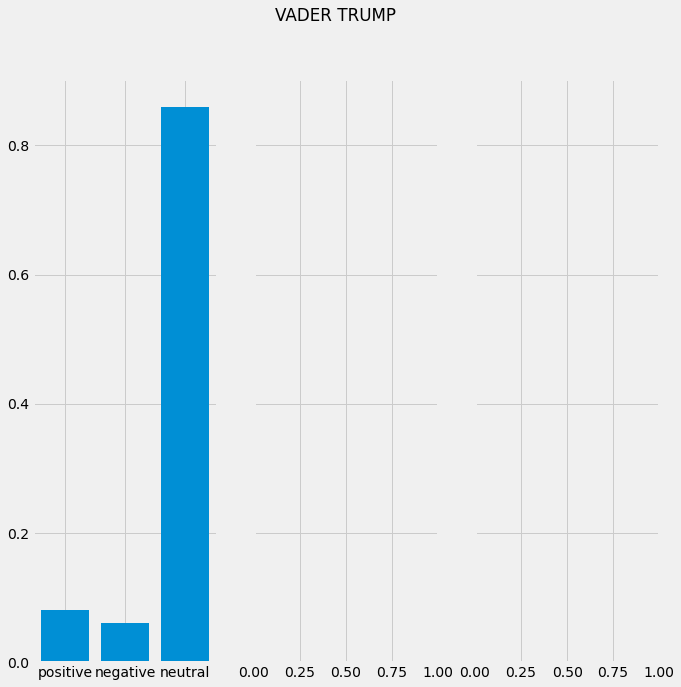

In [ ]:
results = {'positive'0.08127640790970775, 'negative':0.05989957561311861, 'neutral': 0.8588348047072893}
names = list(results.keys())
values = list(results.values())

fig, axs = plt.subplots(1, 3, figsize=(10, 10), sharey=True)
axs[0].bar(names, values)
fig.suptitle('VADER TRUMP')

Text(0.5, 0.98, 'VADER BIDEN')

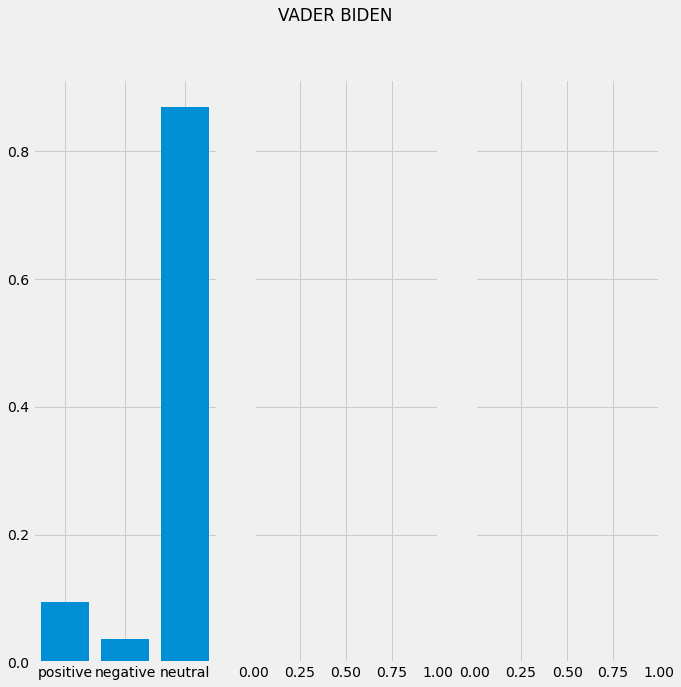

In [ ]:
results = {'positive': 0.09413993248848285, 'negative':0.036165815381565276, 'neutral':0.869695165152788}
names = list(results.keys())
values = list(results.values())

fig, axs = plt.subplots(1, 3, figsize=(10, 10), sharey=True)
axs[0].bar(names, values)
fig.suptitle('VADER BIDEN')

# 9 NOVEMBRE 

In [ ]:
#POS TAGGING AND CHUNK 
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

def preprocess_pos_tag(sent):
    sent = nltk.pos_tag(sent)
    return sent
    
dataset_unico_9_nov["Text_clean_1"] = dataset_unico_9_nov['Text_clean_1'].apply(preprocess_pos_tag)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
dataset_unico_9_nov['Text_clean_1']=dataset_unico_9_nov['Text_clean_1'].apply(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dataset_unico_9_nov = dataset_unico_9_nov.explode("hashtags")

[Text(0, 0.5, 'Hashtag presente nel Tweet'),
 (0.0, 10000.0),
 Text(0.5, 0, 'Numero di Tweets'),
 Text(0.5, 1.0, 'HASHTAGS 9 NOVEMBRE')]

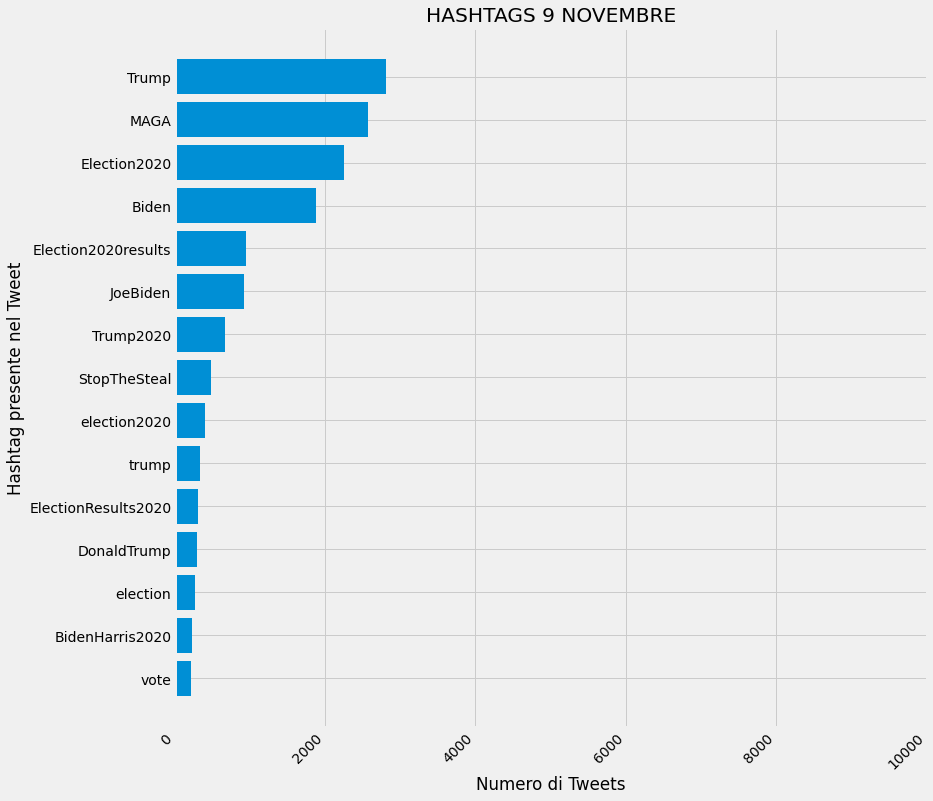

In [ ]:
#[PRESENZA DUPLICATI]
#Conteggio hashtag maggiormente presenti il 8 Novembre (di quelli raccolti):
conteggiogiorno_hashtags_9_nov = dataset_unico_9_nov.groupby('hashtags').size().reset_index(name='count')
conteggiogiorno_hashtags_9_nov = pd.DataFrame(conteggiogiorno_hashtags_9_nov).sort_values(by=['count'], ascending = True)
conteggiogiorno_hashtags_9_nov_top15 = conteggiogiorno_hashtags_9_nov.tail(15)

fig, ax = plt.subplots(figsize=(12, 12))
ax.barh(conteggiogiorno_hashtags_9_nov_top15['hashtags'], conteggiogiorno_hashtags_9_nov_top15['count'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[0, 10000], xlabel='Numero di Tweets', ylabel='Hashtag presente nel Tweet',
       title='HASHTAGS 9 NOVEMBRE')

In [ ]:
#[ESTRAZIONE TWEETS IN BASE AD HASHTAGS]
#COSTRUISCO I DATASETS DEL 9 NOVEMBRE CON TWEETS LEGATI A TRUMP E A BIDEN:
dataset_unico_9_nov_hashtags_trump = dataset_unico_9_nov.loc[(dataset_unico_9_nov['hashtags'] == "Trump") | (dataset_unico_9_nov['hashtags'] == "Trump2020" )]
print("Nel dataset con duplicati, tweets 9 Novembre e hashtags #Trump e #Trump2020, vi sono " + str(len(dataset_unico_9_nov_hashtags_trump.index)) + " tweets")
dataset_unico_9_nov_hashtags_biden = dataset_unico_9_nov.loc[(dataset_unico_9_nov['hashtags'] == "Biden") | (dataset_unico_9_nov['hashtags'] == "JoeBiden" ) | (dataset_unico_9_nov['hashtags'] == "BidenHarris2020" )]
print("Nel dataset con duplicati, tweets 9 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono " + str(len(dataset_unico_9_nov_hashtags_biden.index)) + " tweets")

dataset_unico_9_nov_hashtags_trump_nod = dataset_unico_9_nov_hashtags_trump.drop_duplicates(['_id'], keep="last")
print("[FINALE HASHTAGS] Nel dataset con tweets 9 Novembre e hashtags #Trump e #Trump2020, vi sono: " + str(len(dataset_unico_9_nov_hashtags_trump_nod.index)) + " tweets")
dataset_unico_9_nov_hashtags_biden_nod = dataset_unico_9_nov_hashtags_biden.drop_duplicates(['_id'], keep="last")
print("[FINALE HASHTAGS] Nel dataset con tweets 9 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono: " + str(len(dataset_unico_9_nov_hashtags_biden_nod.index)) + " tweets")

Nel dataset con duplicati, tweets 9 Novembre e hashtags #Trump e #Trump2020, vi sono 3482 tweets
Nel dataset con duplicati, tweets 9 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono 3025 tweets
[FINALE HASHTAGS] Nel dataset con tweets 9 Novembre e hashtags #Trump e #Trump2020, vi sono: 3277 tweets
[FINALE HASHTAGS] Nel dataset con tweets 9 Novembre e hashtags #Biden, #JoeBiden e #BidenHarris2020, vi sono: 2916 tweets


In [ ]:
#[ESTRAZIONE TWEETS IN BASE A PAROLE NEI TWEETS]
#Parole da utilizzare nel dataset di soliti tweets dove Trump viene citato nel testo:
parole_testo_trump =['Trump', 'Donald Trump', 'Trump2020', 'trump']

def matcherTrump(x):
    for i in parole_testo_trump:
        if i in x:
            return i
    else:
        return np.nan

#Parole da utilizzare nel dataset di soliti tweets dove Trump viene citato nel testo:
parole_testo_biden =['Biden', 'Joe Biden', 'Biden2020', 'BidenHarris2020', 'biden']

def matcherBiden(x):
    for i in parole_testo_biden:
        if i in x:
            return i
    else:
        return np.nan

#https://stackoverflow.com/questions/49073252/pandas-how-to-select-row-with-certain-word
#dataset_unico_8_nov_words_trump = dataset_unico_8_nov[dataset_unico_8_nov['Text_clean_1'].str.contains("Trump", regex=False, case=False, na=False)]
#TRUMP:
dataset_unico_9_nov['Match_parola_trump'] = dataset_unico_9_nov['Text_clean_1'].apply(matcherTrump)
dataset_unico_9_nov_words_trump = dataset_unico_9_nov.loc[(dataset_unico_9_nov['Match_parola_trump'] == "Trump") | (dataset_unico_9_nov['Match_parola_trump'] == "Donald Trump") | (dataset_unico_9_nov['Match_parola_trump'] == "Trump2020") | (dataset_unico_9_nov['Match_parola_trump'] == "trump")]
#Dataset nel quale sono contenuti i tweets dove sono contenute le parole riferite a trump nel testo:
dataset_unico_9_nov_words_trump_nod = dataset_unico_9_nov_words_trump.drop_duplicates(['_id'], keep="last")
dataset_unico_9_nov_words_trump_nod = remove_unwanted_cols(dataset_unico_9_nov_words_trump_nod, ["hashtags"])
print("[FINALE PAROLE] Nel dataset con tweets 9 Novembre e parole Trump, Donald Trump, trump e Trump2020, vi sono: " + str(len(dataset_unico_9_nov_words_trump_nod.index)) + " tweets")

#BIDEN:
dataset_unico_9_nov['Match_parola_biden'] = dataset_unico_9_nov['Text_clean_1'].apply(matcherBiden)
dataset_unico_9_nov_words_biden = dataset_unico_9_nov.loc[(dataset_unico_9_nov['Match_parola_biden'] == "Biden") | (dataset_unico_9_nov['Match_parola_biden'] == "Joe Biden") | (dataset_unico_9_nov['Match_parola_biden'] == "BidenHarris2020") | (dataset_unico_9_nov['Match_parola_biden'] == "biden") | (dataset_unico_9_nov['Match_parola_biden'] == "Biden2020")]
#Dataset nel quale sono contenuti i tweets dove sono contenute le parole riferite a trump nel testo:
dataset_unico_9_nov_words_biden_nod = dataset_unico_9_nov_words_biden.drop_duplicates(['_id'], keep="last")
dataset_unico_9_nov_words_biden_nod = remove_unwanted_cols(dataset_unico_9_nov_words_biden_nod, ["hashtags"])
print("[FINALE PAROLE] Nel dataset con tweets 9 Novembre e parole Biden, Joe Biden, biden, BidenHarris2020 e Biden2020, vi sono: " + str(len(dataset_unico_9_nov_words_biden_nod.index)) + " tweets")

[FINALE PAROLE] Nel dataset con tweets 9 Novembre e parole Trump, Donald Trump, trump e Trump2020, vi sono: 2650 tweets
[FINALE PAROLE] Nel dataset con tweets 9 Novembre e parole Biden, Joe Biden, biden, BidenHarris2020 e Biden2020, vi sono: 2329 tweets


In [ ]:
#UNIONE UNICO DATASET PER TRUMP E BIDEN CON I TWEETS CHE CONTENGONO HASHTAGS E PAROLE RIFERITI A LORO DUE:
#TRUMP
_9_nov_unito_trump = pd.concat([dataset_unico_9_nov_words_trump_nod, dataset_unico_9_nov_hashtags_trump_nod])
_9_nov_unito_trump_FIN = _9_nov_unito_trump.drop_duplicates(['_id'], keep="last")
print("Nel dataset finale relativo a Trump, del 9 Novembre, vi sono:" + str(len(_9_nov_unito_trump_FIN.index)) + " tweets")

#BIDEN:
_9_nov_unito_biden = pd.concat([dataset_unico_9_nov_words_biden_nod, dataset_unico_9_nov_hashtags_biden_nod])
_9_nov_unito_biden_FIN = _9_nov_unito_biden.drop_duplicates(['_id'], keep="last")
print("Nel dataset finale relativo a Biden, del 9 Novembre, vi sono:" + str(len(_9_nov_unito_biden_FIN.index)) + " tweets")

Nel dataset finale relativo a Trump, del 9 Novembre, vi sono:5771 tweets
Nel dataset finale relativo a Biden, del 9 Novembre, vi sono:4767 tweets


In [ ]:
pip install afinn

In [ ]:
from afinn import Afinn
afinn = Afinn()

In [ ]:
_9_nov_unito_trump_FIN['afinn'] = _9_nov_unito_trump_FIN['Text_clean_3'].apply(afinn.score)
_9_nov_unito_trump_FIN.afinn.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


 0.0     2308
-2.0      510
 3.0      423
 1.0      410
 2.0      405
-3.0      321
-1.0      321
 5.0      204
 4.0      200
-4.0      177
-7.0       93
-5.0       87
 6.0       84
-6.0       68
 7.0       42
 8.0       40
-8.0       31
-10.0      14
-9.0        7
-12.0       7
 9.0        5
 12.0       5
 11.0       3
 10.0       3
-11.0       2
-13.0       1
Name: afinn, dtype: int64

In [ ]:
df_value_counts = pd.DataFrame(_9_nov_unito_trump_FIN.afinn.value_counts())
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['valori', 'counts']

[(-25.0, 20.0),
 Text(0, 0.5, 'valori'),
 (0.0, 10000.0),
 Text(0.5, 0, 'conteggio '),
 Text(0.5, 1.0, 'afinn semtiment')]

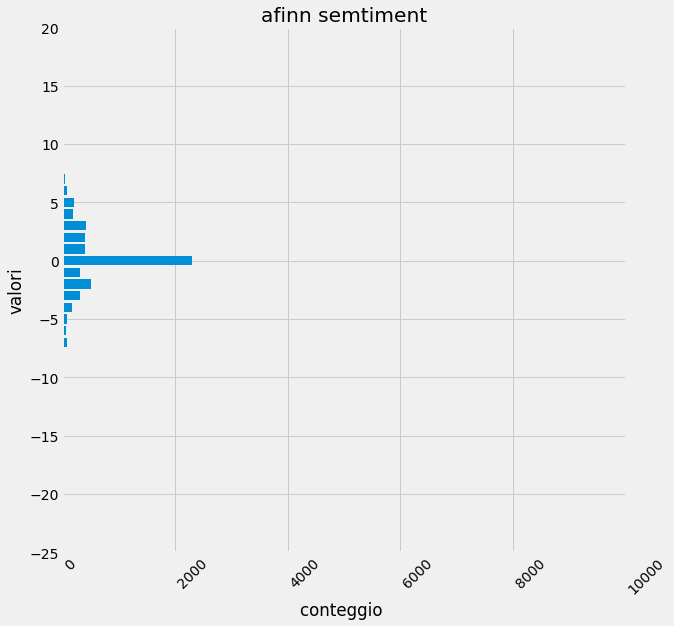

In [ ]:
fig, ax = plt.subplots(figsize=(9, 9))
ax.barh(df_value_counts['valori'], df_value_counts['counts'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='left')
ax.set(xlim=[0, 10000], ylim=[-25,20],xlabel='conteggio ', ylabel='valori',
       title='afinn semtiment')

In [ ]:
_9_nov_unito_biden_FIN['afinn'] = _9_nov_unito_biden_FIN['Text_clean_3'].apply(afinn.score)
_9_nov_unito_biden_FIN.afinn.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


 0.0     1837
 2.0      424
 3.0      423
-2.0      422
-3.0      394
 1.0      305
 4.0      206
-1.0      187
 6.0      131
-5.0       92
-4.0       89
 5.0       74
-7.0       38
 8.0       37
 7.0       35
-6.0       31
 11.0      15
-8.0        8
 9.0        7
 10.0       4
-9.0        3
 12.0       2
-12.0       1
 13.0       1
-10.0       1
Name: afinn, dtype: int64

[(-30.0, 30.0),
 Text(0, 0.5, 'valori'),
 (0.0, 10000.0),
 Text(0.5, 0, 'conteggio '),
 Text(0.5, 1.0, 'afinn semtiment BIDEN')]

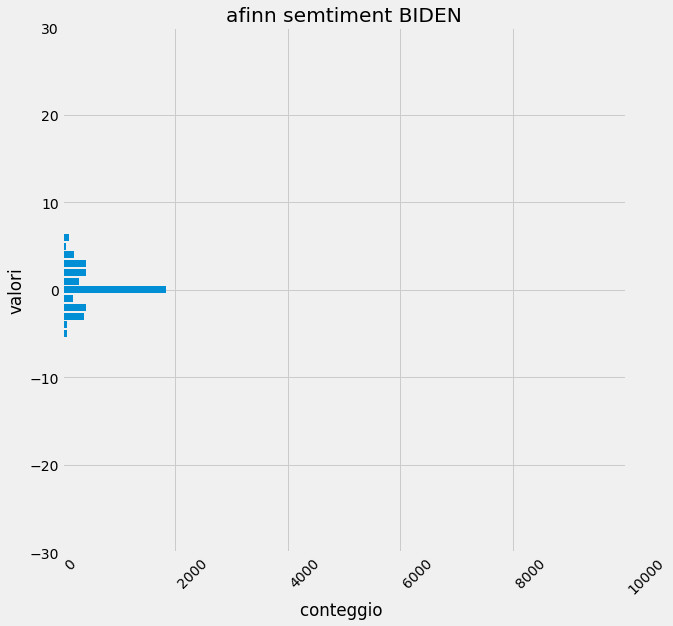

In [ ]:
df_value_counts1 = pd.DataFrame(_9_nov_unito_biden_FIN.afinn.value_counts())
df_value_counts1 = df_value_counts1.reset_index()
df_value_counts1.columns = ['valori', 'counts']
fig, ax = plt.subplots(figsize=(9, 9))
ax.barh(df_value_counts1['valori'], df_value_counts1['counts'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='left')
ax.set(xlim=[0, 10000], ylim=[-30,30],xlabel='conteggio ', ylabel='valori',
       title='afinn semtiment BIDEN')

In [ ]:
Estremi_positivi=_9_nov_unito_trump_FIN[_9_nov_unito_trump_FIN['afinn'] > 15].head()
Estremi_positivi2=Estremi_positivi[['afinn','Text','Text_clean_1']]
Estremi_positivi2

,afinn,Text,Text_clean_1


In [ ]:
Estremi_negativi=_9_nov_unito_trump_FIN[_9_nov_unito_trump_FIN['afinn'] <-6].head()
Estremi_negativi2=Estremi_negativi[['afinn','Text','Text_clean_1']]
Estremi_negativi2

,afinn,Text,Text_clean_1
7,-7.0,RT @W7VOA: Nearly instant warning attached by ...,"[('@w7voa', 'RB'), ('nearly', 'RB'), ('instant..."
10,-7.0,RT @W7VOA: Nearly instant warning attached by ...,"[('@w7voa', 'RB'), ('nearly', 'RB'), ('instant..."
158,-7.0,"...- At a loss,Trump supporters don’t destroy ...","[('loss', 'NN'), ('trump', 'NN'), ('supporter'..."
587,-10.0,RT @PunisherPatrio1: There's a reason Trump si...,"[('@punisherpatrio1', 'JJ'), (""there's"", 'NN')..."
612,-7.0,RT @W7VOA: Nearly instant warning attached by ...,"[('@w7voa', 'RB'), ('nearly', 'RB'), ('instant..."


In [ ]:
Estremi_positivi5=_9_nov_unito_biden_FIN[_9_nov_unito_biden_FIN['afinn'] > 10].head()
Estremi_positivi6=Estremi_positivi5[['afinn','Text','Text_clean_1']]
Estremi_positivi6

,afinn,Text,Text_clean_1
7922,11.0,Johnson says Biden win offers exciting chance ...,"[('johnson', 'NN'), ('say', 'VBP'), ('biden', ..."
8924,13.0,RT @BelTel: Biden will be 'powerful ally' of G...,"[('@beltel', 'NN'), ('biden', 'NN'), ('powerfu..."
13350,11.0,RT @AlexWitzleben: Johnson says Biden win offe...,"[('@alexwitzleben', 'JJ'), ('johnson', 'NN'), ..."
19484,18.0,Hope finally we can hope again \nAmerica IS gr...,"[('hope', 'NN'), ('finally', 'RB'), ('hope', '..."
22933,12.0,RT @thehill: LAST NIGHT: President-elect Joe B...,"[('@thehill', 'NN'), ('last', 'JJ'), ('night',..."


In [ ]:
Estremi_negativi3=_9_nov_unito_biden_FIN[_9_nov_unito_biden_FIN['afinn'] <-6].head()
Estremi_negativi4=Estremi_negativi[['afinn','Text','Text_clean_1']]
Estremi_negativi4

,afinn,Text,Text_clean_1
7,-7.0,RT @W7VOA: Nearly instant warning attached by ...,"[('@w7voa', 'RB'), ('nearly', 'RB'), ('instant..."
10,-7.0,RT @W7VOA: Nearly instant warning attached by ...,"[('@w7voa', 'RB'), ('nearly', 'RB'), ('instant..."
158,-7.0,"...- At a loss,Trump supporters don’t destroy ...","[('loss', 'NN'), ('trump', 'NN'), ('supporter'..."
587,-10.0,RT @PunisherPatrio1: There's a reason Trump si...,"[('@punisherpatrio1', 'JJ'), (""there's"", 'NN')..."
612,-7.0,RT @W7VOA: Nearly instant warning attached by ...,"[('@w7voa', 'RB'), ('nearly', 'RB'), ('instant..."


In [ ]:
from tweepy import OAuthHandler 
from textblob import TextBlob 

In [ ]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [ ]:
_9_nov_unito_trump_FIN['Subjectivity'] = _9_nov_unito_trump_FIN['Text_clean_1'].apply(getTextSubjectivity)
_9_nov_unito_trump_FIN['Polarity'] = _9_nov_unito_trump_FIN['Text_clean_1'].apply(getTextPolarity)
_9_nov_unito_biden_FIN['Subjectivity'] = _9_nov_unito_biden_FIN['Text_clean_1'].apply(getTextSubjectivity)
_9_nov_unito_biden_FIN['Polarity'] = _9_nov_unito_biden_FIN['Text_clean_1'].apply(getTextPolarity)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
# negative, nautral, positive analysis
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

In [ ]:
_9_nov_unito_biden_FIN['Score'] = _9_nov_unito_biden_FIN['Polarity'].apply(getTextAnalysis)
_9_nov_unito_trump_FIN['Score'] = _9_nov_unito_trump_FIN['Polarity'].apply(getTextAnalysis)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print("[POSITIVE]")
positive_biden_9 = _9_nov_unito_biden_FIN[_9_nov_unito_biden_FIN['Score'] == 'Positive']
print(str(positive_biden_9.shape[0]/(_9_nov_unito_biden_FIN.shape[0])*100) + " % of positive tweets [BIDEN]")
positive_trump_9 = _9_nov_unito_trump_FIN[_9_nov_unito_trump_FIN['Score'] == 'Positive']
print(str(positive_trump_9.shape[0]/(_9_nov_unito_trump_FIN.shape[0])*100) + " % of positive tweets [TRUMP]")
print("\\\\\\\\\\")
print("[NEGATIVE]")
negative_biden_9 = _9_nov_unito_biden_FIN[_9_nov_unito_biden_FIN['Score'] == 'Negative']
print(str(negative_biden_9.shape[0]/(_9_nov_unito_biden_FIN.shape[0])*100) + " % of negative tweets [BIDEN]")
negative_trump_9 = _9_nov_unito_trump_FIN[_9_nov_unito_trump_FIN['Score'] == 'Negative']
print(str(negative_trump_9.shape[0]/(_9_nov_unito_trump_FIN.shape[0])*100) + " % of negative tweets [TRUMP]")
print("\\\\\\\\\\")
print("[NEUTRAL]")
neutral_biden_9 = _9_nov_unito_biden_FIN[_9_nov_unito_biden_FIN['Score'] == 'Neutral']
print(str(neutral_biden_9.shape[0]/(_9_nov_unito_biden_FIN.shape[0])*100) + " % of neutral tweets [BIDEN]")
neutral_trump_9 = _9_nov_unito_trump_FIN[_9_nov_unito_trump_FIN['Score'] == 'Neutral']
print(str(neutral_trump_9.shape[0]/(_9_nov_unito_trump_FIN.shape[0])*100) + " % of neutral tweets [TRUMP]")

[POSITIVE]
33.21162089220511 % of positive tweets [BIDEN]
34.98952409458246 % of positive tweets [TRUMP]
\\\\\
[NEGATIVE]
12.351166851881251 % of negative tweets [BIDEN]
12.97016861219196 % of negative tweets [TRUMP]
\\\\\
[NEUTRAL]
54.437212255913636 % of neutral tweets [BIDEN]
52.04030729322559 % of neutral tweets [TRUMP]


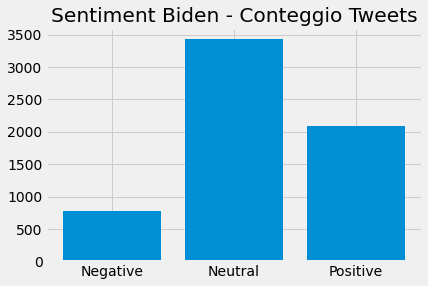

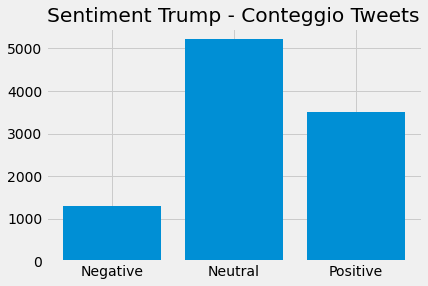

In [ ]:
labels_biden = _9_nov_unito_biden_FIN.groupby('Score').count().index.values
values_biden = _9_nov_unito_biden_FIN.groupby('Score').size().values
plt.bar(labels_biden, values_biden)
plt.title("Sentiment Biden - Conteggio Tweets")
plt.show()

labels_trump = _9_nov_unito_trump_FIN.groupby('Score').count().index.values
values_trump = _9_nov_unito_trump_FIN.groupby('Score').size().values
plt.bar(labels_trump, values_trump)
plt.title("Sentiment Trump - Conteggio Tweets")

plt.show()

In [ ]:
#lexicon

In [ ]:
import nltk
nltk.download('opinion_lexicon')
from nltk.corpus import opinion_lexicon

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


In [ ]:
pos_list=set(opinion_lexicon.positive())
neg_list=set(opinion_lexicon.negative())

In [ ]:
def sentiment_neg(sentence):
  total_sentiment = 0
  sentence = [word.lower() for word in word_tokenize(sentence)]
  last_word= ""
  for word in sentence: 
    if last_word=='not': 
      if word in pos_list: 
        total_sentiment -=1
      elif word in neg_list: 
        total_sentiment +=1 
    else:
      if word in pos_list: 
        total_sentiment += 1 
      elif word in neg_list: 
        total_sentiment -= 1
    if word== 'not': 
      last_word = word 
    if word== 'but': 
      last_word = word
    
  return total_sentiment

In [ ]:
_9_nov_unito_trump_FIN['Text_clean_3'] = _9_nov_unito_trump_FIN['Text_clean_3'].apply(str)
_9_nov_unito_biden_FIN['Text_clean_3'] = _9_nov_unito_biden_FIN['Text_clean_3'].apply(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
_9_nov_unito_trump_FIN['test1'] = _9_nov_unito_trump_FIN['Text_clean_3'].apply(sentiment_neg)
_9_nov_unito_trump_FIN.test1.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


 1    2259
 0    1217
 2    1036
-1     566
 3     426
-2     115
 4      46
-3      45
-5      41
 5      11
-4       8
 6       1
Name: test1, dtype: int64

[(-10.0, 20.0),
 Text(0, 0.5, 'valori'),
 (0.0, 10000.0),
 Text(0.5, 0, 'conteggio '),
 Text(0.5, 1.0, 'lexicon based approach semtiment')]

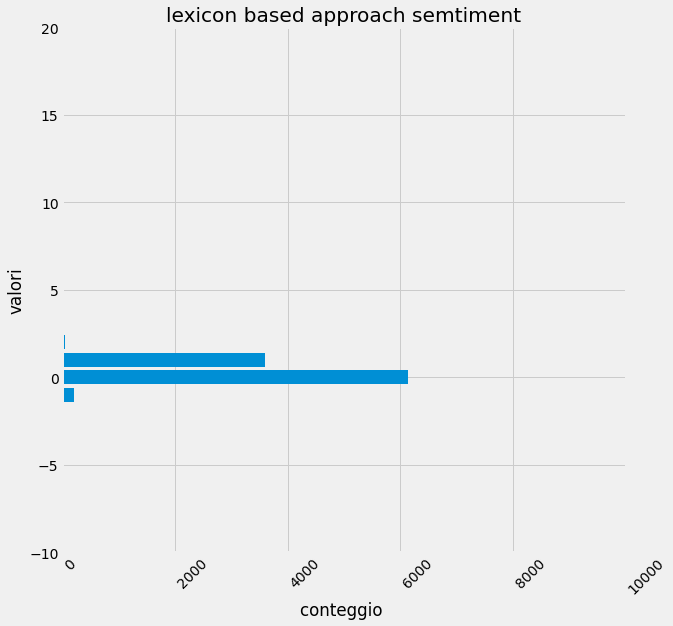

In [ ]:
df_value_counts3 = pd.DataFrame(_9_nov_unito_trump_FIN.test1.value_counts())
df_value_counts3 = df_value_counts3.reset_index()
df_value_counts3.columns = ['valori', 'counts']
fig, ax = plt.subplots(figsize=(9, 9))
ax.barh(df_value_counts3['valori'], df_value_counts3['counts'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='left')
ax.set(xlim=[0, 10000], ylim=[-10,20], xlabel='conteggio ', ylabel='valori',
       title='lexicon based approach semtiment')

In [ ]:
_9_nov_unito_biden_FIN['test1'] = _9_nov_unito_biden_FIN['Text_clean_3'].apply(sentiment_neg)
_9_nov_unito_biden_FIN.test1.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


 0    2030
 1    1248
-1     605
 2     372
-2     304
 3     120
-3      58
 4      23
-4       4
 5       2
 6       1
Name: test1, dtype: int64

[(-10.0, 20.0),
 Text(0, 0.5, 'valori'),
 (0.0, 10000.0),
 Text(0.5, 0, 'conteggio '),
 Text(0.5, 1.0, 'lexicon based approach semtiment')]

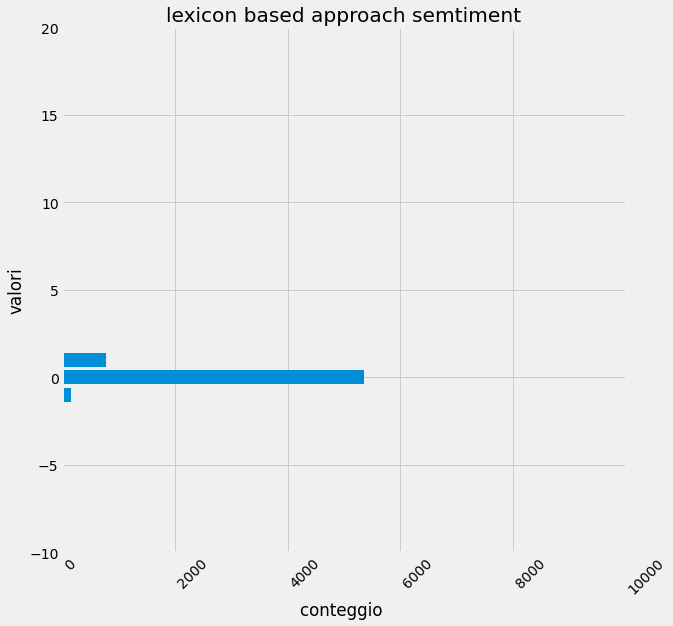

In [ ]:
df_value_counts4 = pd.DataFrame(_9_nov_unito_biden_FIN.test1.value_counts())
df_value_counts4 = df_value_counts4.reset_index()
df_value_counts4.columns = ['valori', 'counts']
fig, ax = plt.subplots(figsize=(9, 9))
ax.barh(df_value_counts4['valori'], df_value_counts4['counts'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='left')
ax.set(xlim=[0, 10000], ylim=[-10,20], xlabel='conteggio ', ylabel='valori',
       title='lexicon based approach semtiment')

In [ ]:
#vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
scores = []
# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

scores_1 = []
# Declare variables for scores
compound_list_1 = []
positive_list_1 = []
negative_list_1 = []
neutral_list_1 = []

scores_2 = []
# Declare variables for scores
compound_list_2 = []
positive_list_2 = []
negative_list_2 = []
neutral_list_2 = []

scores_3 = []
# Declare variables for scores
compound_list_3 = []
positive_list_3 = []
negative_list_3 = []
neutral_list_3 = []

In [ ]:
_9_nov_unito_biden_FIN = _9_nov_unito_biden_FIN.reset_index(drop=True)
_9_nov_unito_trump_FIN = _9_nov_unito_trump_FIN.reset_index(drop=True)

In [ ]:
for i in range(_9_nov_unito_trump_FIN['Text_clean_2'].shape[0]):
    compound = analyzer.polarity_scores(_9_nov_unito_trump_FIN['Text'][i])["compound"]
    pos = analyzer.polarity_scores(_9_nov_unito_trump_FIN['Text'][i])["pos"]
    neu = analyzer.polarity_scores(_9_nov_unito_trump_FIN['Text'][i])["neu"]
    neg = analyzer.polarity_scores(_9_nov_unito_trump_FIN['Text'][i])["neg"]
    scores_1.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })
for i in range(_9_nov_unito_biden_FIN['Text_clean_2'].shape[0]):
    compound = analyzer.polarity_scores(_9_nov_unito_biden_FIN['Text'][i])["compound"]
    pos = analyzer.polarity_scores(_9_nov_unito_biden_FIN['Text'][i])["pos"]
    neu = analyzer.polarity_scores(_9_nov_unito_biden_FIN['Text'][i])["neu"]
    neg = analyzer.polarity_scores(_9_nov_unito_biden_FIN['Text'][i])["neg"]
    scores_2.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

In [ ]:
sentiments_score_2 = pd.DataFrame.from_dict(scores_1)
_9_nov_unito_trump_FIN = _9_nov_unito_trump_FIN.join(sentiments_score_2)
_9_nov_unito_trump_FIN.head()

,_id,Screen_name,Text,Followers,Date_time,Hashtags,Novembre,Text_clean_1,Text_clean_2,Match_parola_trump,Match_parola_biden,hashtags,afinn,Subjectivity,Polarity,Score,test1,Compound,Positive,Negative,Neutral
0,"ObjectId(""5fa9a07e4e4ff24605313856"")",_sky_a_b_,RT @W7VOA: Nearly instant warning attached by ...,459,2020-11-09 20:03:05,NaN,9,"[('@w7voa', 'RB'), ('nearly', 'RB'), ('instant...",: Nearly instant warning attached by Twitter t...,trump,NaN,NaN,-7.0,0.855556,0.166667,Positive,0,-0.7351,0.000,0.267,0.733
1,"ObjectId(""5fa9a07e4e4ff24605313859"")",writerseditor,RT @W7VOA: Nearly instant warning attached by ...,819,2020-11-09 20:03:05,NaN,9,"[('@w7voa', 'RB'), ('nearly', 'RB'), ('instant...",: Nearly instant warning attached by Twitter t...,trump,NaN,NaN,-7.0,0.855556,0.166667,Positive,0,-0.7351,0.000,0.267,0.733
2,"ObjectId(""5fa9a07f4e4ff2460531385c"")",is_ceiling,@realDonaldTrump @Reince @SeanDuffyWI Donald J...,1,2020-11-09 20:03:06,NaN,9,"[('@realdonaldtrump', 'NN'), ('@reince', 'NN')...",Donald J. Trump \nBigly Lawyers Press Conf...,trump,NaN,NaN,0.0,0.000000,0.000000,Neutral,0,0.0000,0.000,0.000,1.000
3,"ObjectId(""5fa9a0804e4ff2460531385d"")",Thejude99,"Good question,TrumpGoingGone! There is so muc...",4744,2020-11-09 20:03:06,NaN,9,"[('good', 'JJ'), ('question', 'NN'), ('trumpgo...","Good question,TrumpGoingGone! There is so muc...",trump,NaN,NaN,-3.0,0.600000,-0.033333,Negative,0,-0.7763,0.113,0.339,0.548
4,"ObjectId(""5fa9a0814e4ff2460531386c"")",Lori40949345,I'm back I got 12 hours of time out cause I to...,2,2020-11-09 20:03:08,NaN,9,"[(""i'm"", 'NN'), ('back', 'RB'), ('got', 'VBD')...",I'm back I got 12 hours of time out cause I to...,trump,NaN,NaN,-3.0,0.270833,-0.145833,Negative,0,-0.5859,0.000,0.179,0.821


In [ ]:
sentiments_score_2 = pd.DataFrame.from_dict(scores_2)
_9_nov_unito_biden_FIN = _9_nov_unito_biden_FIN.join(sentiments_score_2)
_9_nov_unito_biden_FIN.head()

,_id,Screen_name,Text,Followers,Date_time,Hashtags,Novembre,Text_clean_1,Text_clean_2,Match_parola_trump,Match_parola_biden,hashtags,afinn,Subjectivity,Polarity,Score,test1,Compound,Positive,Negative,Neutral
0,"ObjectId(""5fa9a07e4e4ff24605313853"")",VinnyMcAv,RT @5_News: Meet the new DOTUS. 🐶\n\nJoe Biden...,9977,2020-11-09 20:03:04,NaN,9,"[('@5_news', 'NNS'), ('meet', 'VBD'), ('new', ...",: Meet the new DOTUS. \n\nJoe Biden’s dog Majo...,NaN,biden,NaN,0.0,0.44697,0.127841,Positive,0,0.0000,0.000,0.000,1.000
1,"ObjectId(""5fa9a07e4e4ff24605313855"")",barbmullings,😂😂😂 Say it with me... #PresidentElectBiden 🇺🇸✊...,4765,2020-11-09 20:03:05,NaN,9,"[('say', 'VB'), ('#presidentelectbiden', 'NNP'...",😂😂😂 Say it with me... PresidentElectBiden \n\n...,NaN,biden,NaN,-3.0,0.20000,0.200000,Positive,0,-0.0813,0.106,0.121,0.774
2,"ObjectId(""5fa9a0814e4ff2460531386b"")",pizzajon,RT @starknightz: 62. News: Progressive Feminis...,2563,2020-11-09 20:03:08,NaN,9,"[('@starknightz', '$'), ('62', 'CD'), ('news',...",: 62. News: Progressive Feminist &amp; Author ...,NaN,biden,NaN,-2.0,0.50000,0.000000,Neutral,0,0.0000,0.000,0.000,1.000
3,"ObjectId(""5fa9a0834e4ff24605313877"")",DayumMaam,@JoeBiden @KamalaHarris In other words; When H...,5221,2020-11-09 20:03:10,NaN,9,"[('@joebiden', 'JJ'), ('@kamalaharris', 'NN'),...",In other words; When Hell Freezes Over mothe...,NaN,biden,NaN,-4.0,0.00000,0.000000,Neutral,0,-0.6908,0.000,0.388,0.612
4,"ObjectId(""5fa9a0834e4ff24605313879"")",RitaKleemann,RT @RegSprecher: Chancellor #Merkel congratula...,173,2020-11-09 20:03:10,NaN,9,"[('@regsprecher', 'PRP$'), ('chancellor', 'NN'...",: Chancellor Merkel congratulates and . The G...,NaN,biden,NaN,4.0,0.10000,0.300000,Positive,0,0.5859,0.242,0.000,0.758


In [ ]:
tot_compound_trump_9_nov = _9_nov_unito_trump_FIN["Compound"].sum()
media_compound_trump_9_nov = tot_compound_trump_9_nov/len(_9_nov_unito_trump_FIN)
print("La media del COMPOUND di trump del 9 Novembre risulta: " + str(media_compound_trump_9_nov))

tot_Positive_trump_9_nov = _9_nov_unito_trump_FIN["Positive"].sum()
media_Positive_trump_9_nov = tot_Positive_trump_9_nov/len(_9_nov_unito_trump_FIN)
print("La media del POSITIVE di trump del 9 Novembre risulta: " + str(media_Positive_trump_9_nov))

tot_Negative_trump_9_nov = _9_nov_unito_trump_FIN["Negative"].sum()
media_Negative_trump_9_nov = tot_Negative_trump_9_nov/len(_9_nov_unito_trump_FIN)
print("La media del NEGATIVE di trump del 9 Novembre risulta: " + str(media_Negative_trump_9_nov))

tot_Neutral_trump_9_nov = _9_nov_unito_trump_FIN["Neutral"].sum()
media_Neutral_trump_9_nov = tot_Neutral_trump_9_nov/len(_9_nov_unito_trump_FIN)
print("La media del NEUTRAL di trump del 9 Novembre risulta: " + str(media_Neutral_trump_9_nov))

La media del COMPOUND di trump del 9 Novembre risulta: 0.05136862216901127
La media del POSITIVE di trump del 9 Novembre risulta: 0.08958515414546543
La media del NEGATIVE di trump del 9 Novembre risulta: 0.06919764541554424
La media del NEUTRAL di trump del 9 Novembre risulta: 0.8412141075526289


In [ ]:
tot_compound_biden_9_nov = _9_nov_unito_biden_FIN["Compound"].sum()
media_compound_biden_9_nov = tot_compound_biden_9_nov/len(_9_nov_unito_biden_FIN)
print("La media del COMPOUND di Biden del 9 Novembre risulta: " + str(media_compound_biden_9_nov))

tot_Positive_biden_9_nov = _9_nov_unito_biden_FIN["Positive"].sum()
media_Positive_biden_9_nov = tot_Positive_biden_9_nov/len(_9_nov_unito_biden_FIN)
print("La media del POSITIVE di Biden del 9 Novembre risulta: " + str(media_Positive_biden_9_nov))

tot_Negative_biden_9_nov = _9_nov_unito_biden_FIN["Negative"].sum()
media_Negative_biden_9_nov = tot_Negative_biden_9_nov/len(_9_nov_unito_biden_FIN)
print("La media del NEGATIVE di Biden del 9 Novembre risulta: " + str(media_Negative_biden_9_nov))

tot_Neutral_biden_9_nov = _9_nov_unito_biden_FIN["Neutral"].sum()
media_Neutral_biden_9_nov = tot_Neutral_biden_9_nov/len(_9_nov_unito_biden_FIN)
print("La media del NEUTRAL di Biden del 9 Novembre risulta: " + str(media_Neutral_biden_9_nov))

La media del COMPOUND di Biden del 9 Novembre risulta: 0.06989912684553104
La media del POSITIVE di Biden del 9 Novembre risulta: 0.08040625496110494
La media del NEGATIVE di Biden del 9 Novembre risulta: 0.05090188918876012
La media del NEUTRAL di Biden del 9 Novembre risulta: 0.8686845531036672


Text(0.5, 0.98, 'VADER TRUMP')

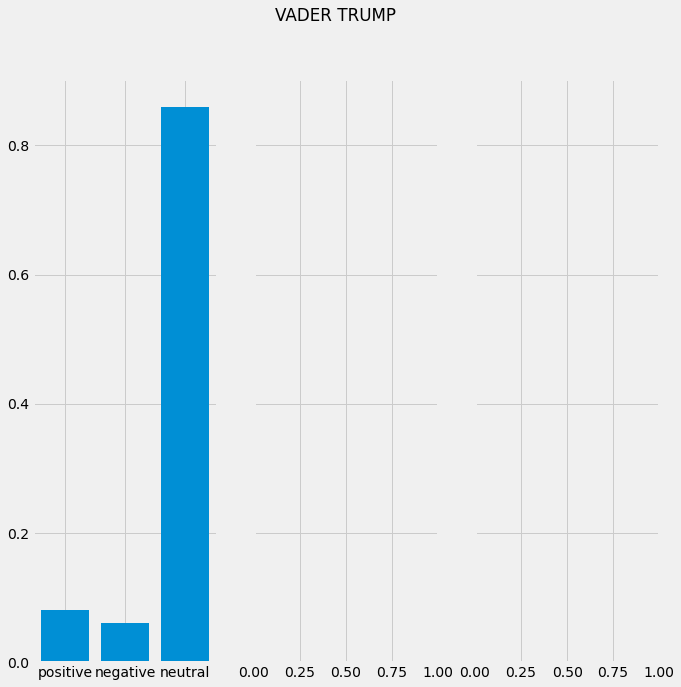

In [ ]:
results = {'positive':0.08036334622594499, 'negative':0.06009222172128229, 'neutral': 0.8595551455757778}
names = list(results.keys())
values = list(results.values())

fig, axs = plt.subplots(1, 3, figsize=(10, 10), sharey=True)
axs[0].bar(names, values)
fig.suptitle('VADER TRUMP')

Text(0.5, 0.98, 'VADER BIDEN')

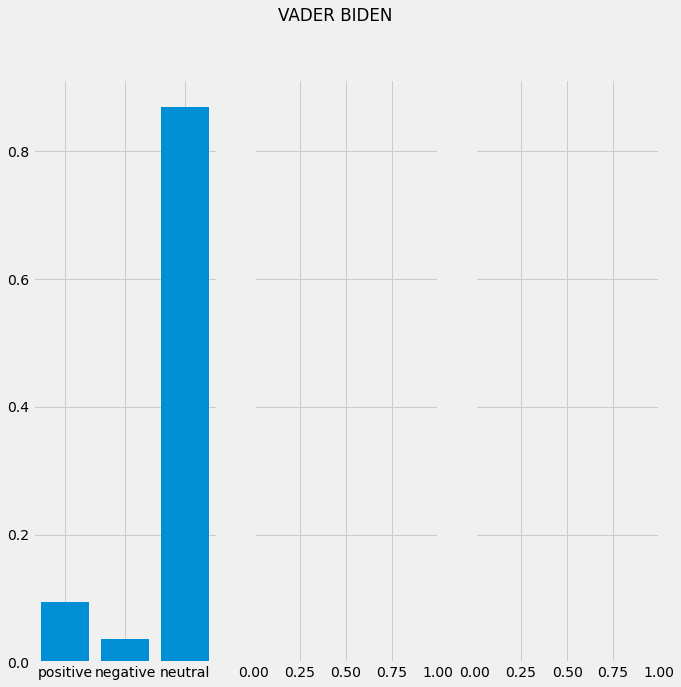

In [ ]:
results = {'positive': 0.09413993248848285, 'negative':0.036165815381565276, 'neutral':0.869695165152788}
names = list(results.keys())
values = list(results.values())

fig, axs = plt.subplots(1, 3, figsize=(10, 10), sharey=True)
axs[0].bar(names, values)
fig.suptitle('VADER BIDEN')

COSTRUZIONE DATASET PER VISUALIZATION 

In [ ]:
print(_1_nov_unito_biden_FIN['afinn'].mean()) 
print(_1_nov_unito_trump_FIN['afinn'].mean())  
print(_2_nov_unito_biden_FIN['afinn'].mean())
print(_2_nov_unito_trump_FIN['afinn'].mean())
print(_3_nov_unito_biden_FIN['afinn'].mean())  
print(_3_nov_unito_trump_FIN['afinn'].mean())  
print(_4_nov_unito_biden_FIN['afinn'].mean())  
print(_4_nov_unito_trump_FIN['afinn'].mean())  
print(_5_nov_unito_biden_FIN['afinn'].mean())  
print(_5_nov_unito_trump_FIN['afinn'].mean())  
print(_6_nov_unito_biden_FIN['afinn'].mean())  
print(_6_nov_unito_trump_FIN['afinn'].mean()) 
print(_7_nov_unito_biden_FIN['afinn'].mean())  
print(_7_nov_unito_trump_FIN['afinn'].mean())  
print(_8_nov_unito_biden_FIN['afinn'].mean()) 
print(_8_nov_unito_trump_FIN['afinn'].mean())  
print(_9_nov_unito_biden_FIN['afinn'].mean())  
print(_9_nov_unito_trump_FIN['afinn'].mean())  

-0.0659213569776407
0.4773090294090012
0.14691875755206482
0.4040638137328878
0.8403887431433341
0.790171621855361
1.6259433509361498
0.5307685071959364
-0.14144271570014144
0.7288459955551897
0.7534416389378221
-0.3704806127713617
1.3014281988086809
0.7432093445574725
0.7910299147149227
0.555177735345662
0.3469687434445144
0.08993242072431121


In [ ]:
print(_1_nov_unito_biden_FIN['test1'].mean())  
print(_1_nov_unito_trump_FIN['test1'].mean())  
print(_2_nov_unito_biden_FIN['test1'].mean())
print(_2_nov_unito_trump_FIN['test1'].mean())
print(_3_nov_unito_biden_FIN['test1'].mean())  
print(_3_nov_unito_trump_FIN['test1'].mean())  
print(_4_nov_unito_biden_FIN['test1'].mean())  
print(_4_nov_unito_trump_FIN['test1'].mean())  
print(_5_nov_unito_biden_FIN['test1'].mean())  
print(_5_nov_unito_trump_FIN['test1'].mean())  
print(_6_nov_unito_biden_FIN['test1'].mean())  
print(_6_nov_unito_trump_FIN['test1'].mean()) 
print(_7_nov_unito_biden_FIN['test1'].mean())  
print(_7_nov_unito_trump_FIN['test1'].mean())
print(_8_nov_unito_biden_FIN['test1'].mean())  
print(_8_nov_unito_trump_FIN['test1'].mean())  
print(_9_nov_unito_biden_FIN['test1'].mean())  
print(_9_nov_unito_trump_FIN['test1'].mean())  

0.14430737599588794
0.9933289486047168
0.2592224038666572
0.9036865365958823
0.45877056999761506
1.0993888493840447
0.5503888622179549
0.8516226131125952
0.5359653977820142
1.3811013252119515
0.5489006328700985
0.7180616740088106
0.4455256335868923
0.9716934188994393
0.7442782035520913
0.22173274596182085
0.8119909894299082


In [ ]:
print(_1_nov_unito_biden_FIN['Compound'].mean())  
print(_1_nov_unito_trump_FIN['Compound'].mean())  
print(_2_nov_unito_biden_FIN['Compound'].mean())
print(_2_nov_unito_trump_FIN['Compound'].mean())
print(_3_nov_unito_biden_FIN['Compound'].mean())  
print(_3_nov_unito_trump_FIN['Compound'].mean())  
print(_4_nov_unito_biden_FIN['Compound'].mean())  
print(_4_nov_unito_trump_FIN['Compound'].mean())  
print(_5_nov_unito_biden_FIN['Compound'].mean())  
print(_5_nov_unito_trump_FIN['Compound'].mean())  
print(_6_nov_unito_biden_FIN['Compound'].mean())  
print(_6_nov_unito_trump_FIN['Compound'].mean()) 
print(_7_nov_unito_biden_FIN['Compound'].mean())  
print(_7_nov_unito_trump_FIN['Compound'].mean())  
print(_8_nov_unito_biden_FIN['Compound'].mean()) 
print(_8_nov_unito_trump_FIN['Compound'].mean())  
print(_9_nov_unito_biden_FIN['Compound'].mean())  
print(_9_nov_unito_trump_FIN['Compound'].mean())  

0.043104443122928875
0.09862979646312943
0.04691323929140571
0.10146028665801195
0.10991863006576941
0.10951490648376912
0.20879014944100502
0.0834799202343875
0.04193067935635196
0.09913251250701974
0.061979861003058
0.051056933647143046
0.18520569591609112
0.04875974879663141
0.13345433502793688
0.0655731232715099
0.06989912684553148
0.05136862216901114


In [ ]:
print(_1_nov_unito_biden_FIN['Polarity'].mean())  
print(_1_nov_unito_trump_FIN['Polarity'].mean())  
print(_2_nov_unito_biden_FIN['Polarity'].mean())
print(_2_nov_unito_trump_FIN['Polarity'].mean())
print(_3_nov_unito_biden_FIN['Polarity'].mean())  
print(_3_nov_unito_trump_FIN['Polarity'].mean())  
print(_4_nov_unito_biden_FIN['Polarity'].mean())  
print(_4_nov_unito_trump_FIN['Polarity'].mean())  
print(_5_nov_unito_biden_FIN['Polarity'].mean())  
print(_5_nov_unito_trump_FIN['Polarity'].mean())  
print(_6_nov_unito_biden_FIN['Polarity'].mean())  
print(_6_nov_unito_trump_FIN['Polarity'].mean()) 
print(_7_nov_unito_biden_FIN['Polarity'].mean())  
print(_7_nov_unito_trump_FIN['Polarity'].mean())  
print(_8_nov_unito_biden_FIN['Polarity'].mean()) 
print(_8_nov_unito_trump_FIN['Polarity'].mean())  
print(_9_nov_unito_biden_FIN['Polarity'].mean())  
print(_9_nov_unito_trump_FIN['Polarity'].mean())  

0.05204591187936375
0.06350090342815132
0.13292798175367598
0.09340214479813187
0.10626495236982697
0.10799209098242189
0.19994801854540675
0.12955492637283794
0.0913610665834165
0.09381972729893659
0.04914290654016697
0.0781648834069458
0.10717783580991172
0.06877458452001303
0.08741819239687
0.059343393025534666
0.07582900370783373
0.08651307006926576


In [ ]:
d1 = {'Day':[1, 2, 3, 4, 5, 6, 7, 8, 9], 'Trump':[0.692, 0.402, 0.831, 0.559, 0.467, 0.084, 0.226, 0.046, 0.095], 'Biden':[-0.058,0.096, 0.881, 1.399, 0.174, 0.241, 1.210, 0.867, 0.383], 'Tweets':[58901, 101814, 655137, 654871, 575526, 164496, 1252050, 606953, 33268]}
afinn_viz = pd.DataFrame(data = d1)
d2 = {'Day':[1, 2, 3, 4, 5, 6, 7, 8, 9], 'Trump':[0.279, 0.357, 0.285, 0.189, 0.110, 0.282, 0.227, 0.215, 0.349], 'Biden':[0.107, 0.114,0.124, 0.083, 0.068, 0.058, 0.048,0.058, 0.100], 'Tweets':[58901, 101814, 655137, 654871, 575526, 164496, 1252050, 606953, 33268]}
opinion_lexicon_viz = pd.DataFrame(data = d2)
d3 = {'Day':[1, 2, 3, 4, 5, 6, 7, 8, 9], 'Trump':[0.098, 0.1014, 0.109, 0.083,0.099, 0.051, 0.048, 0.065, 0.051], 'Biden':[0.043,0.046, 0.1099, 0.208, 0.041, 0.061, 0.185,0.133, 0.6989], 'Tweets':[58901, 101814, 655137, 654871, 575526, 164496, 1252050, 606953, 33268]}
vader_viz = pd.DataFrame(data = d3)
d4 = {'Day':[1, 2, 3, 4, 5, 6, 7, 8, 9], 'Trump':[0.063,0.093,0.107,0.129,0.093,0.078,0.068, 0.059, 0.086], 'Biden':[0.052,0.132,0.106,0.199, 0.091,0.049,0.107,0.087,0.075], 'Tweets':[58901, 101814, 655137, 654871, 575526, 164496, 1252050, 606953, 33268]}
text_blob_viz = pd.DataFrame(data = d4)

In [ ]:
afinn_viz.to_csv('afinn_viz.csv')
opinion_lexicon_viz.to_csv('opinion_lexicon_viz.csv')
vader_viz.to_csv('vader_viz.csv')
text_blob_viz.to_csv('text_blob_viz.csv')